In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from reservoir_contours import reservoir_contours

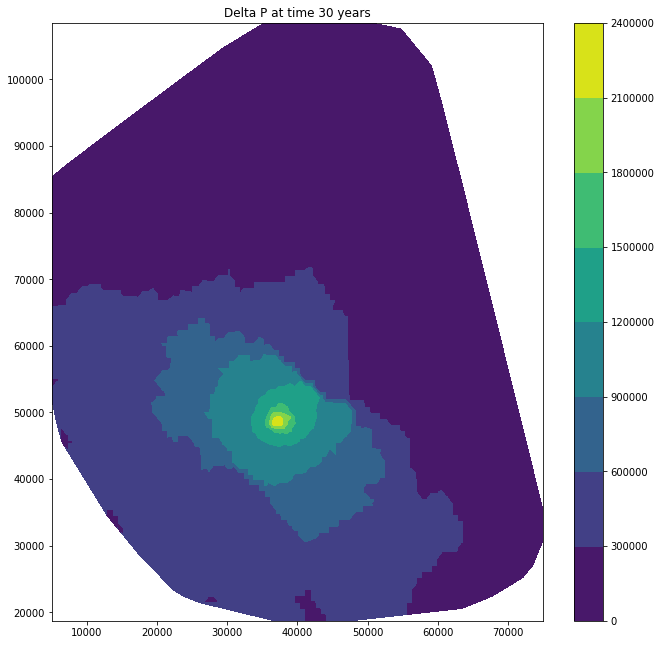

In [17]:
def proc_sim(sim_num, contour=False, sat_contour=False):
    filename = f'Reservoir_data_sim{sim_num:02}.csv'
    raw_data = np.genfromtxt(filename, delimiter=',')
    points = raw_data[:, :2]
    data = raw_data[:, 2:]

    n_time = int(data.shape[1]/2)
    pressure = data[:, :n_time]
    saturation = data[:, n_time:]
    ds = np.sum(saturation > 0.05)
    dp = np.array([pressure[:, x] - pressure[:, 0] for x in range(1, n_time)])
    if contour:
        plt.figure(figsize=(11,11))
        plt.tricontourf(points[:, 0], points[:, 1], dp[8, :])
        plt.colorbar()
    if sat_contour:
        plt.figure(figsize=(11,11))
        plt.tricontourf(points[:, 0], points[:, 1], saturation[:, -10])
        plt.colorbar()
    return dp.max(), ds
proc_sim(14, contour=True)
plt.title('Delta P at time 30 years')
plt.savefig('sim14_DeltaP.png')

In [18]:
dps = []
dss = []
for i in range(1,55):
    dp, ds = proc_sim(i)
    dps.append(dp)
    dss.append(ds)
    print('{0:02}, {1}, {2}'.format(i, dp, ds))

01, 8321000.0, 1880
02, 8083000.0, 1866
03, 7582000.0, 1765
04, 8456000.0, 1423
05, 8227000.0, 1411
06, 7728000.0, 1324
07, 8538000.0, 1118
08, 8323000.0, 1103
09, 7856000.0, 1019
10, 2541000.0, 2788
11, 2484000.0, 2782
12, 2357000.0, 2685
13, 2594000.0, 2138
14, 2526000.0, 2136
15, 2377000.0, 2102
16, 2634000.0, 1695
17, 2560000.0, 1689
18, 2446000.0, 1640
19, 1770000.0, 3499
20, 1713000.0, 3499
21, 1572000.0, 3478
22, 1265000.0, 3107
23, 1218000.0, 3102
24, 1097000.0, 3065
25, 1079000.0, 2700
26, 1024000.0, 2699
27, 904000.0, 2673
28, 1347000.0, 3305
29, 1334000.0, 3297
30, 1279000.0, 3286
31, 1205000.0, 2953
32, 1192000.0, 2940
33, 1142000.0, 2919
34, 1101000.0, 2785
35, 1089000.0, 2785
36, 1045000.0, 2784
37, 1160000.0, 3318
38, 1157000.0, 3315
39, 1141000.0, 3286
40, 1004000.0, 2937
41, 1000000.0, 2937
42, 985000.0, 2919
43, 904000.0, 2766
44, 901000.0, 2766
45, 885000.0, 2762
46, 15100000.0, 1407
47, 14697000.0, 1626
48, 13692000.0, 1493
49, 15319000.0, 1201
50, 14901000.0, 1185


In [19]:
dps = np.array(dps)
dps.argmax()+1

52

In [20]:
dss = np.array(dss)
print(dss.argmin()+1)
print(dss.argmax()+1)

54
19


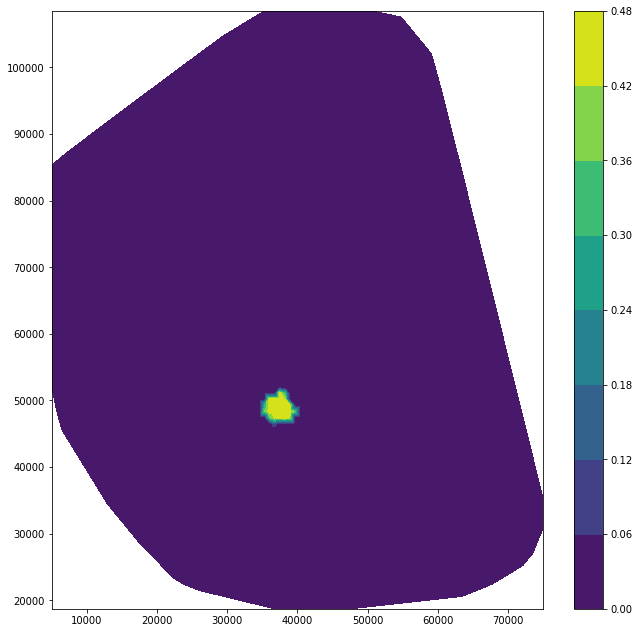

In [26]:
proc_sim(54, sat_contour=True)
plt.savefig('Sim54_Saturation')

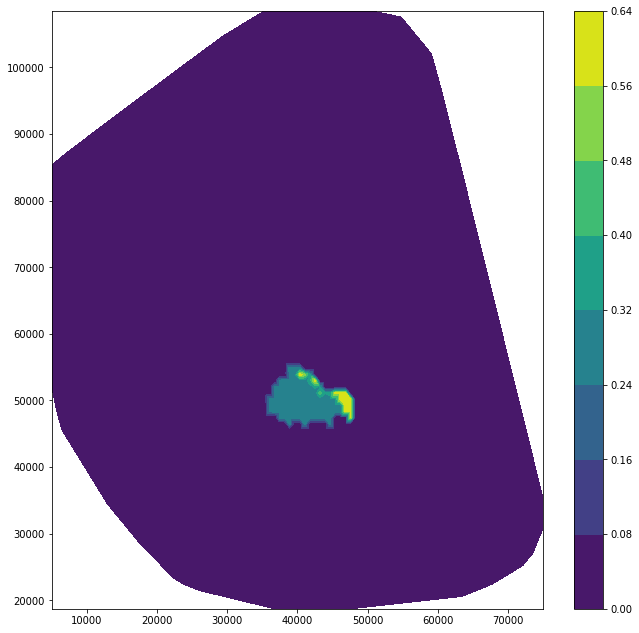

In [25]:
proc_sim(19, sat_contour=True)
plt.savefig('Sim19_Saturation')

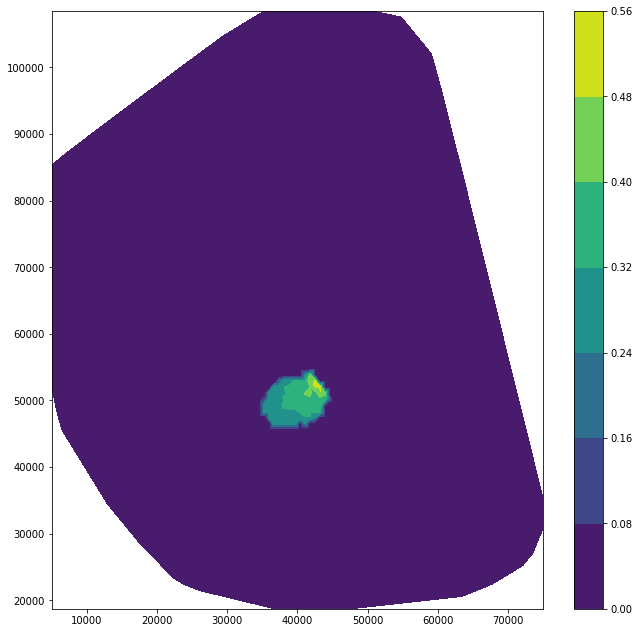

In [24]:
proc_sim(14, sat_contour=True)
plt.savefig('Sim14_Saturation')

In [41]:
np.exp(-13.5)

1.3709590863840845e-06

In [42]:
np.exp(-11)

1.670170079024566e-05

In [60]:
filename = f'Reservoir_data_sim14.csv'
raw_data = np.genfromtxt(filename, delimiter=',')
points = raw_data[:, :2]
data = raw_data[:, 2:]

n_time = int(data.shape[1]/2)
pressure = data[:, :n_time]
saturation = data[:, n_time:]
ds = np.sum(saturation > 0.05)
dp = np.array([pressure[:, x] - pressure[:, 0] for x in range(1, n_time)]).T
x = points[:, 0]
y = points[:, 1]

In [61]:
dy = y[1:] - y[:-1]

In [62]:
dy.max()

925.8000000000029

In [63]:
dx = 720.7
dy = 925.8

In [64]:
n_time

40

In [65]:
dp.shape

(7439, 39)

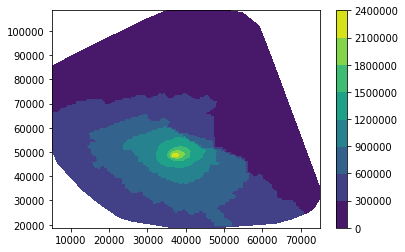

In [68]:
plt.tricontourf(x, y, dp[:, 11])
plt.colorbar()

In [27]:
time_file = 'time_points.csv'
times = np.genfromtxt(time_file, delimiter=',')
times

array([   0.,    1.,    2.,    5.,   10.,   15.,   20.,   25.,   30.,
         35.,   40.,   45.,   49.,   50.,   51.,   52.,   55.,   60.,
         65.,   70.,   75.,   80.,   85.,   90.,   95.,  100.,  110.,
        120.,  130.,  140.,  150.,  175.,  300.,  400.,  500.,  600.,
        700.,  800.,  900., 1000.])

In [33]:
import os
def pressure_plots(sim_num):
    filename = f'Reservoir_data_sim{sim_num:02}.csv'
    folder = f'Sim{sim_num:02}'
    raw_data = np.genfromtxt(filename, delimiter=',')
    time_file = 'time_points.csv'
    times = np.genfromtxt(time_file, delimiter=',')
    points = raw_data[:, :2]
    data = raw_data[:, 2:]

    n_time = int(data.shape[1]/2)
    pressure = data[:, :n_time]
    saturation = data[:, n_time:]
    ds = np.sum(saturation > 0.05)
    dp = np.array([pressure[:, x] - pressure[:, 0] for x in range(1, n_time)])
    for i in range(n_time-1):
        plt.figure(figsize=(11,11))
        plt.clf()
        plt.tricontourf(points[:, 0], points[:, 1], dp[i, :])
        plt.colorbar()
        plt.title(f'$\Delta P$ at time {times[i+1]}')
        plt.savefig(os.path.join(folder, f'DeltaP_{i+1:02}'))
    return
pressure_plots(14)

D:\Anaconda3_0818\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


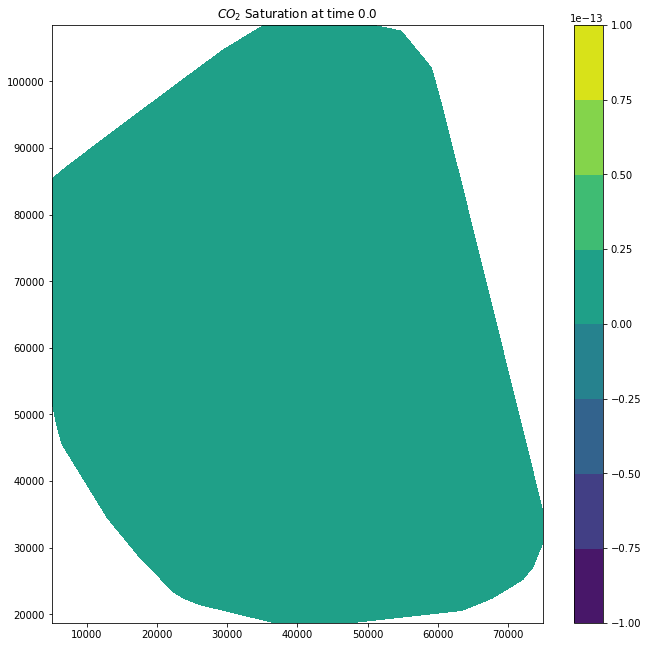

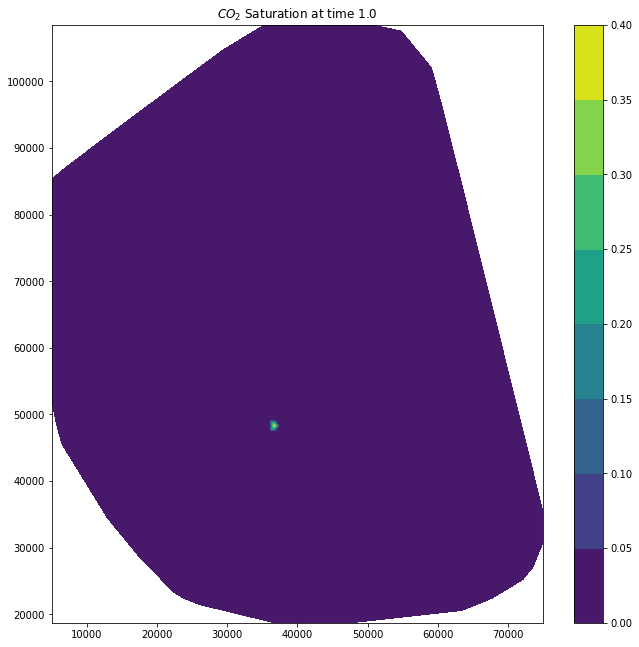

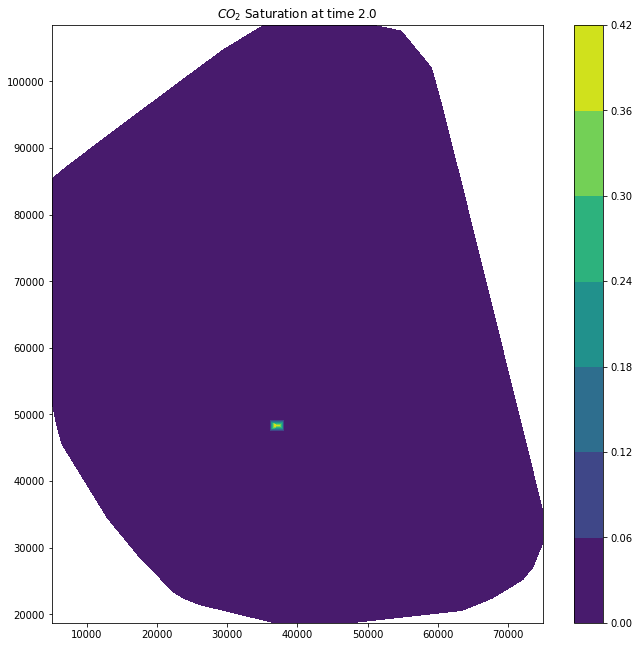

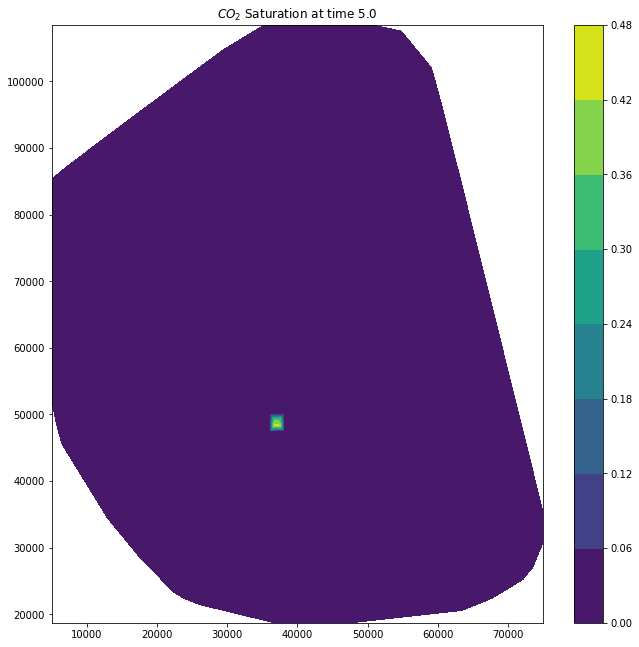

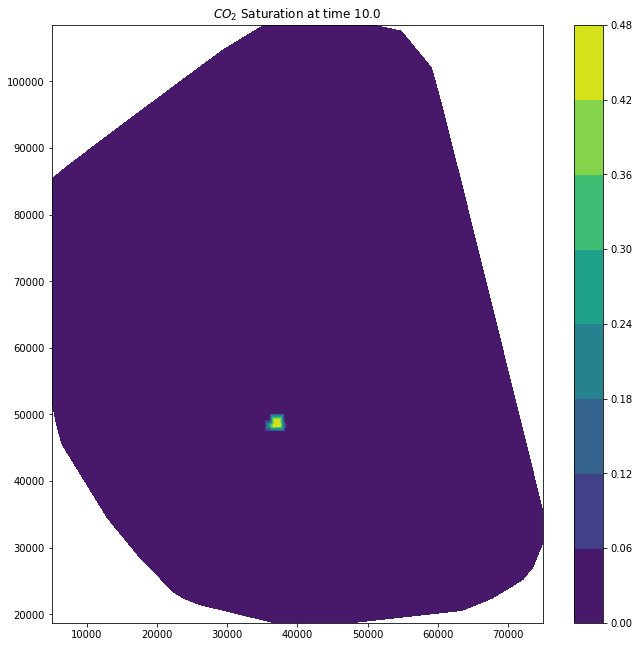

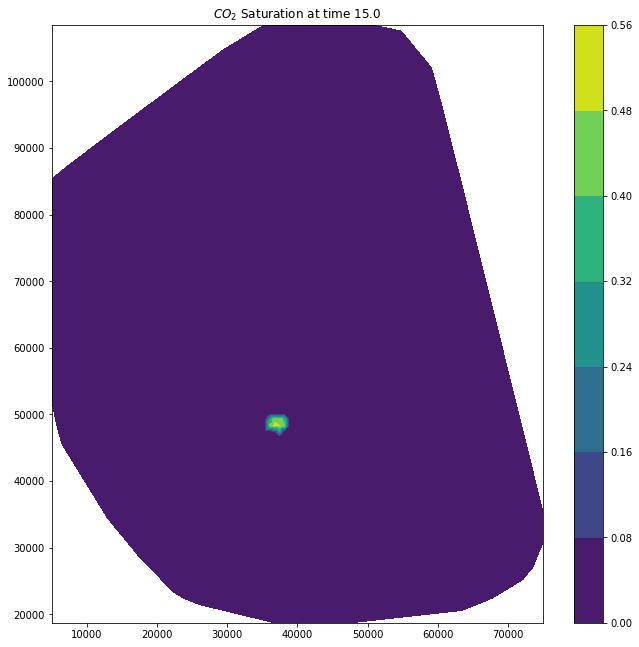

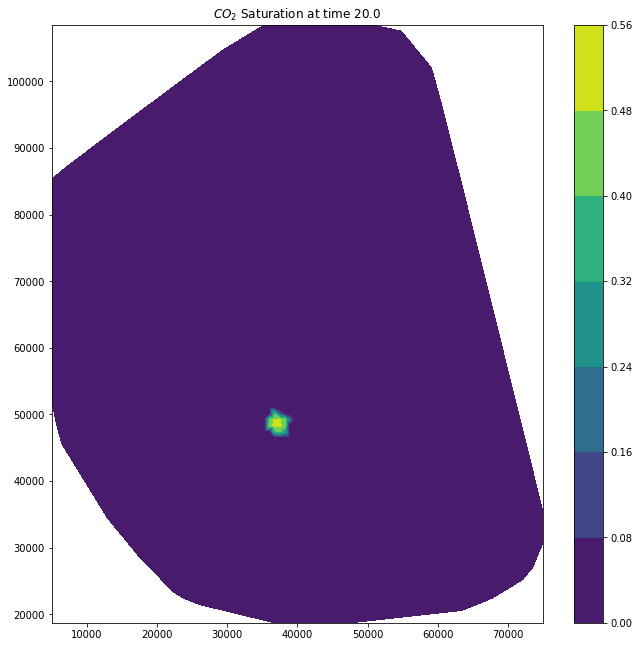

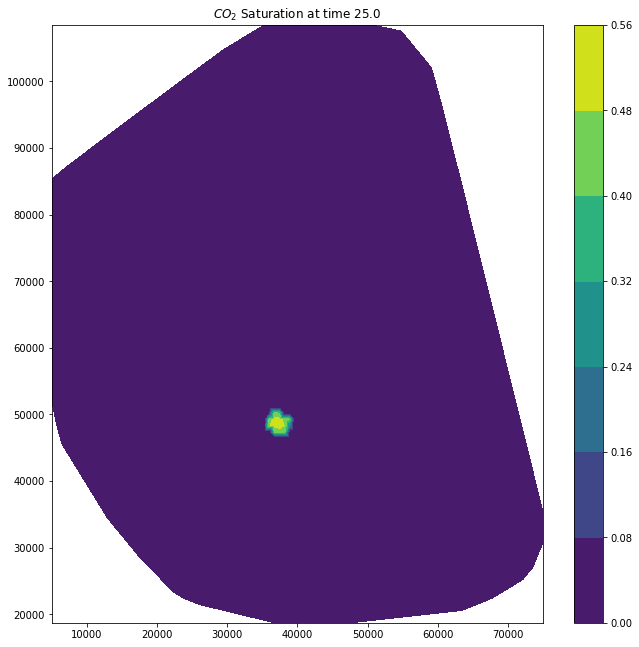

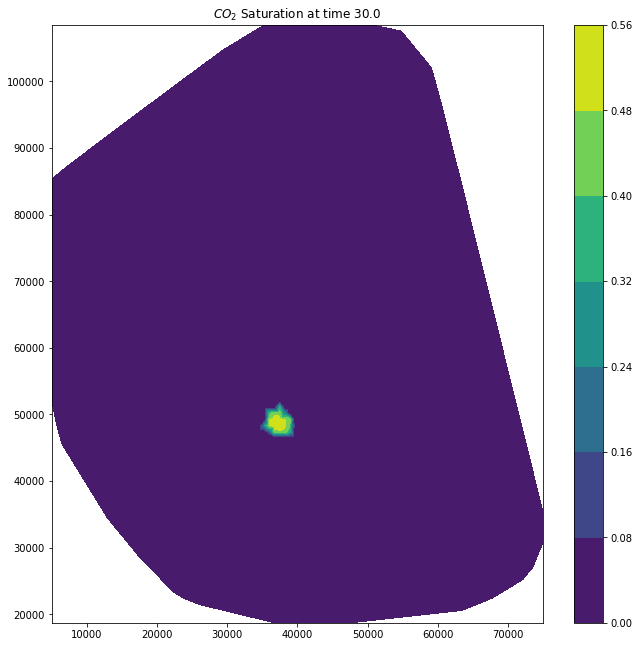

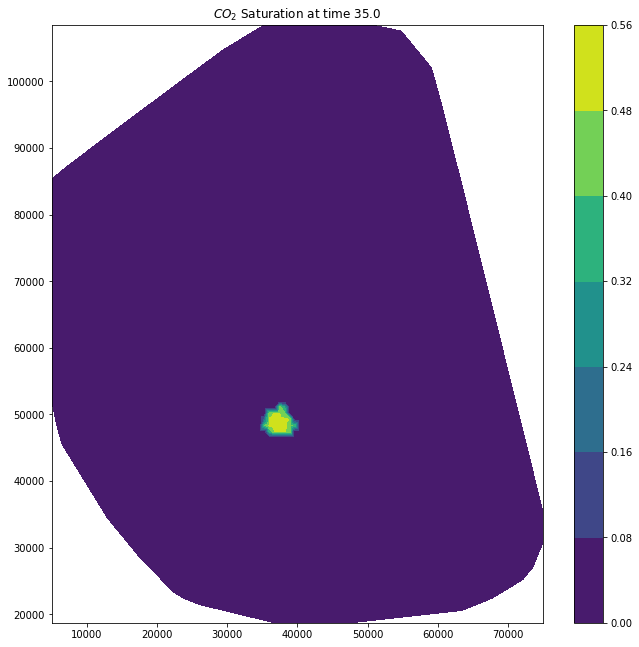

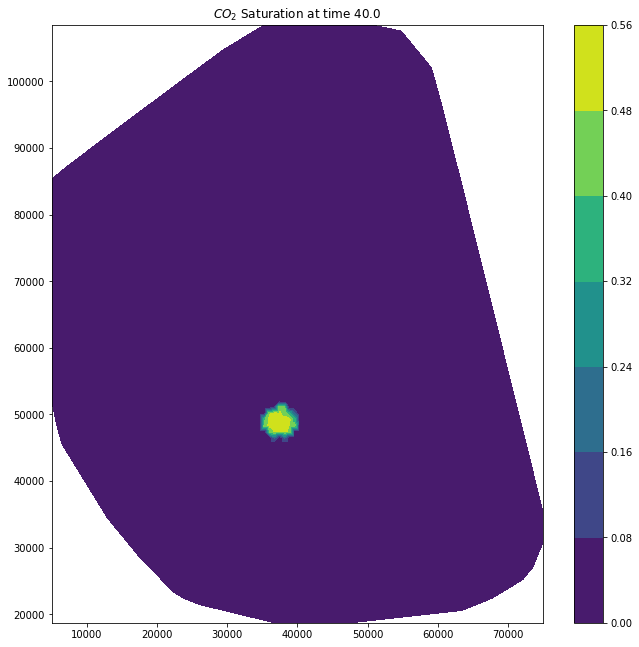

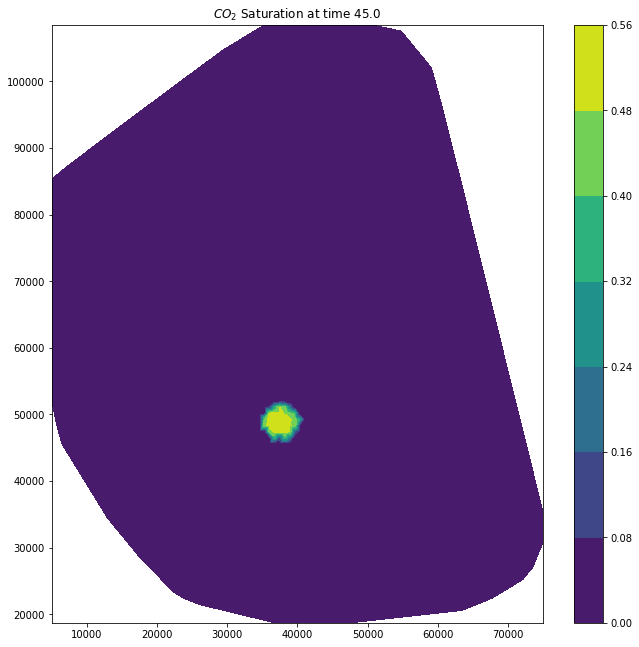

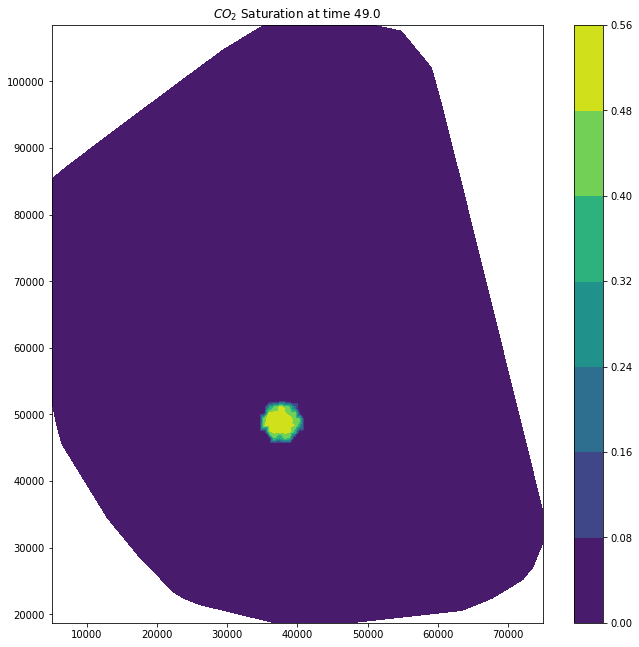

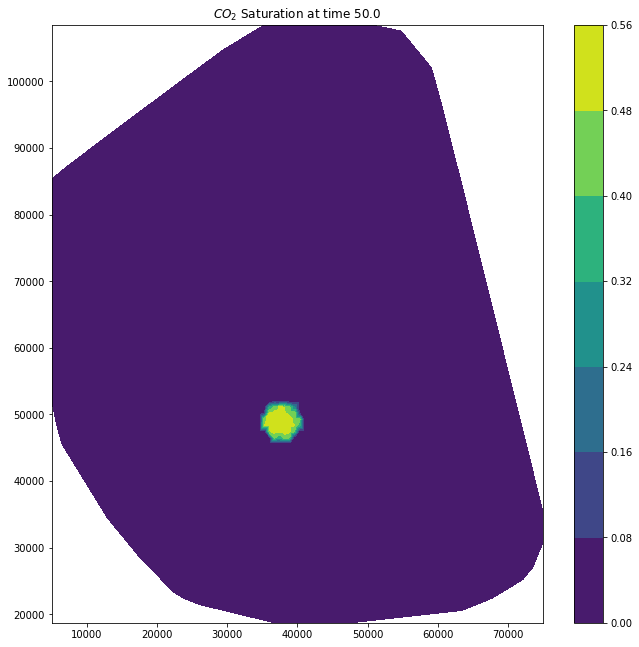

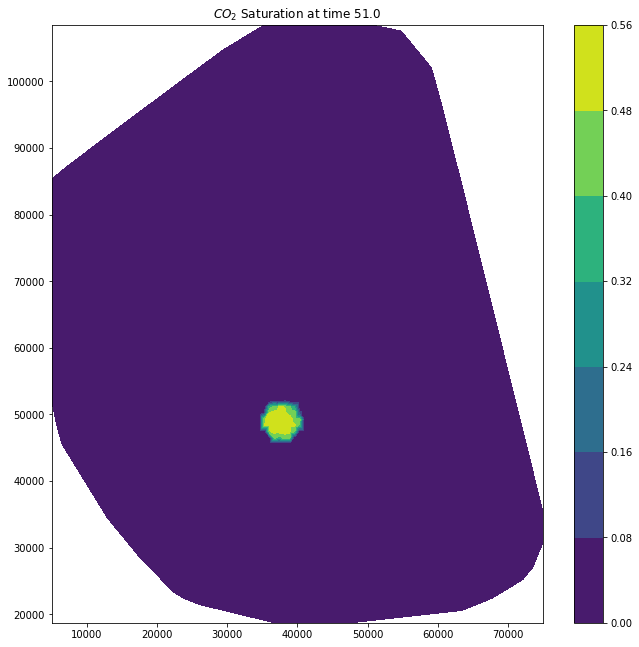

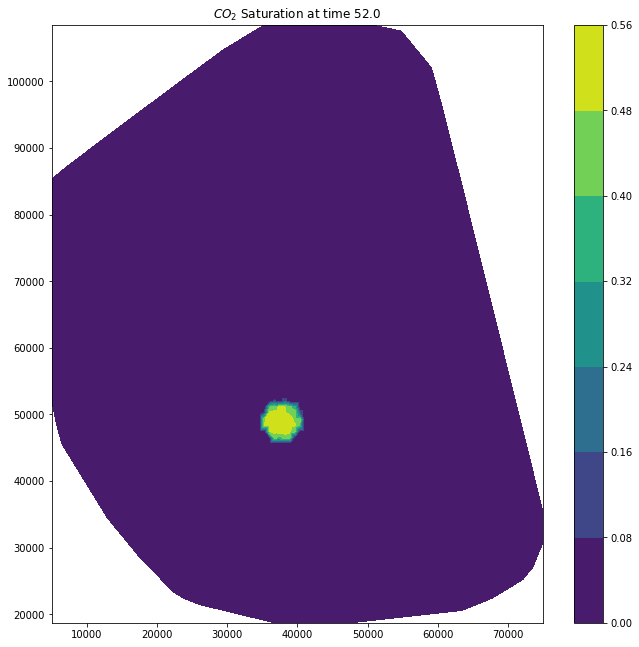

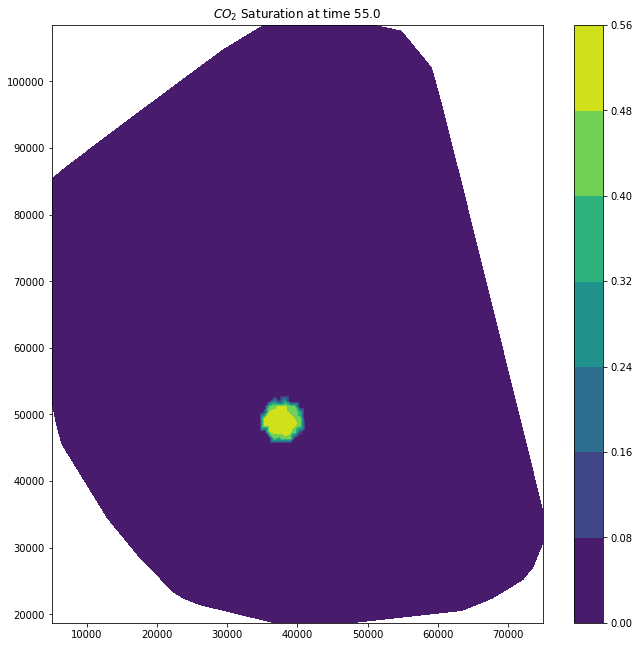

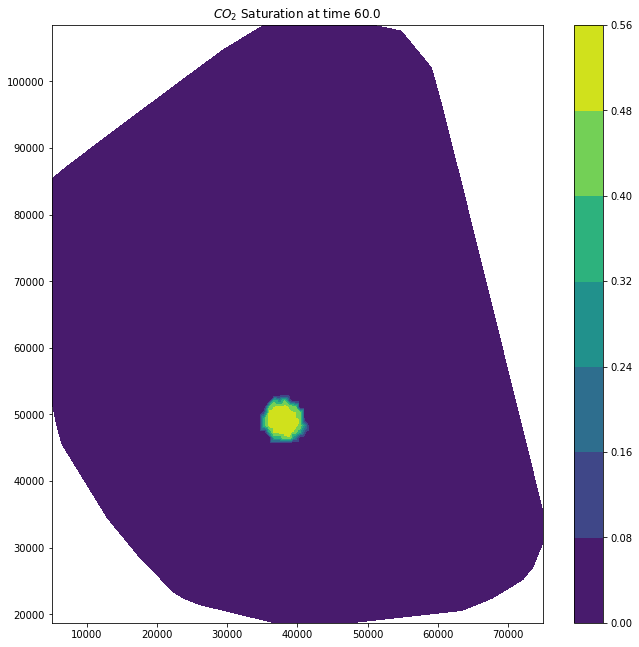

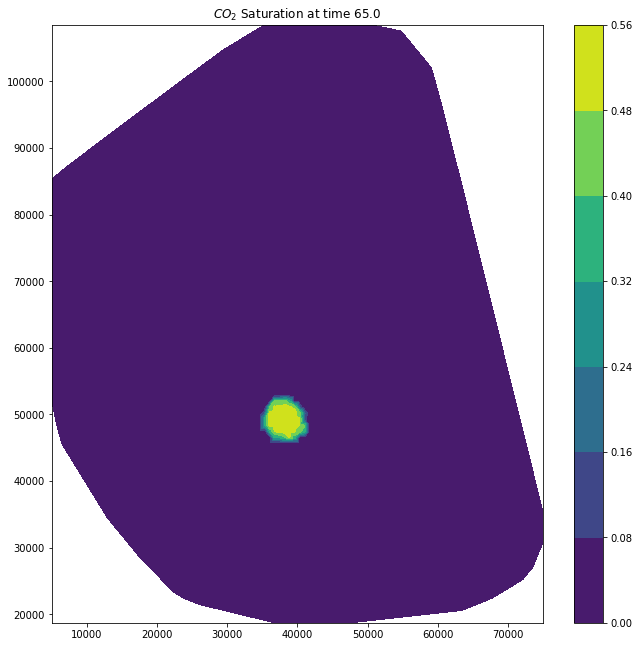

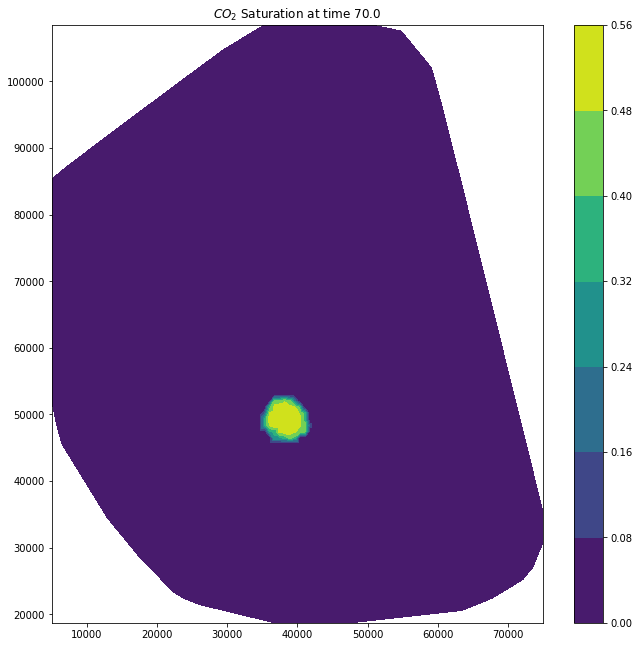

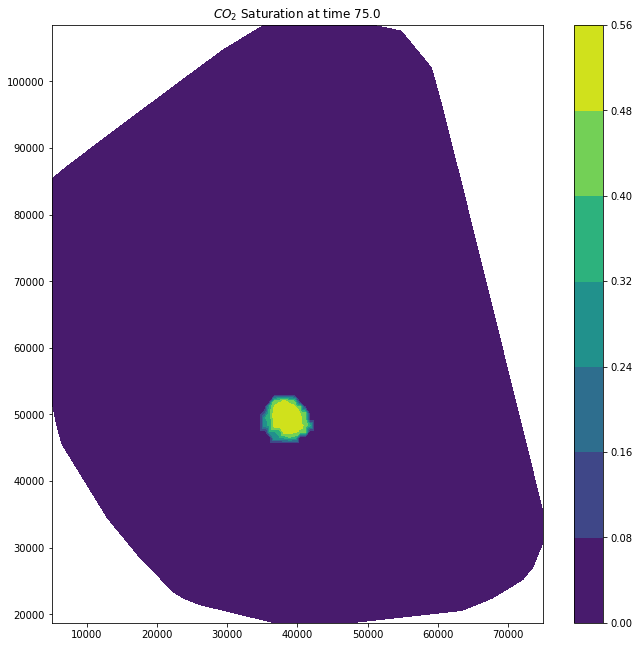

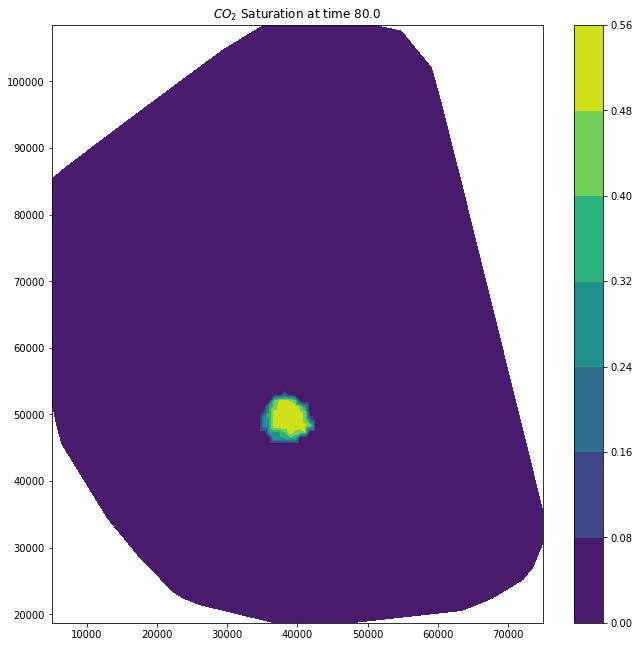

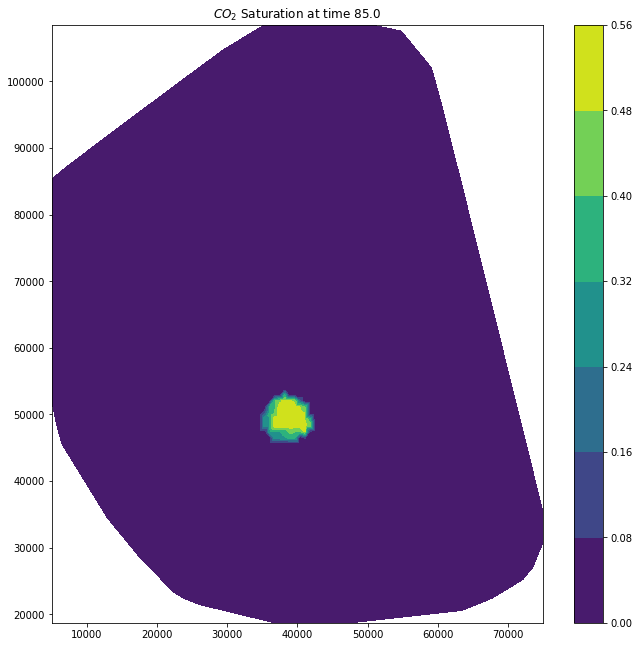

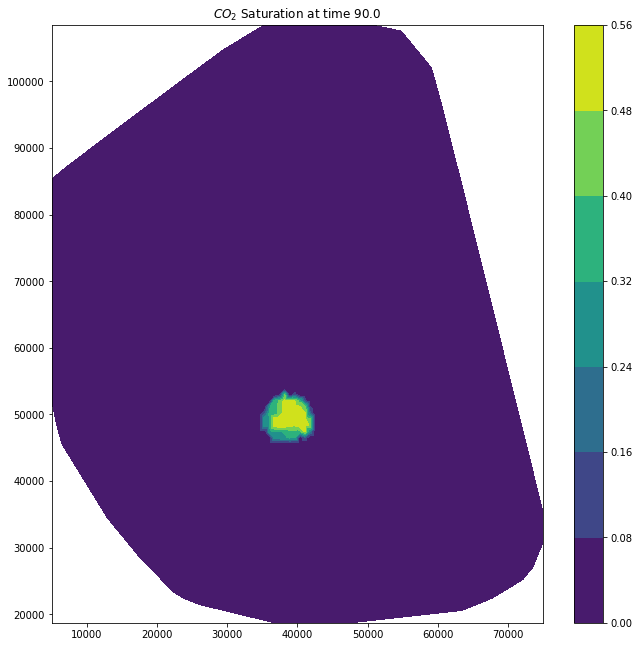

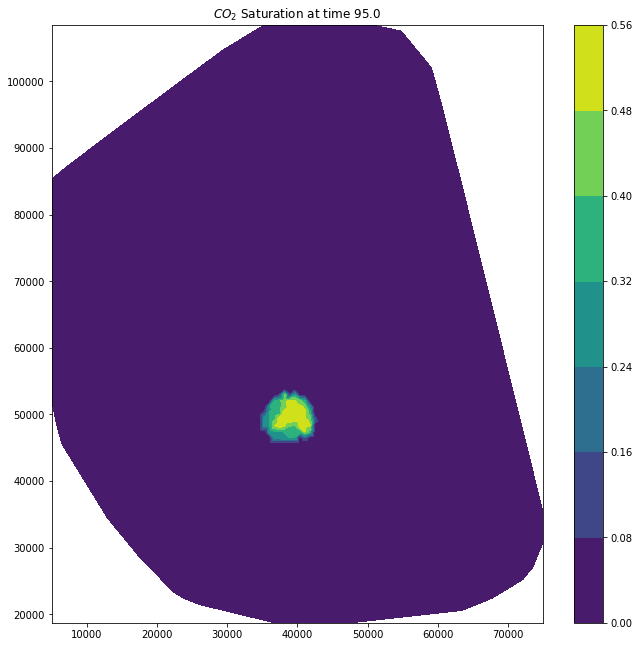

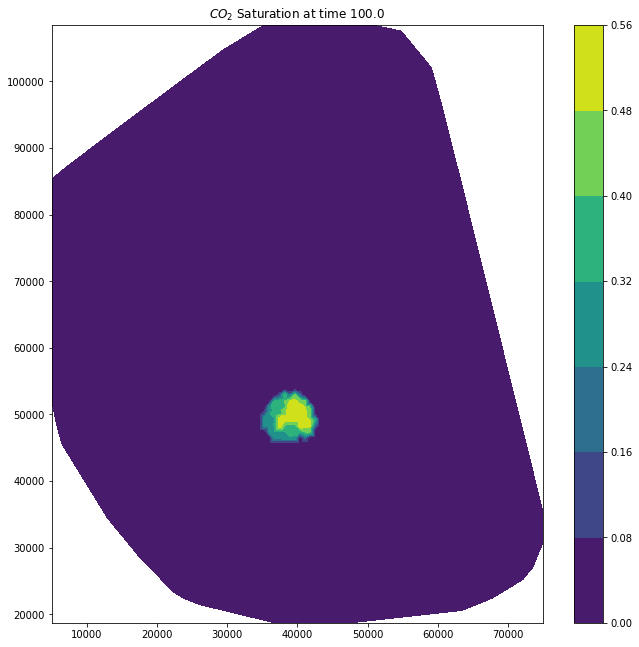

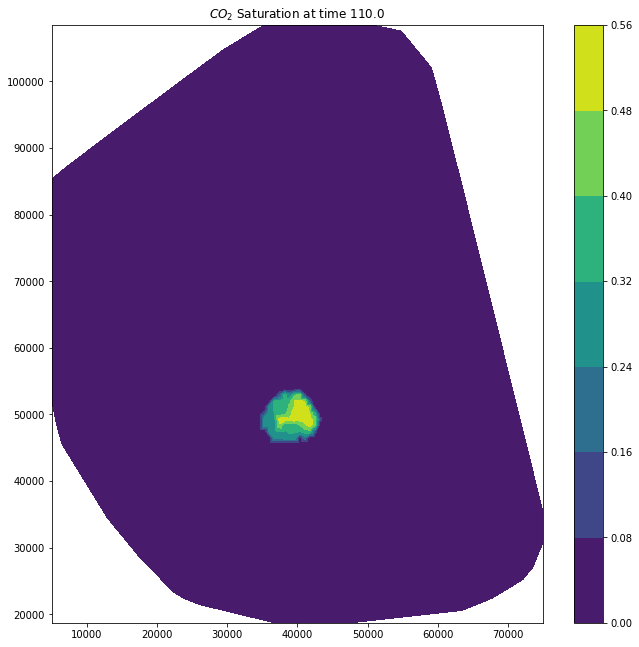

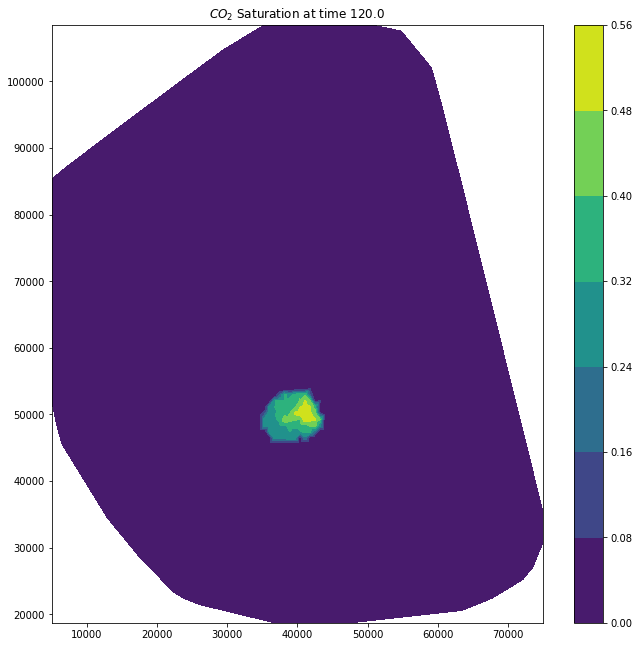

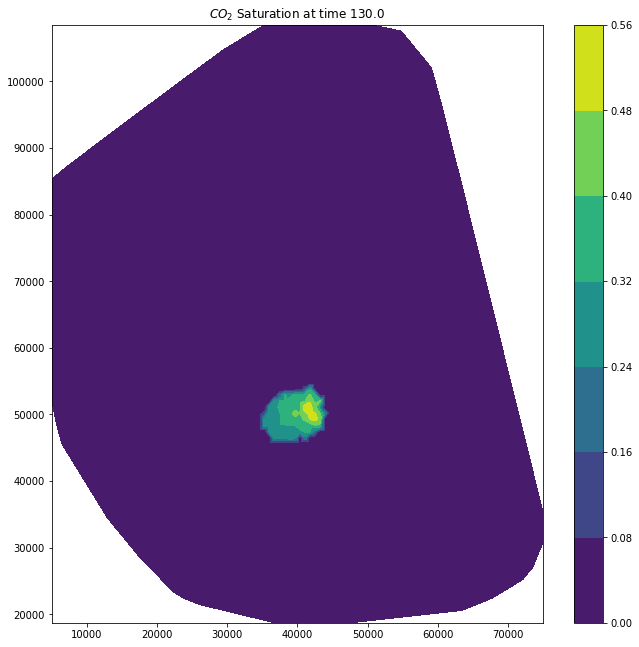

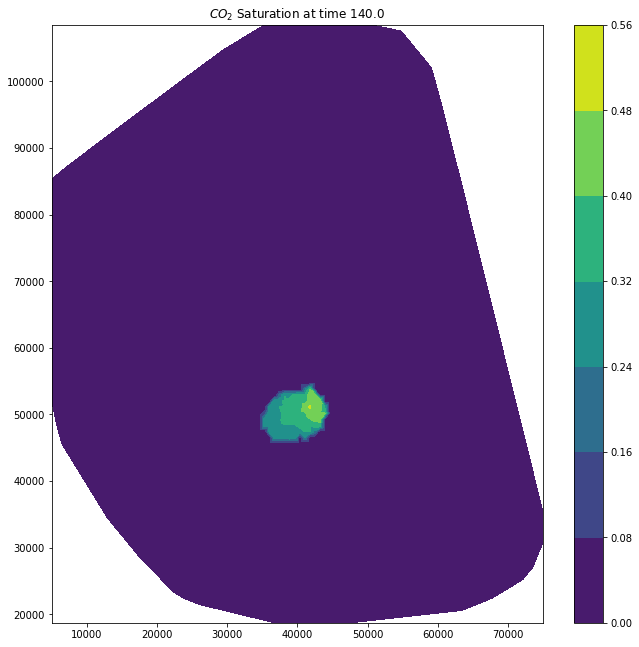

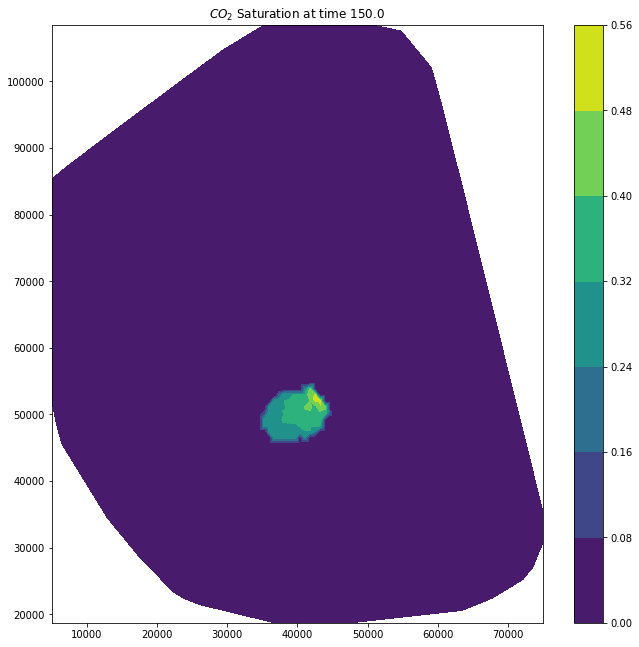

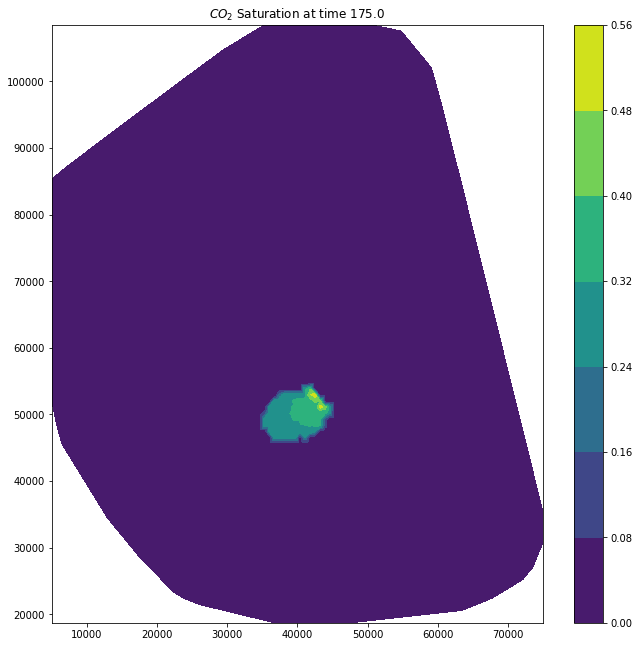

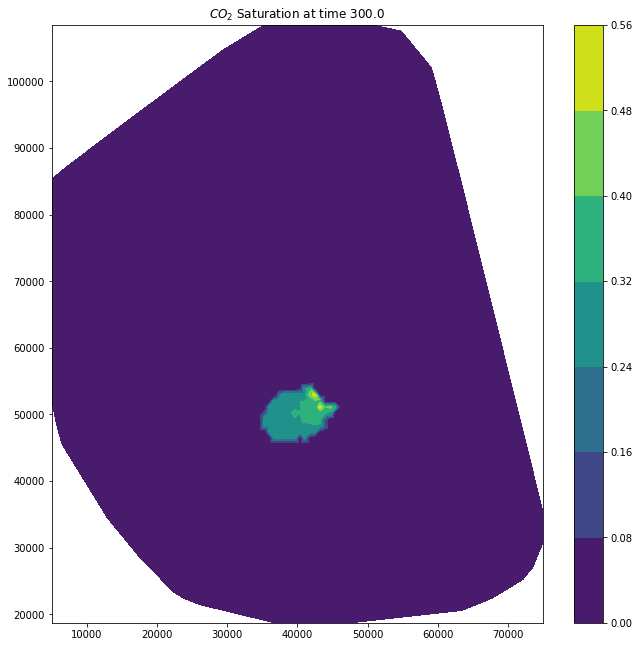

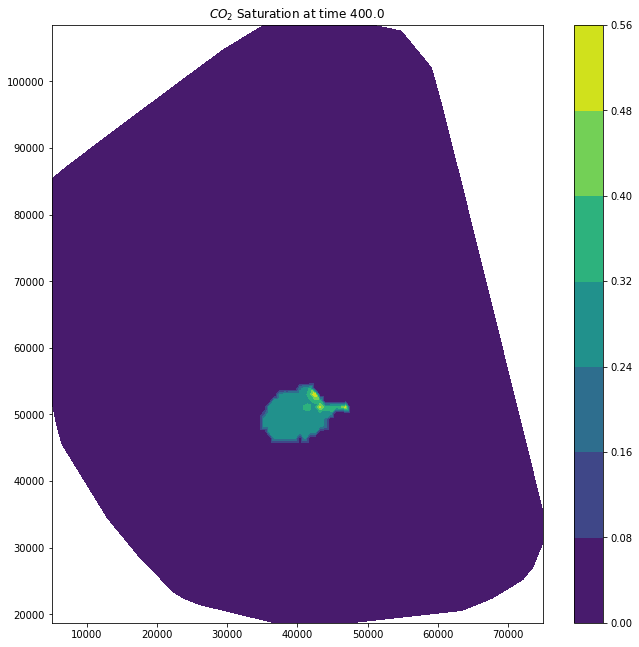

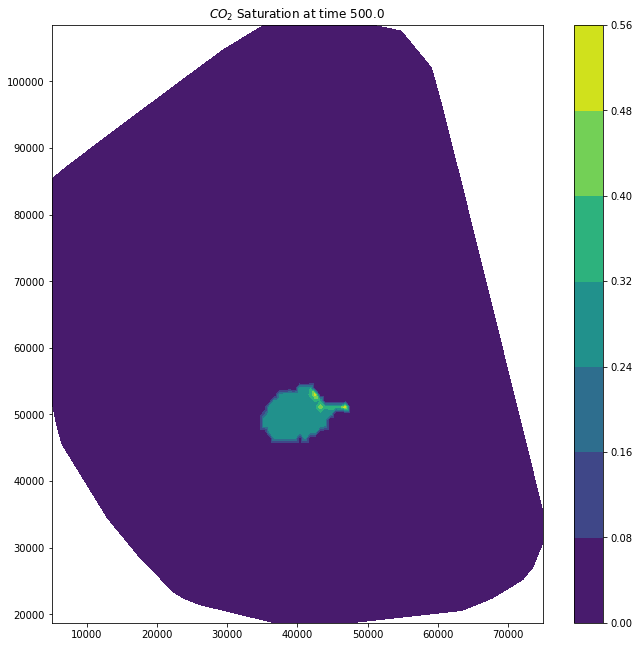

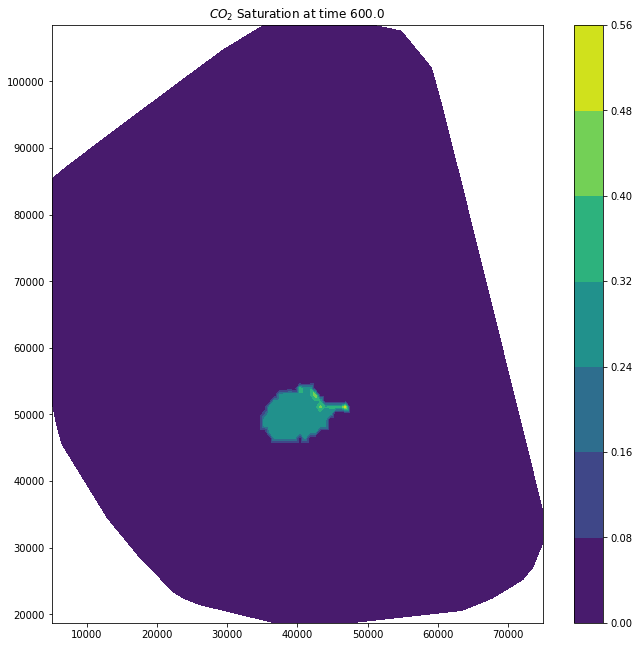

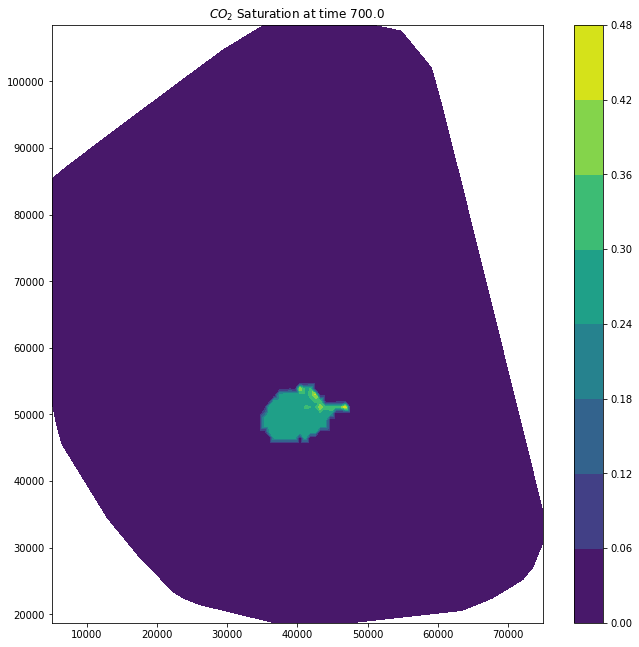

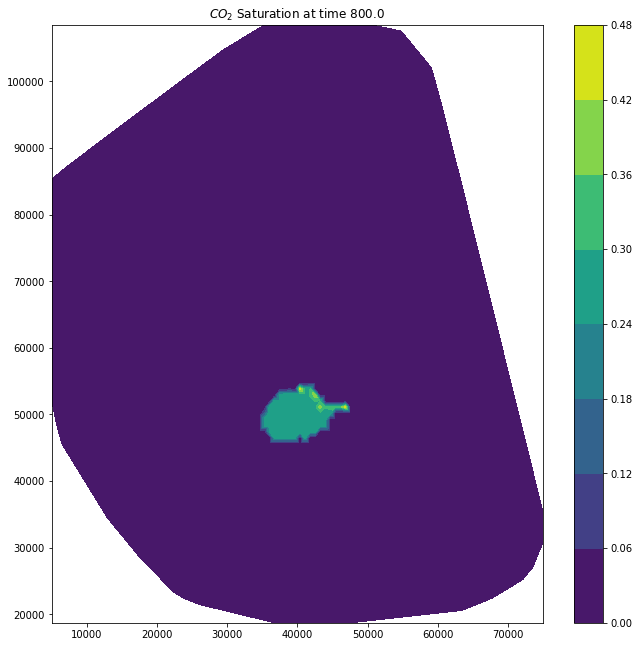

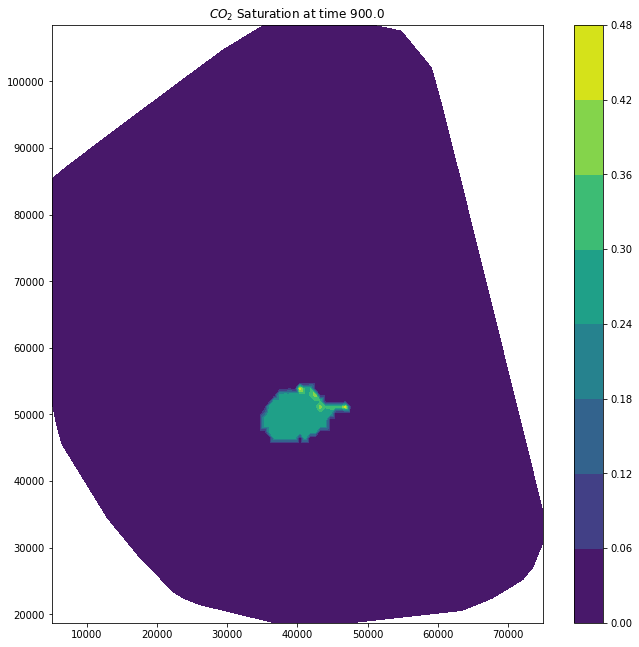

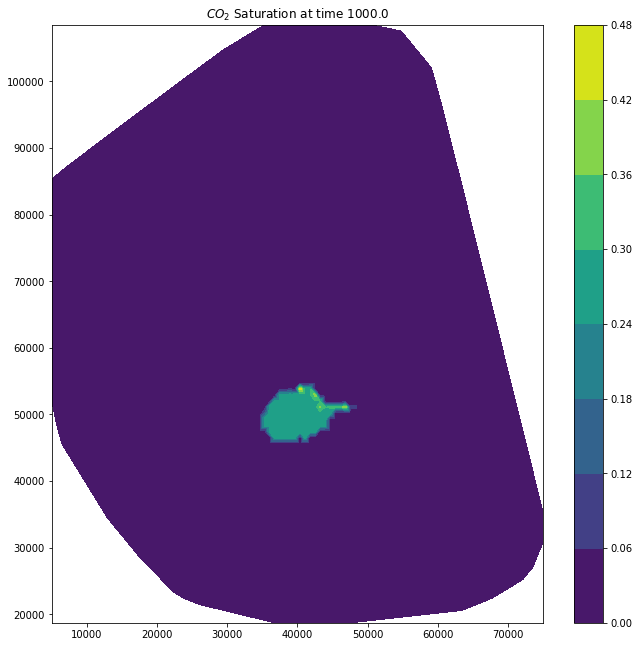

In [36]:
def sat_plots(sim_num):
    filename = f'Reservoir_data_sim{sim_num:02}.csv'
    folder = os.path.join(f'Sim{sim_num:02}', 'Sat')
    raw_data = np.genfromtxt(filename, delimiter=',')
    time_file = 'time_points.csv'
    times = np.genfromtxt(time_file, delimiter=',')
    points = raw_data[:, :2]
    data = raw_data[:, 2:]

    n_time = int(data.shape[1]/2)
    pressure = data[:, :n_time]
    saturation = data[:, n_time:]
    ds = np.sum(saturation > 0.05)
    dp = np.array([pressure[:, x] - pressure[:, 0] for x in range(1, n_time)])
    for i in range(n_time):
        plt.figure(figsize=(11,11))
        plt.clf()
        plt.tricontourf(points[:, 0], points[:, 1], saturation[:, i])
        plt.colorbar()
        plt.title(f'$CO_2$ Saturation at time {times[i]}')
        plt.savefig(os.path.join(folder, f'Sat_{i:02}'))
    return
sat_plots(14)

D:\Anaconda3_0818\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


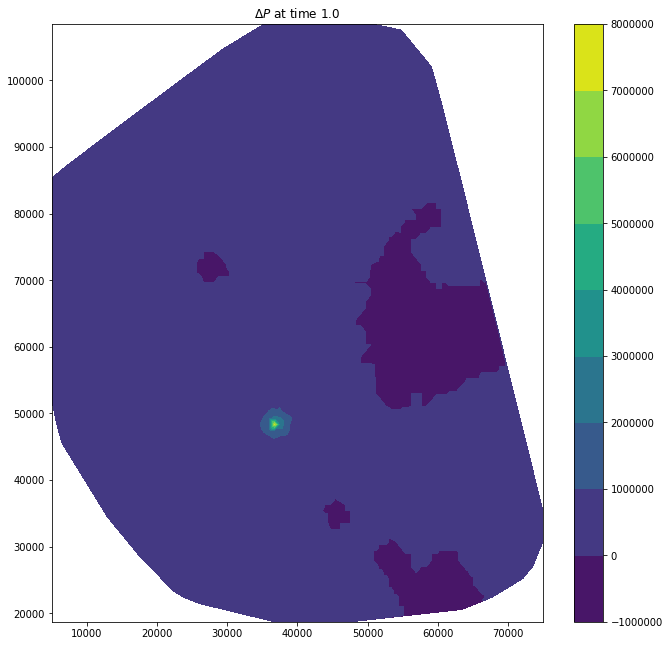

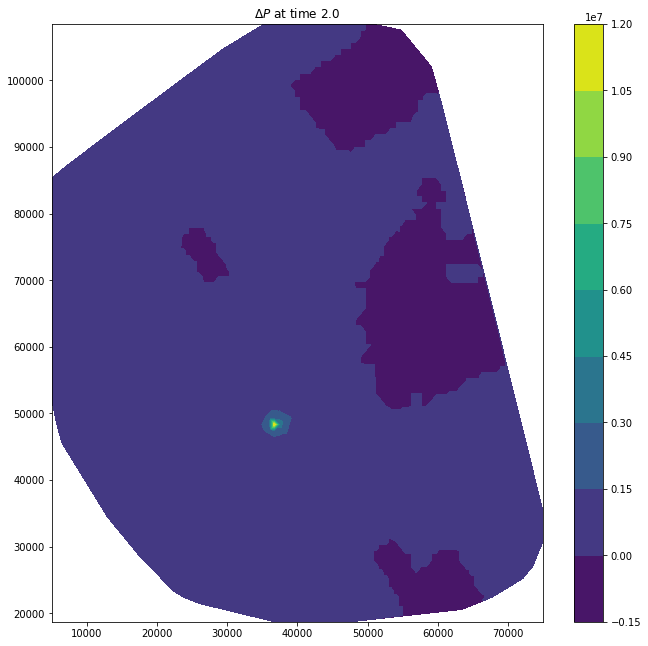

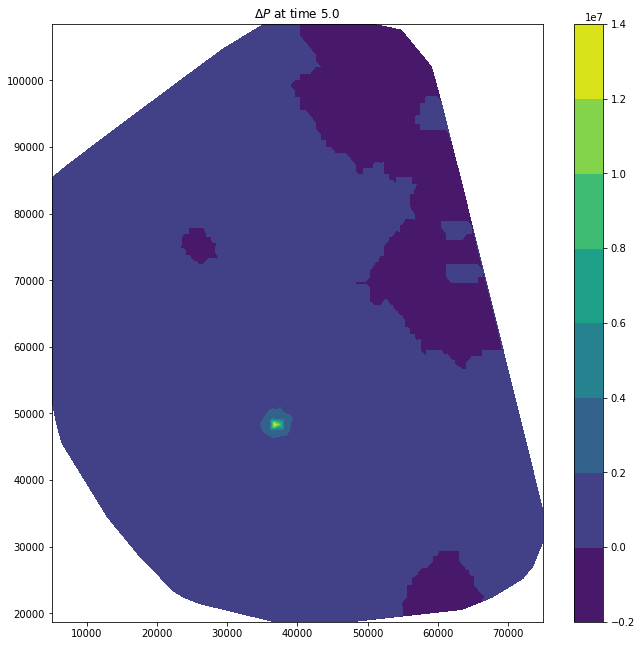

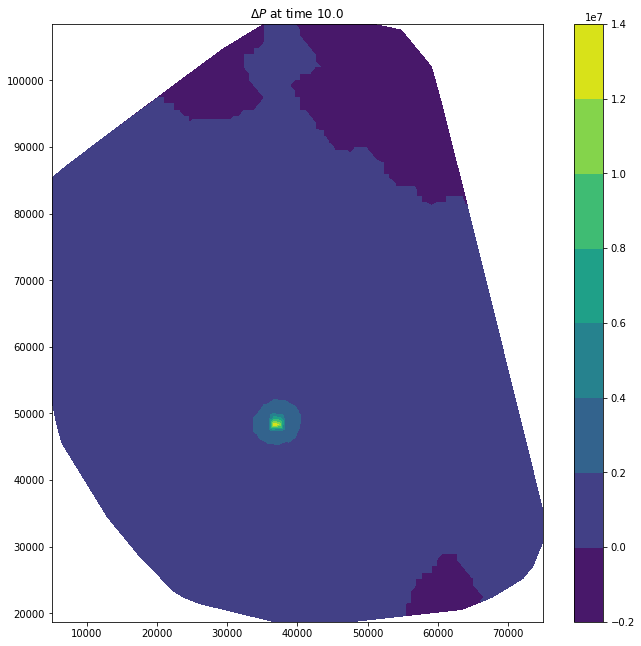

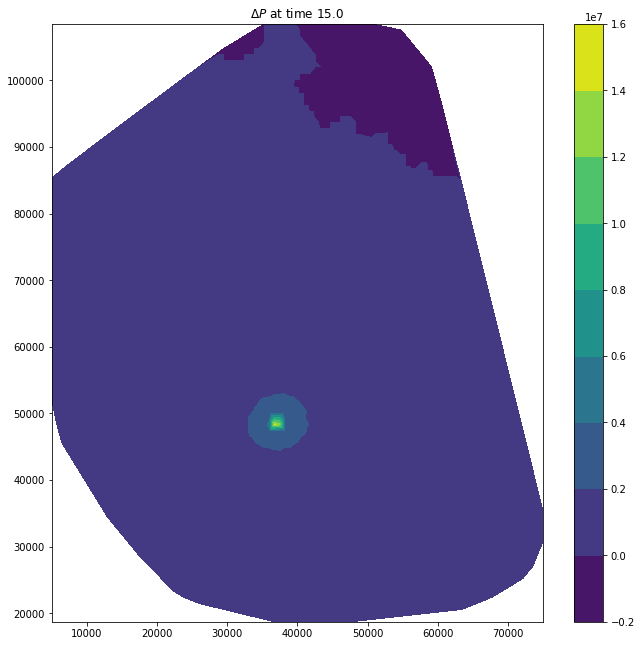

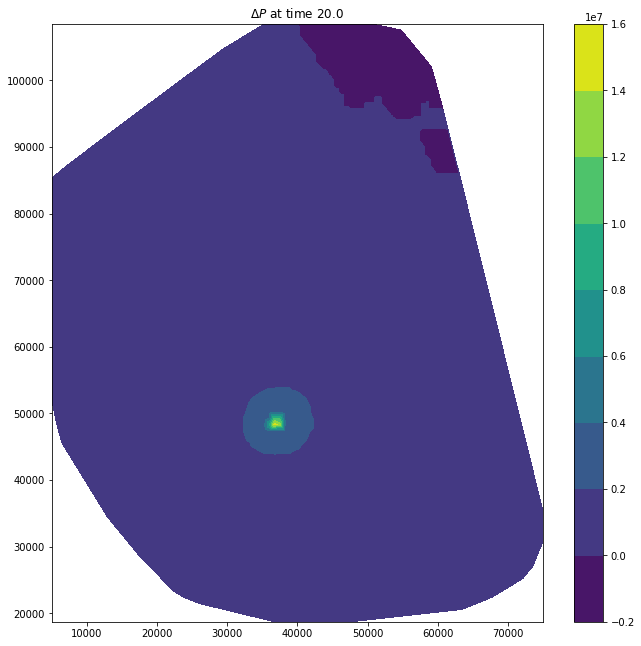

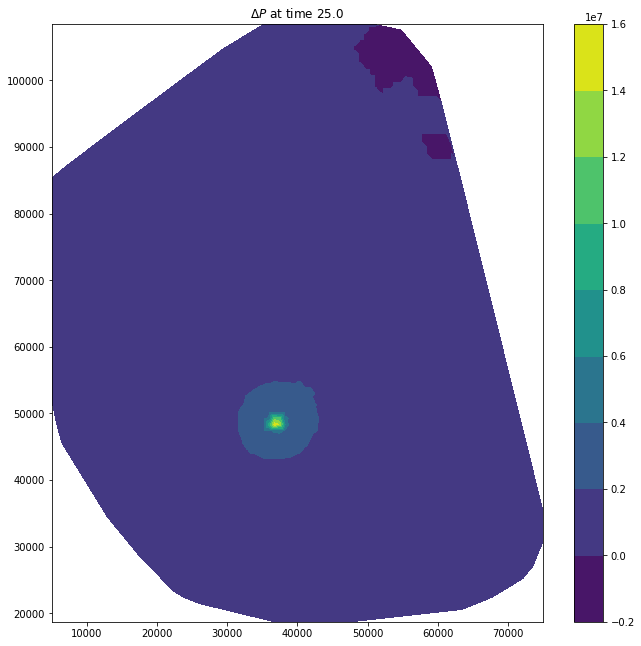

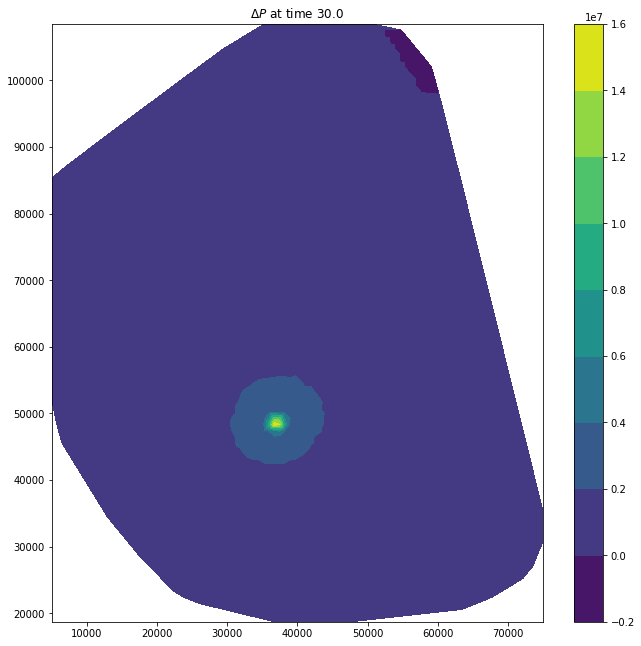

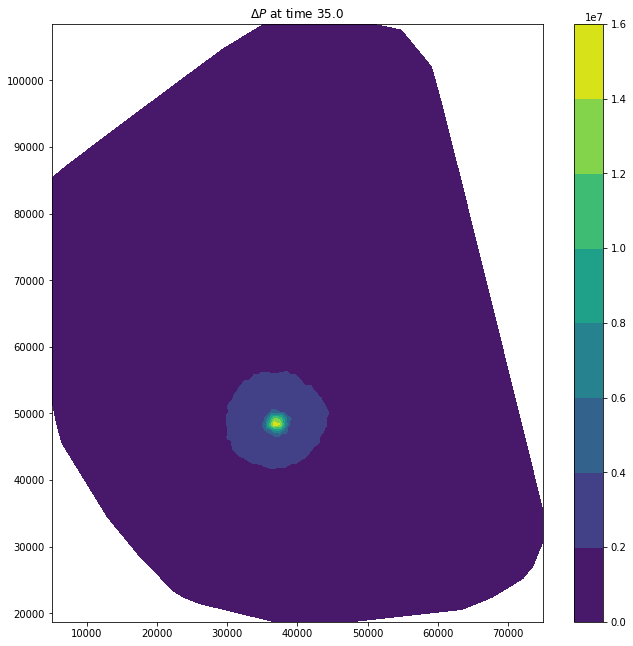

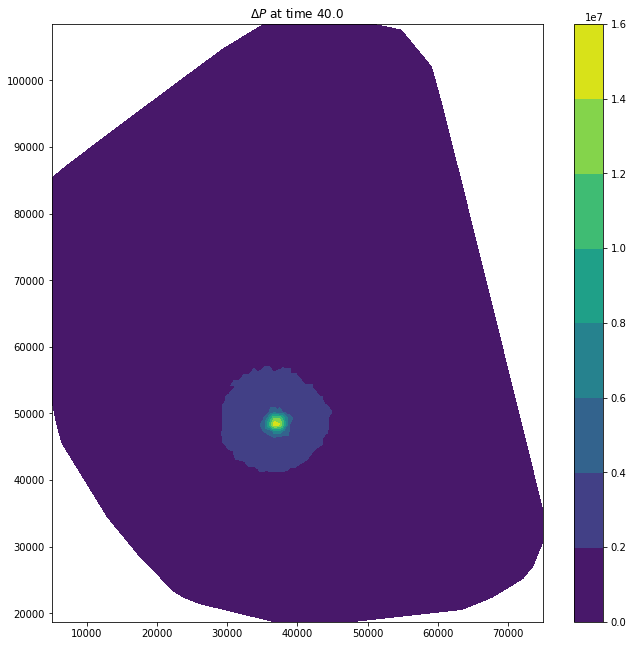

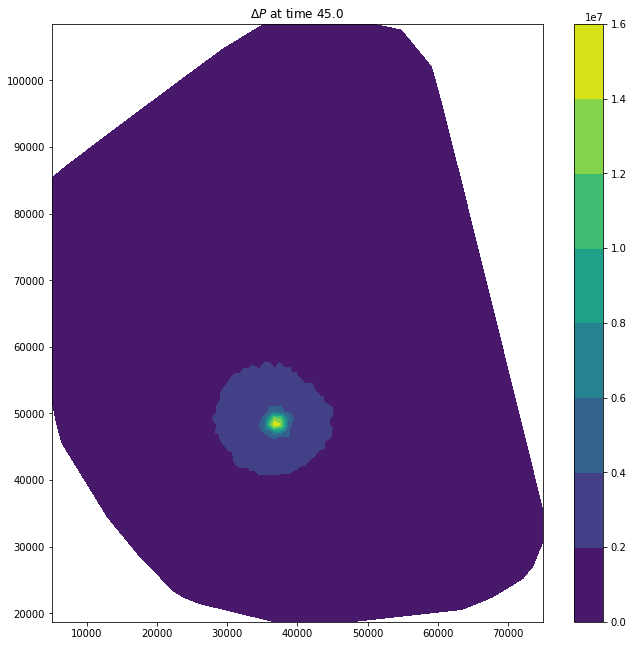

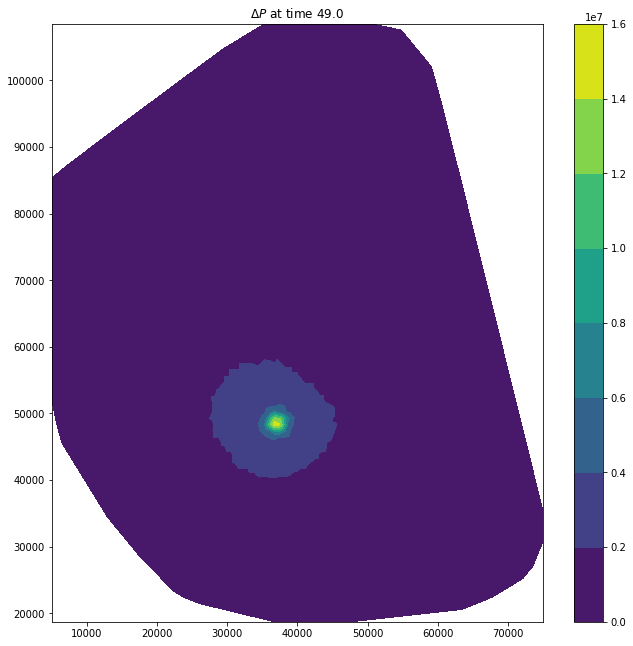

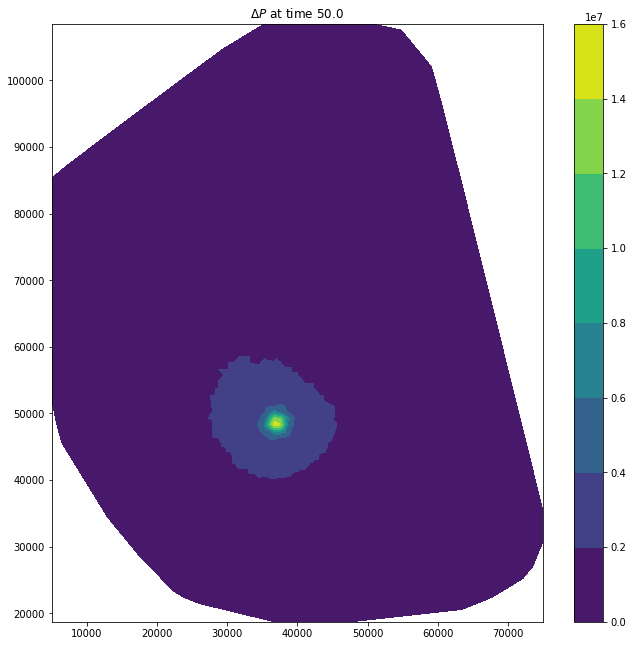

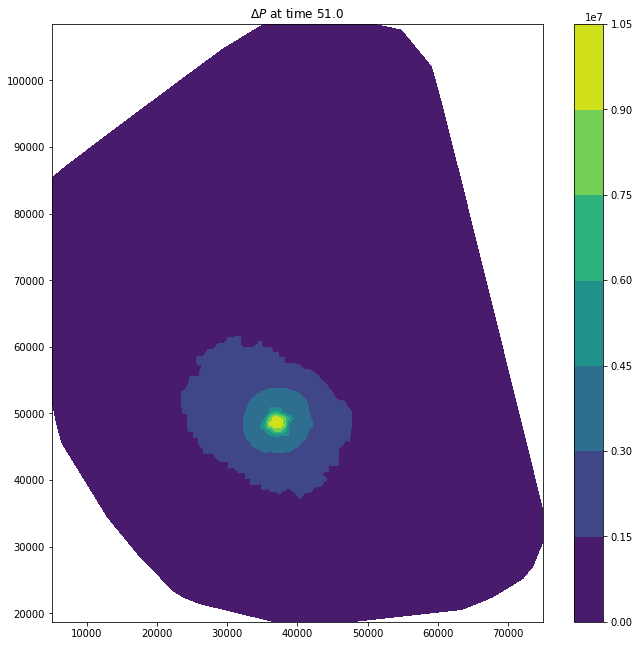

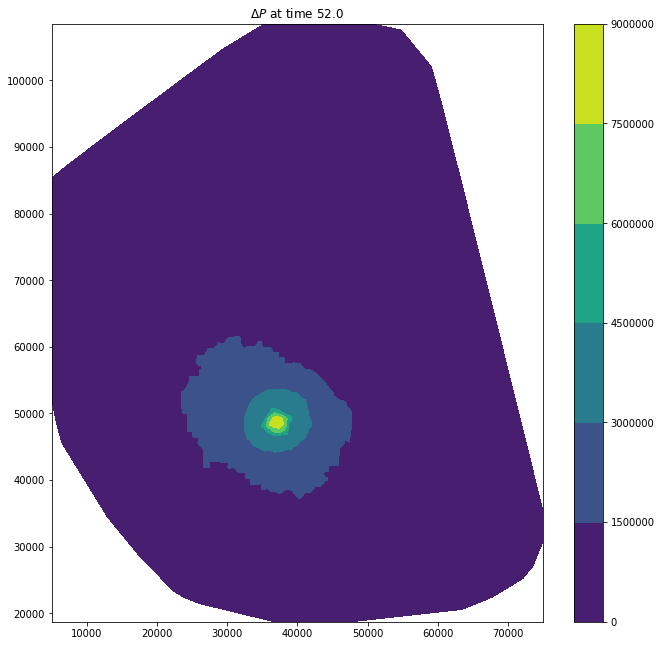

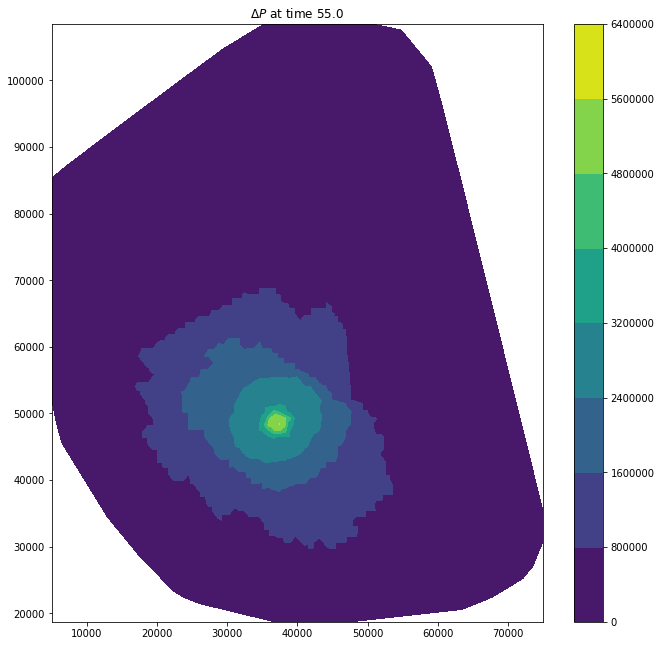

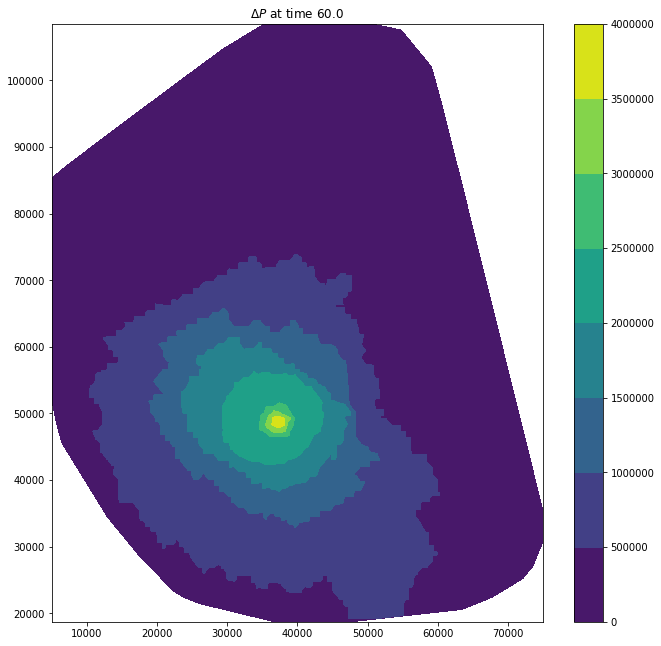

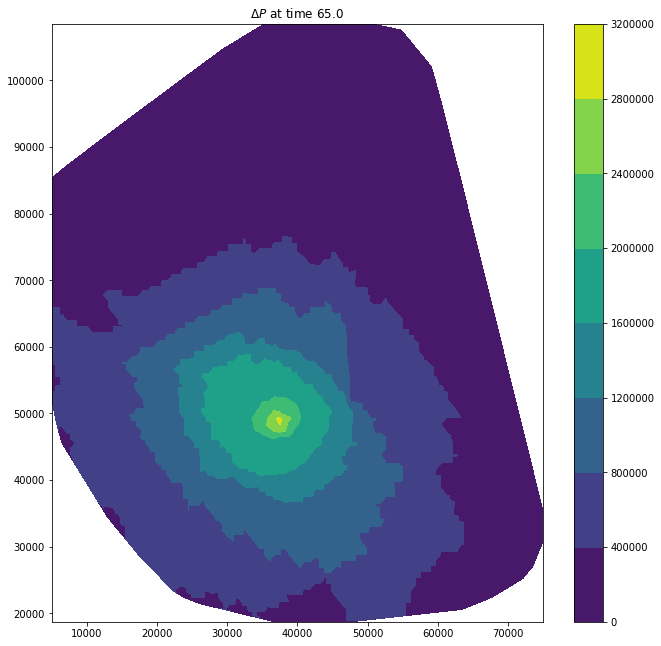

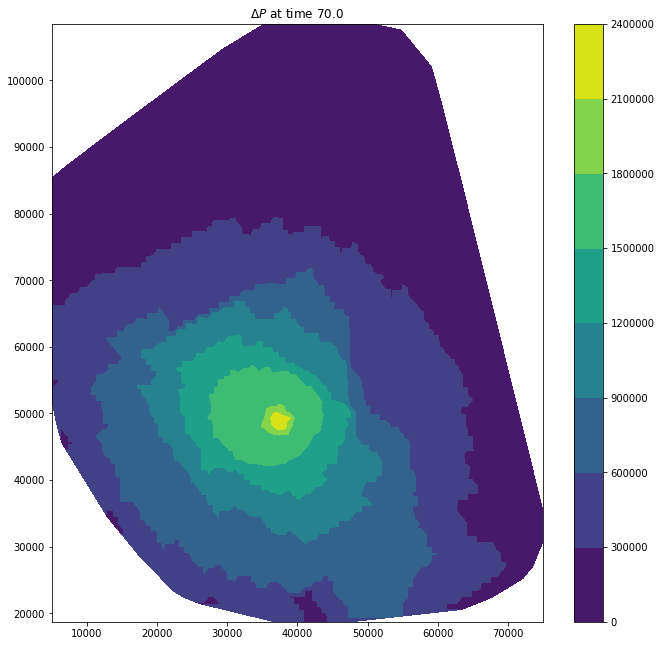

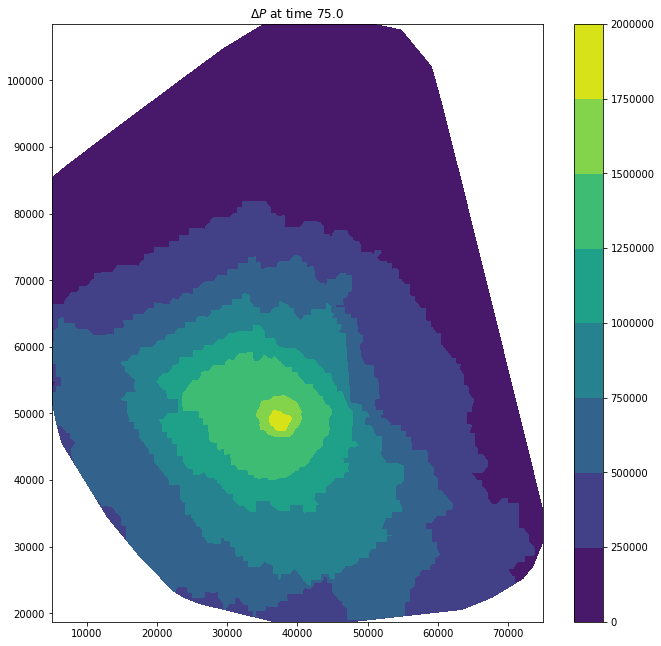

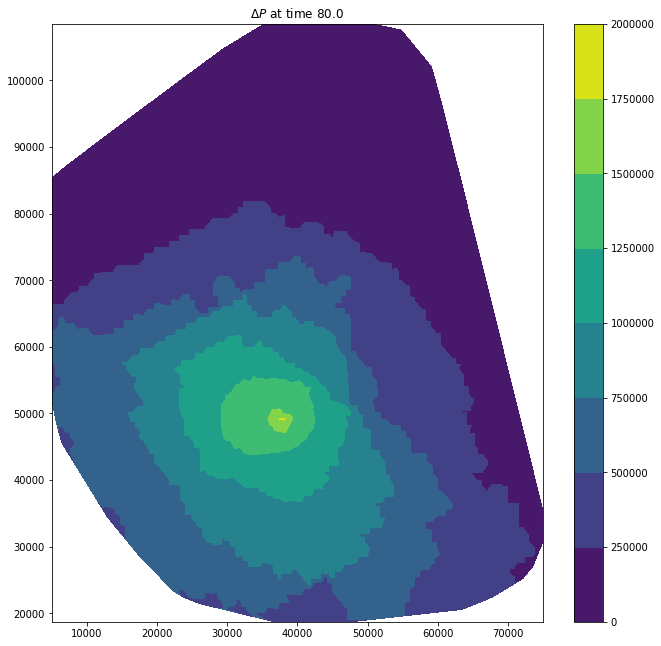

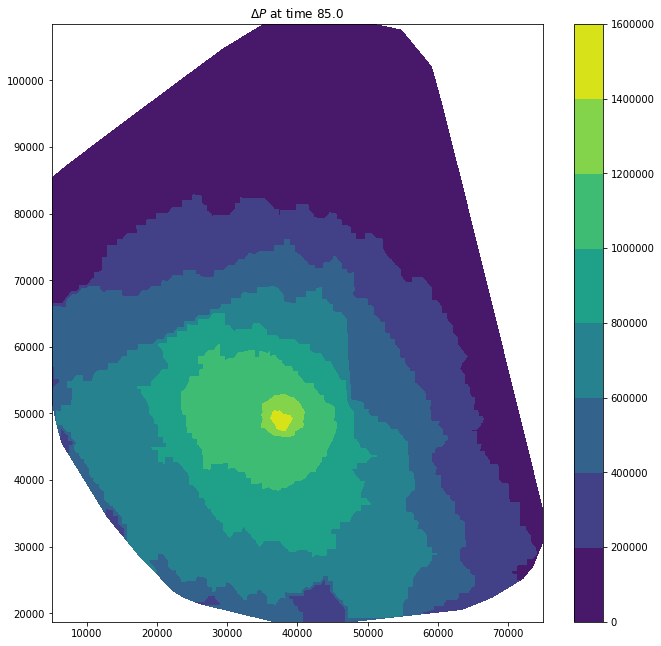

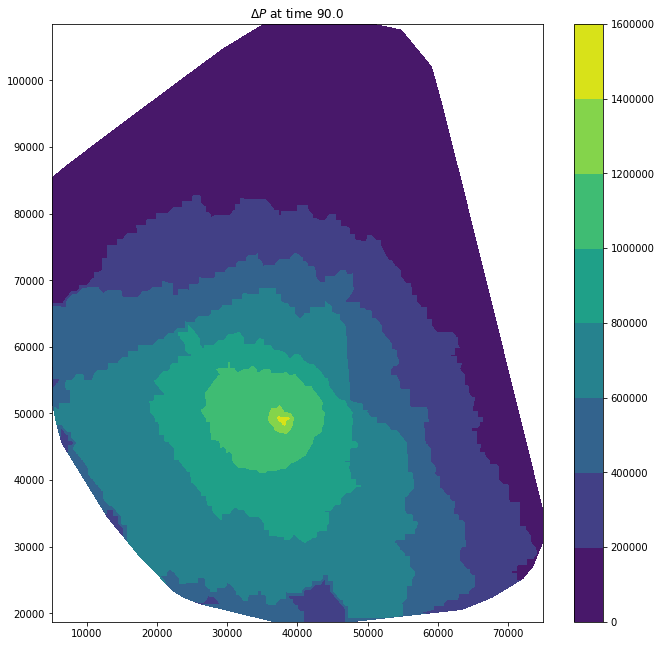

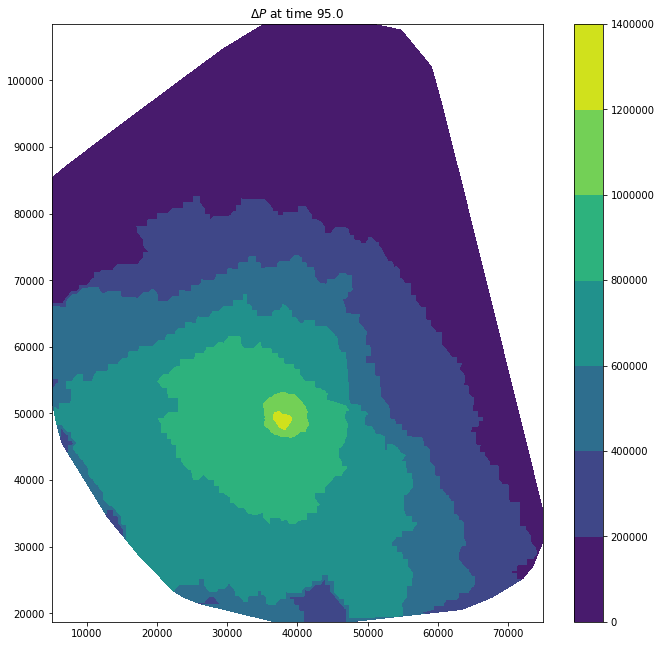

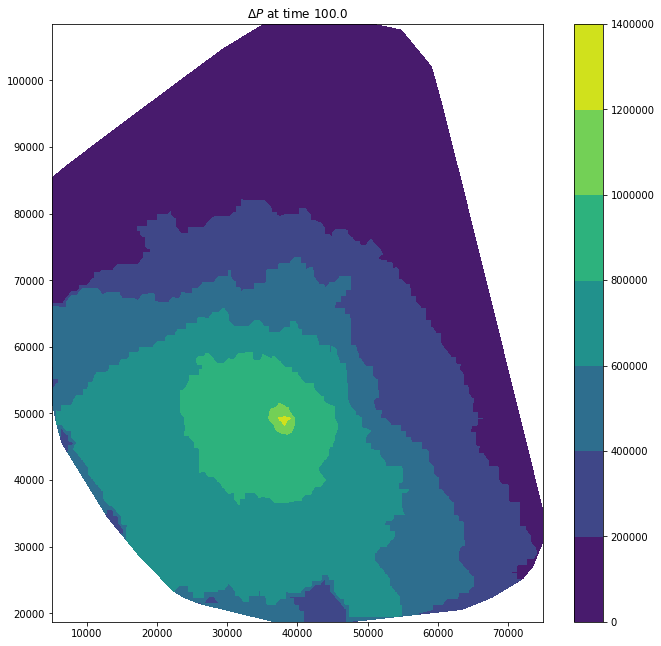

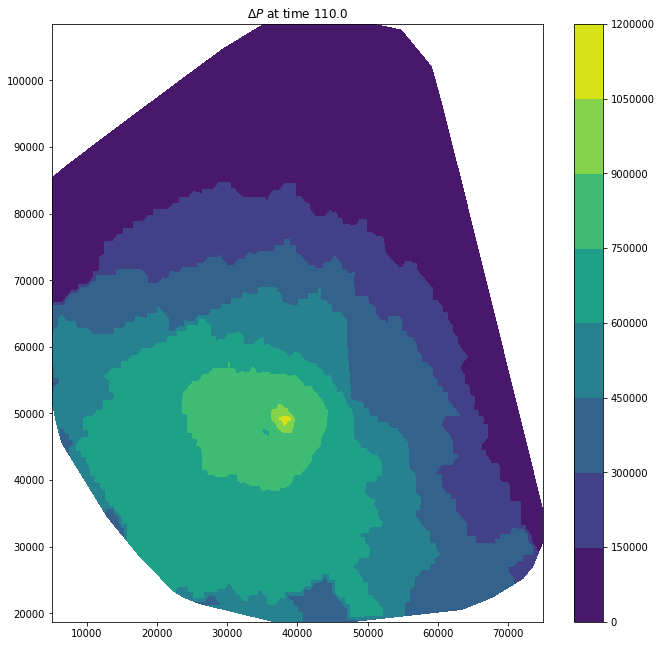

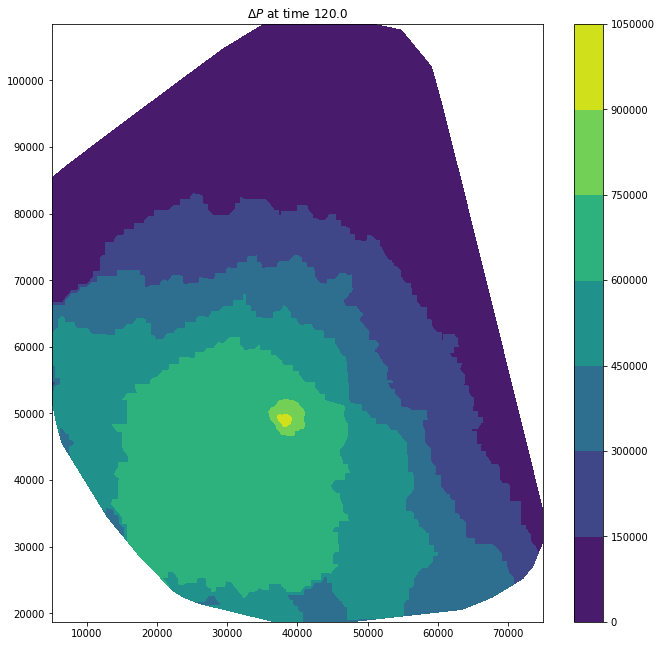

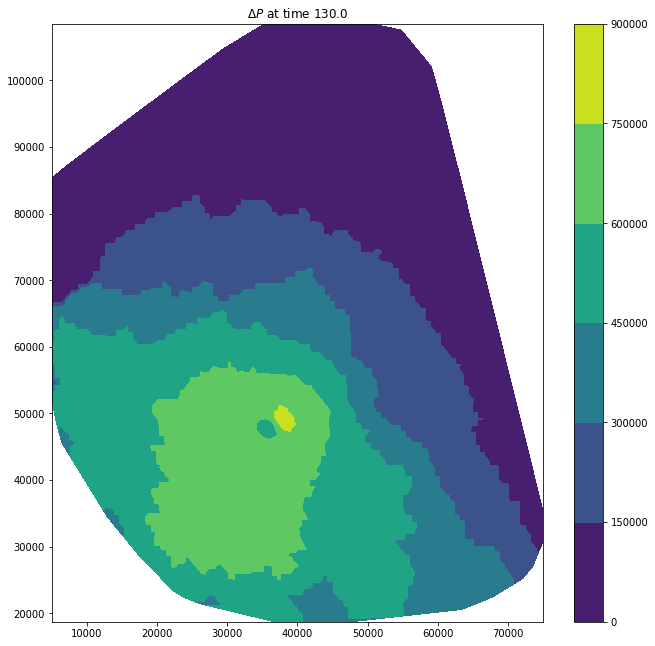

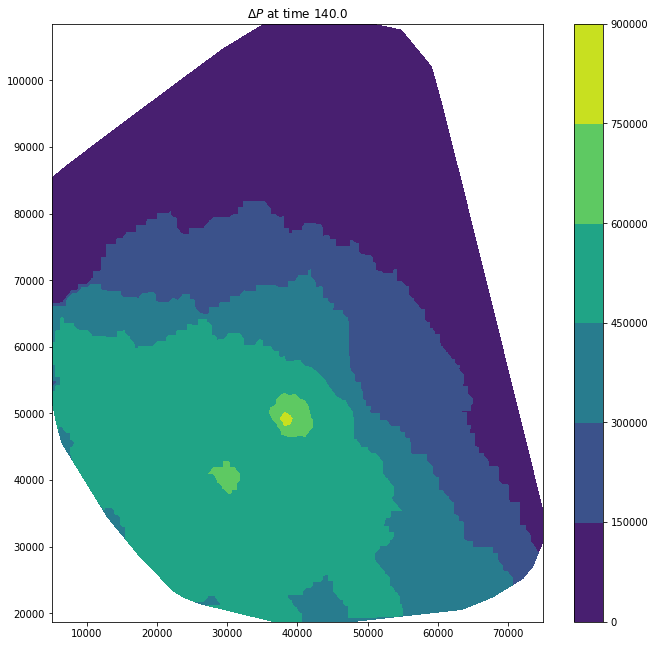

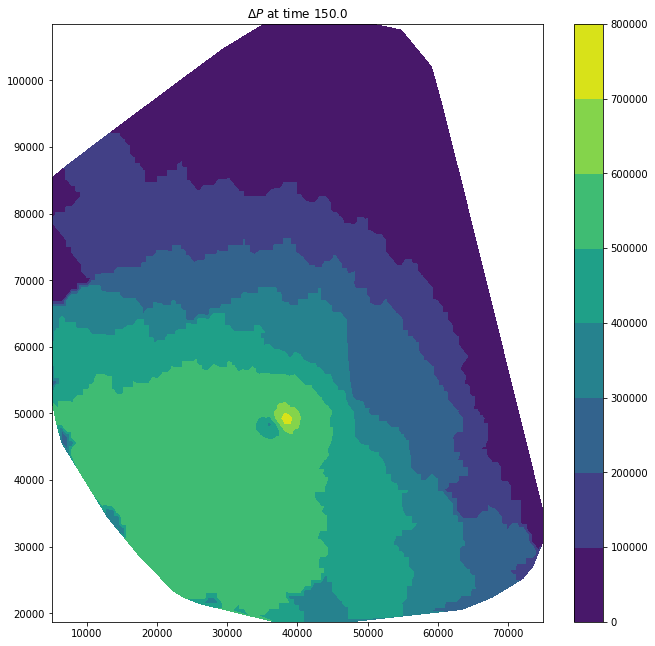

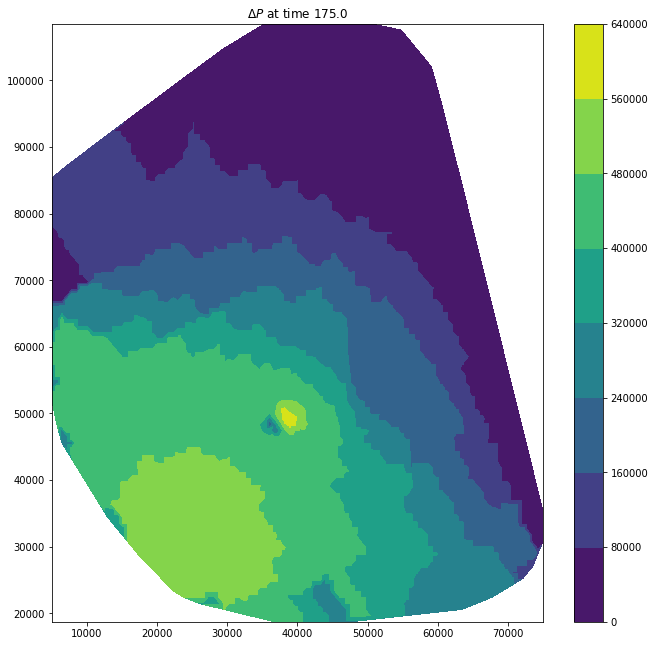

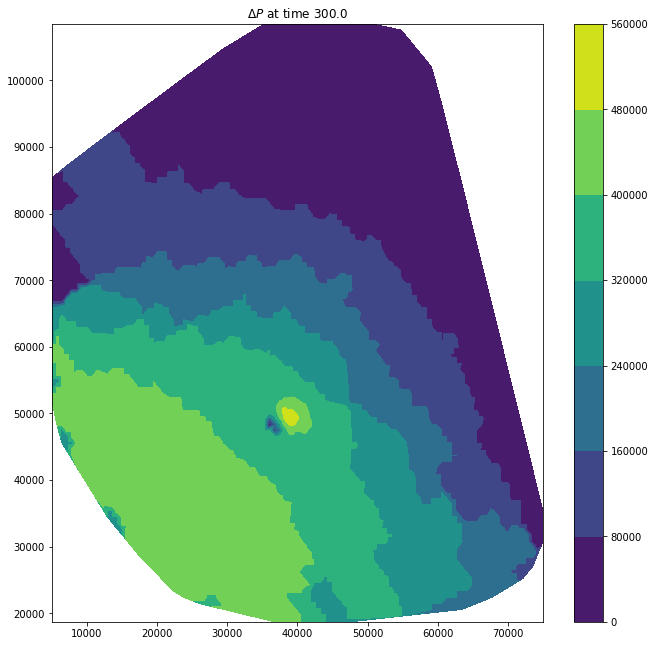

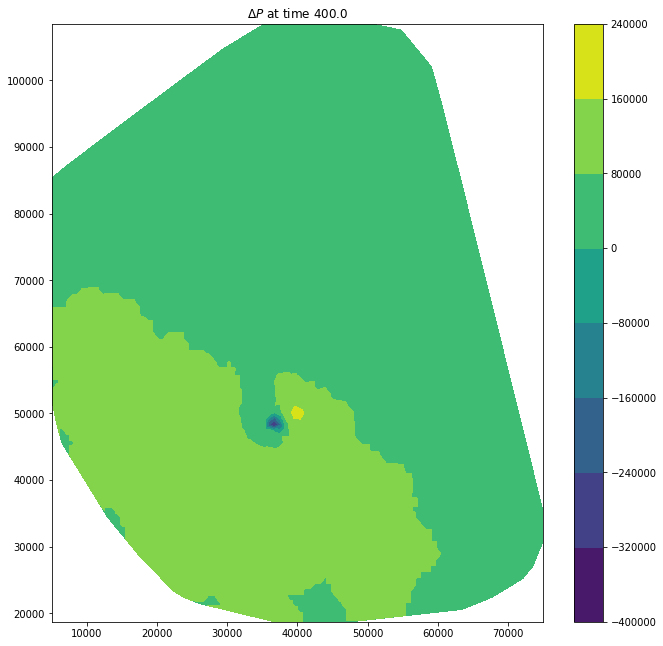

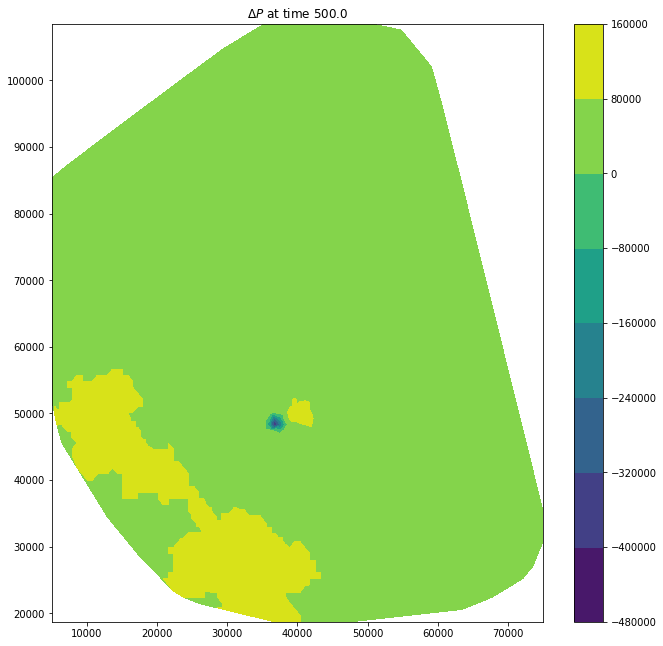

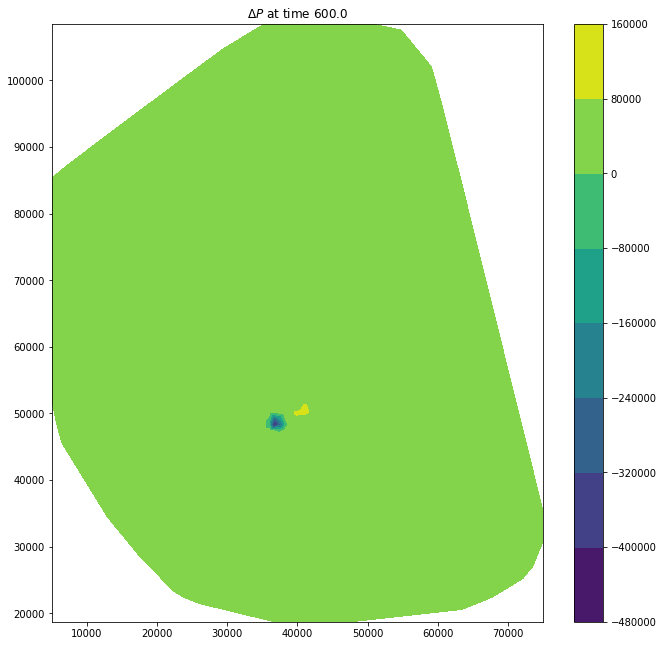

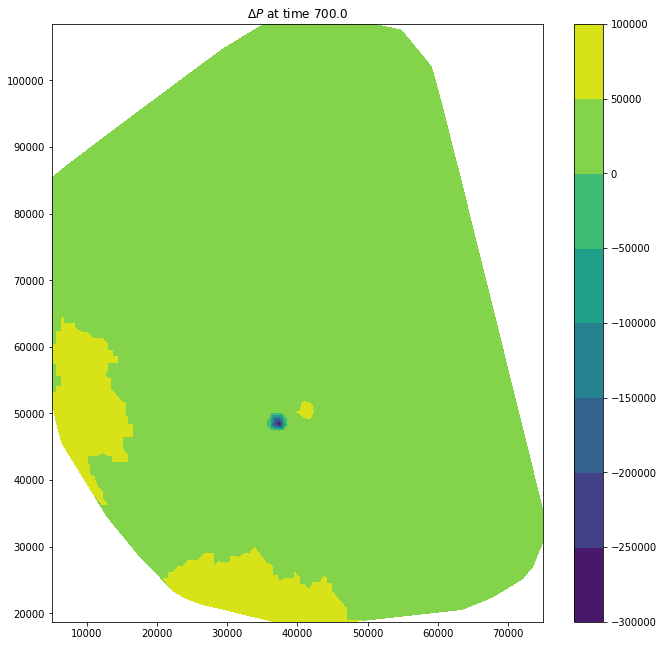

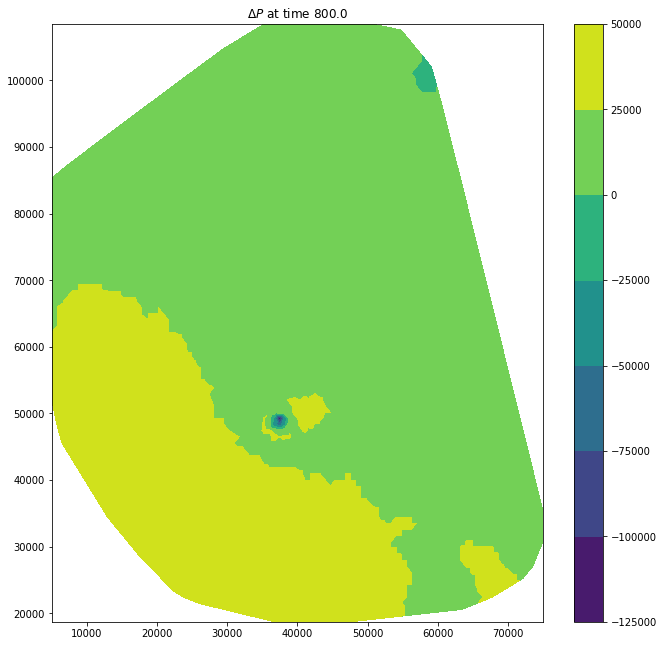

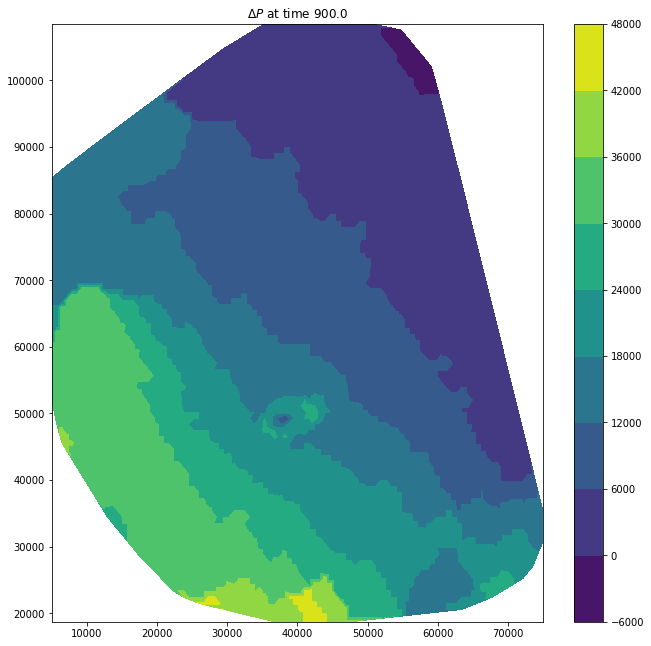

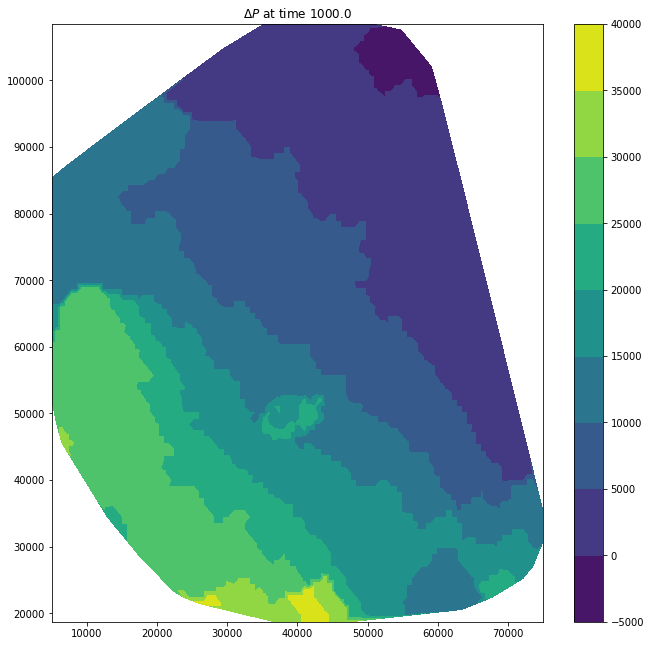

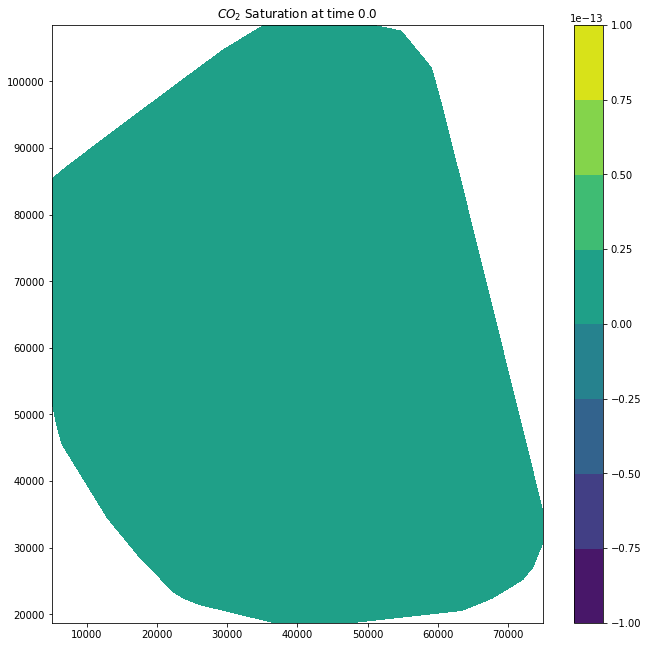

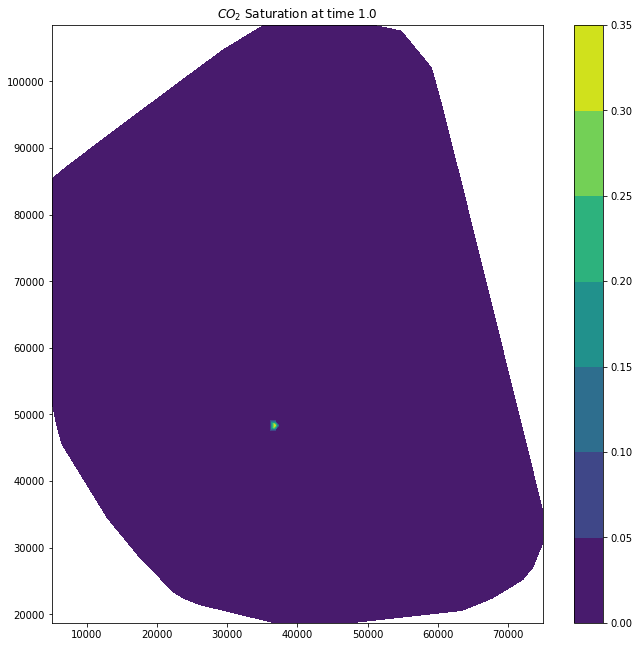

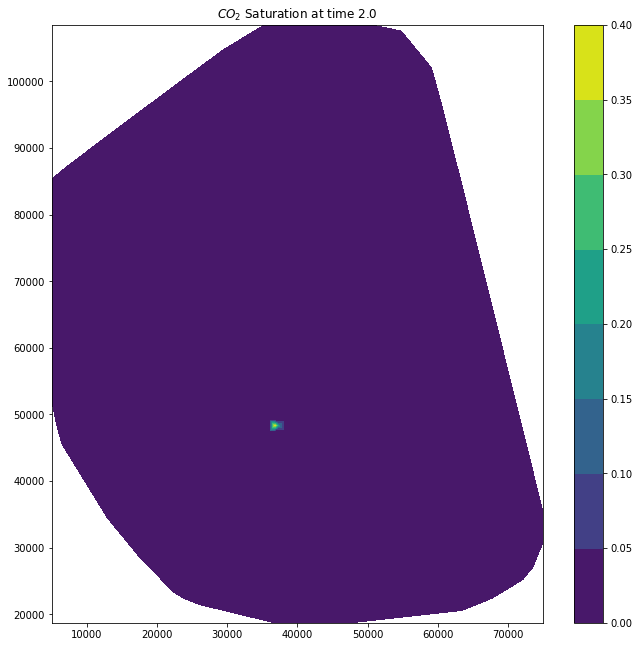

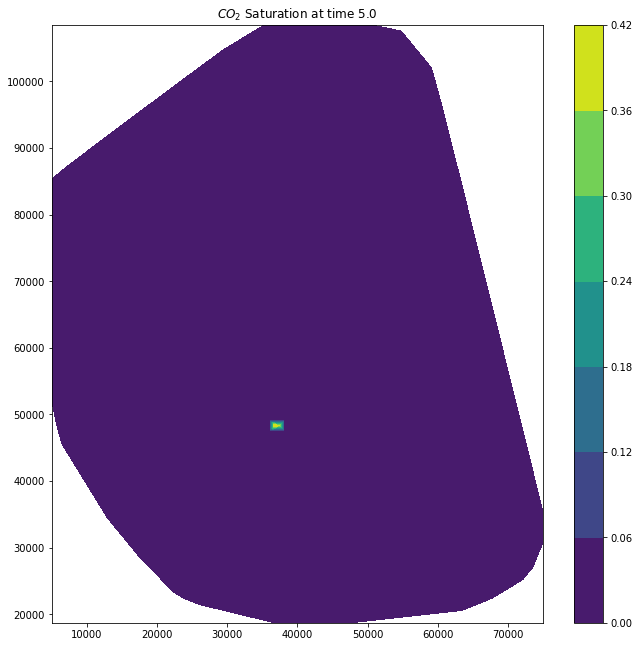

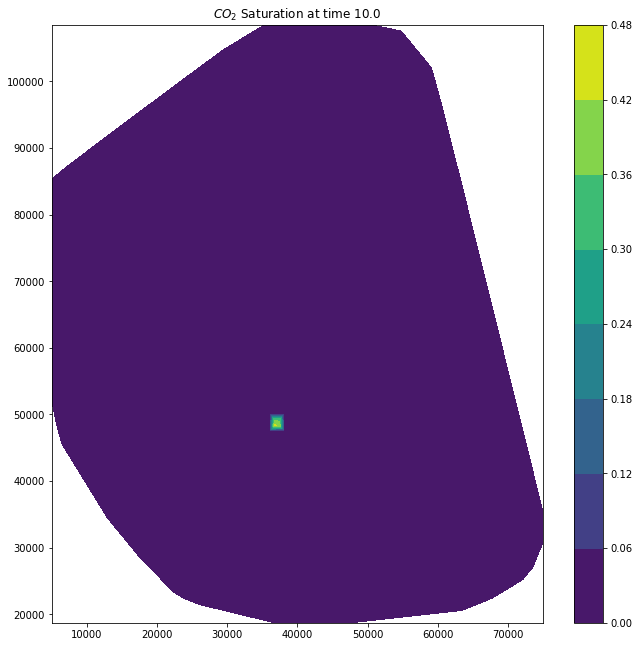

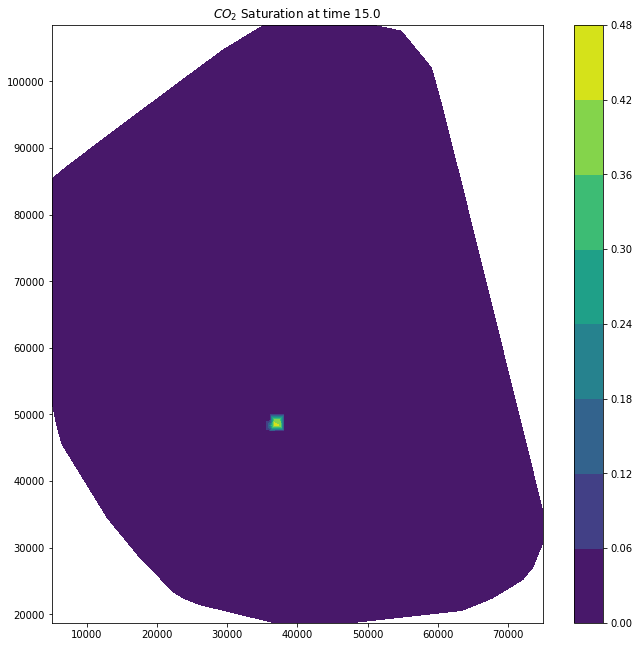

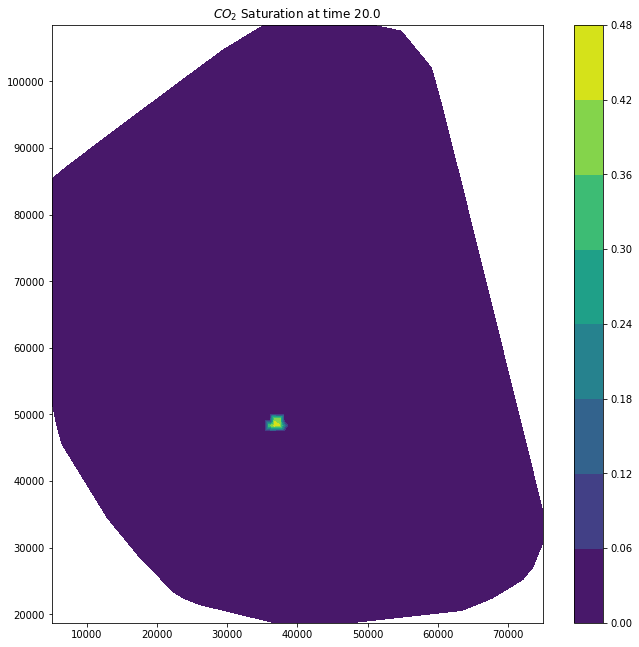

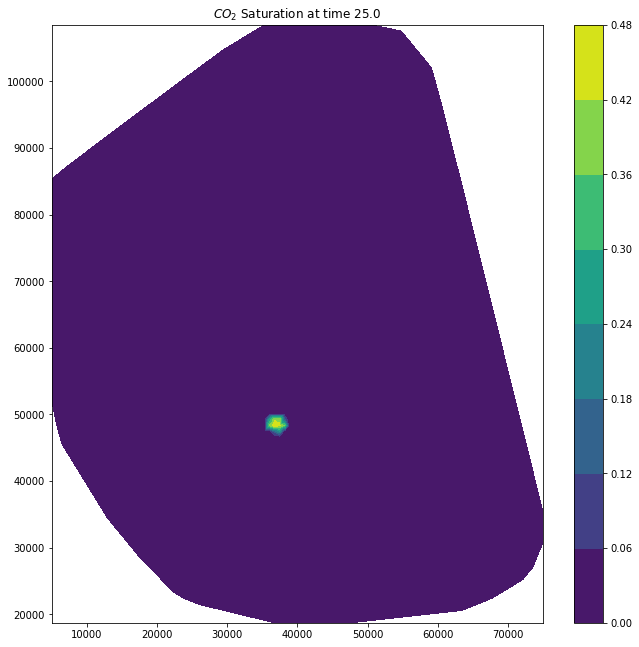

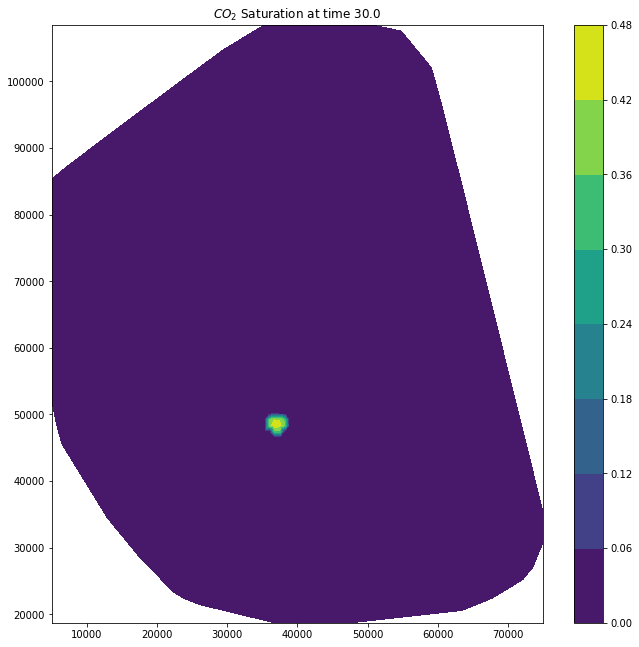

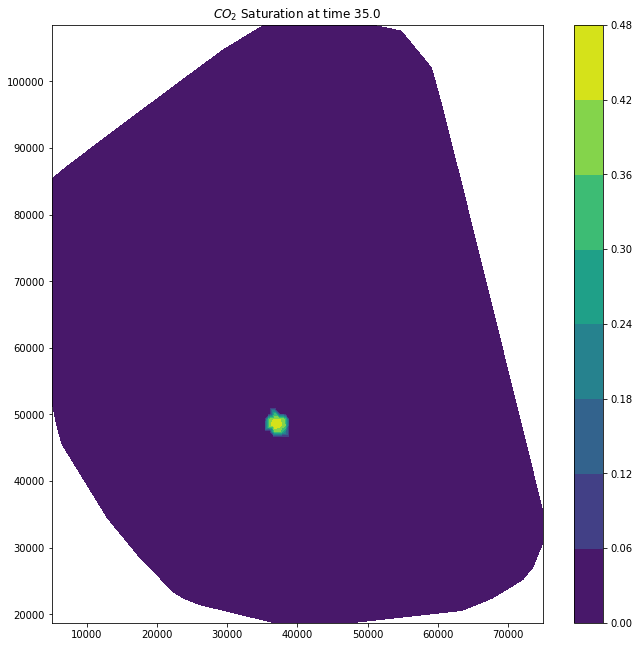

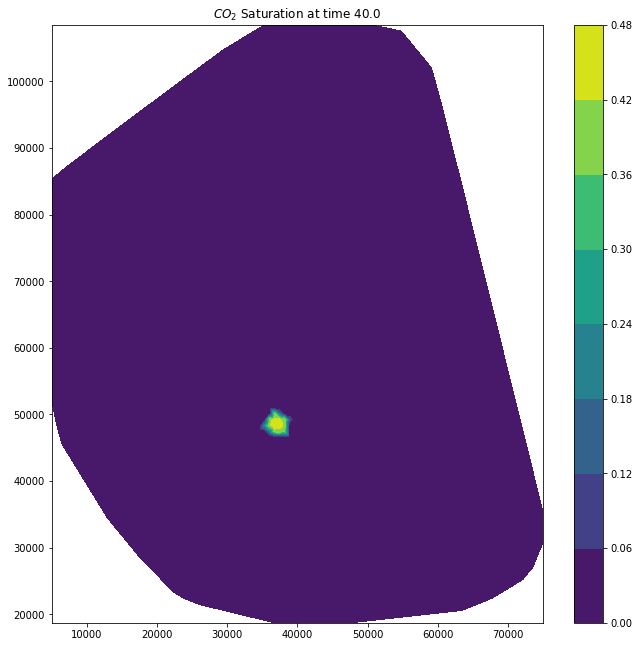

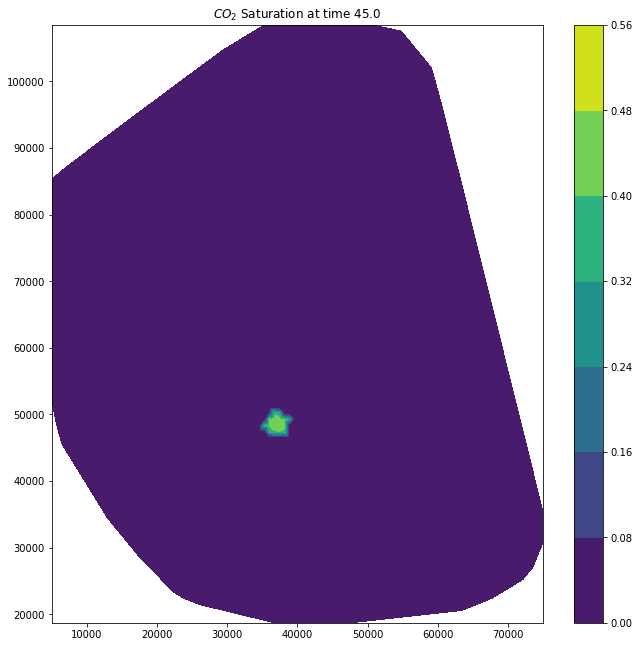

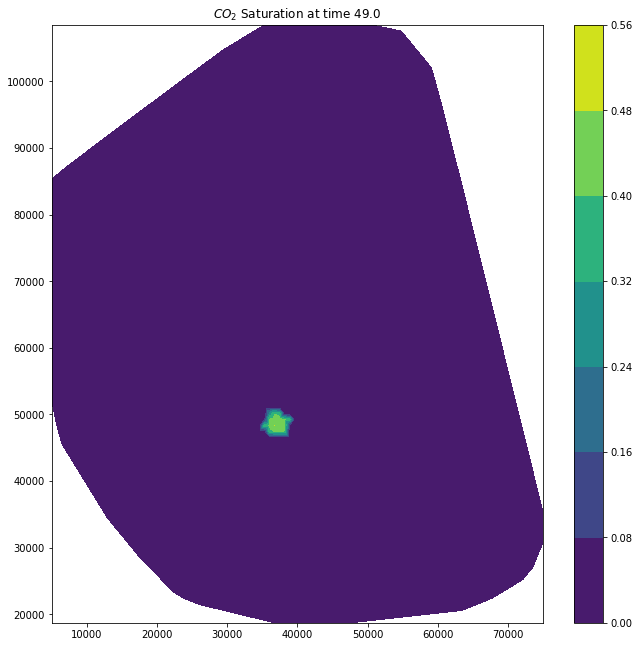

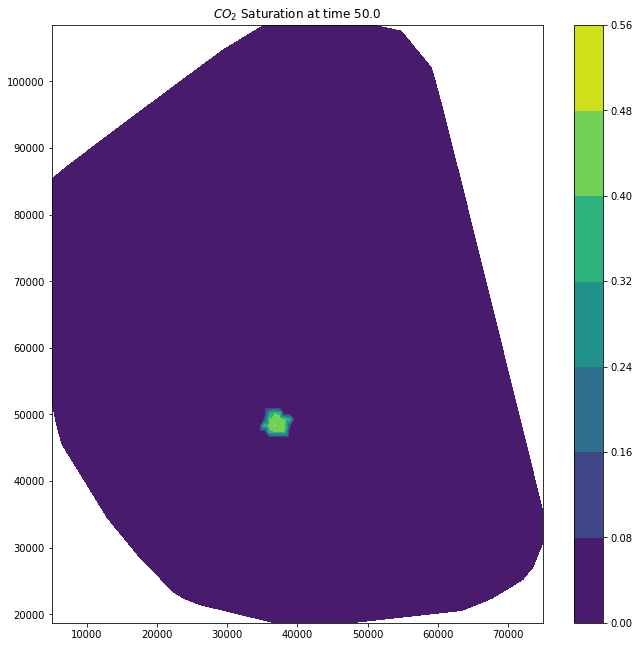

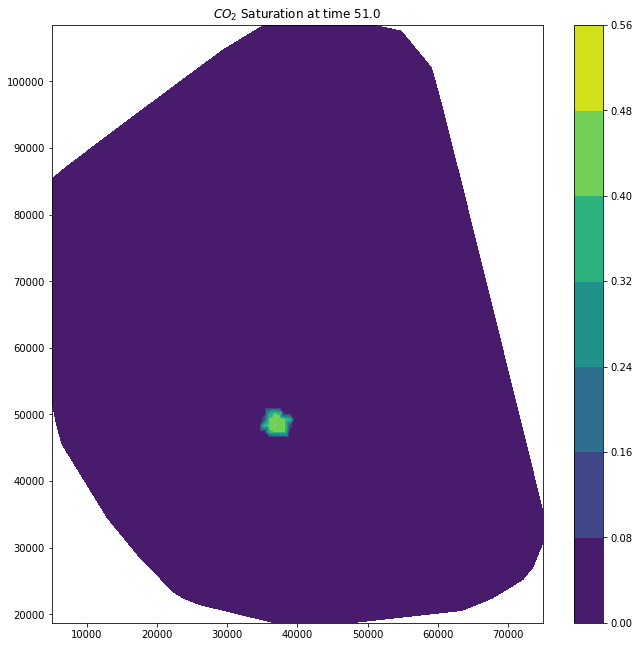

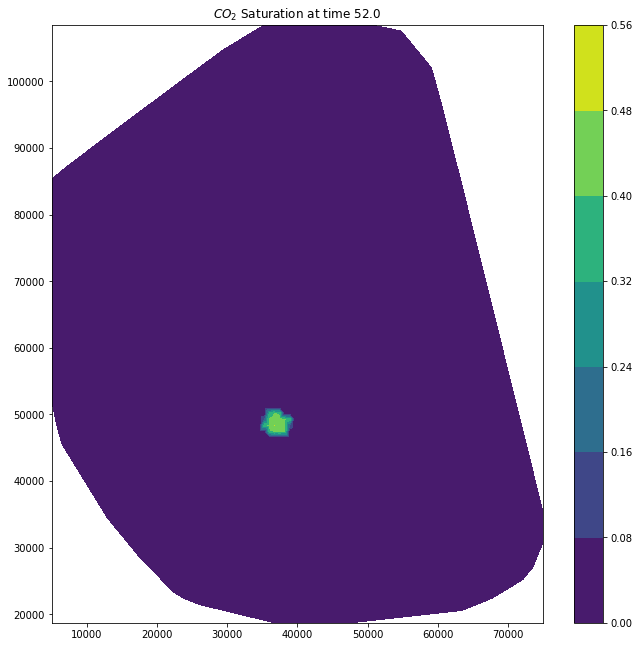

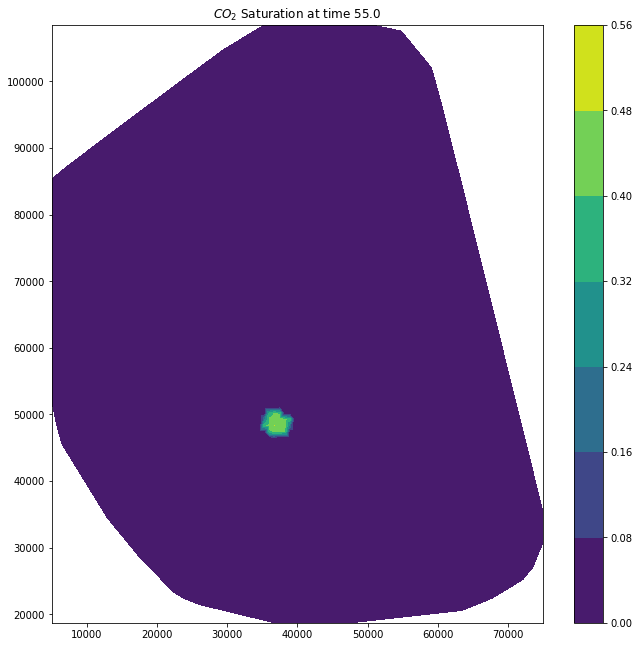

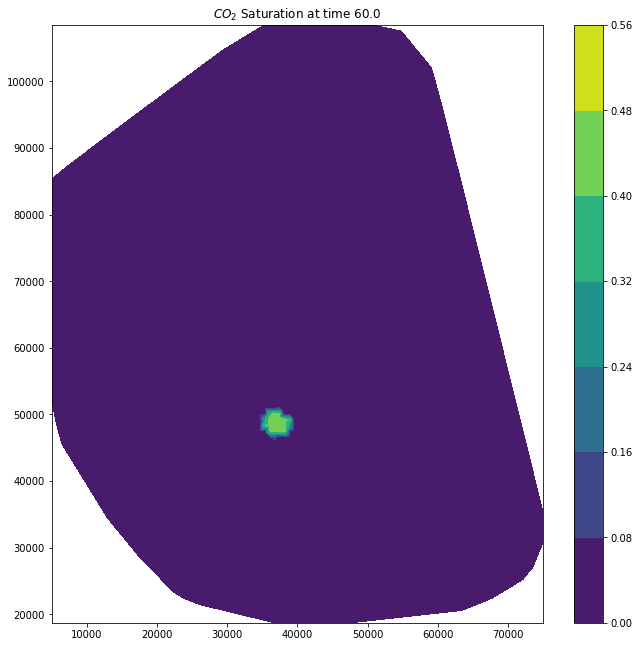

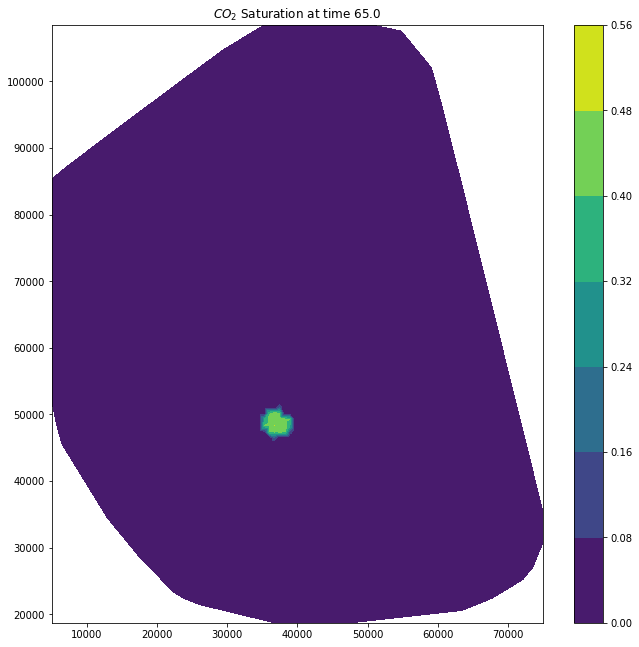

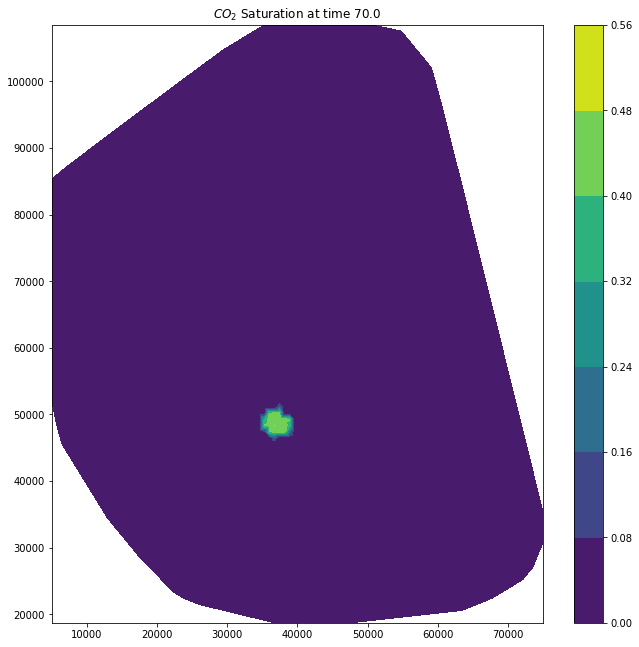

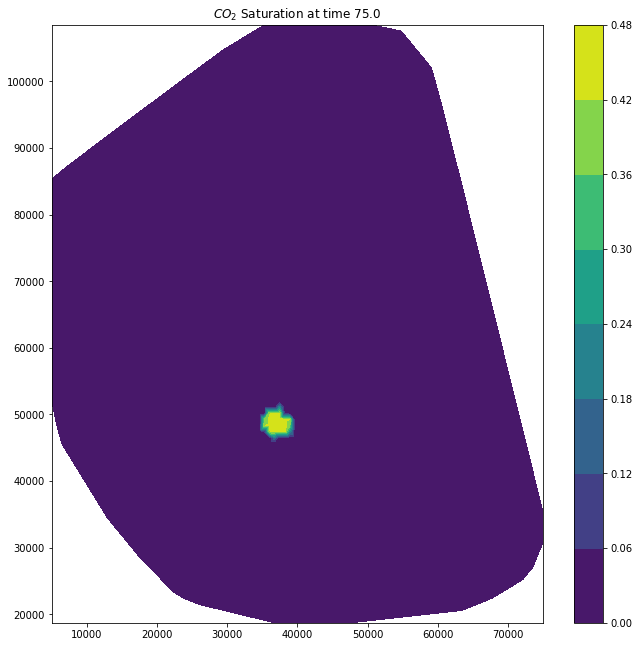

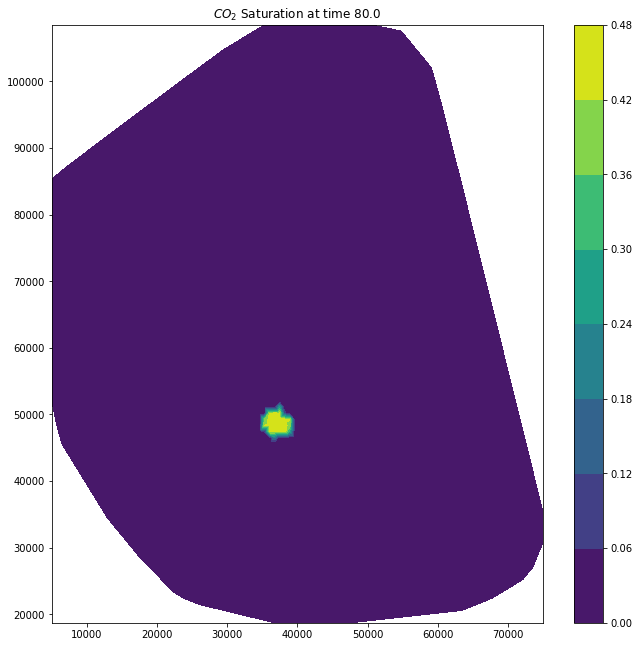

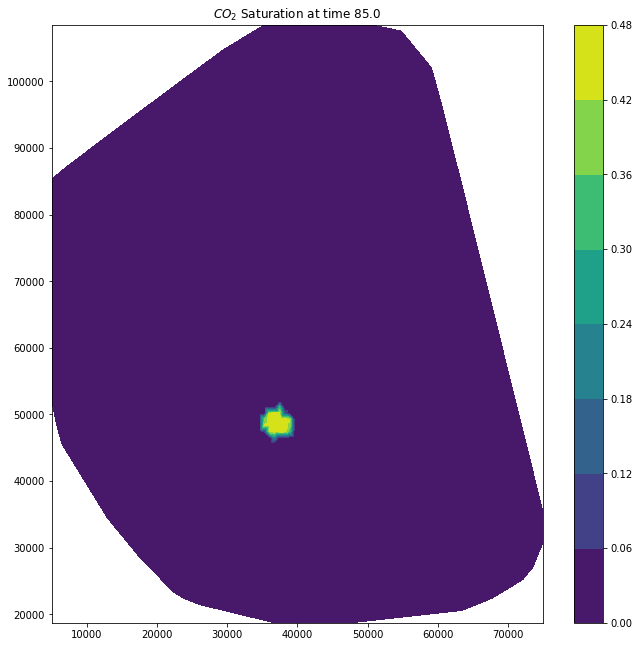

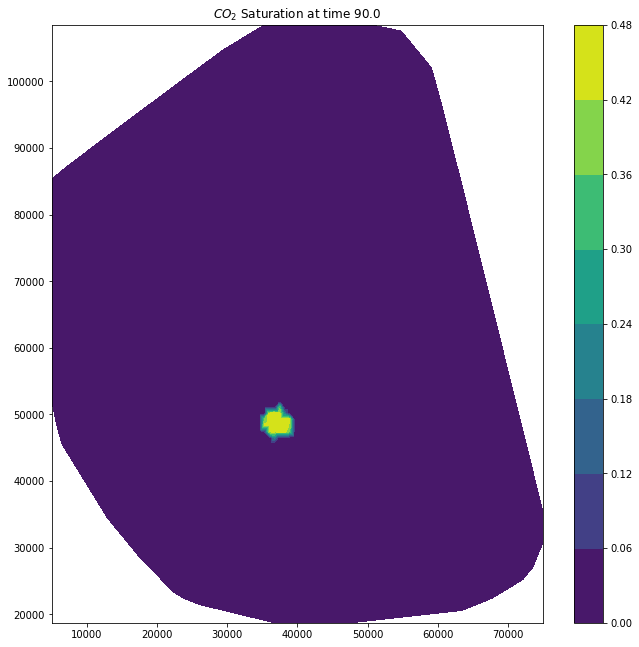

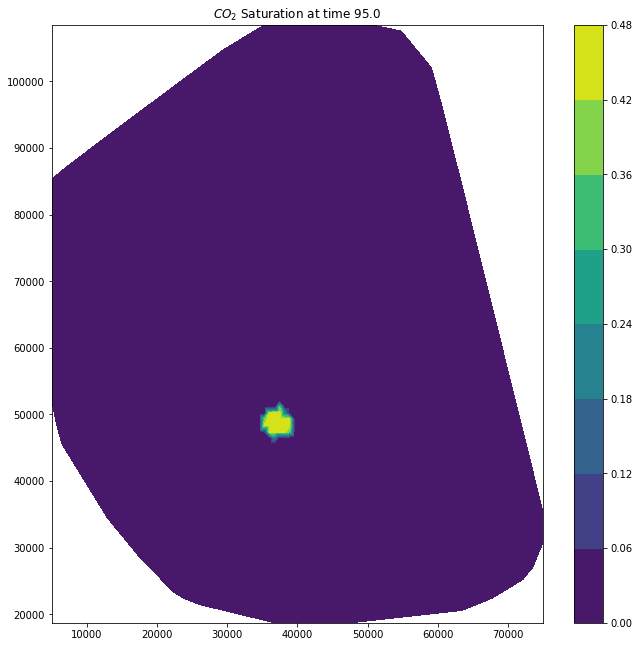

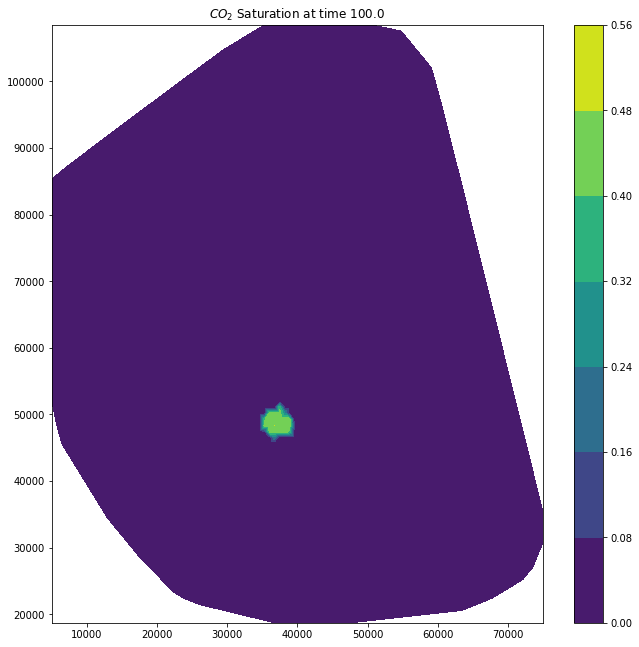

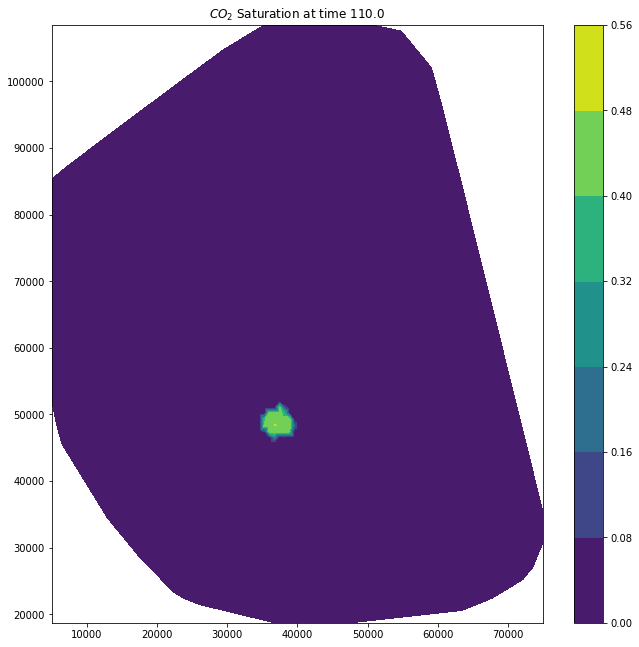

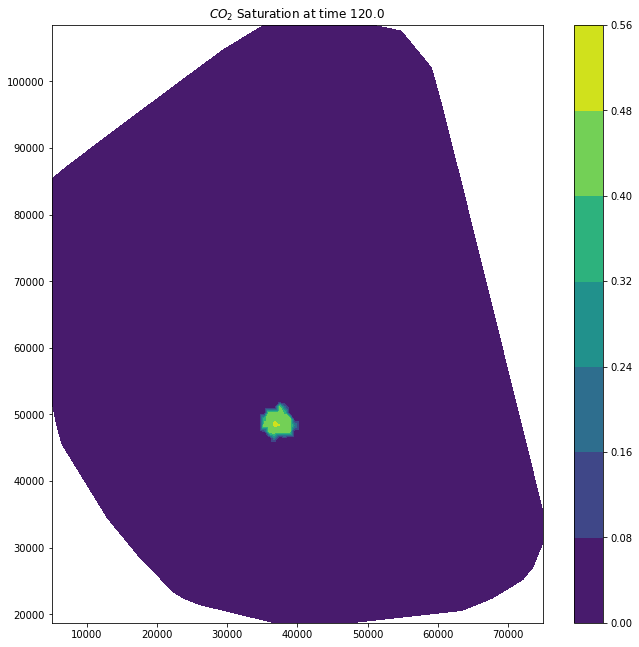

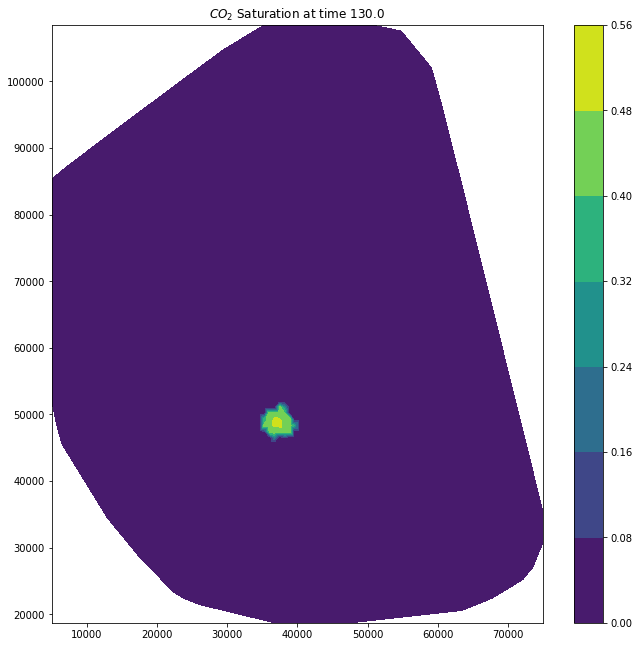

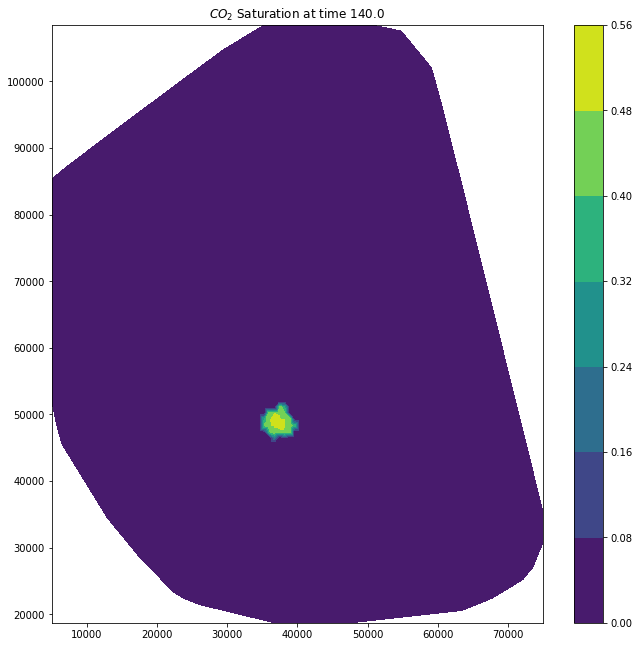

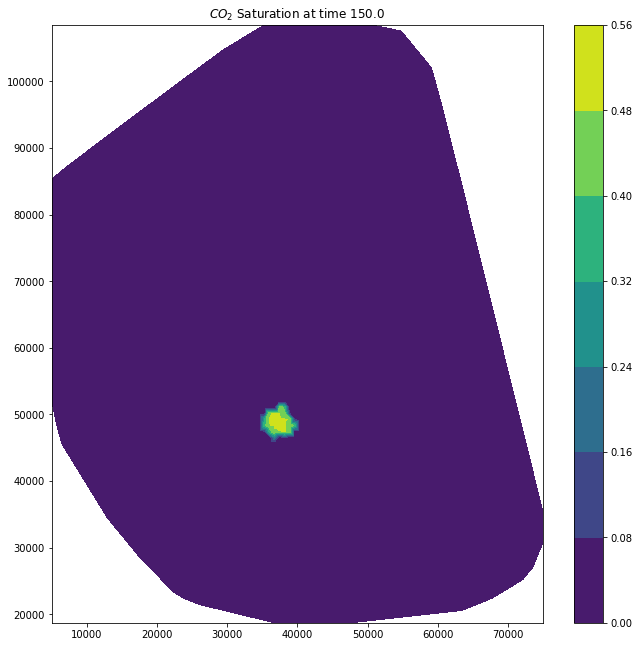

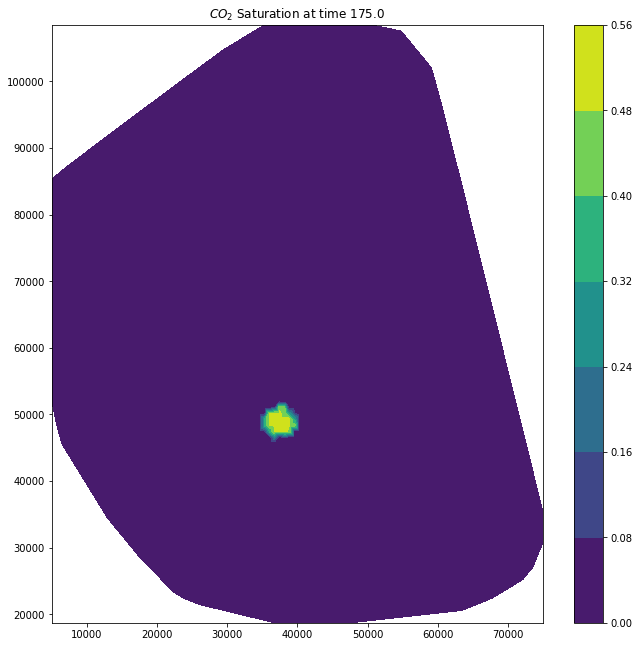

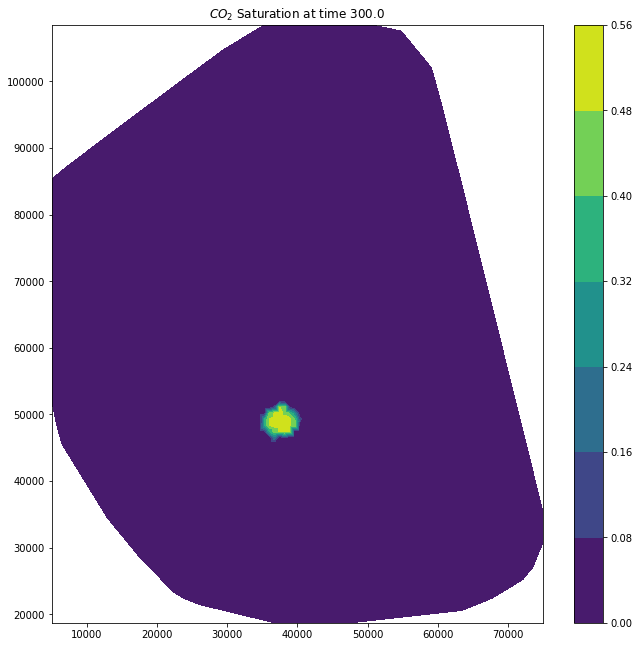

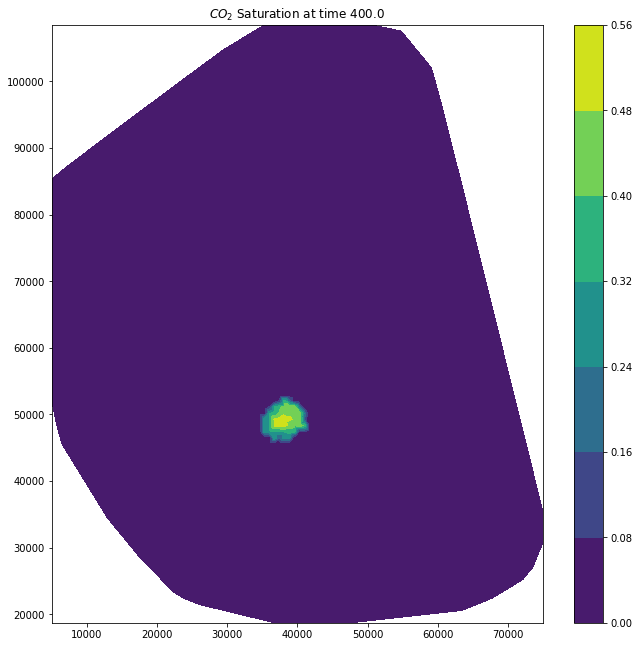

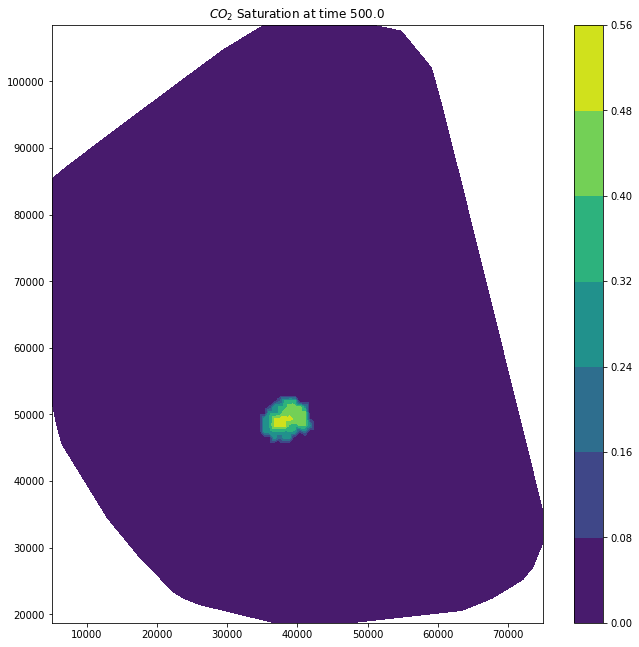

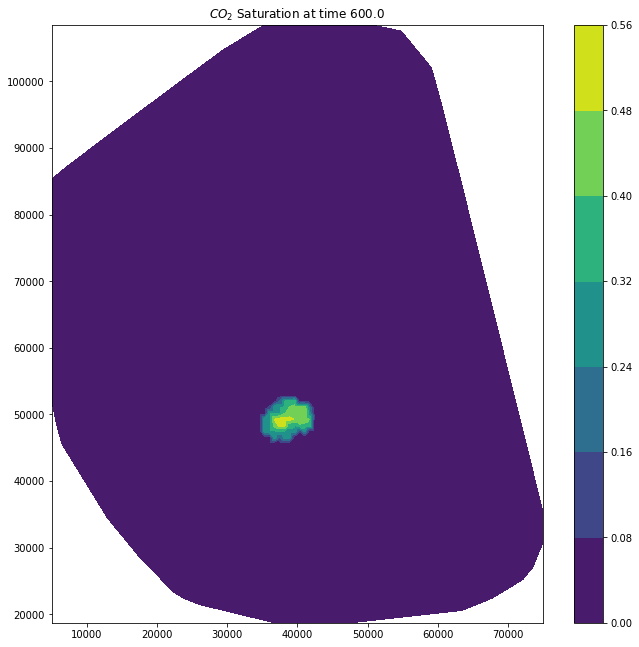

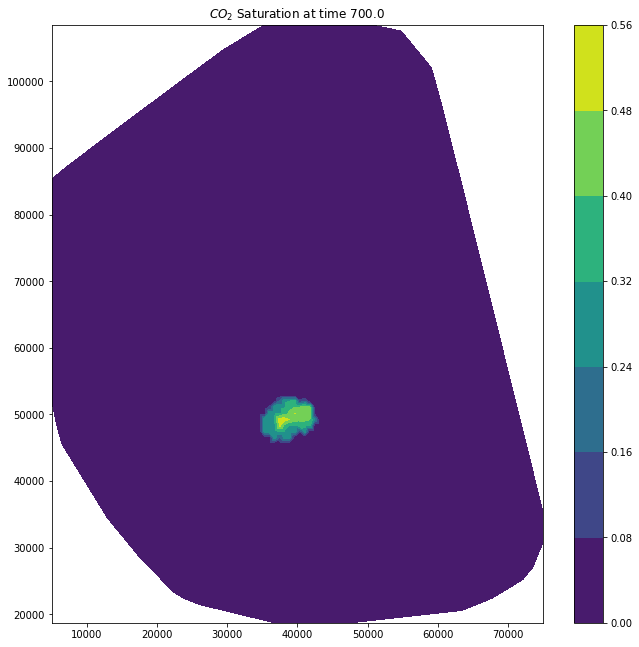

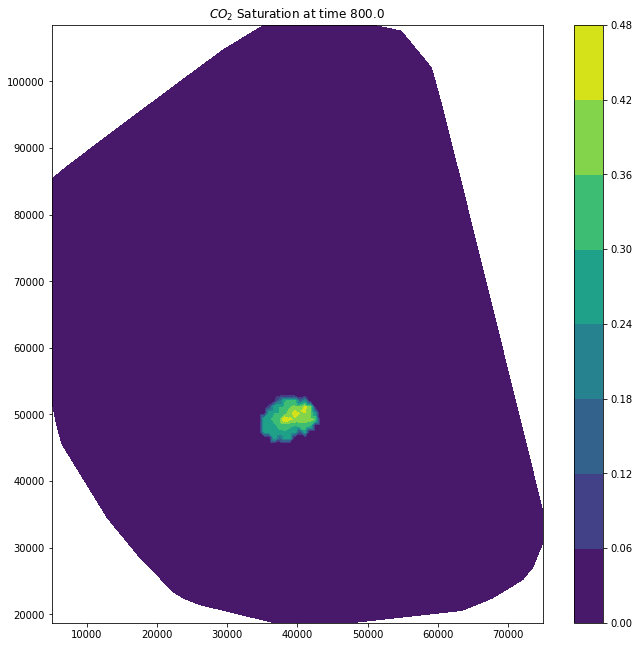

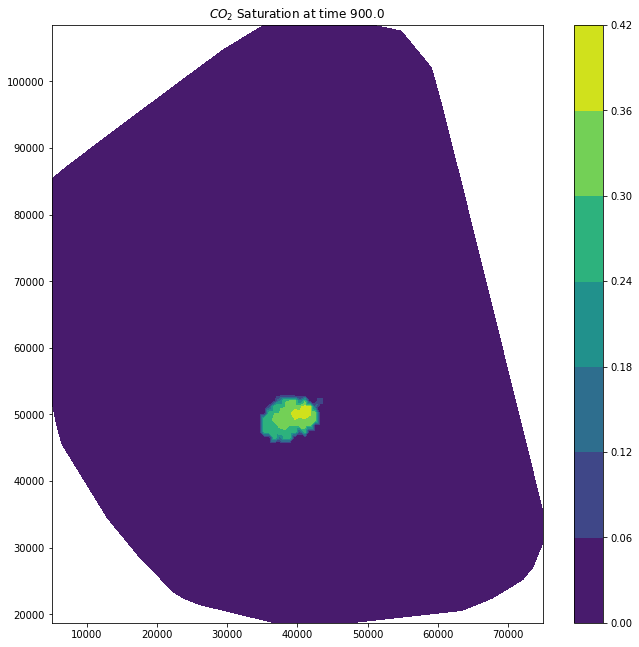

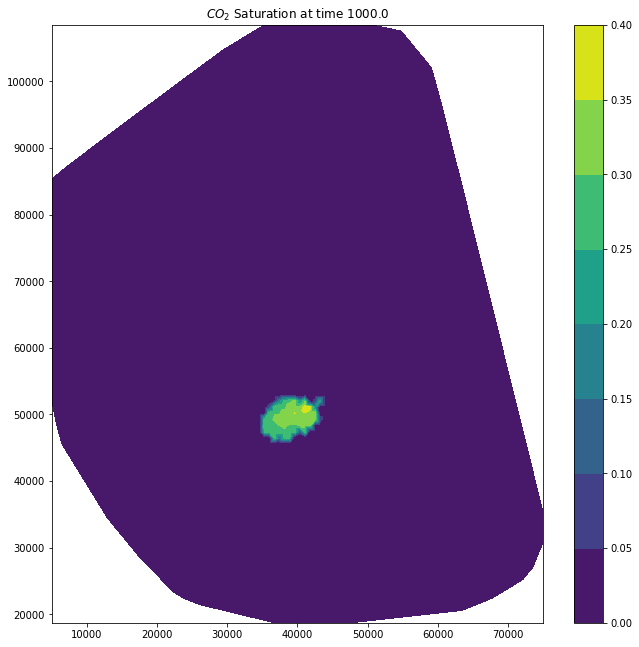

In [37]:
def make_plots(sim_num):
    os.makedirs(f'Sim{sim_num:02}')
    pressure_plots(sim_num)
    os.makedirs(os.path.join(f'Sim{sim_num:02}', 'Sat'))
    sat_plots(sim_num)
make_plots(52)

D:\Anaconda3_0818\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


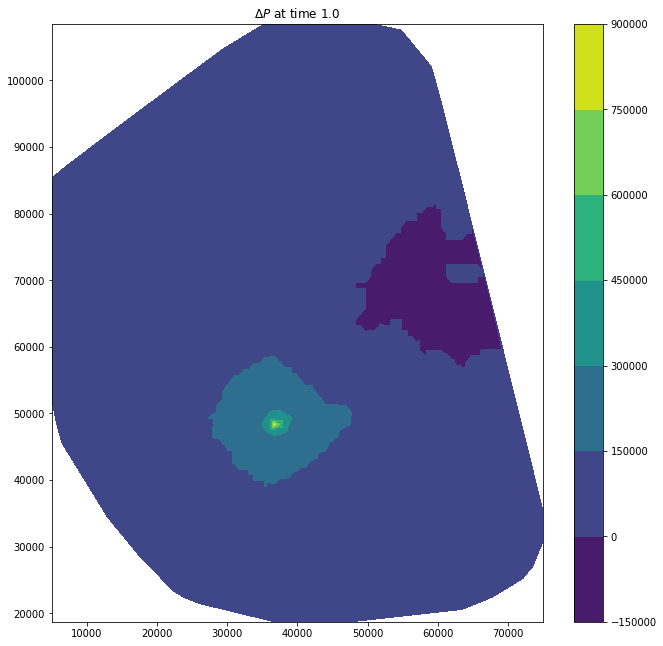

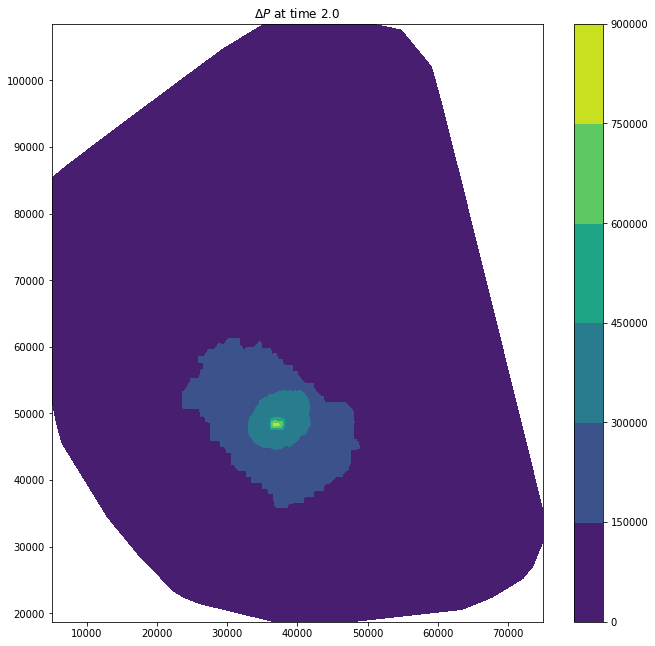

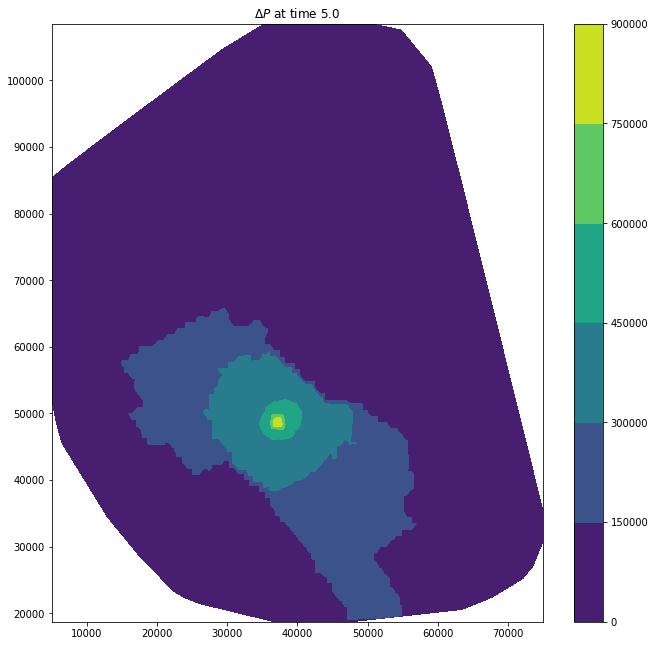

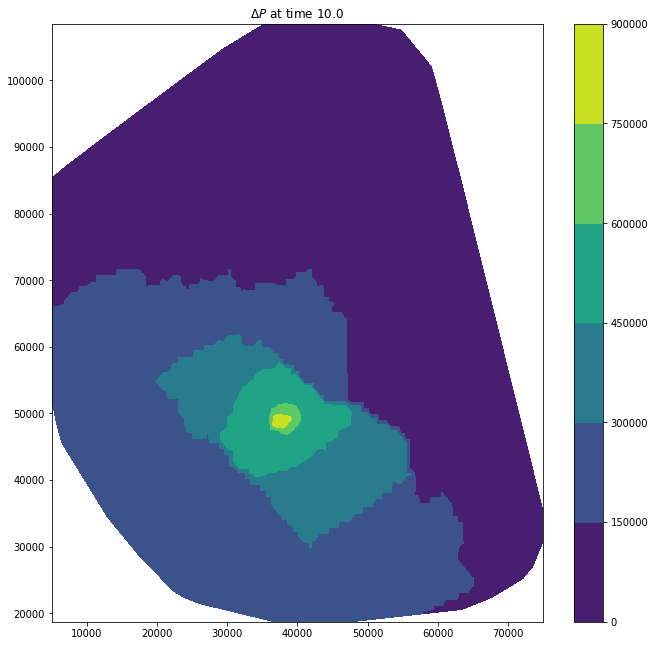

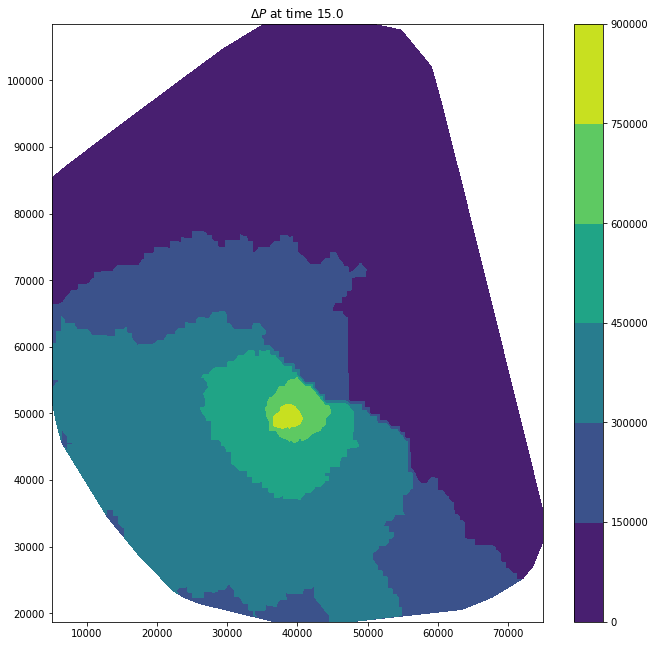

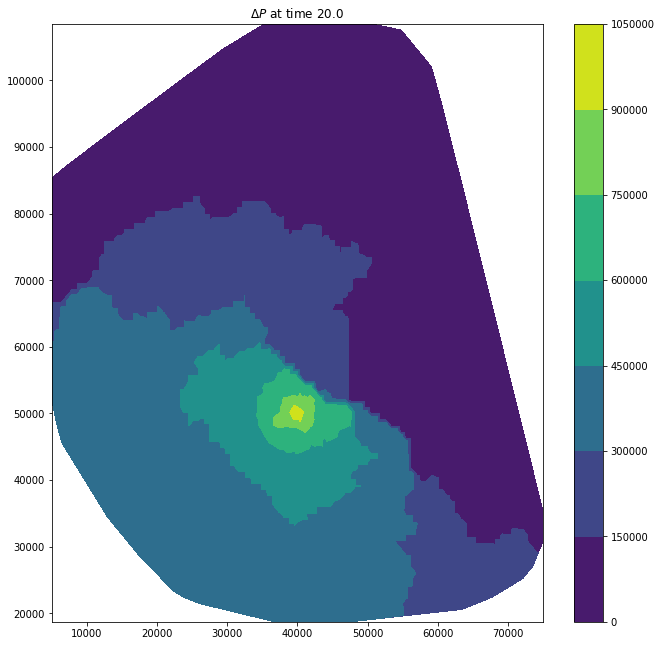

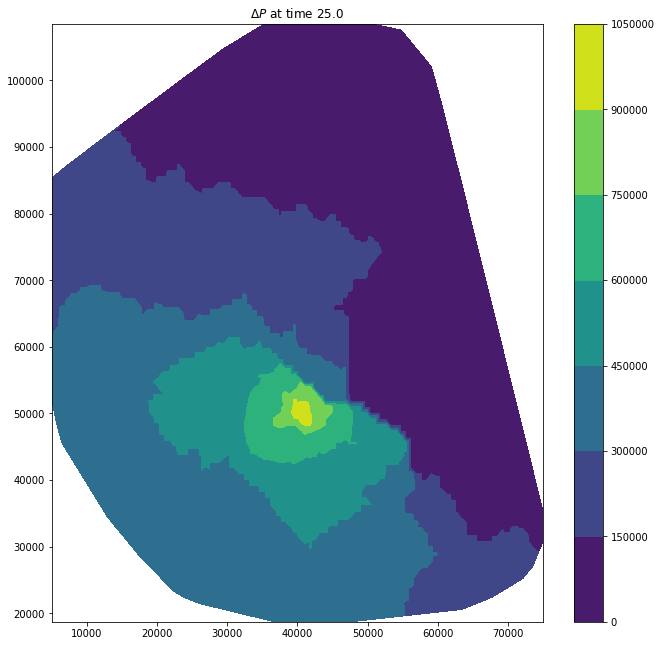

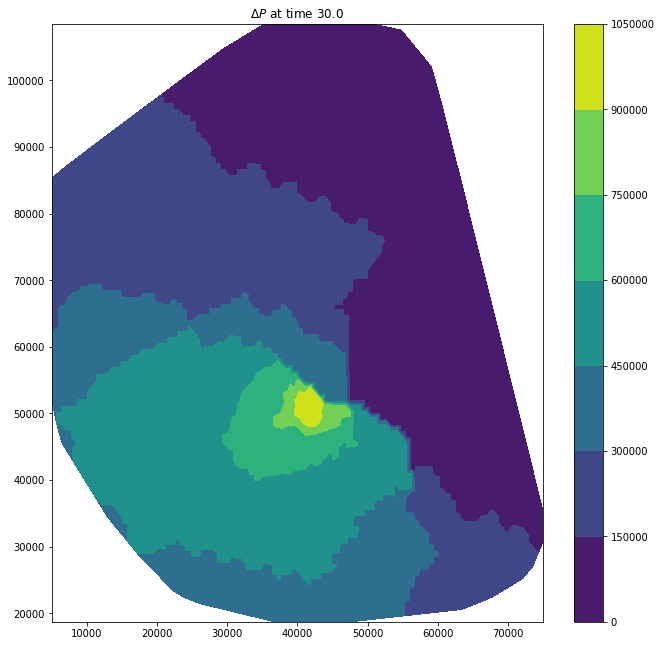

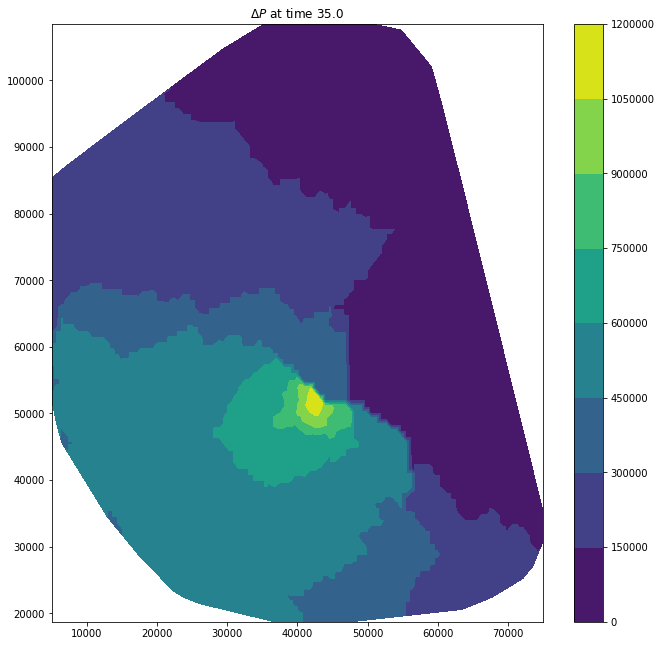

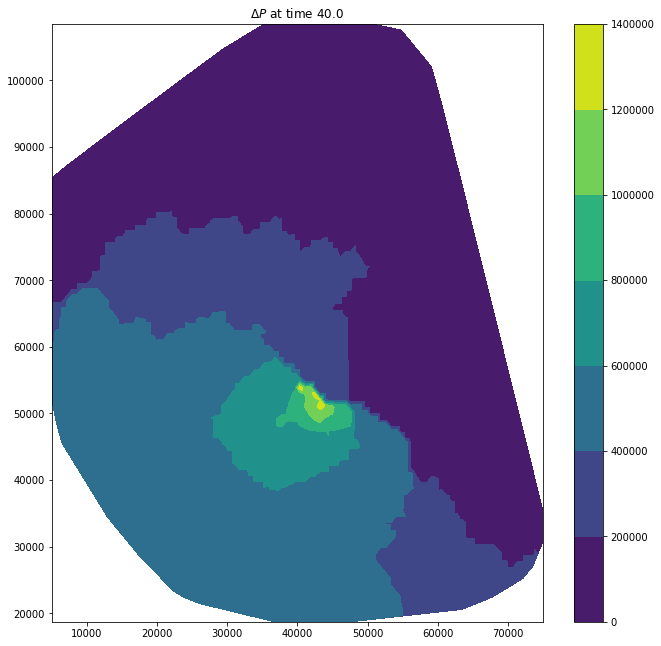

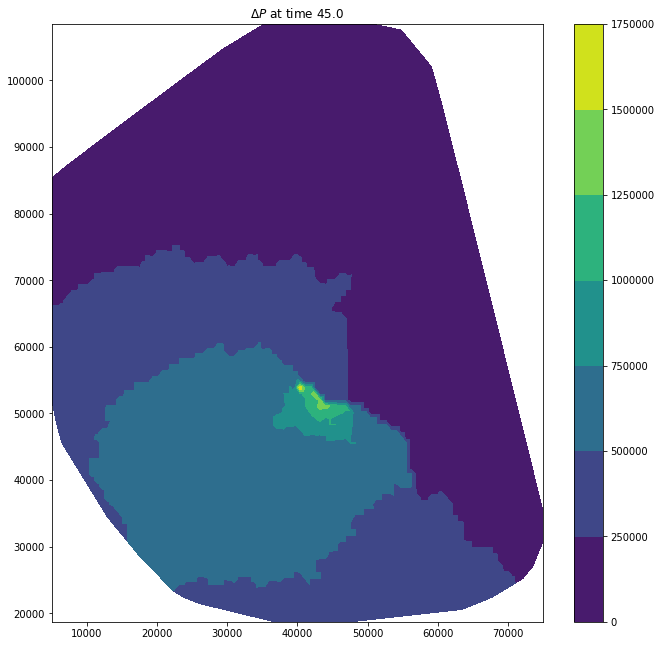

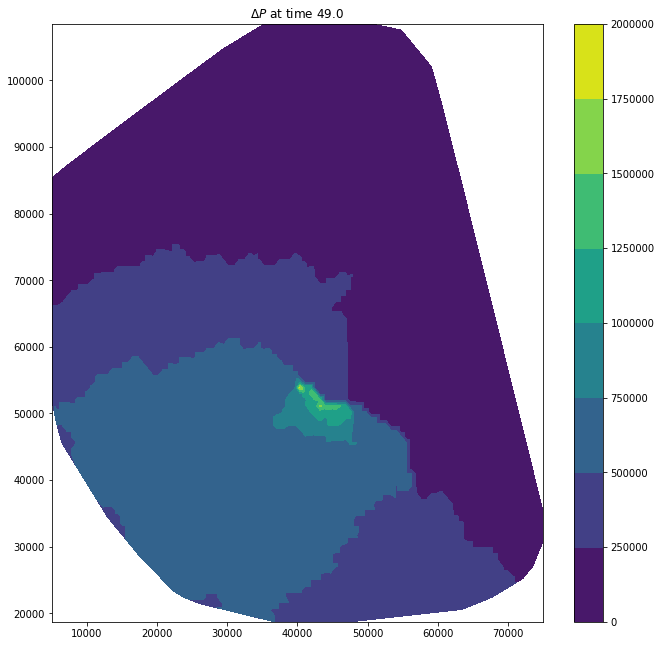

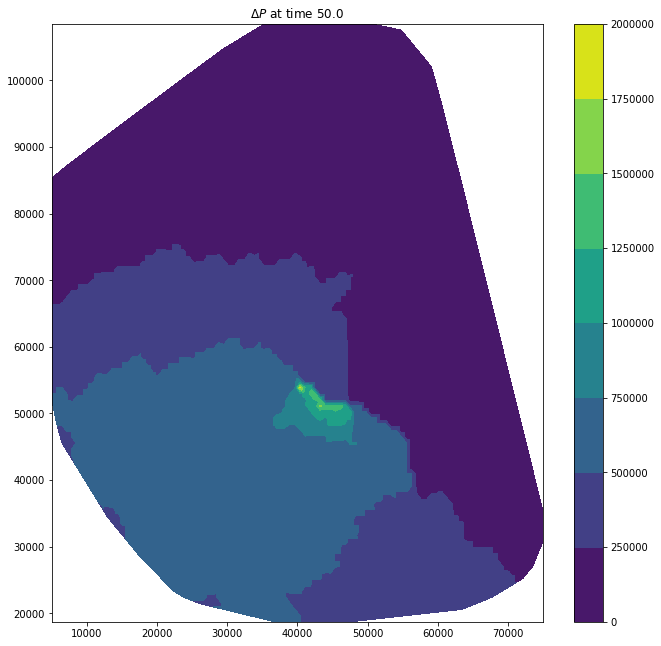

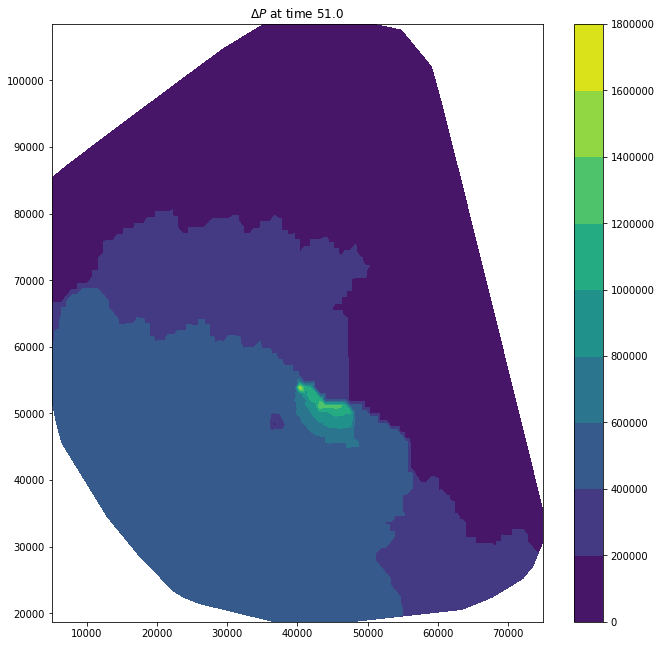

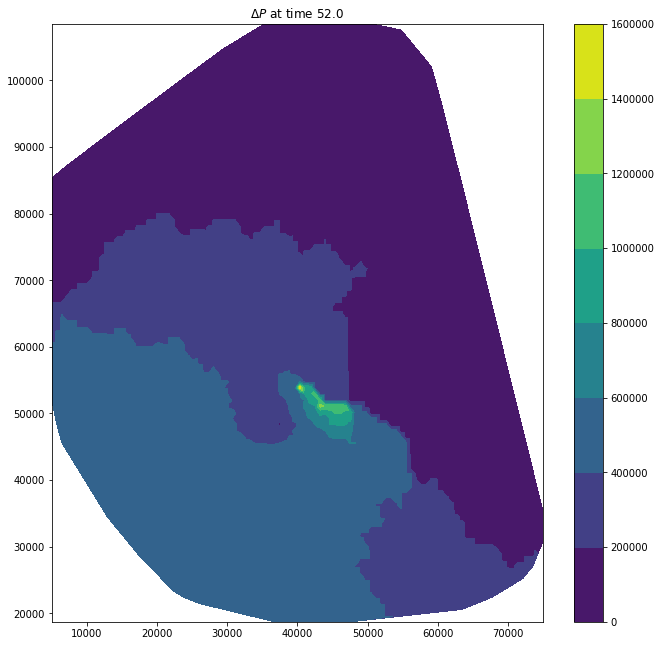

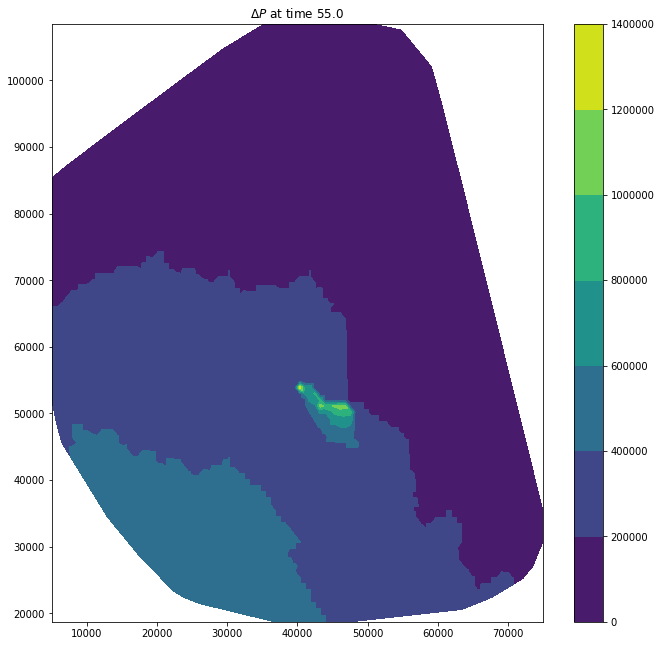

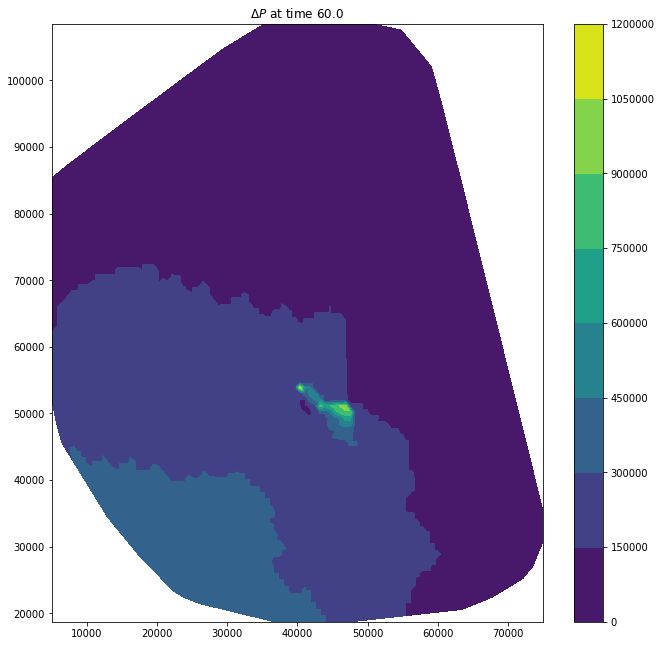

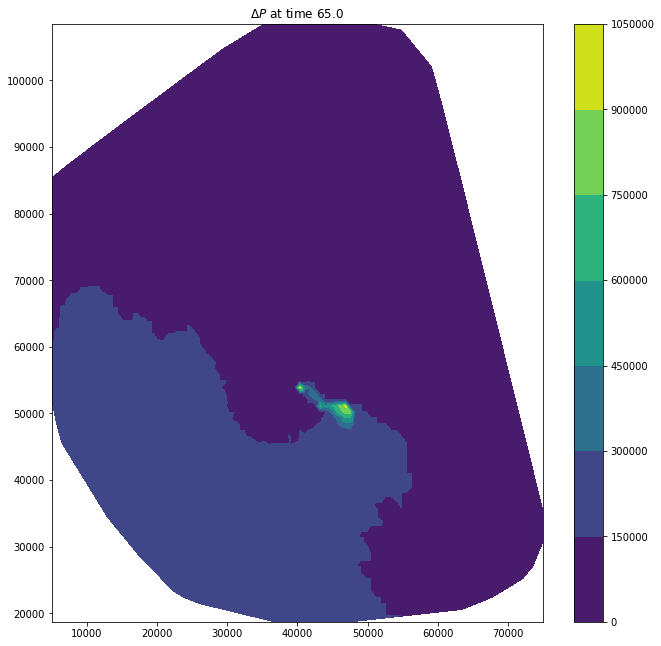

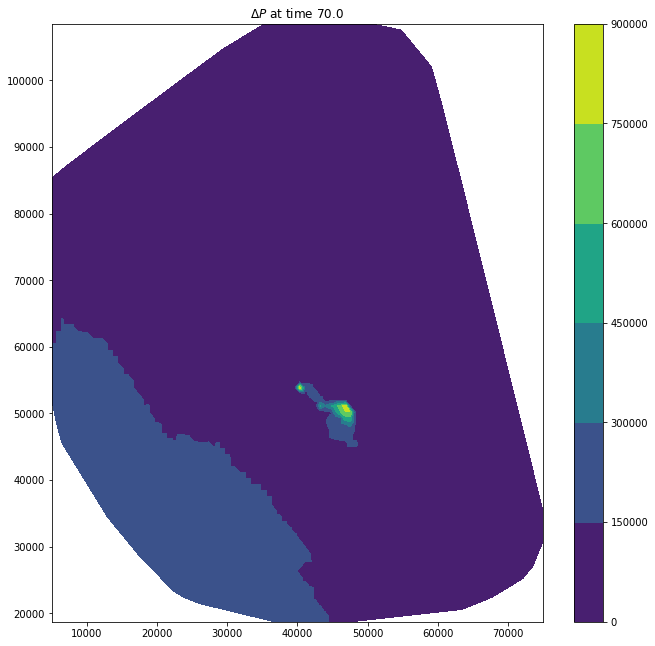

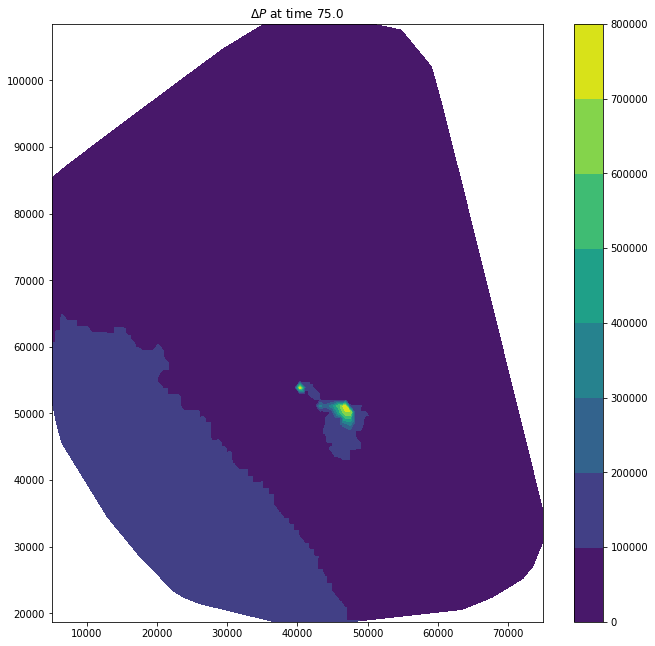

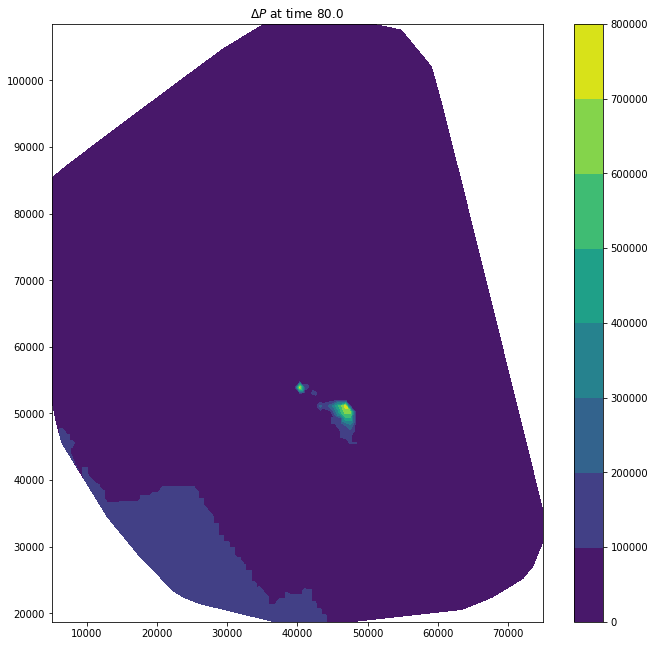

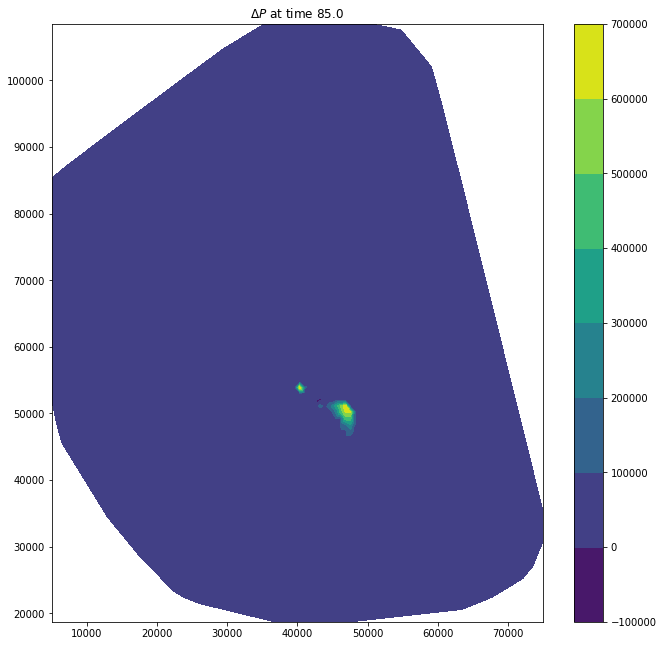

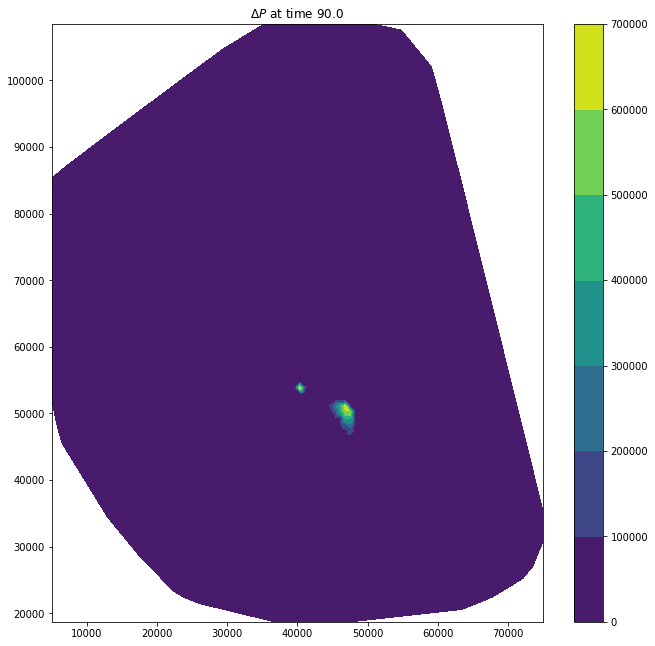

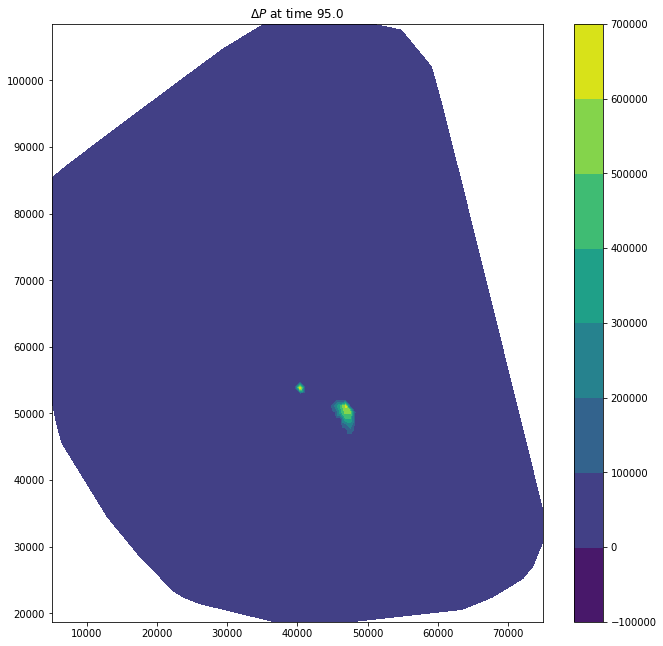

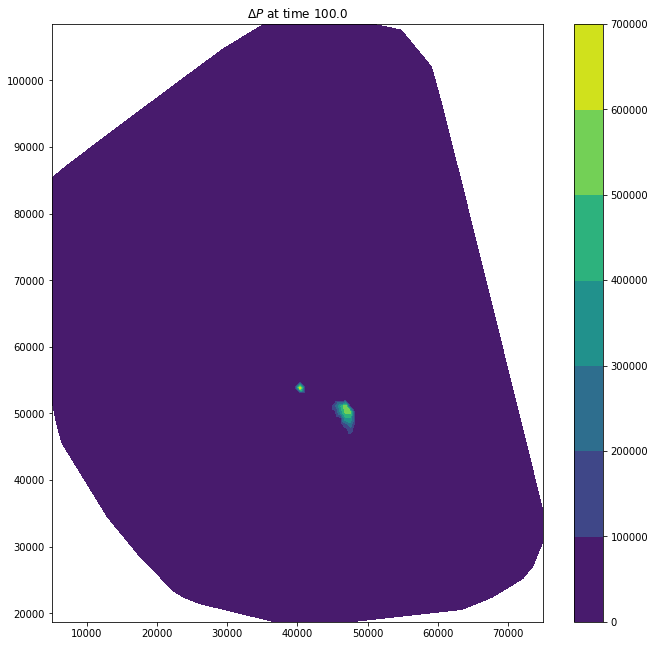

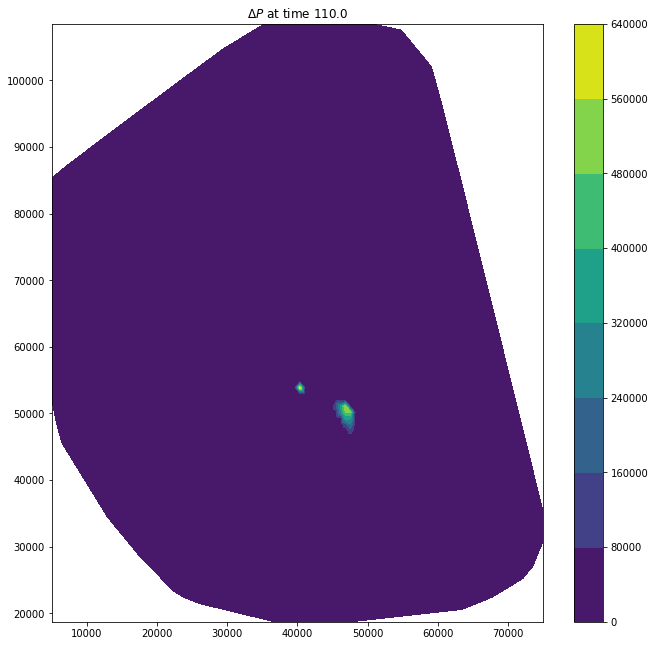

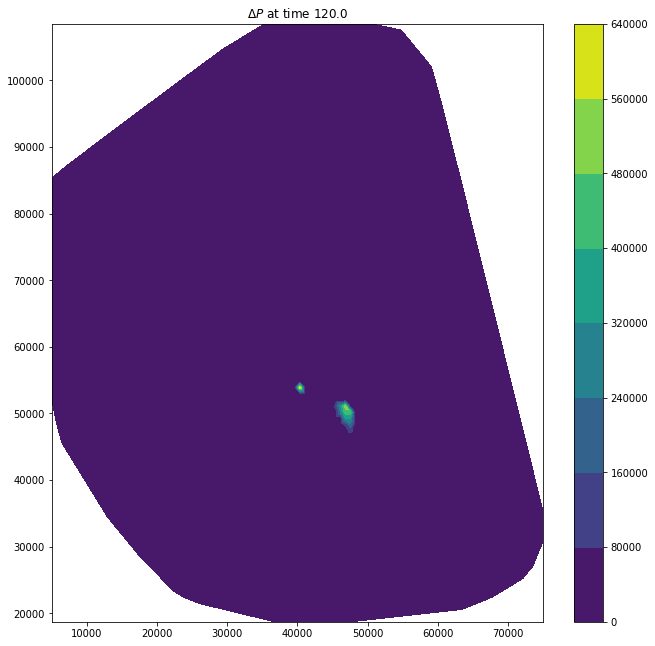

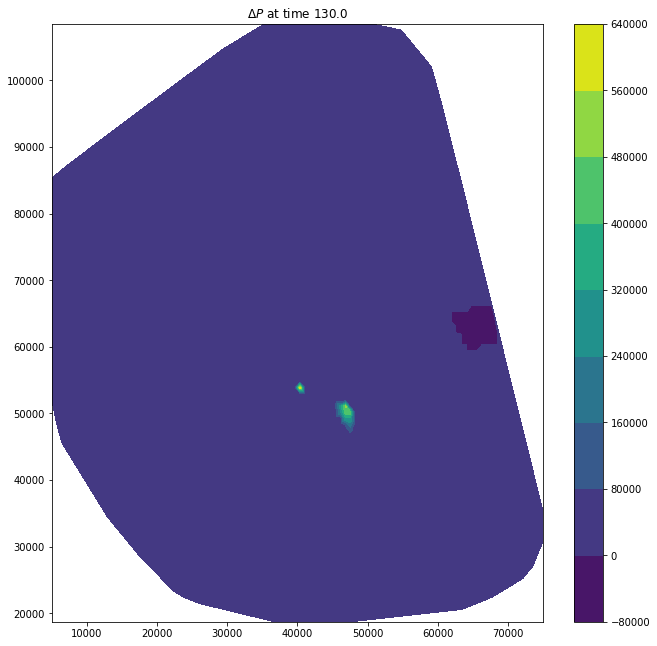

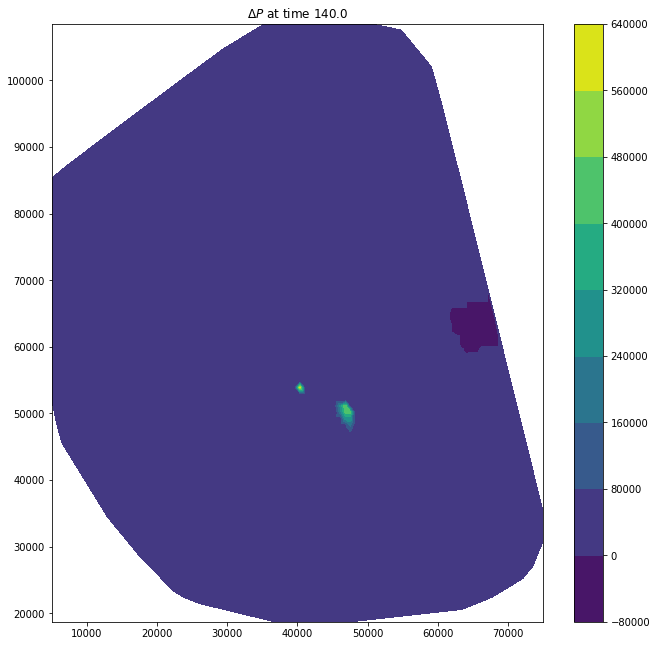

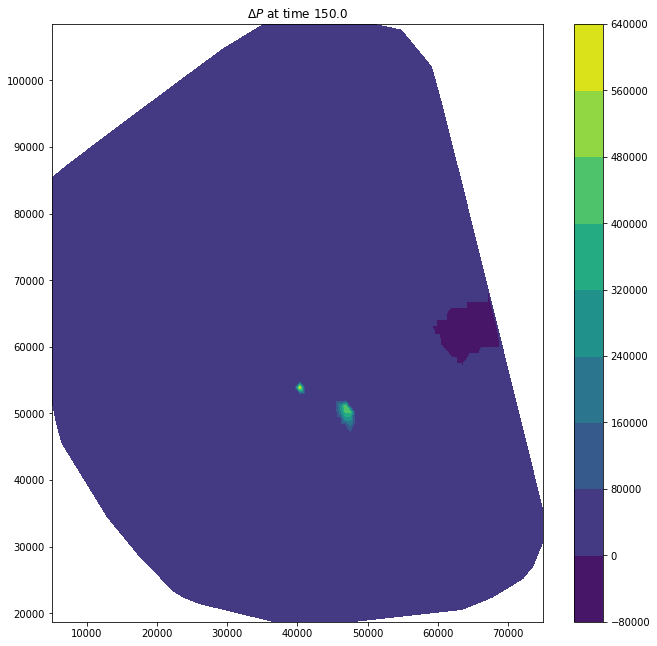

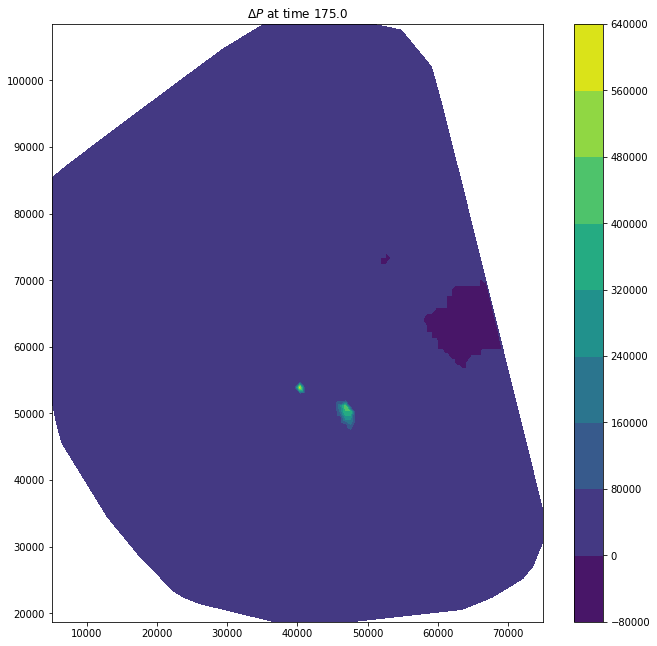

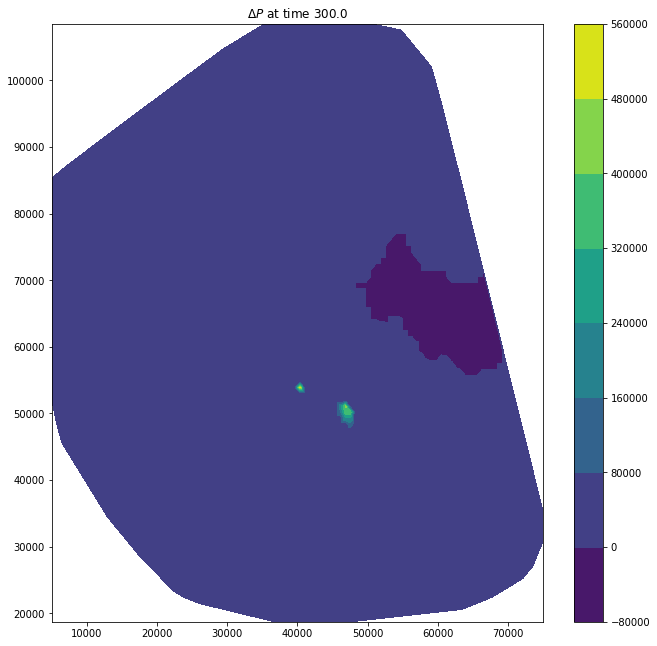

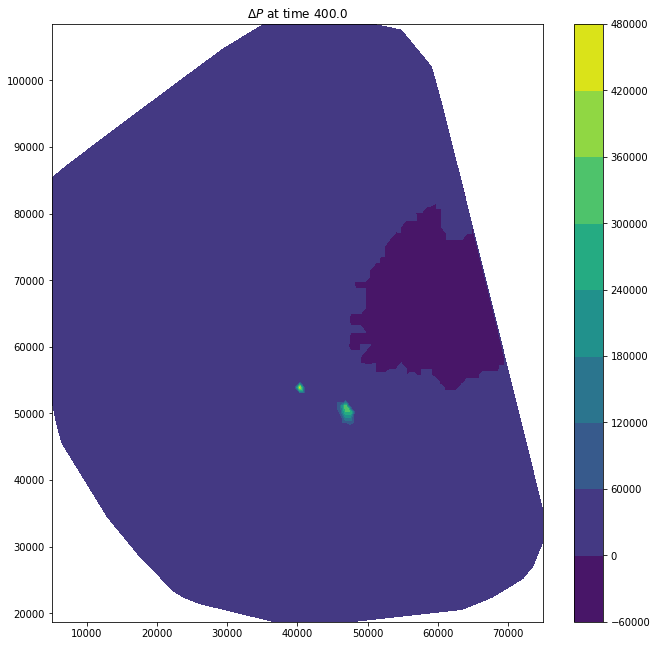

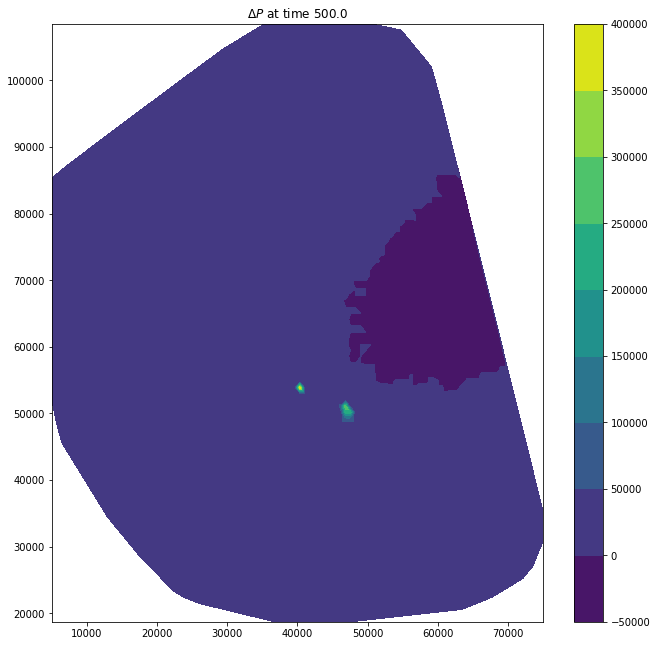

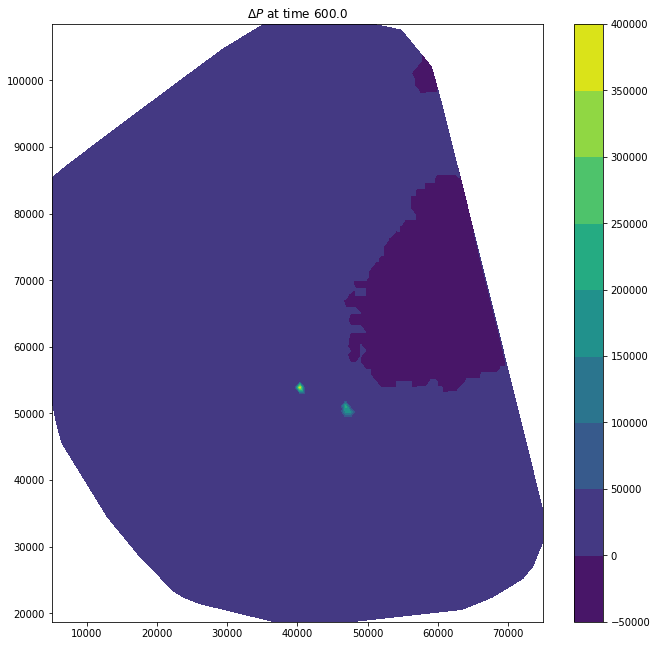

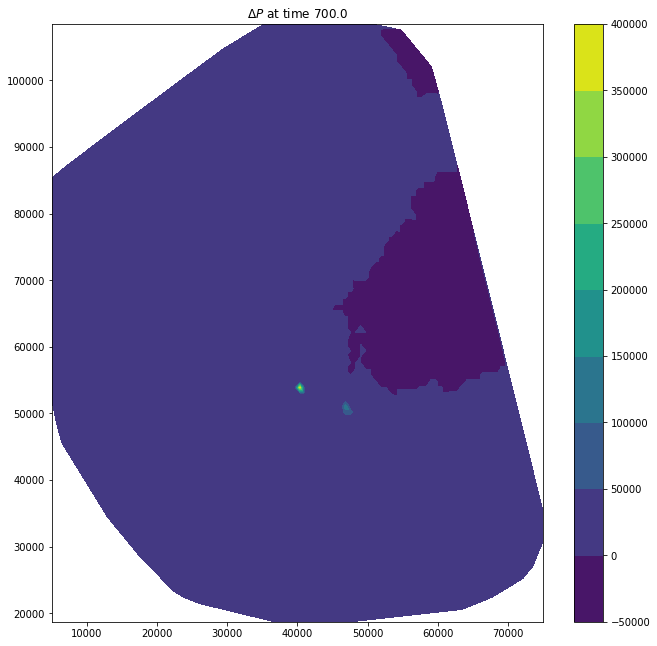

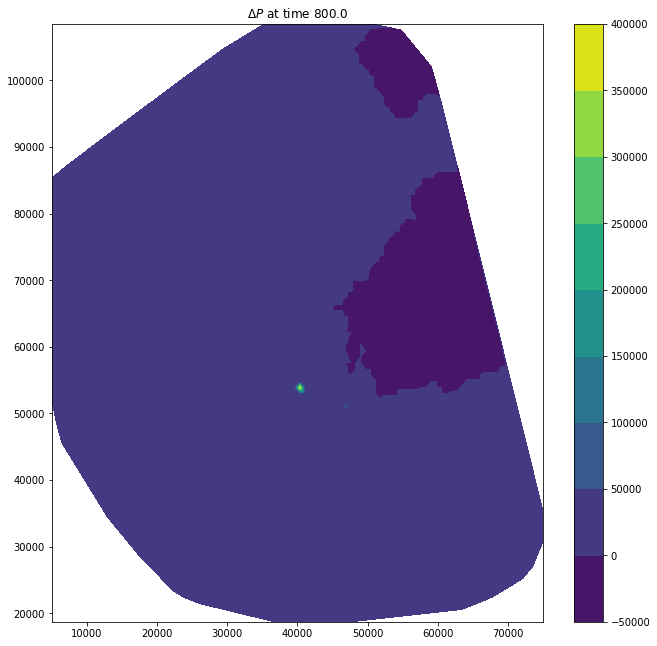

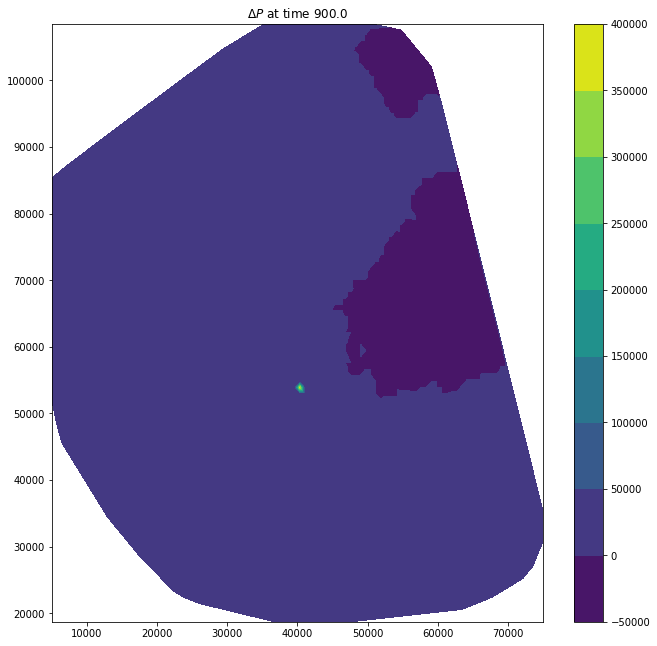

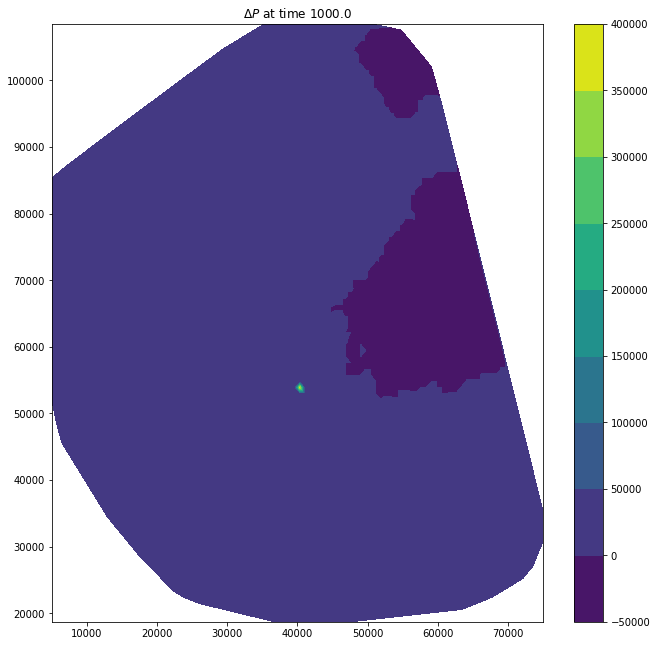

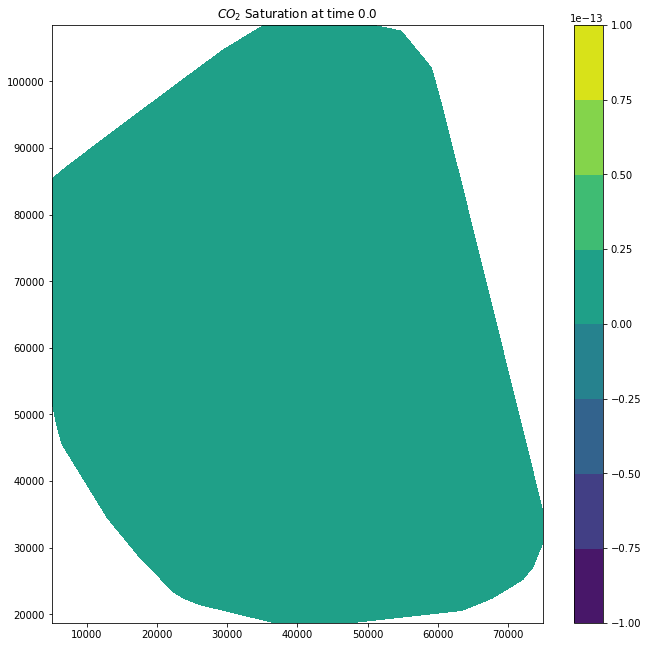

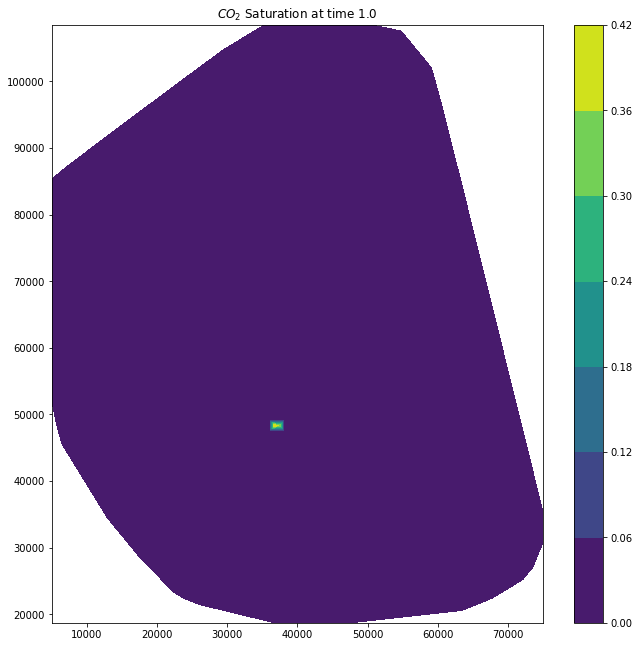

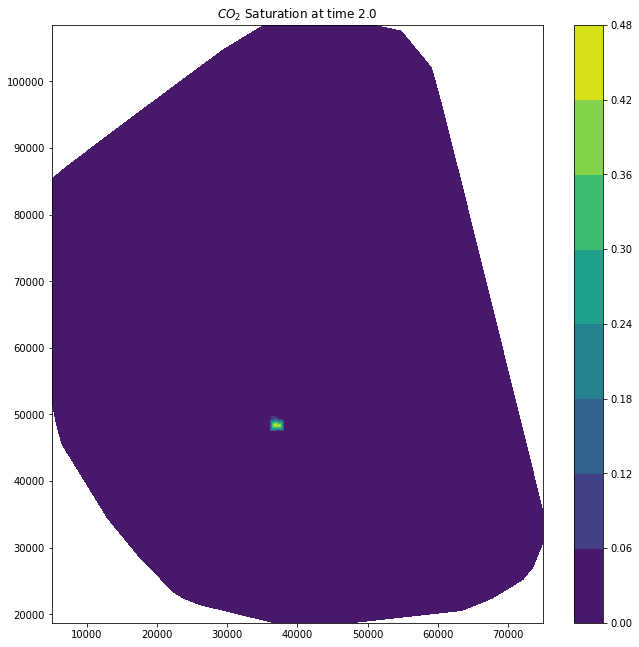

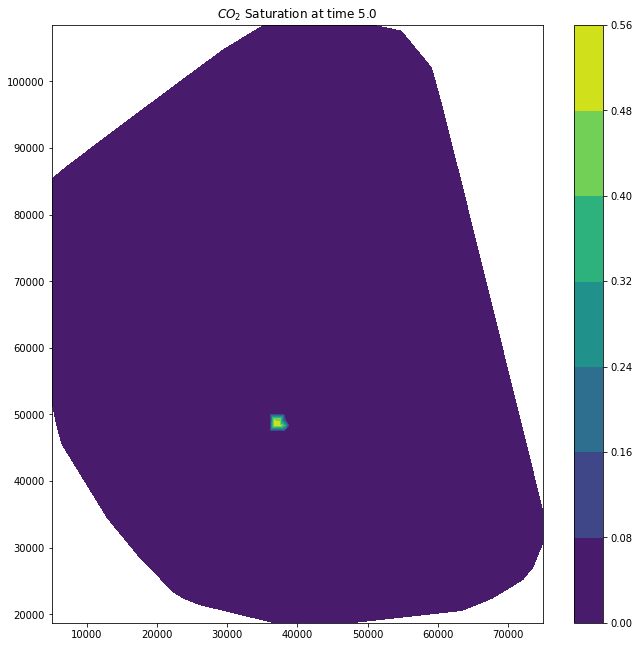

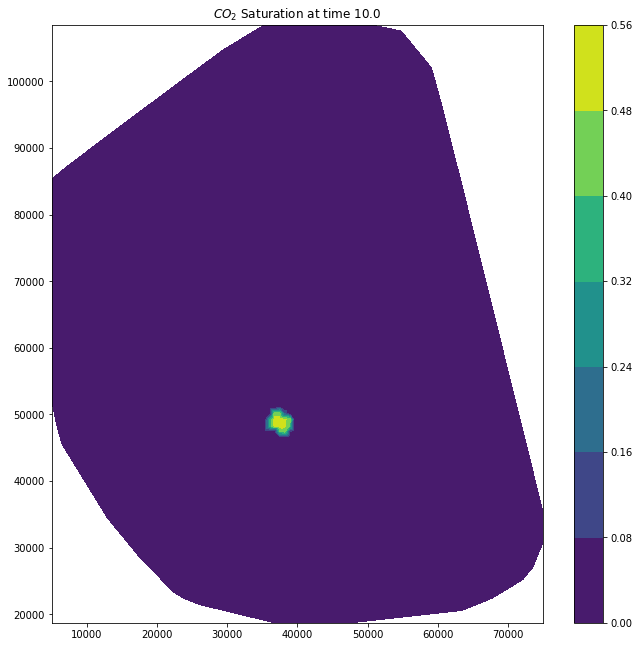

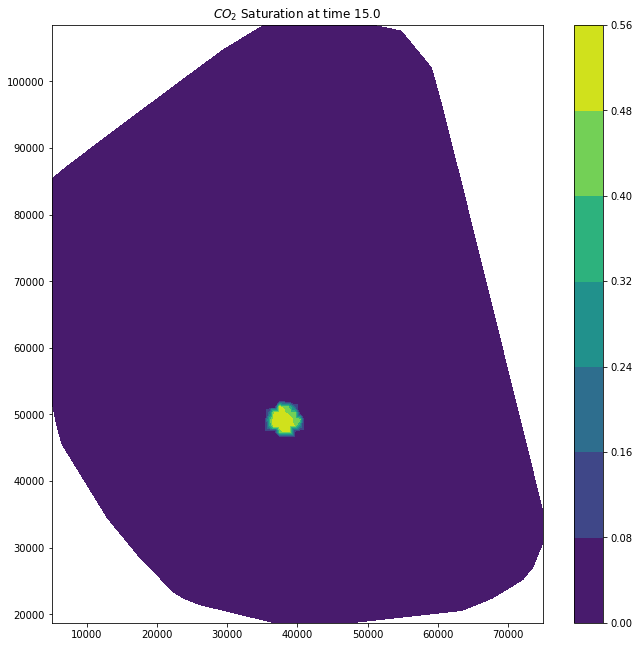

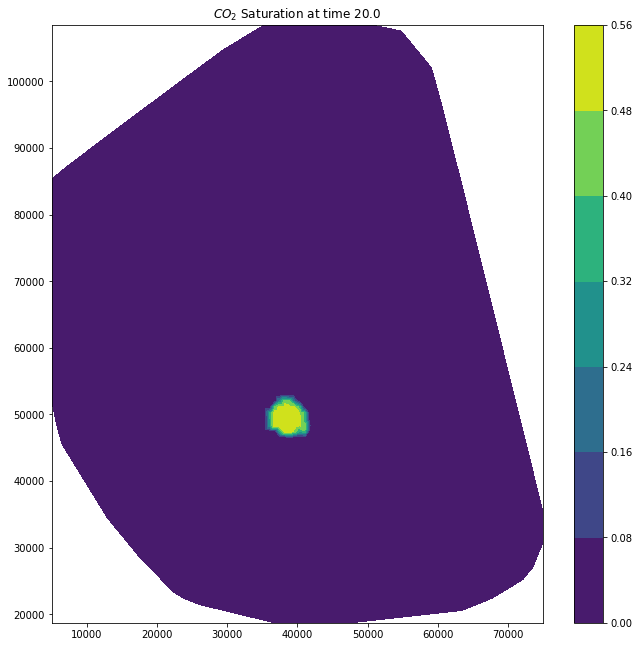

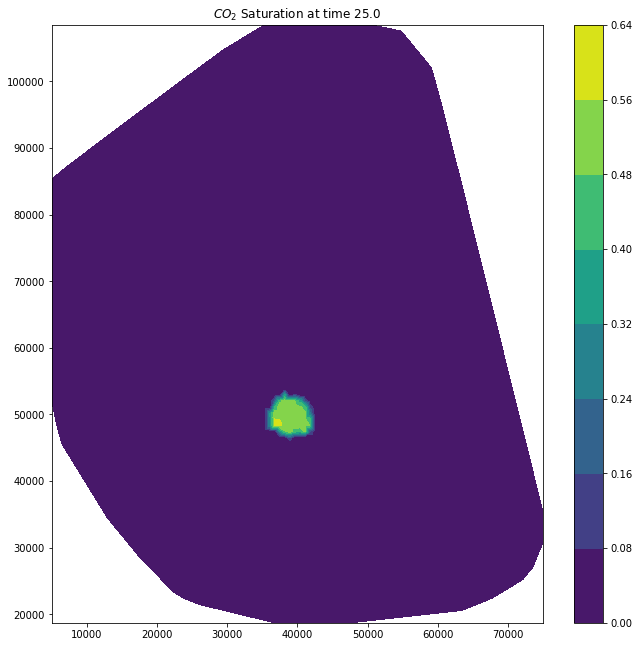

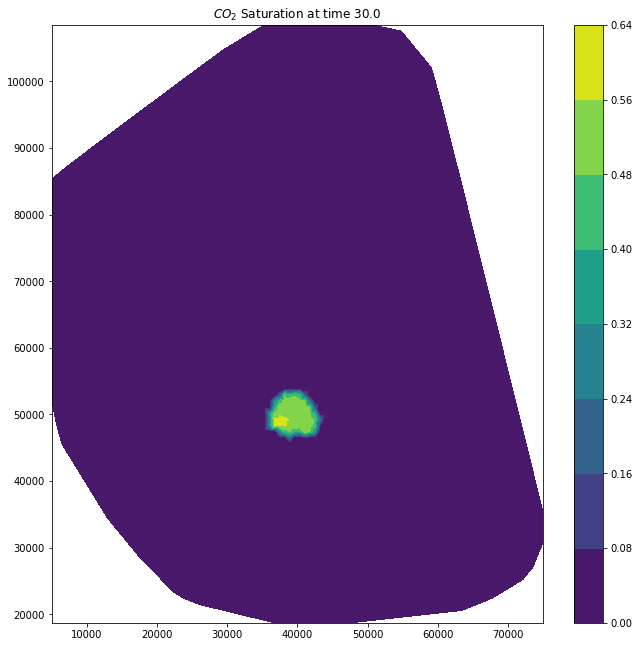

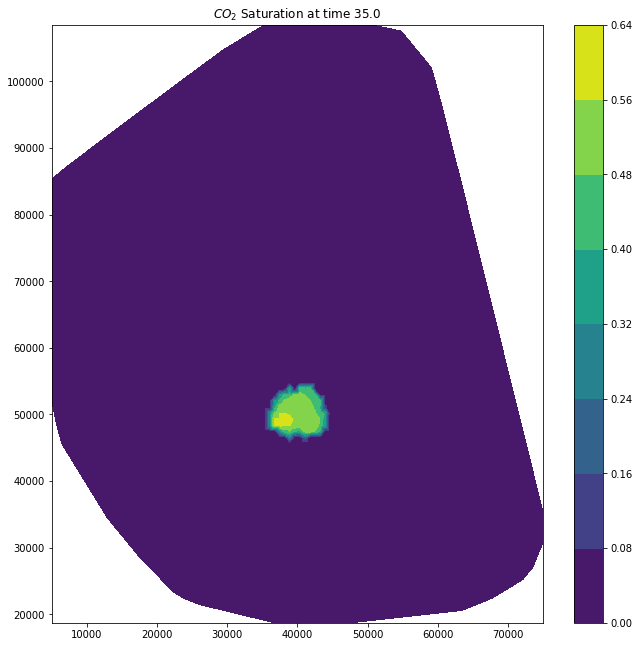

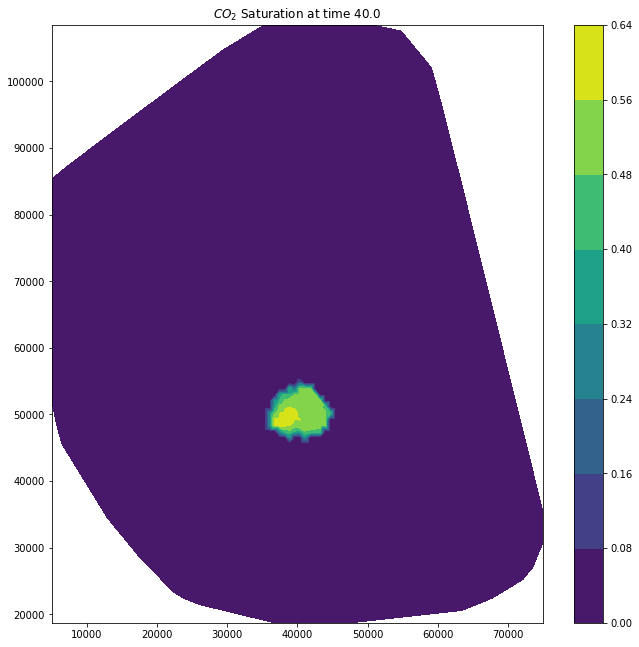

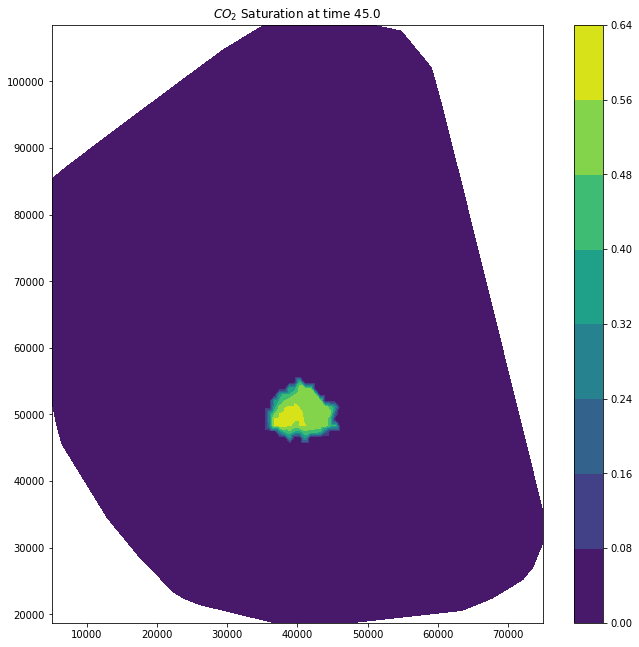

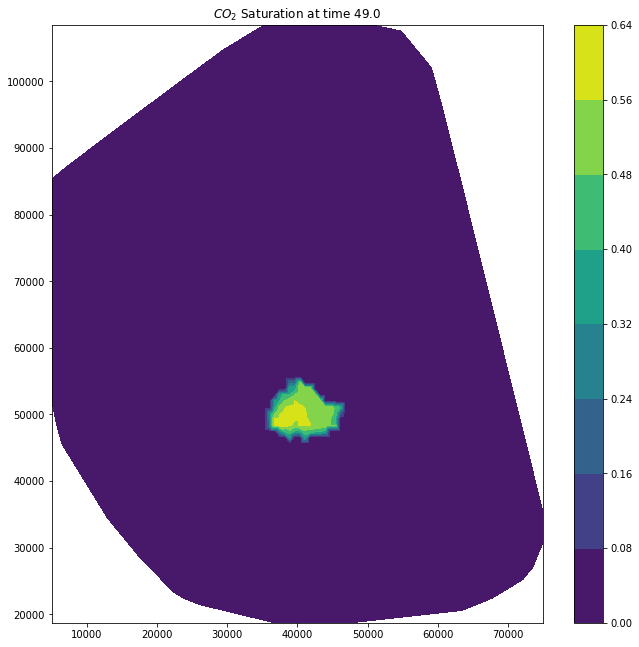

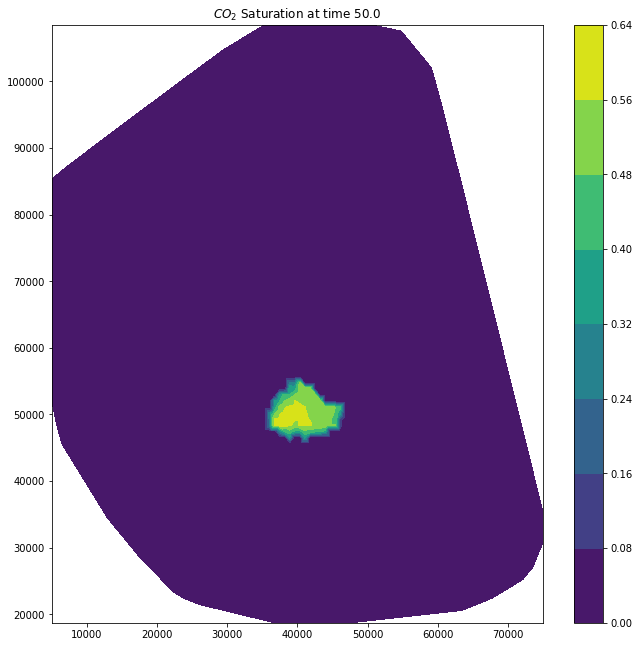

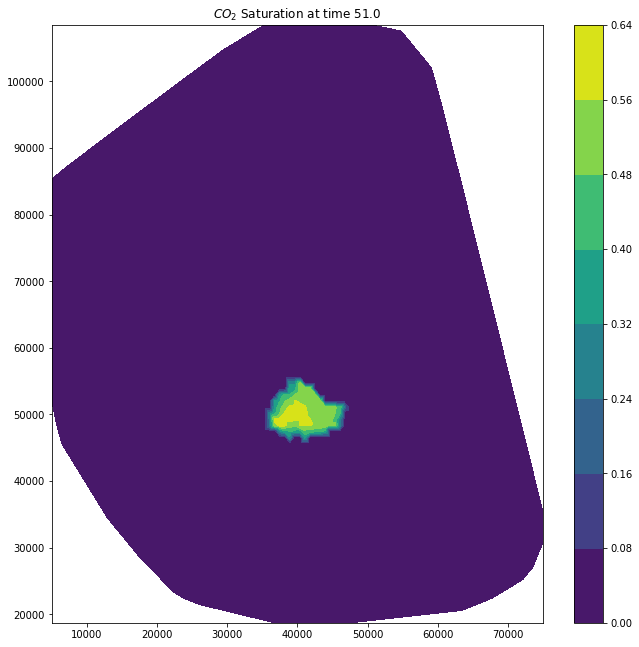

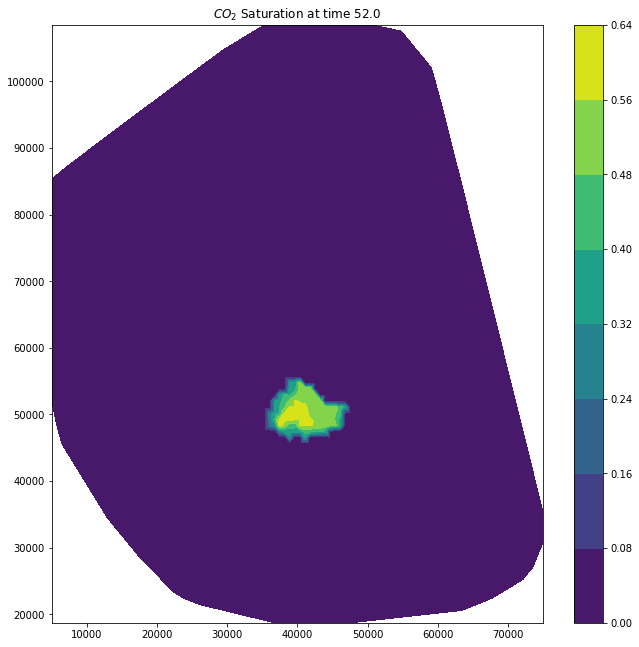

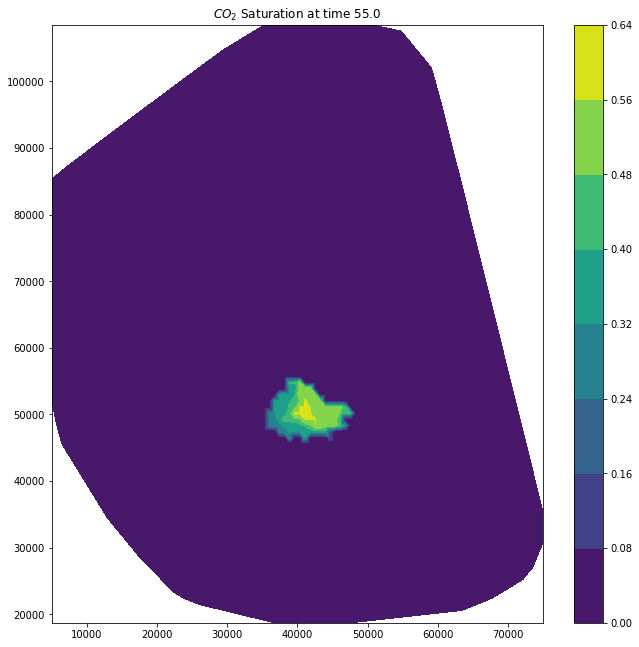

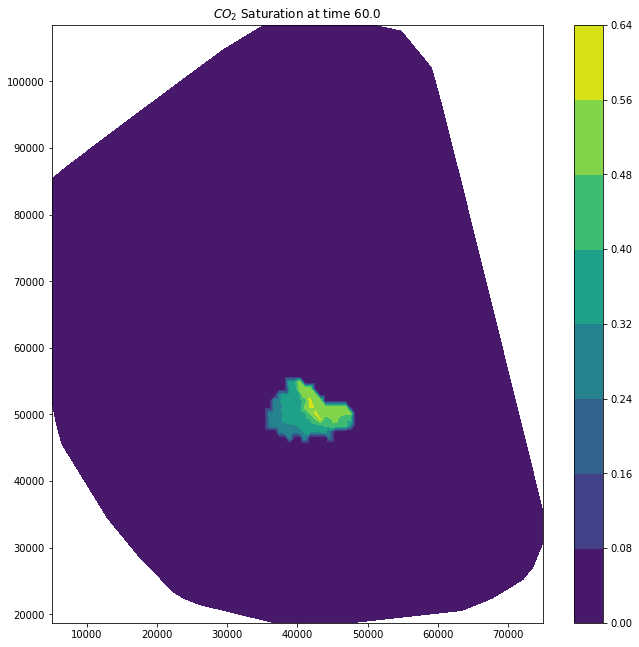

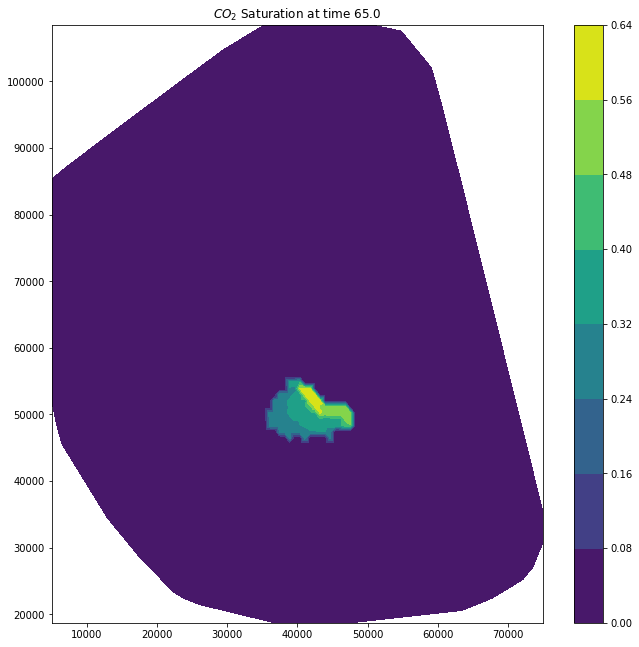

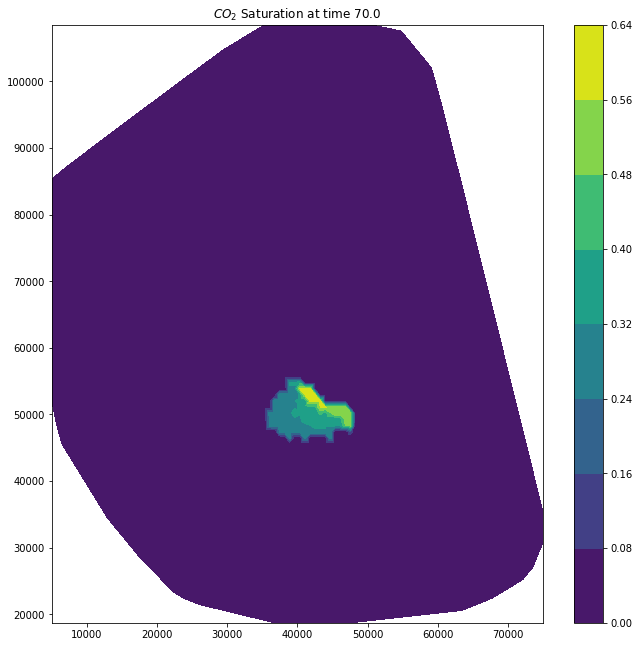

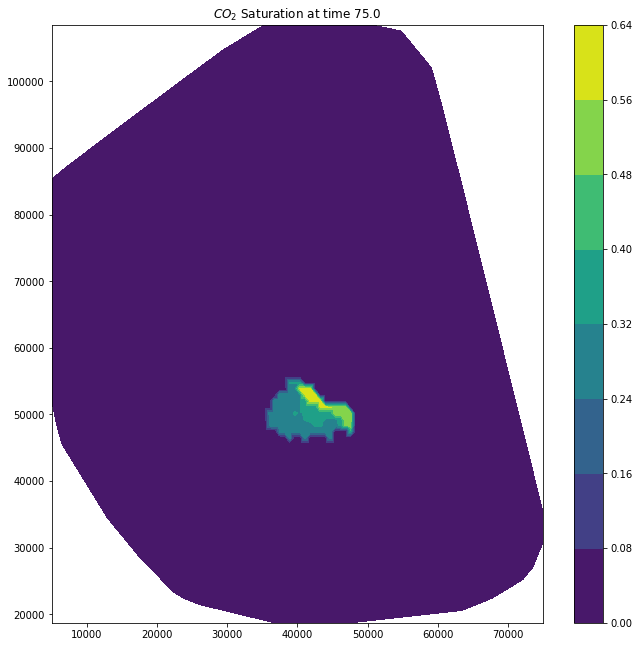

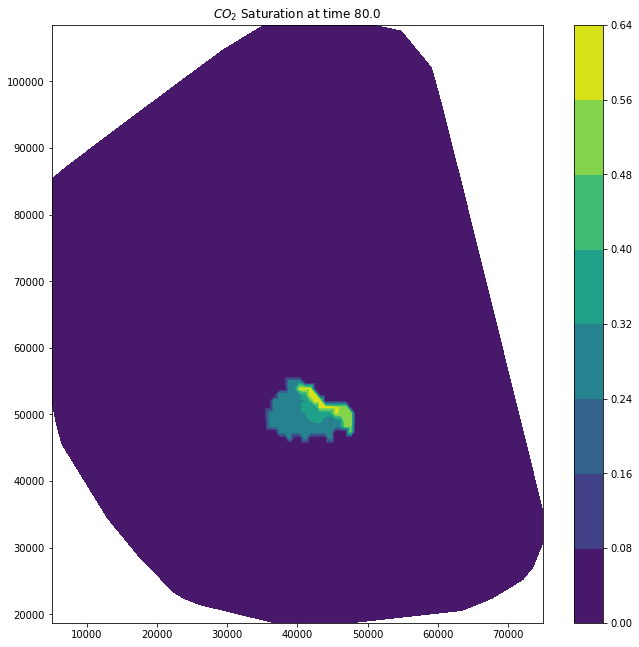

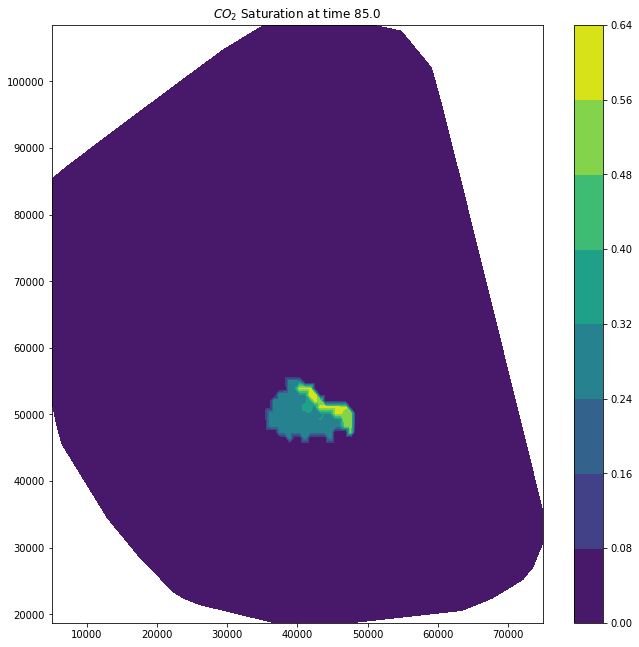

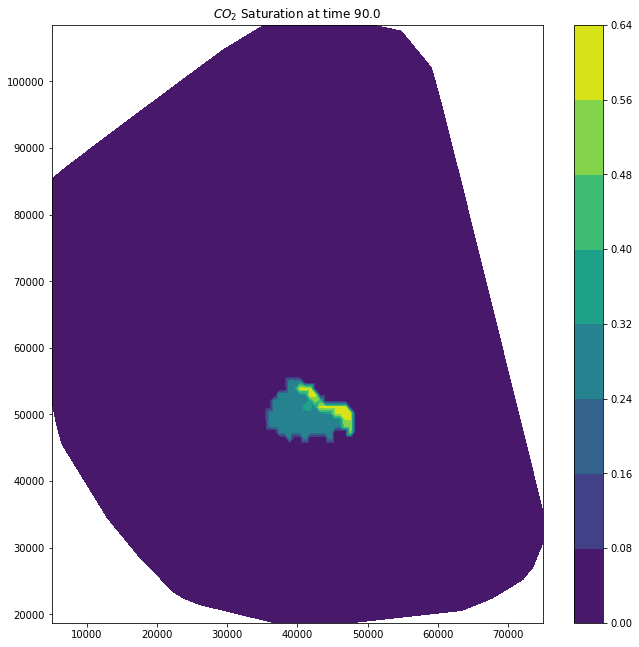

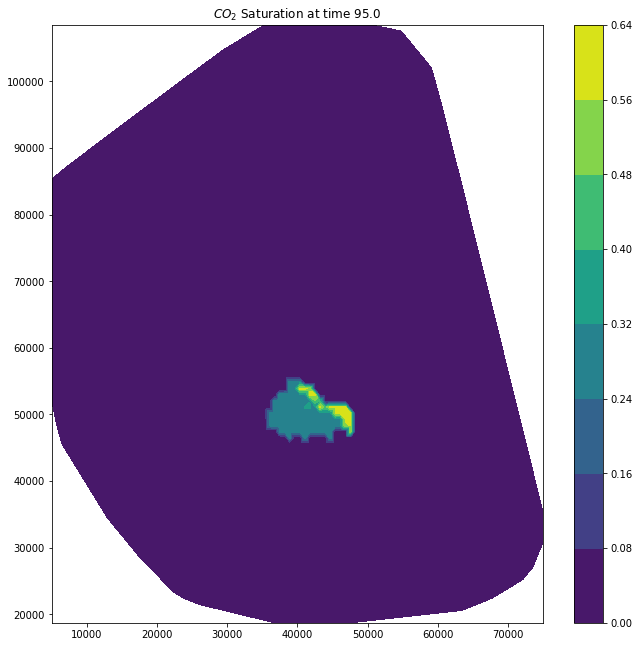

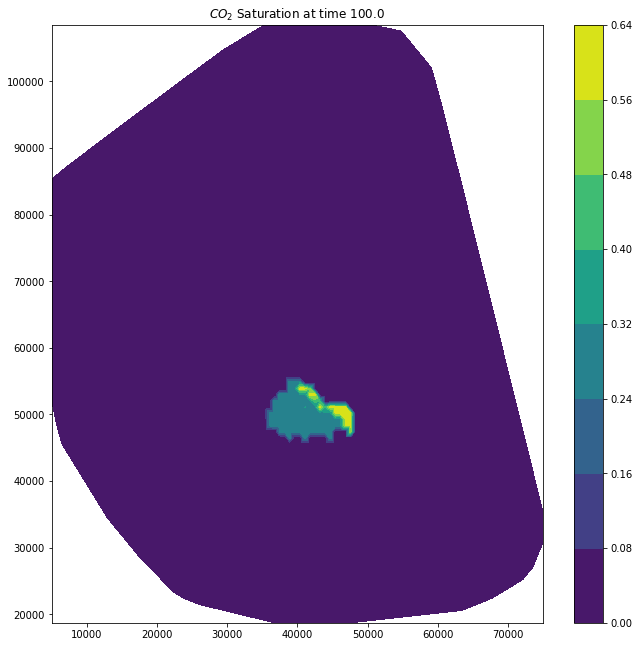

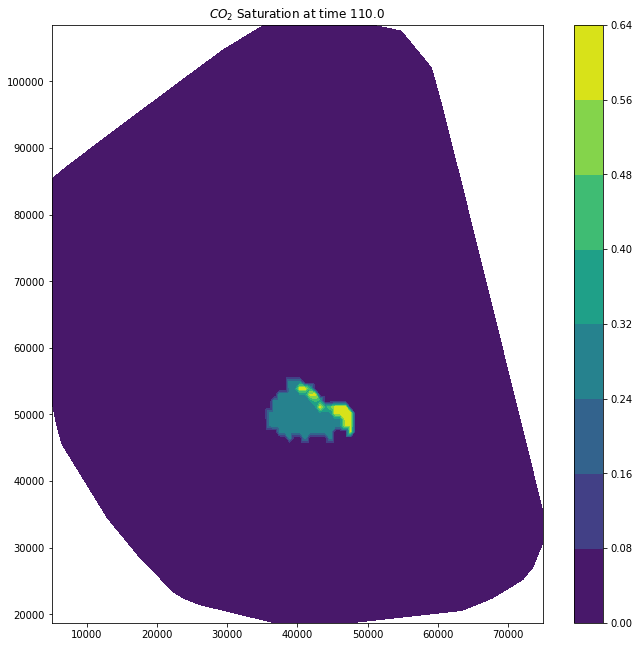

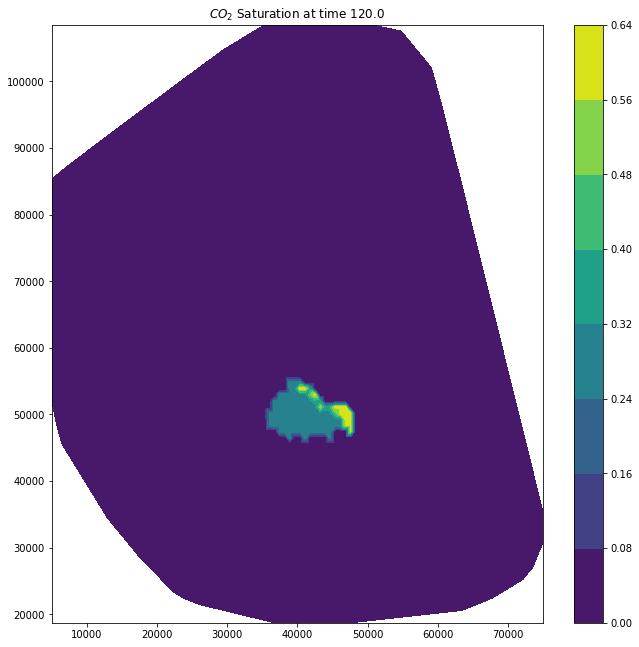

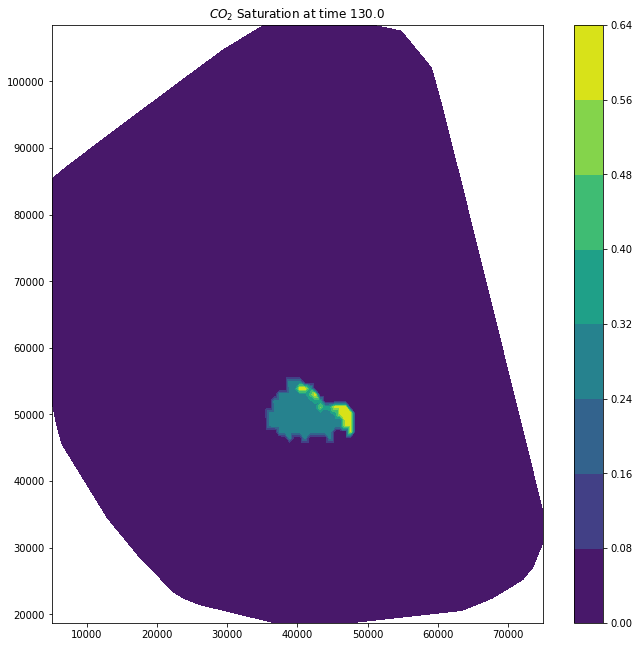

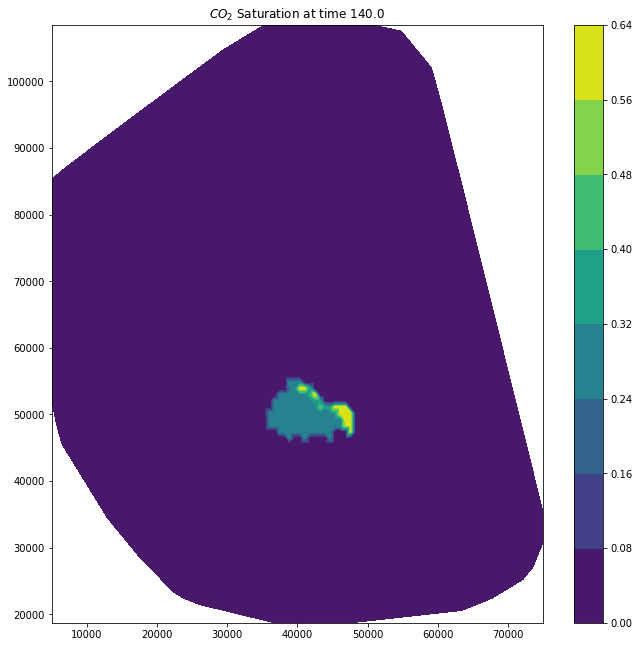

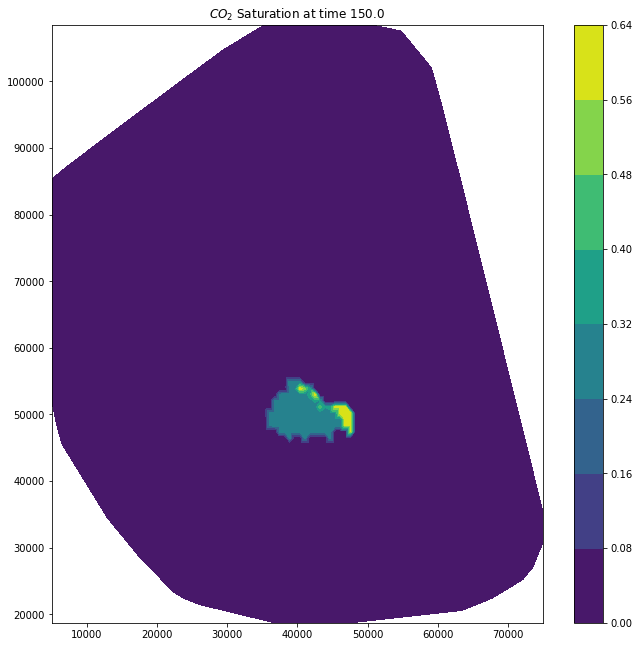

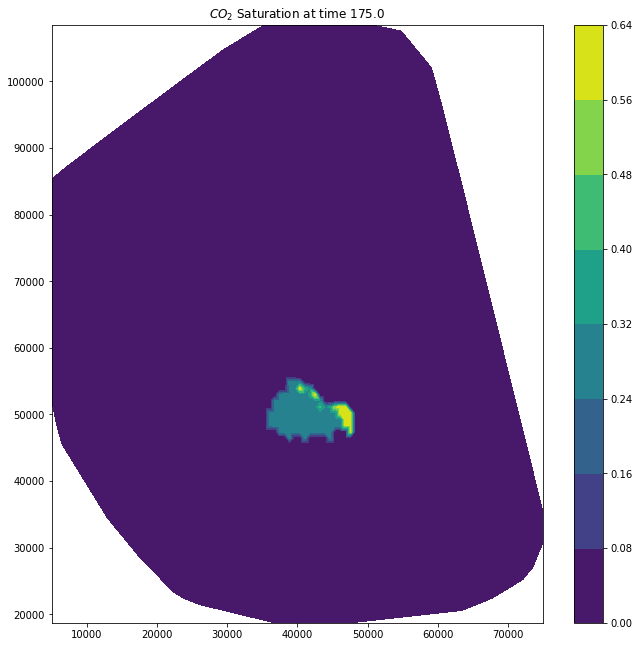

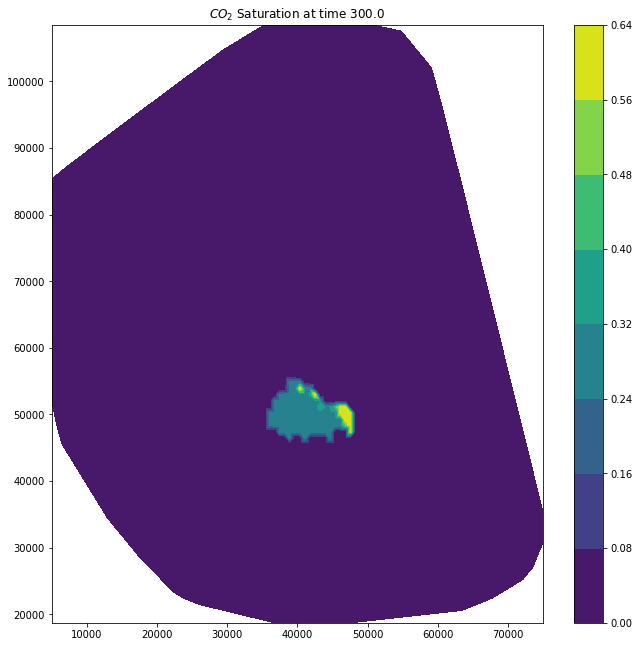

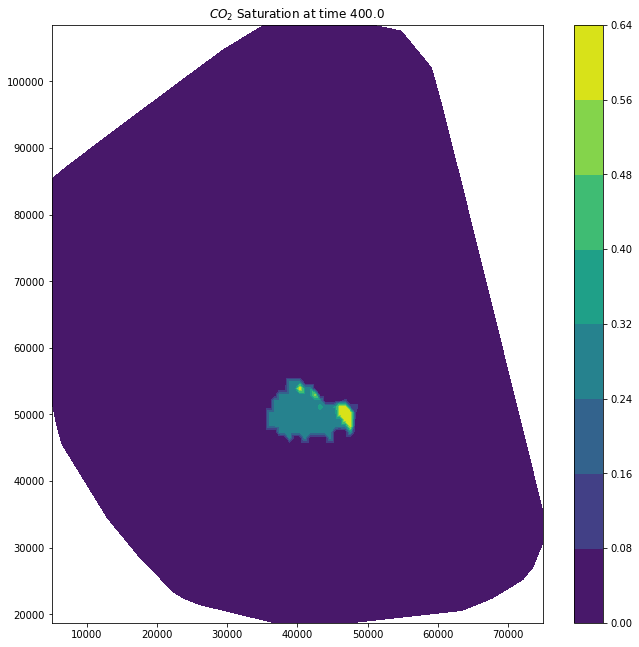

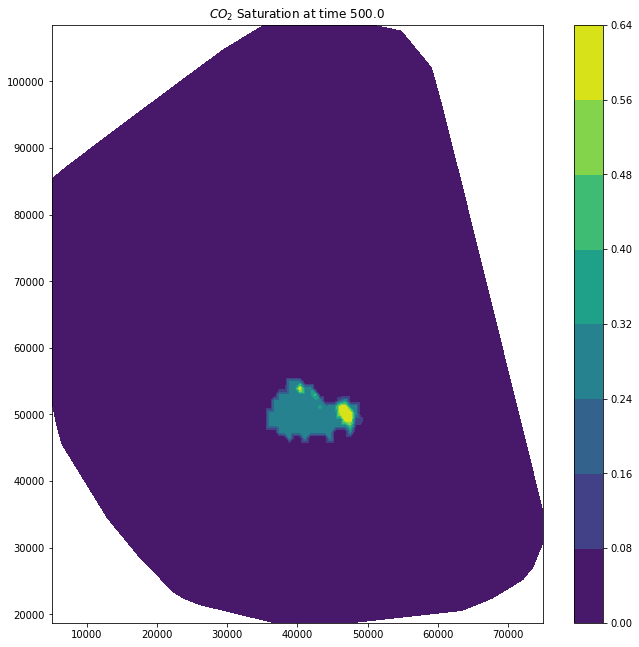

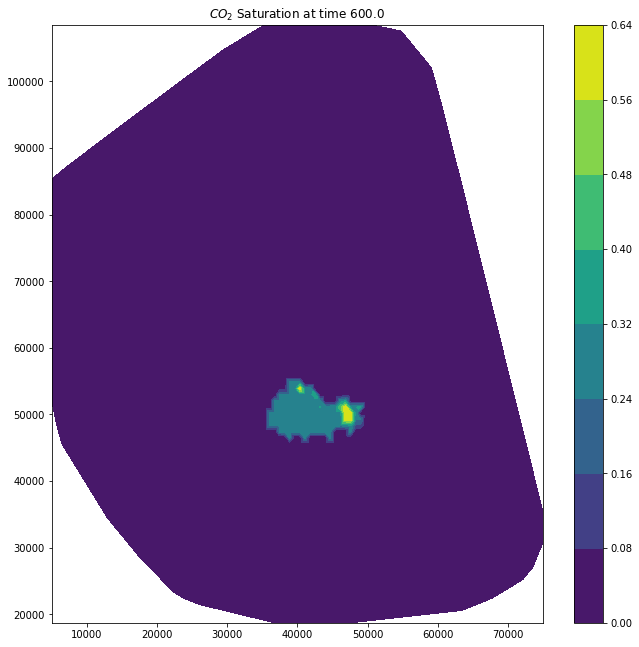

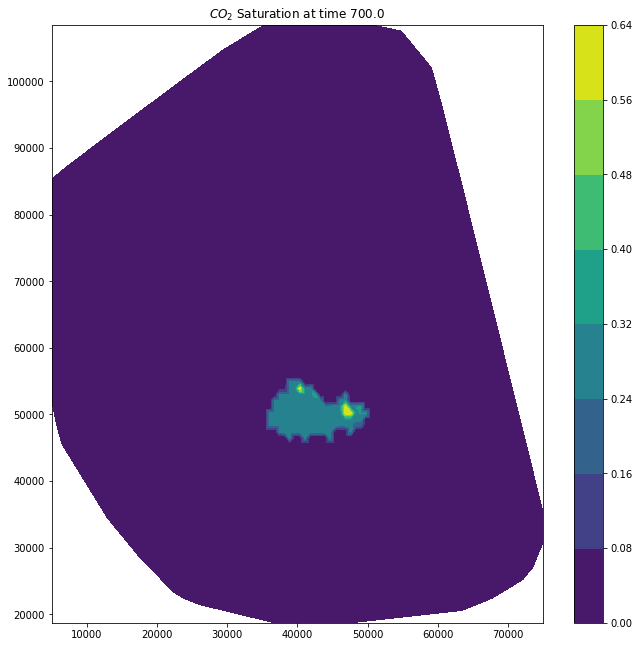

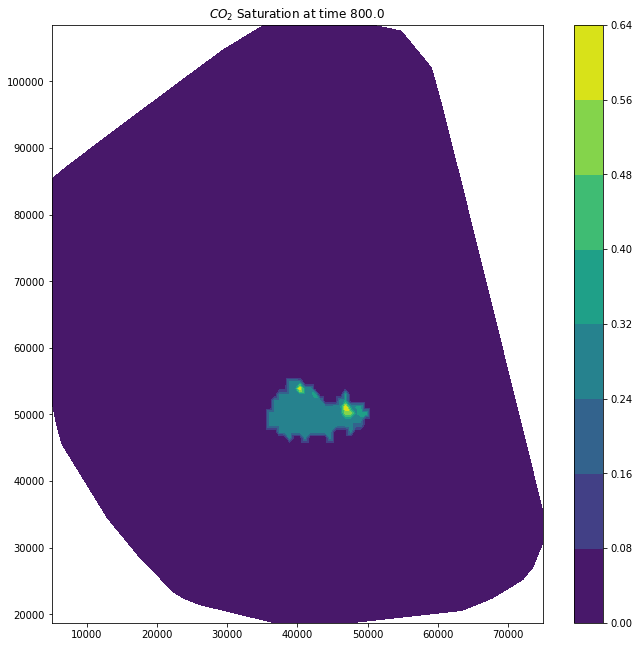

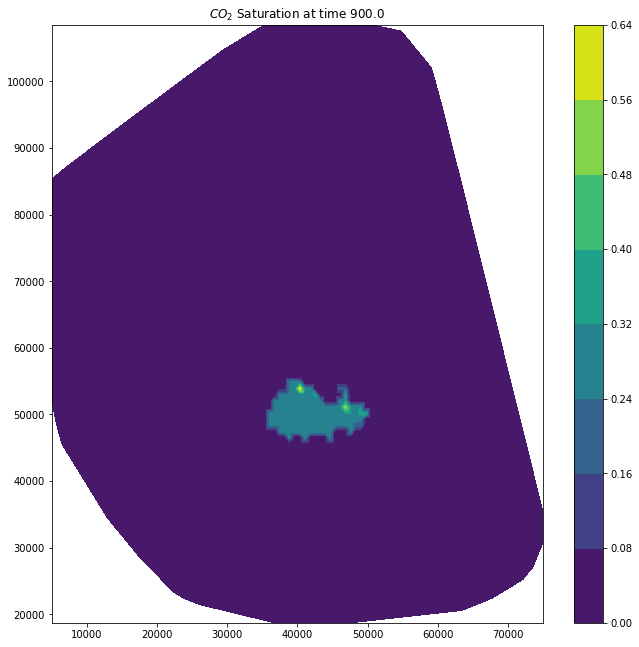

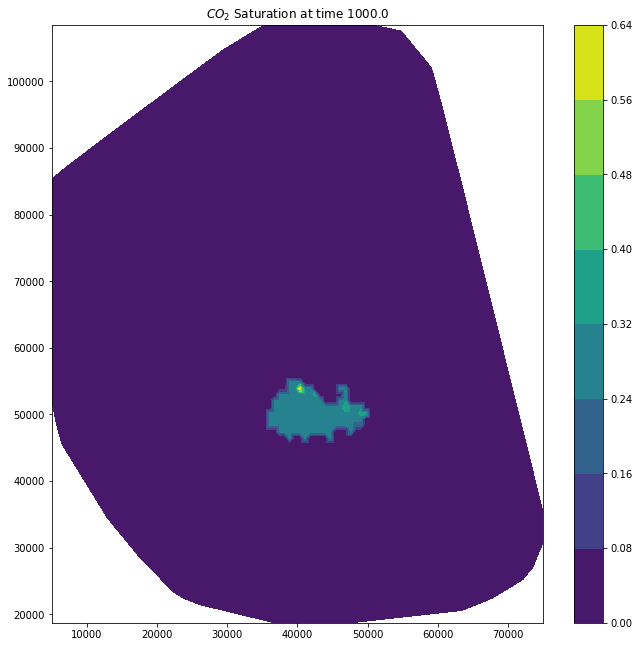

In [38]:
make_plots(19)

D:\Anaconda3_0818\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


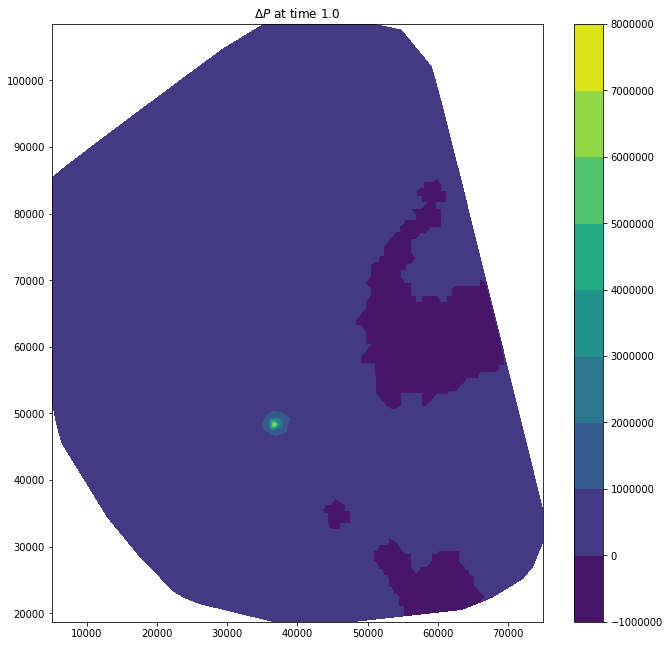

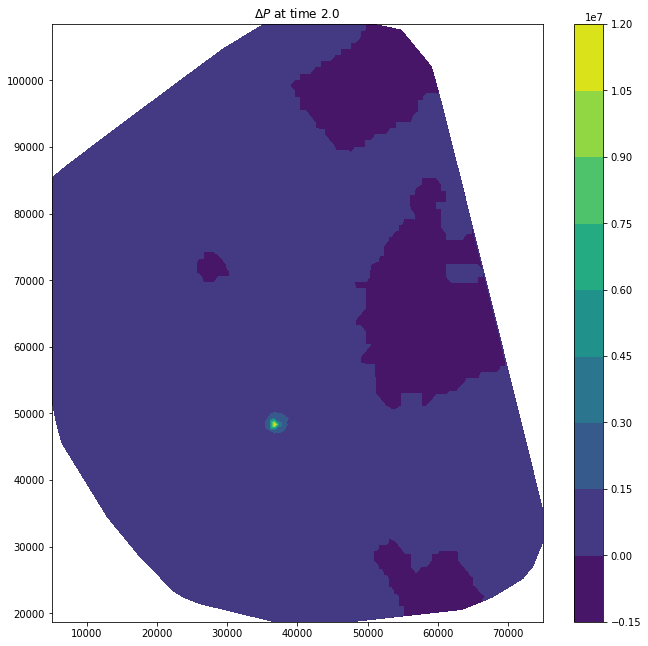

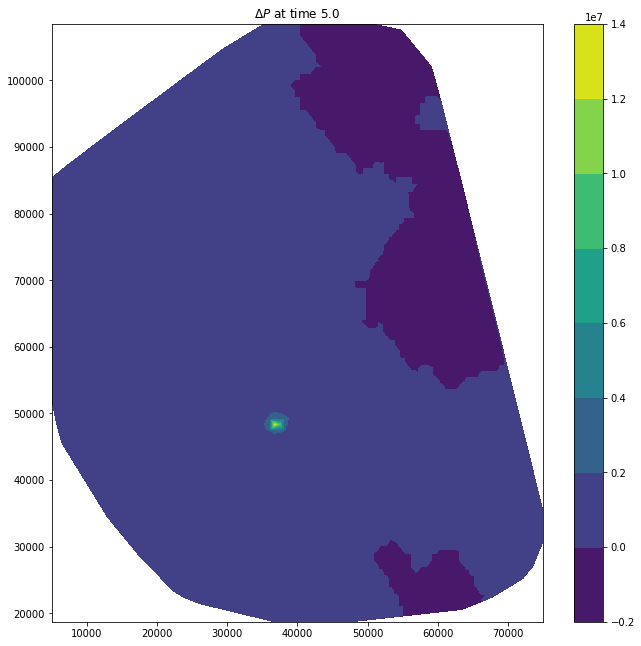

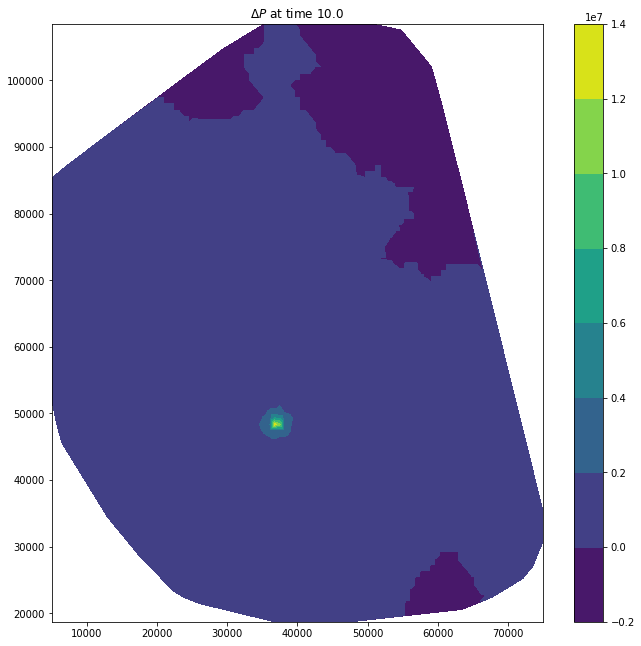

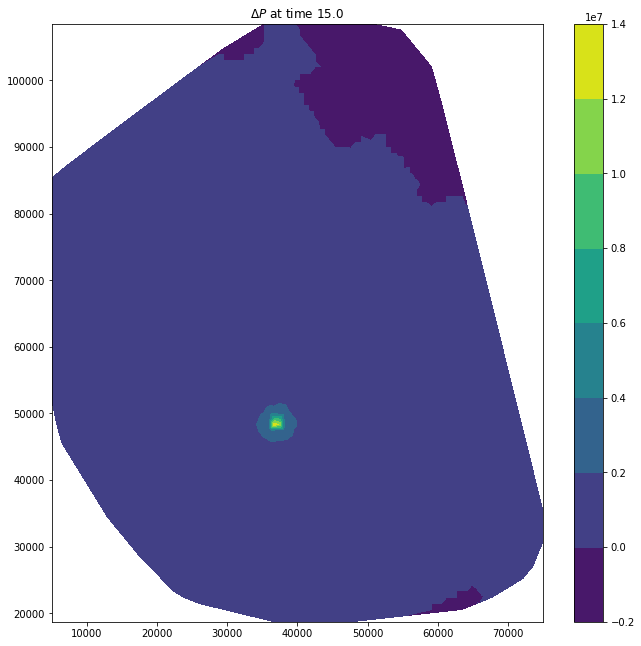

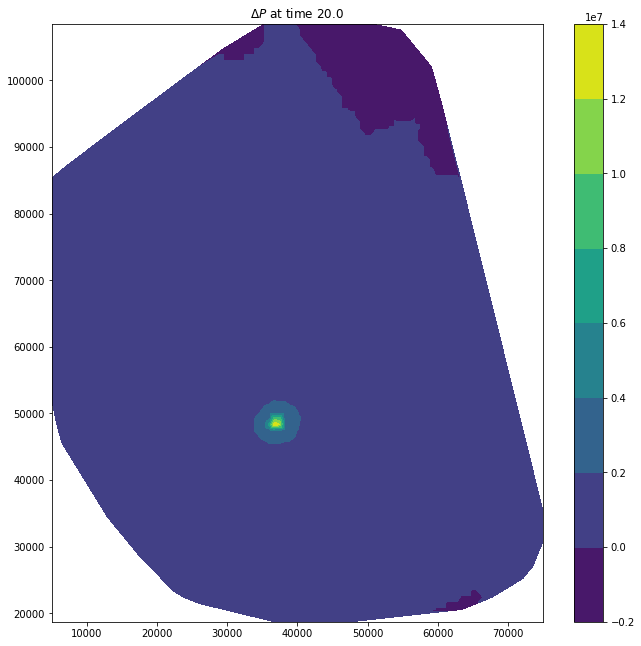

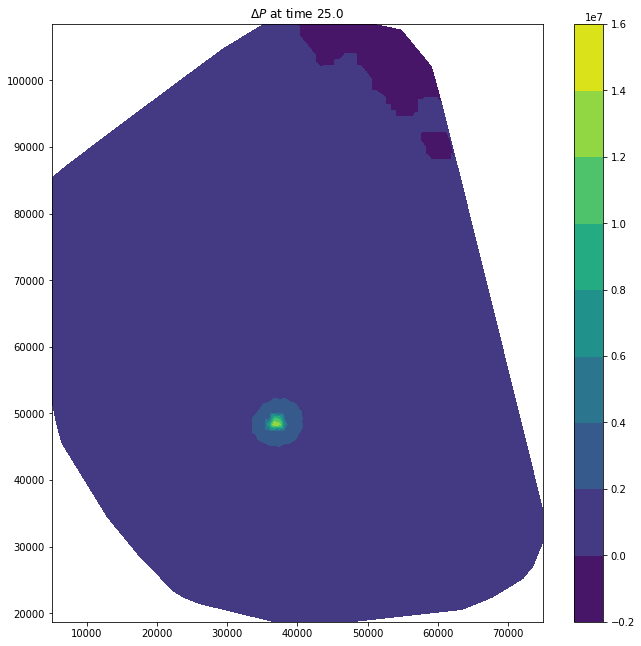

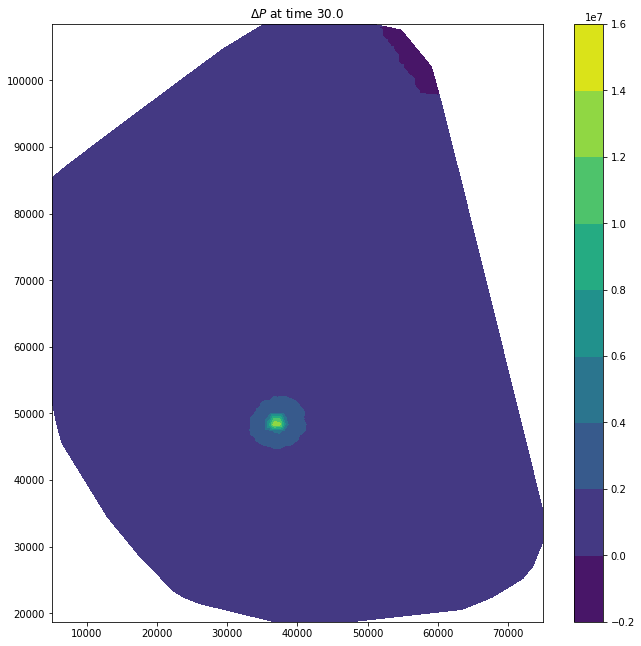

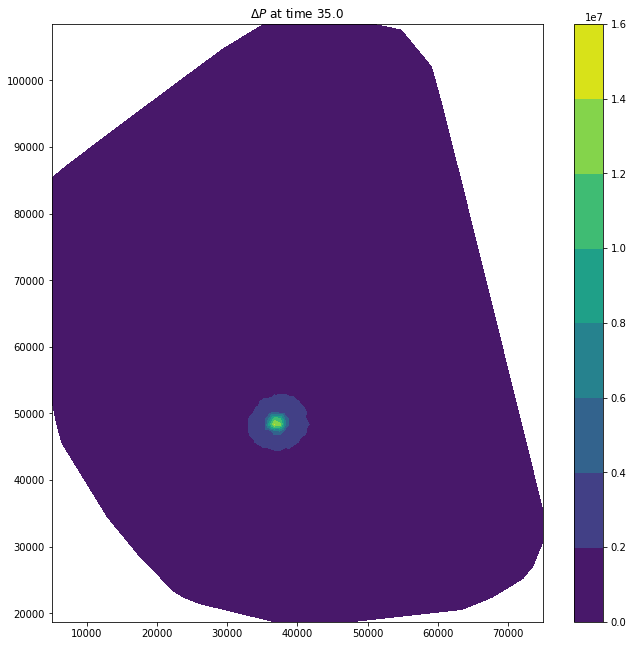

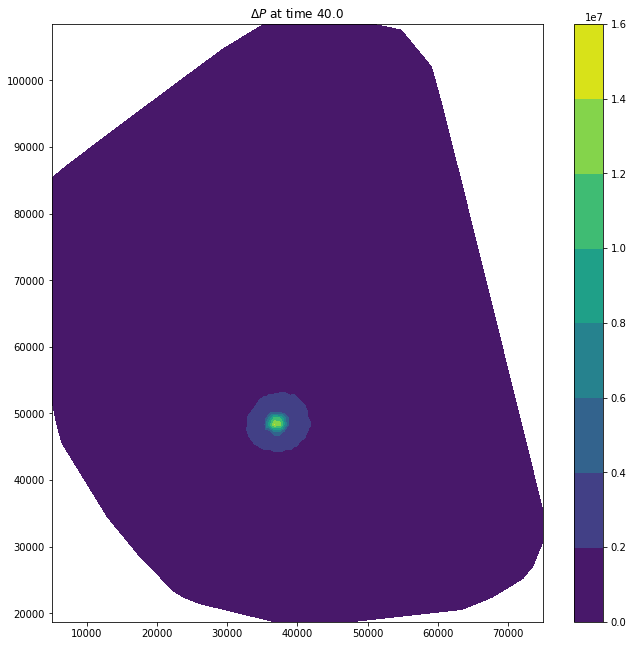

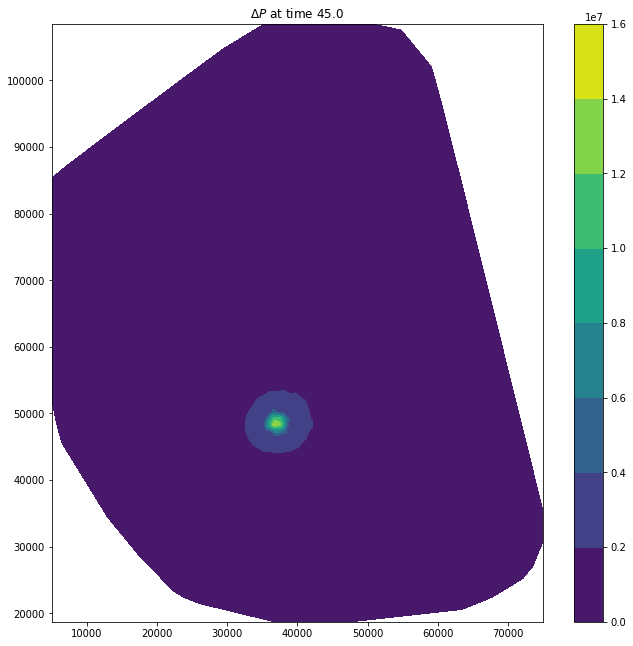

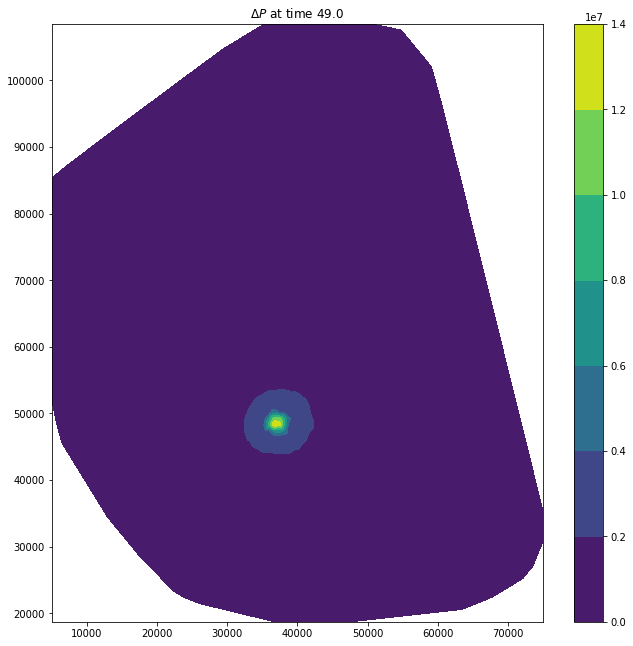

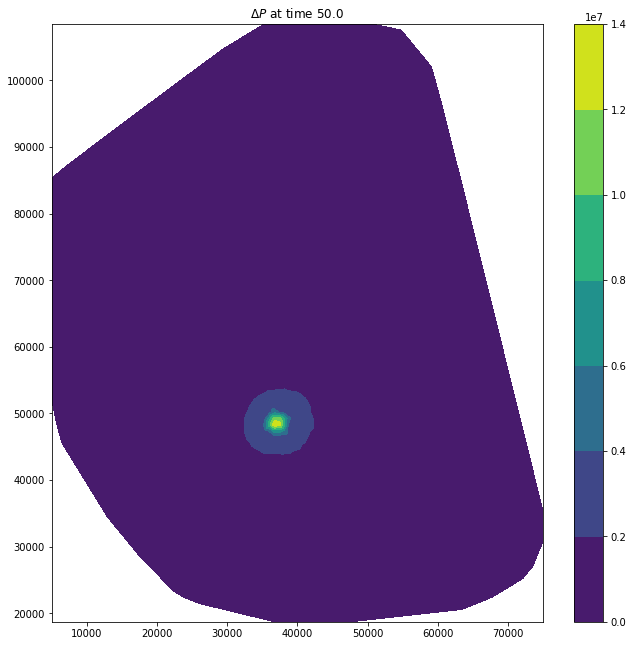

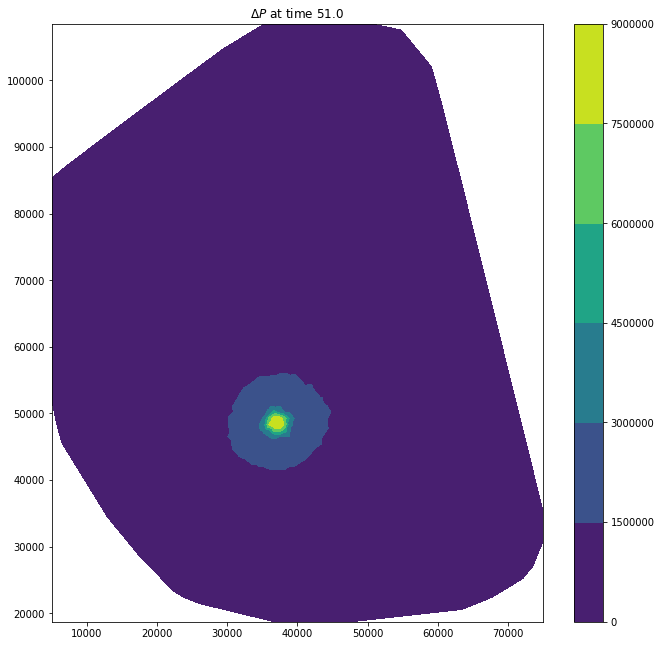

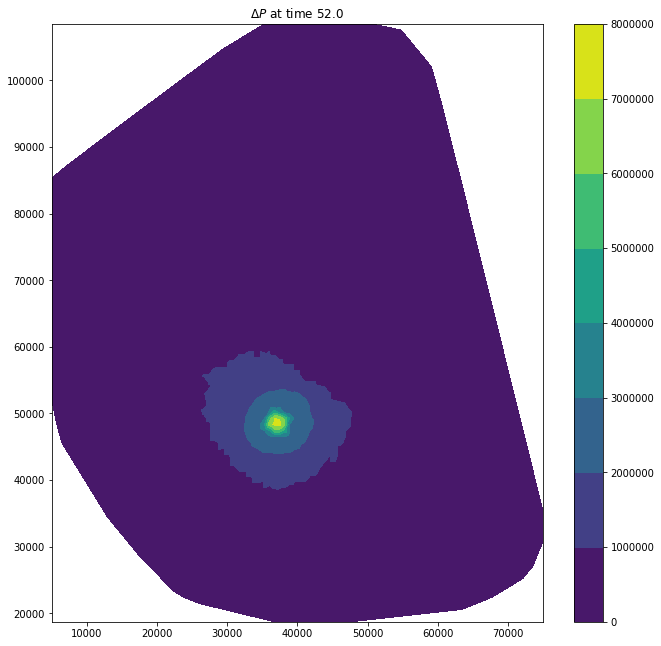

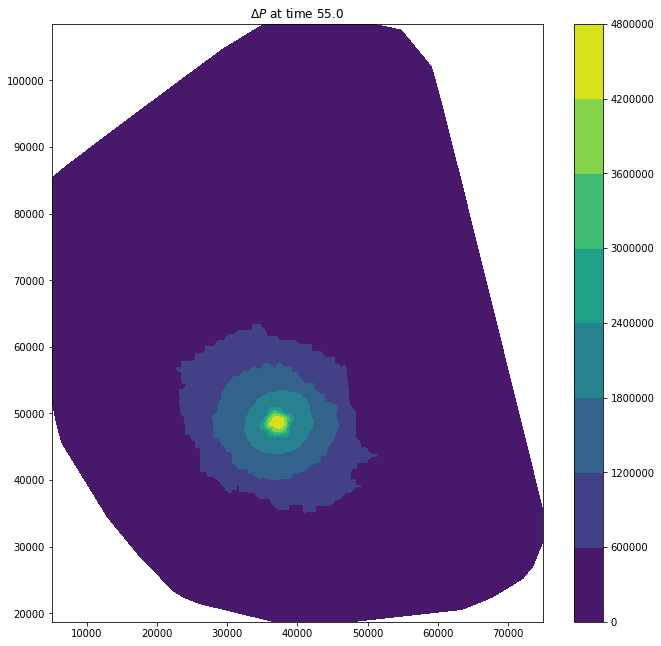

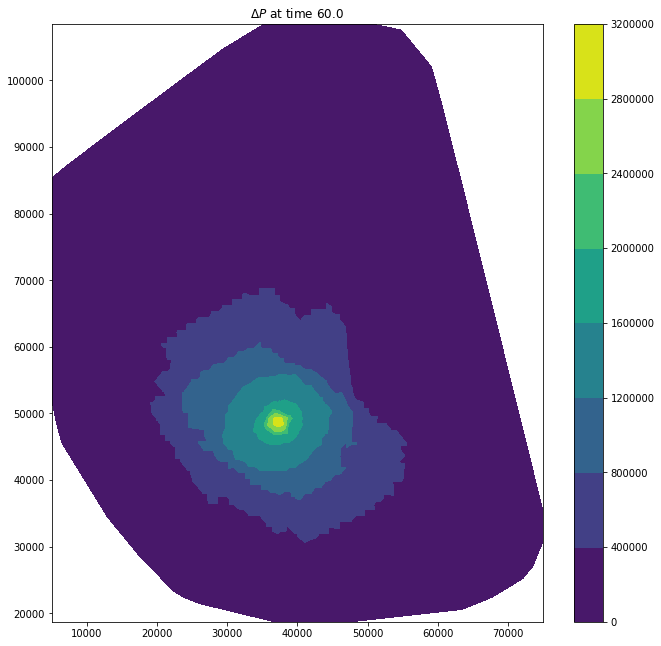

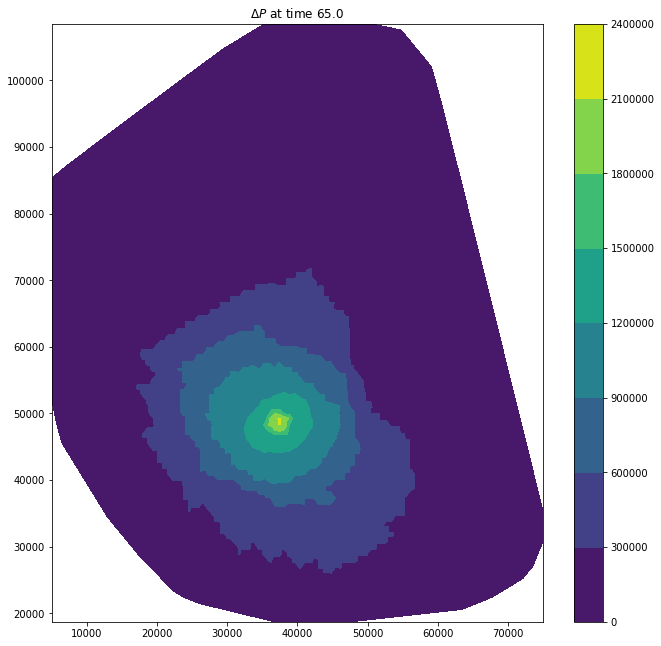

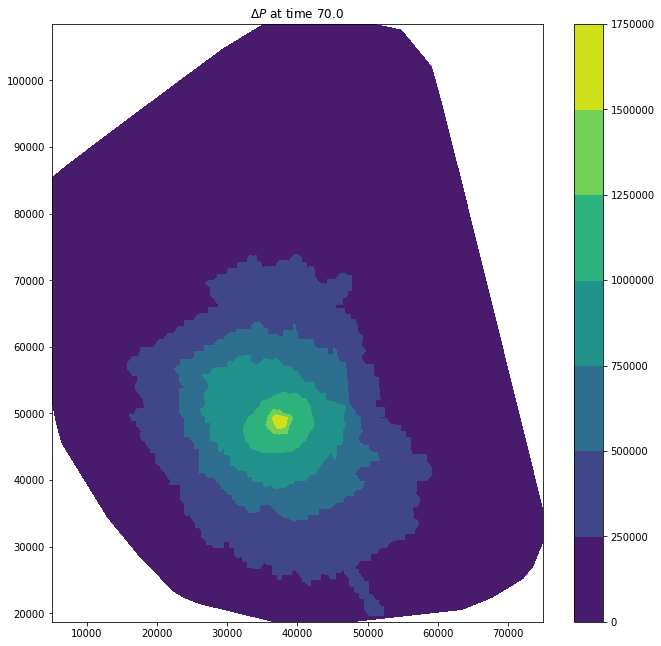

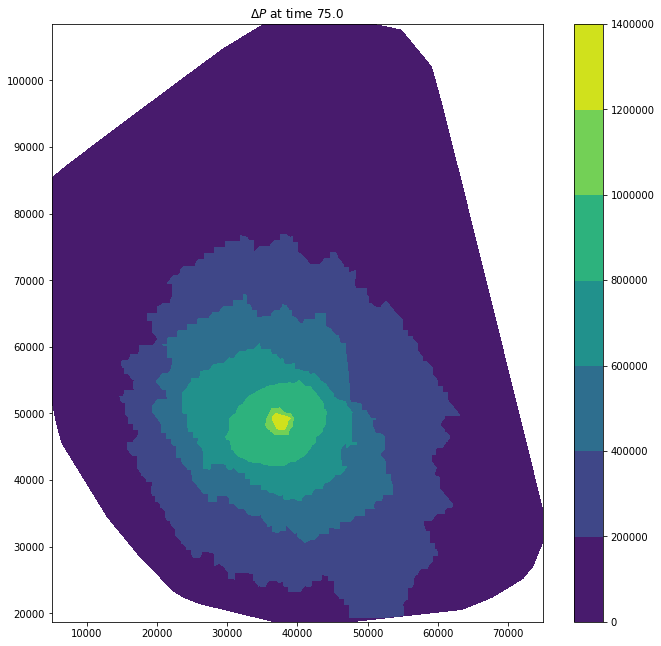

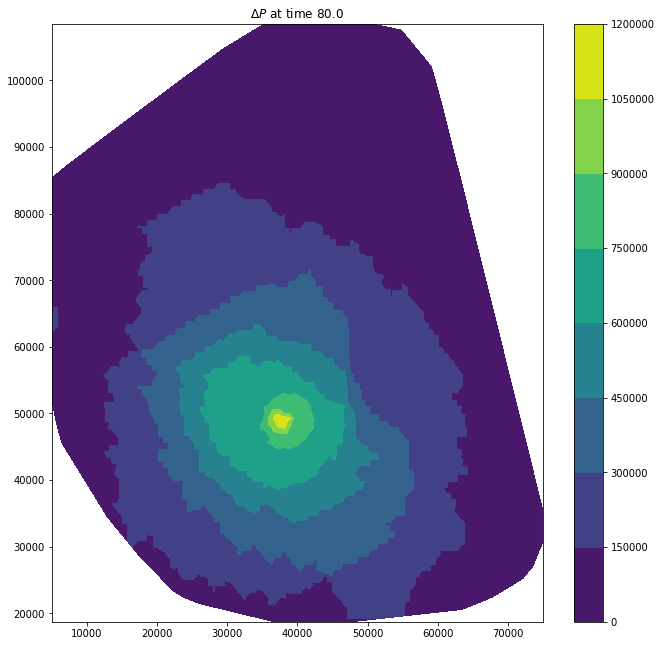

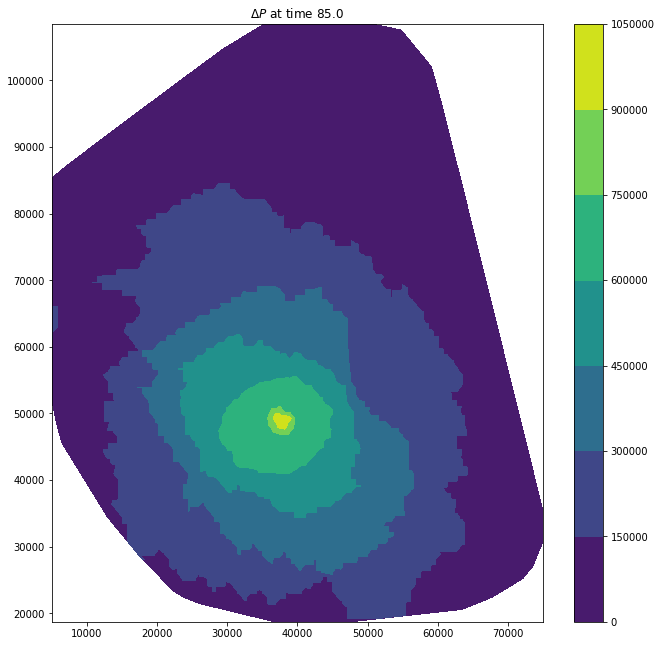

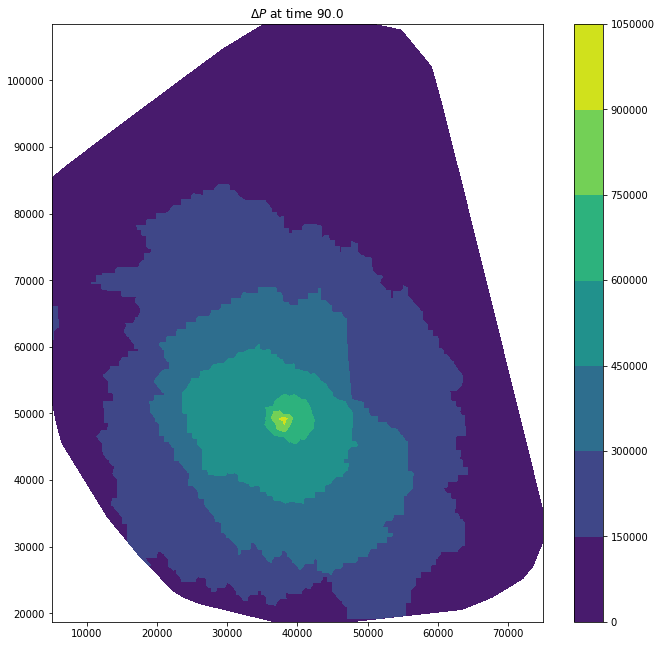

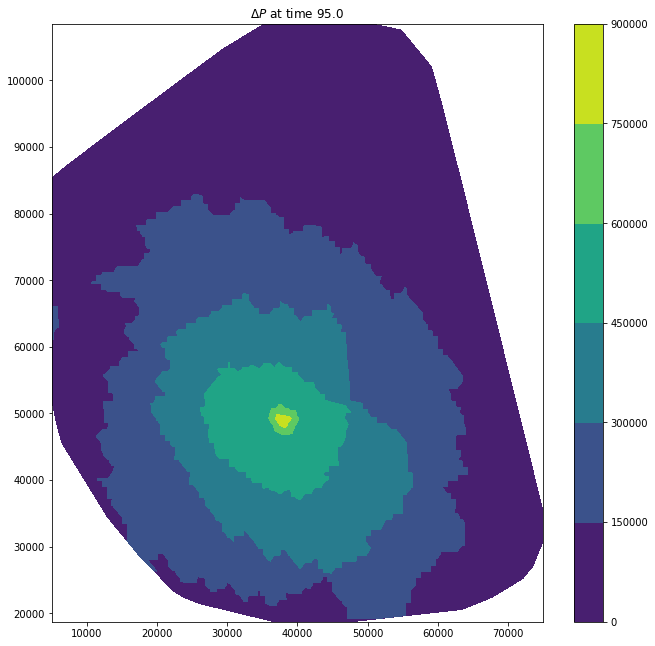

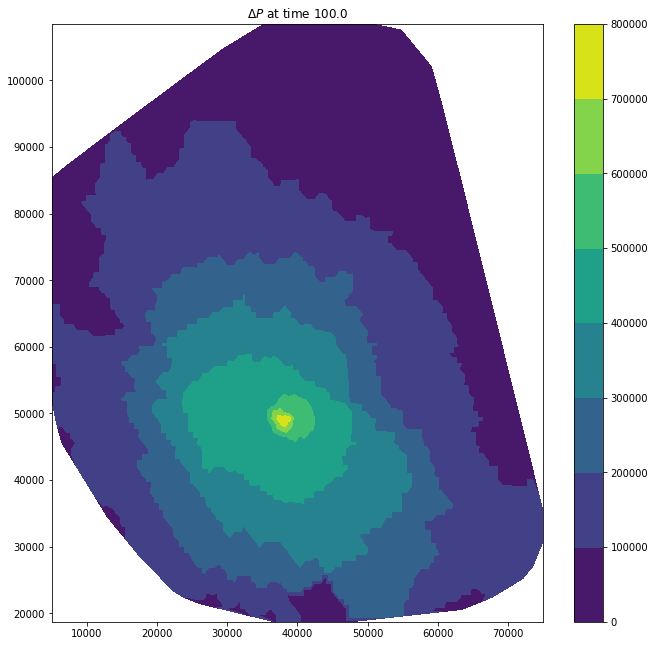

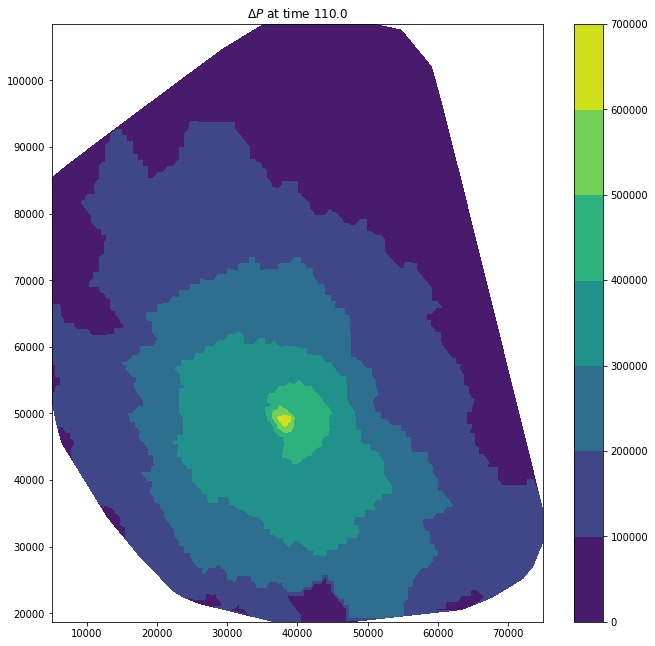

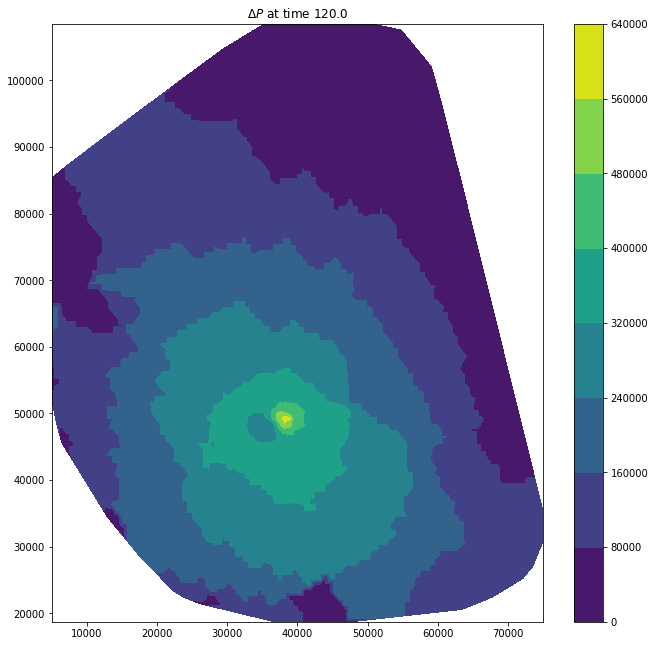

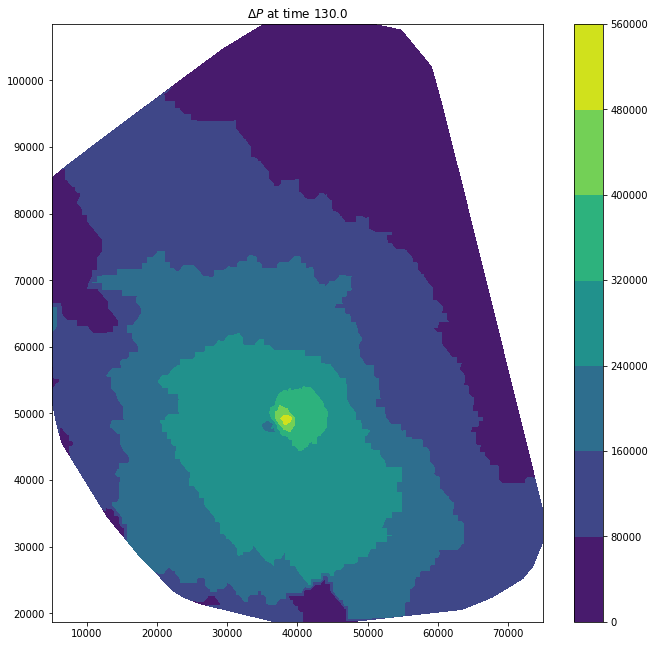

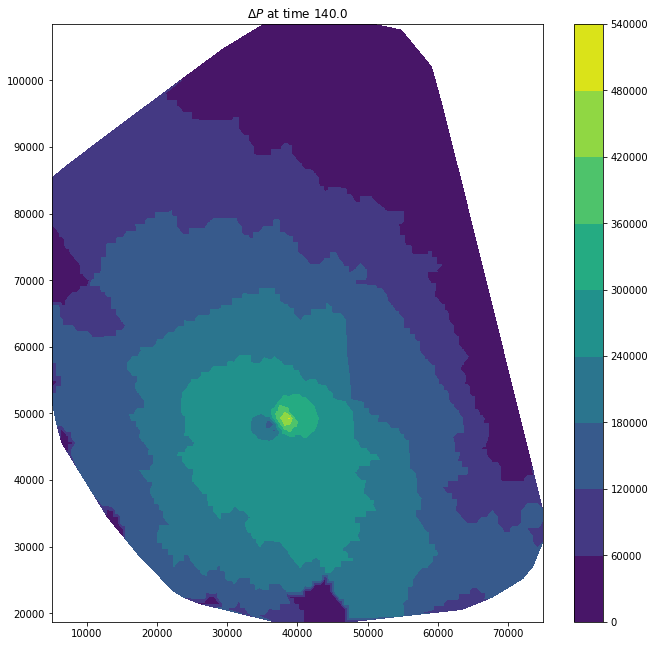

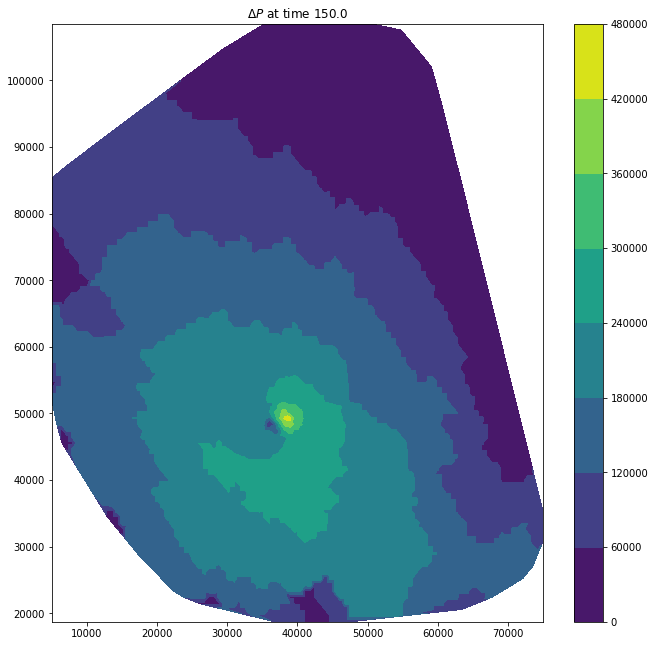

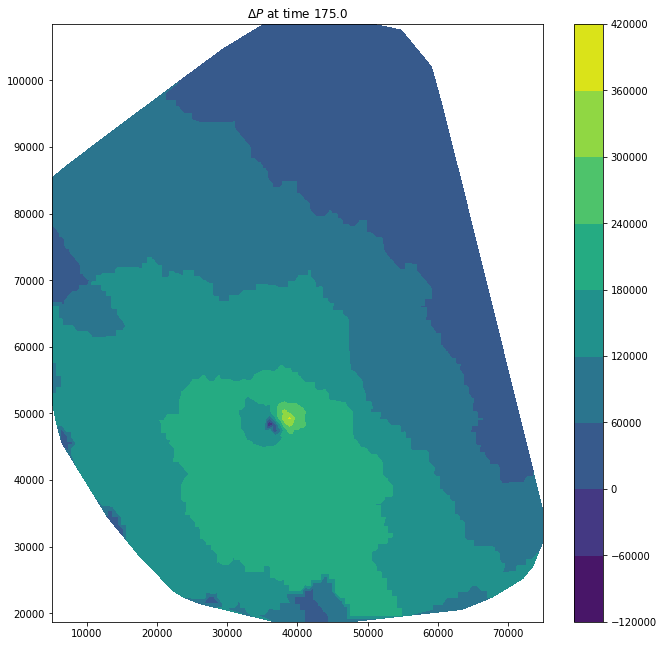

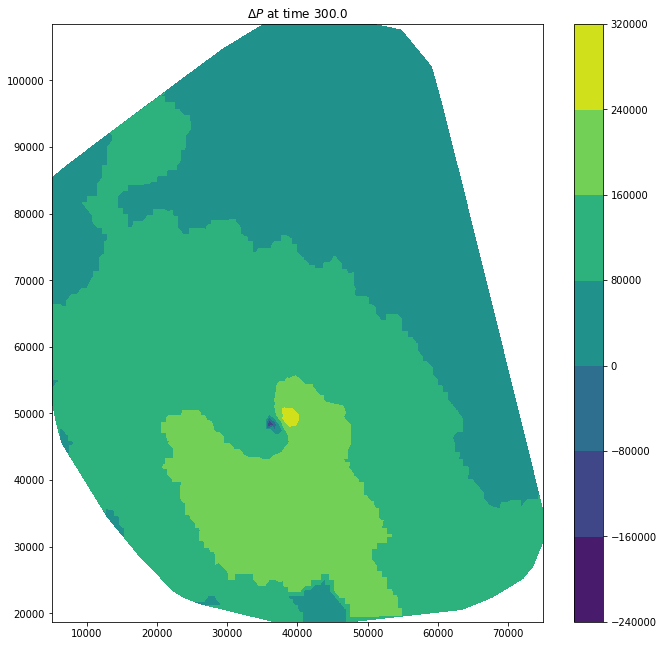

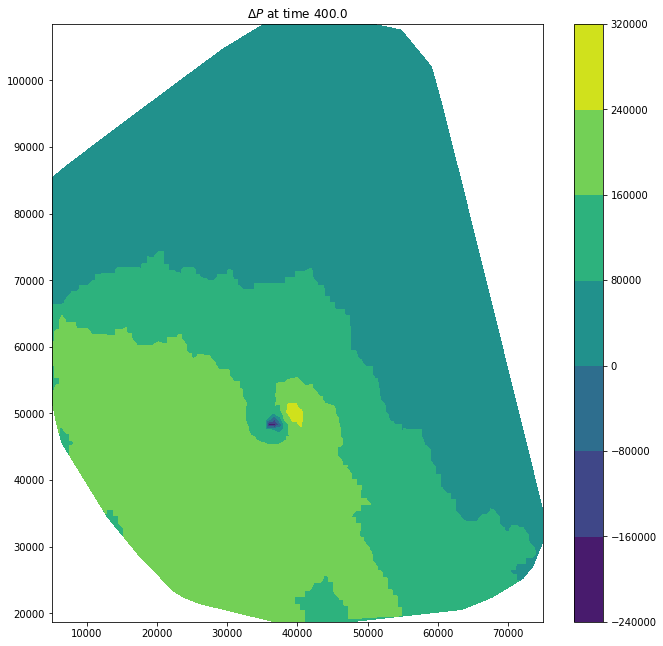

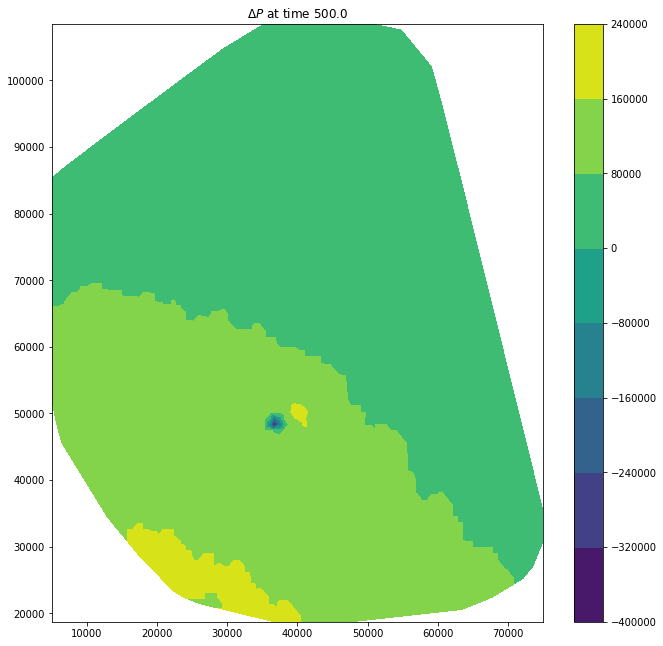

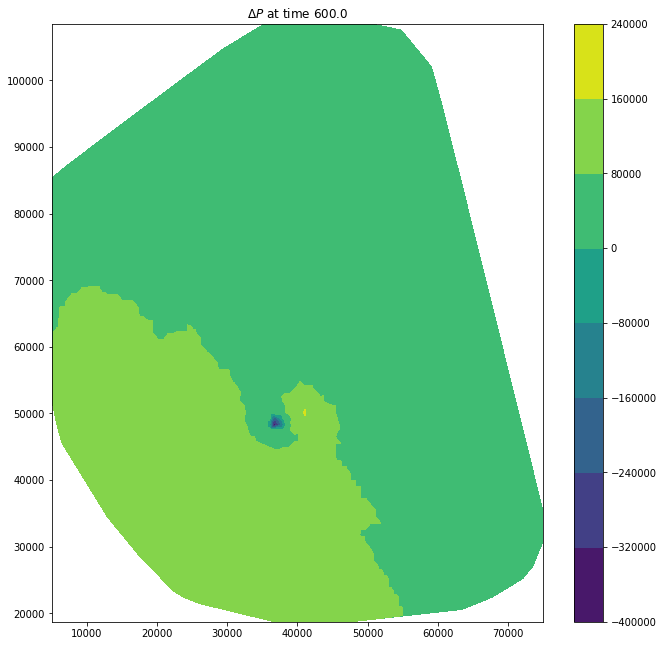

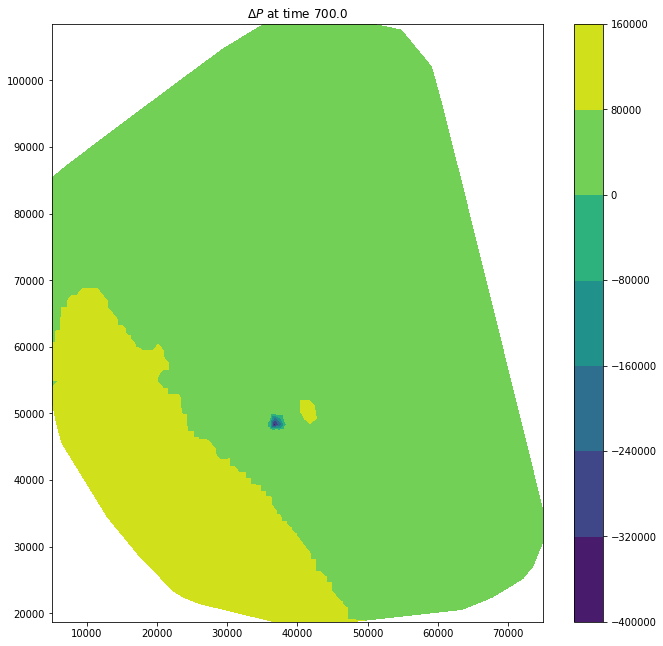

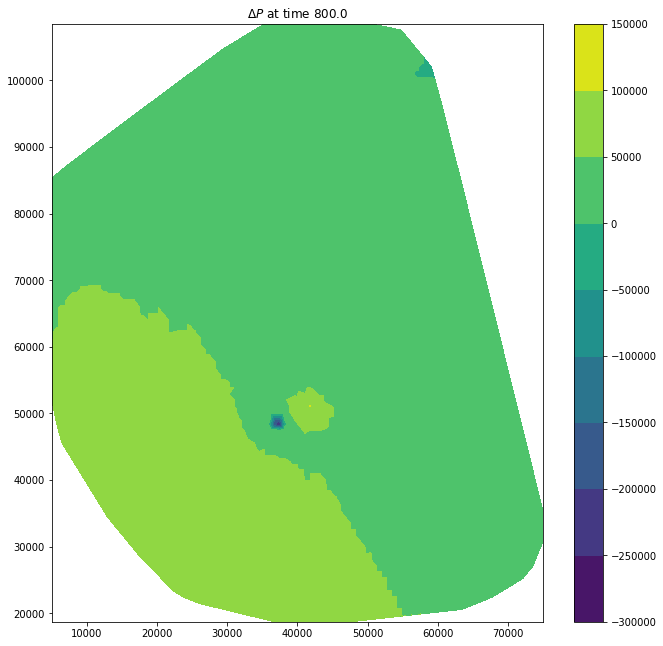

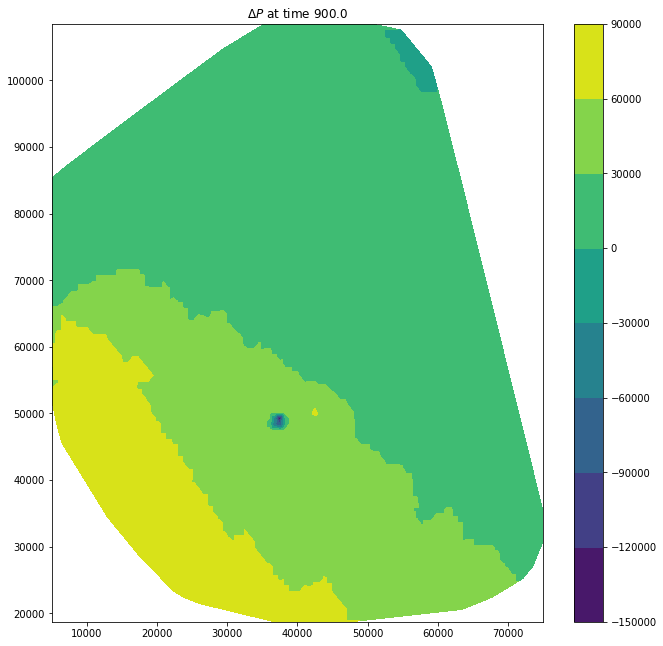

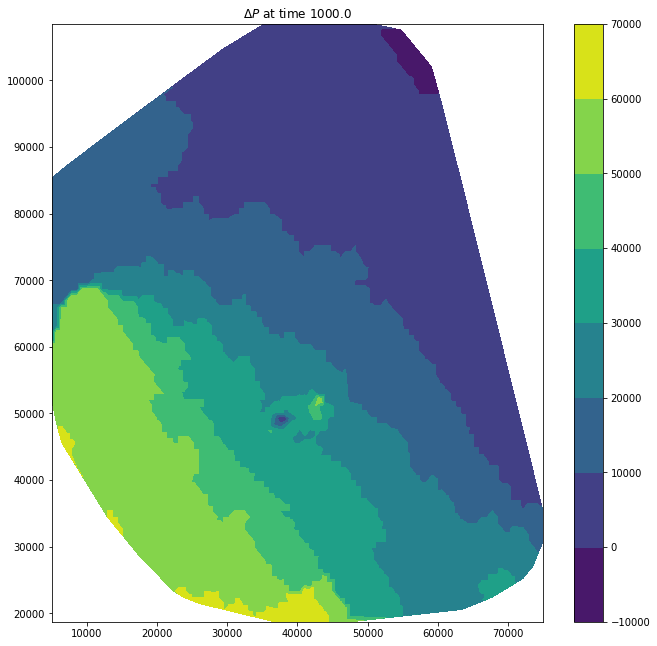

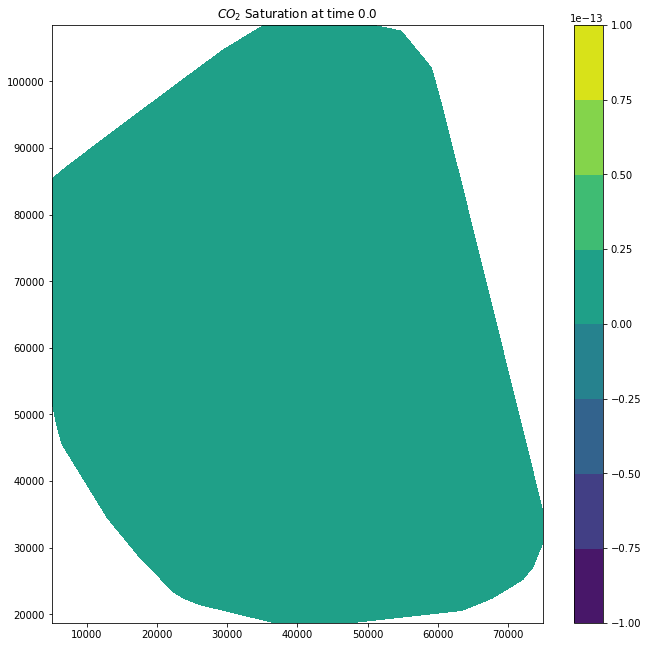

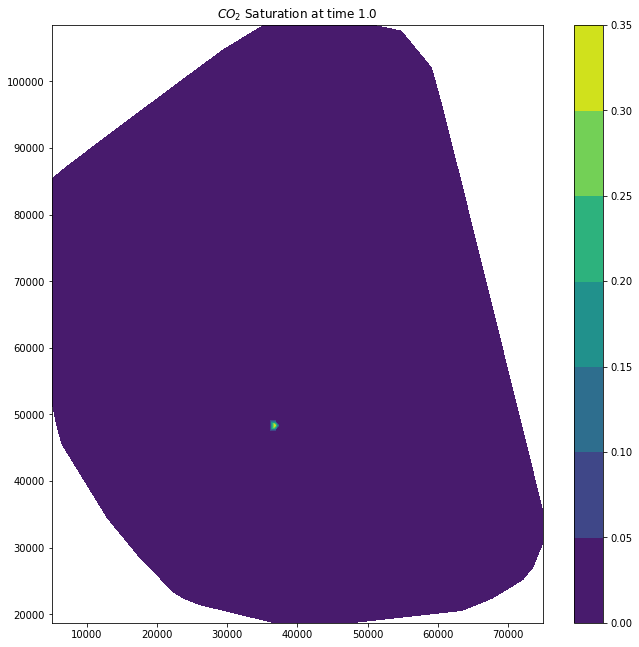

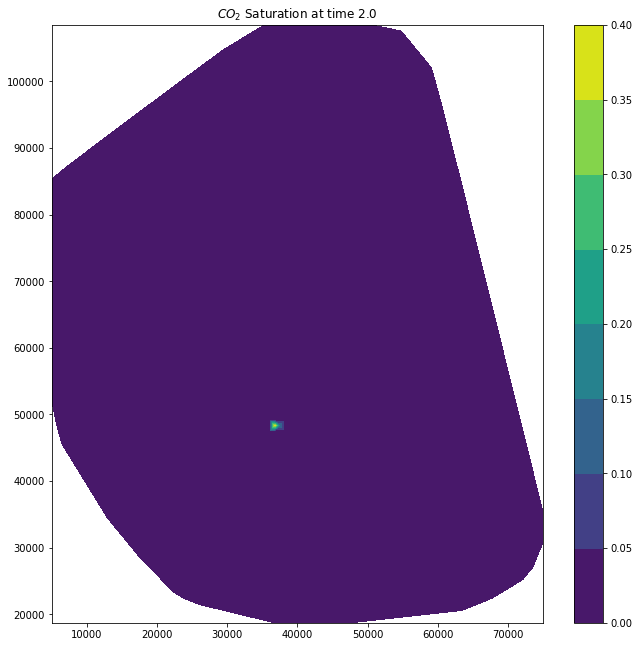

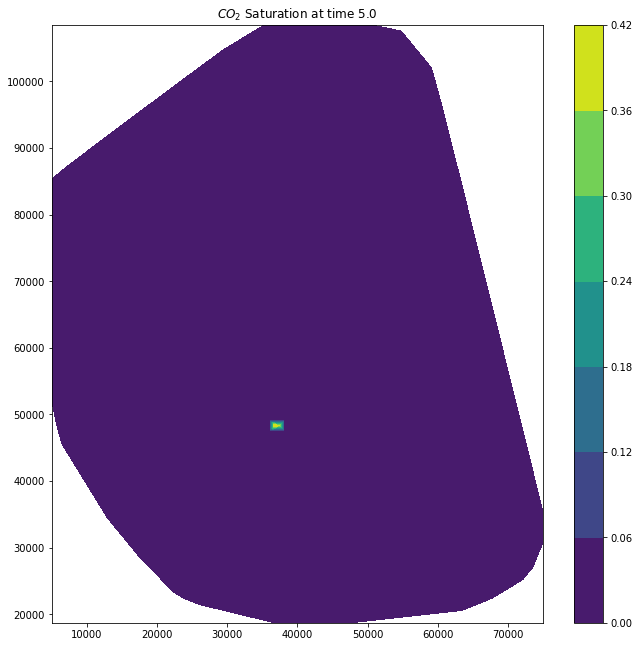

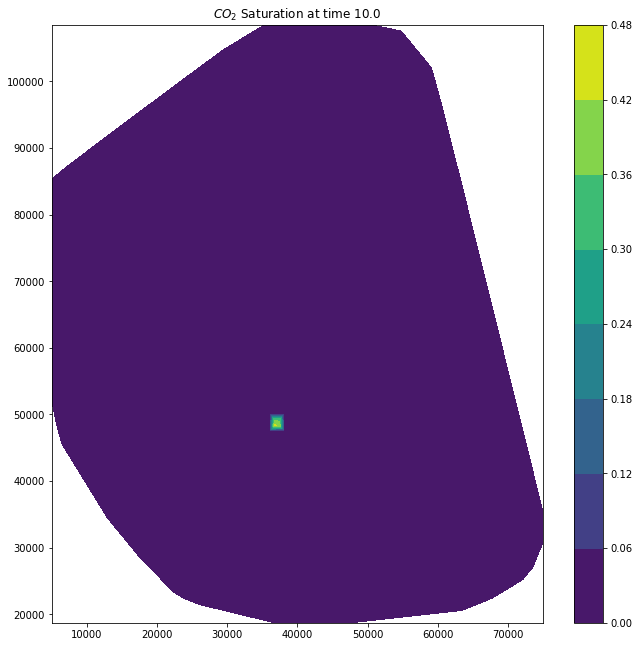

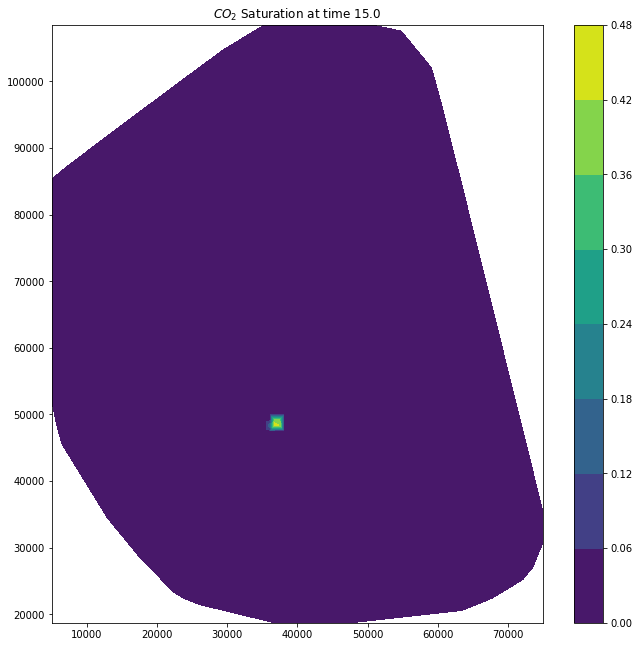

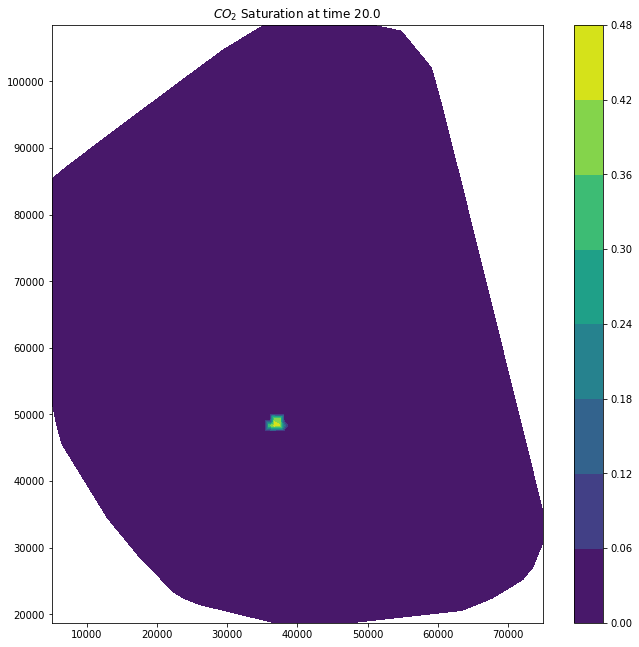

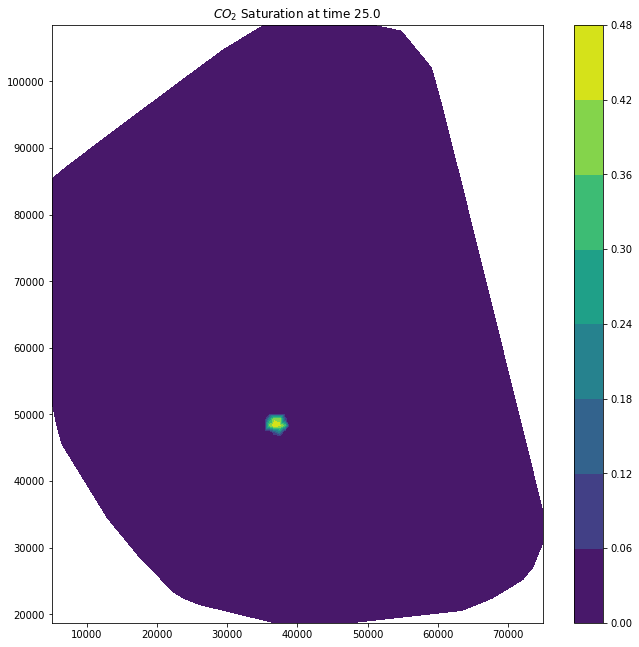

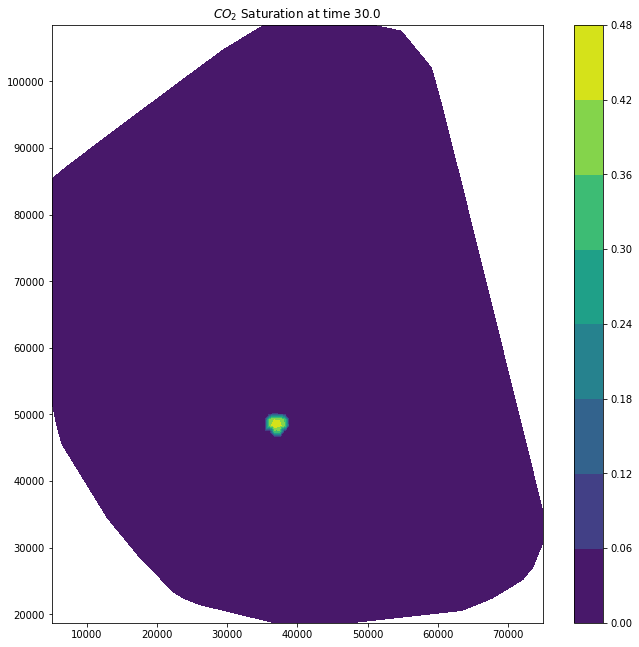

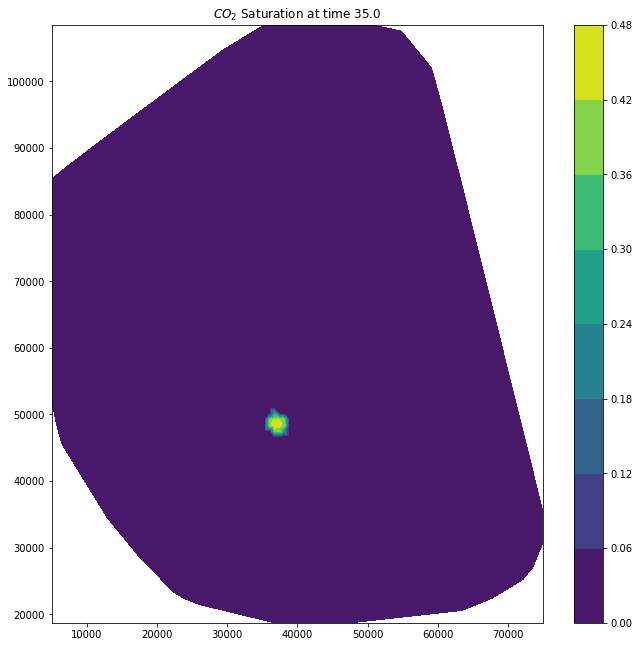

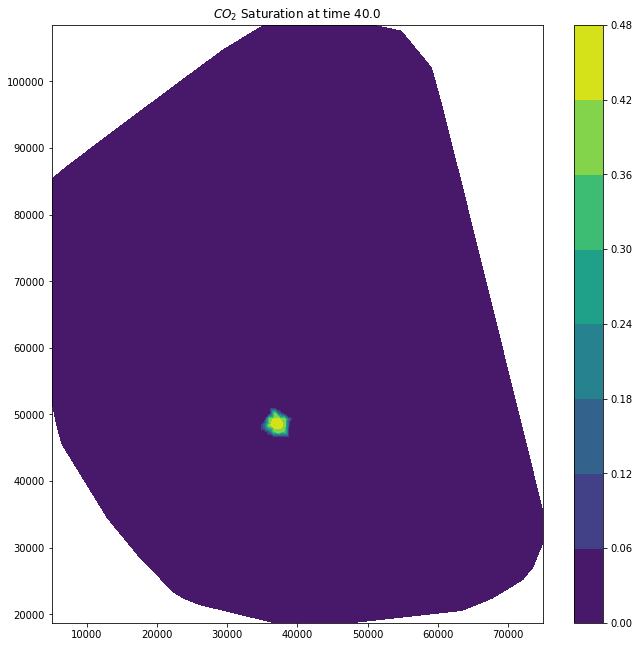

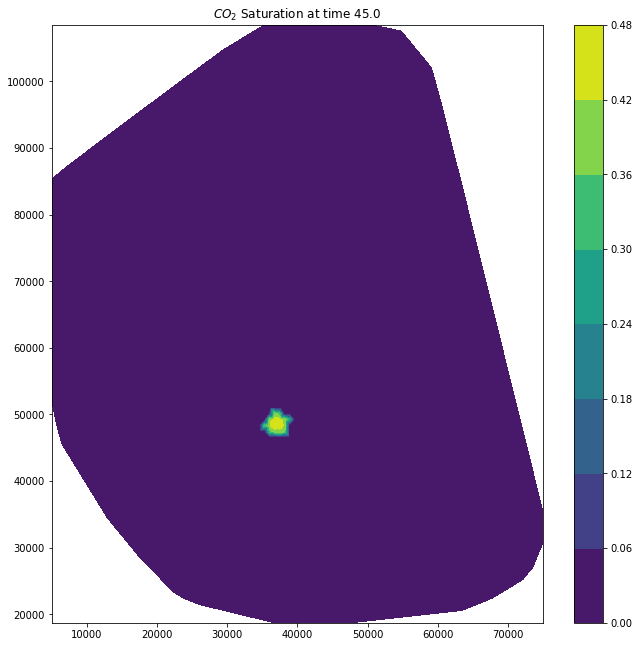

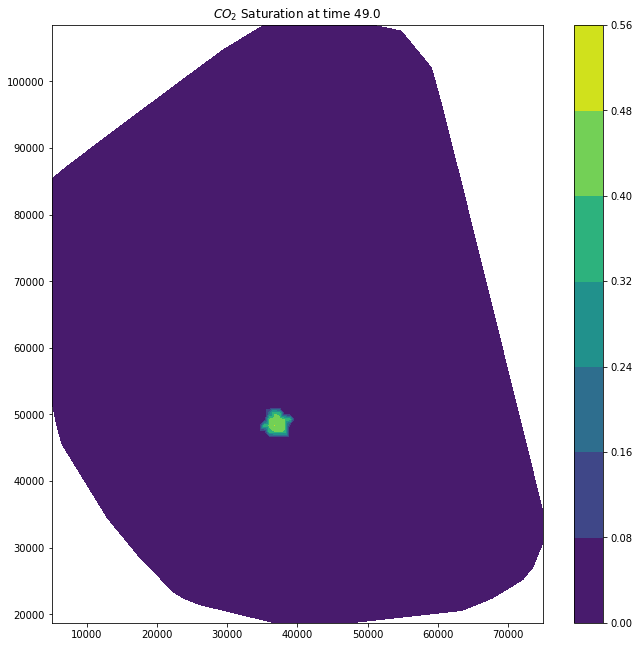

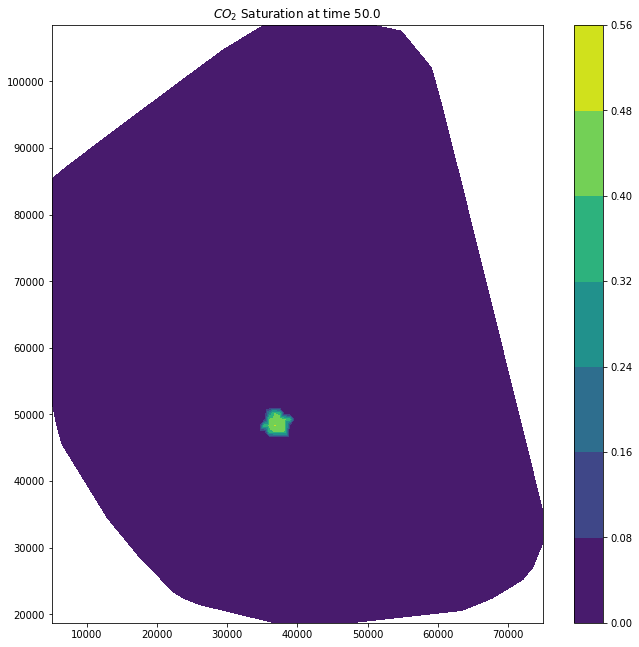

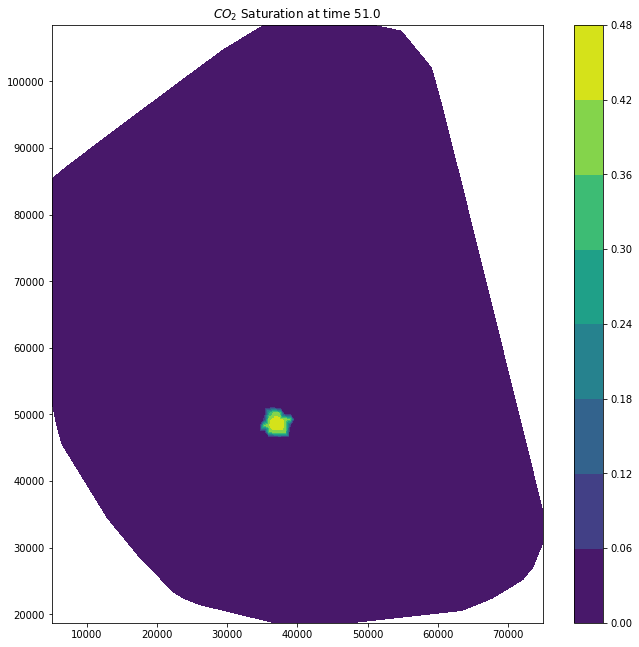

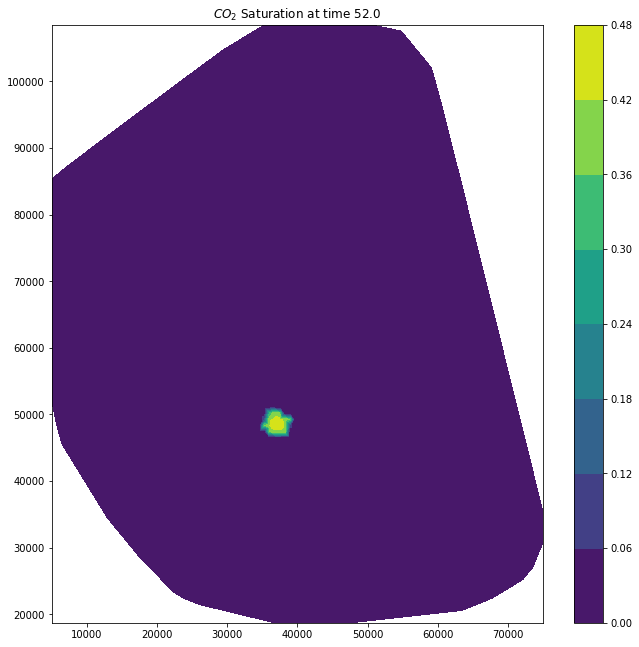

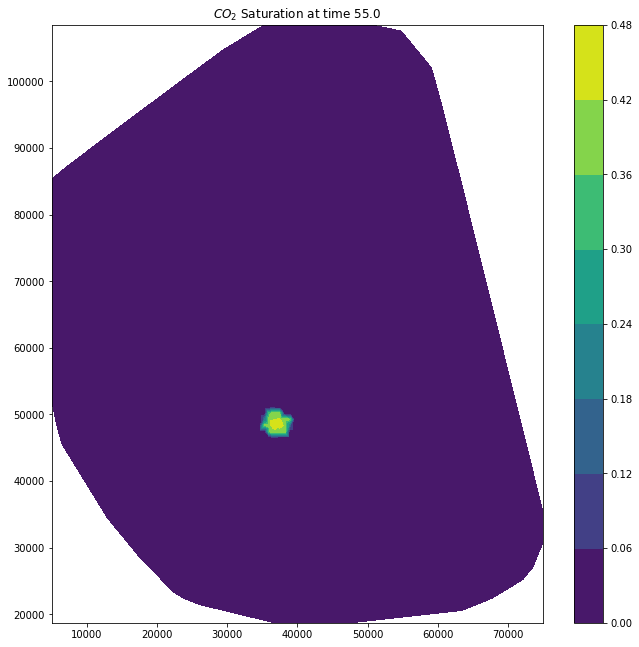

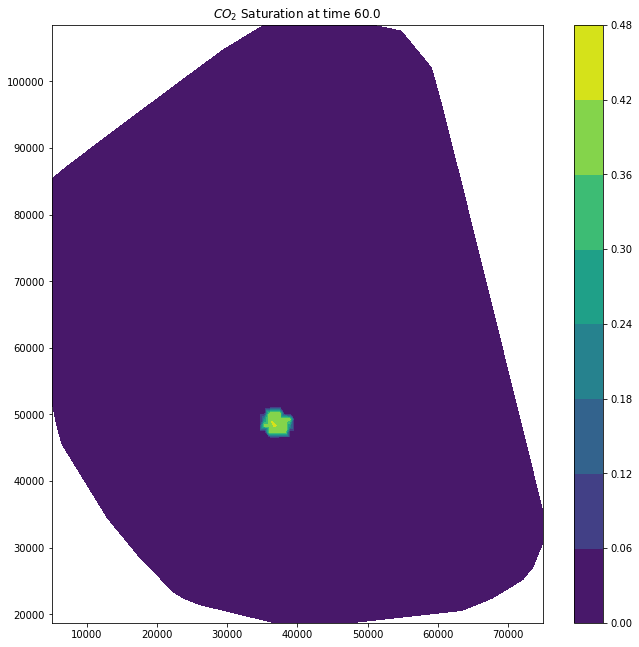

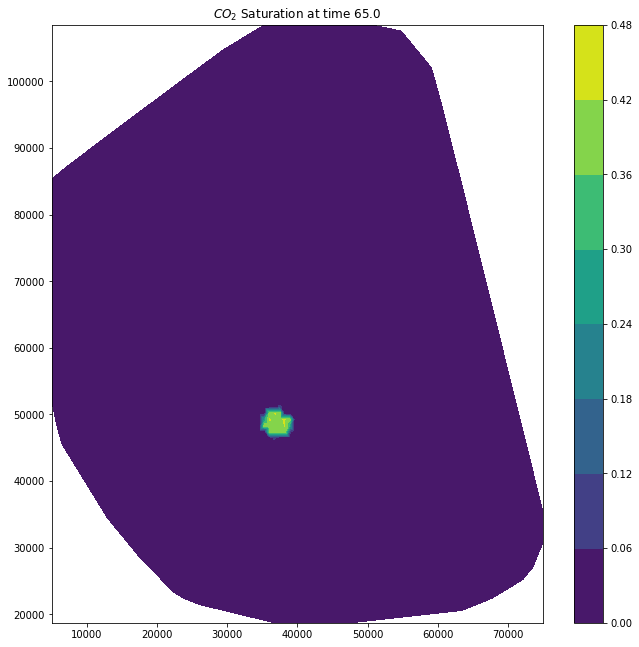

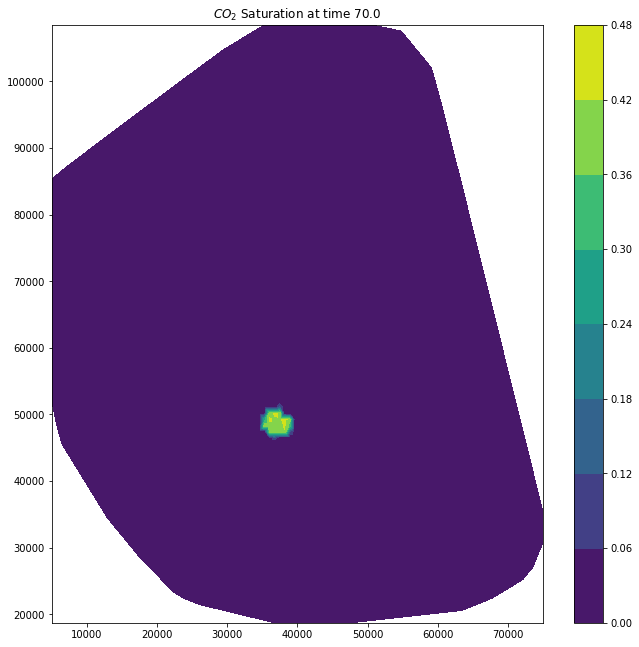

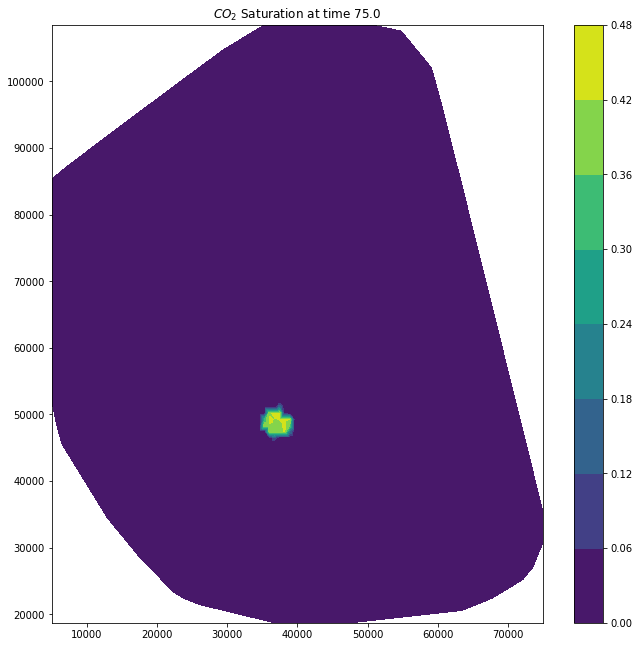

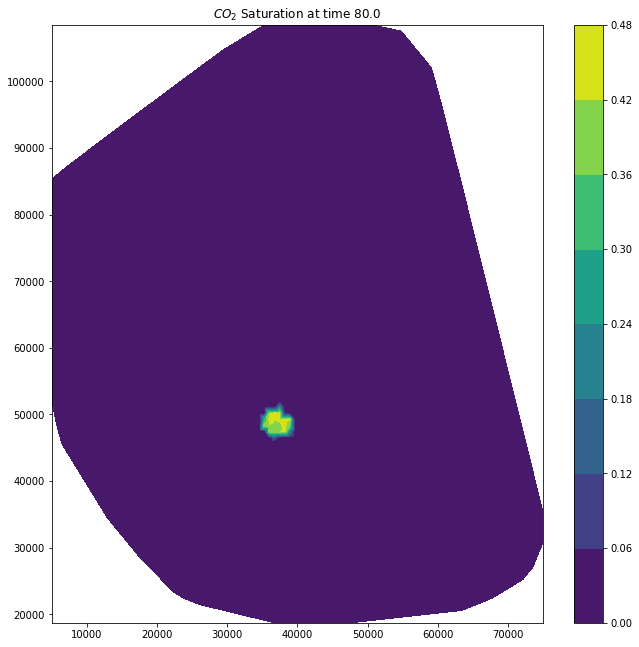

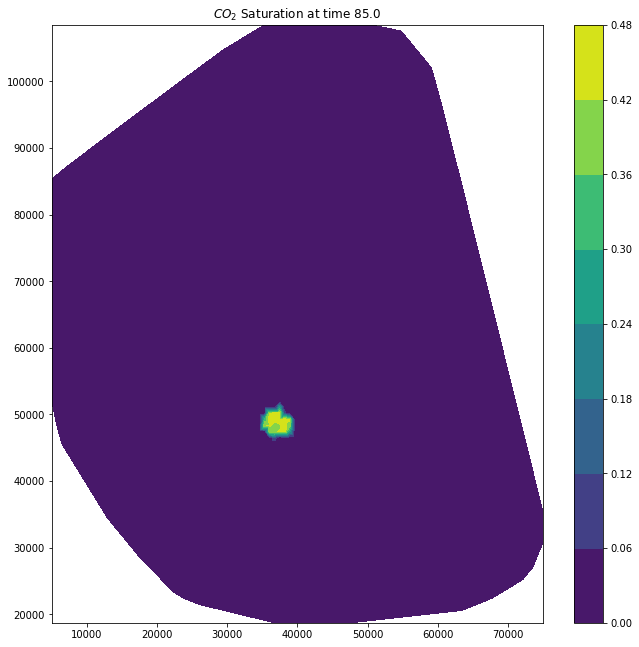

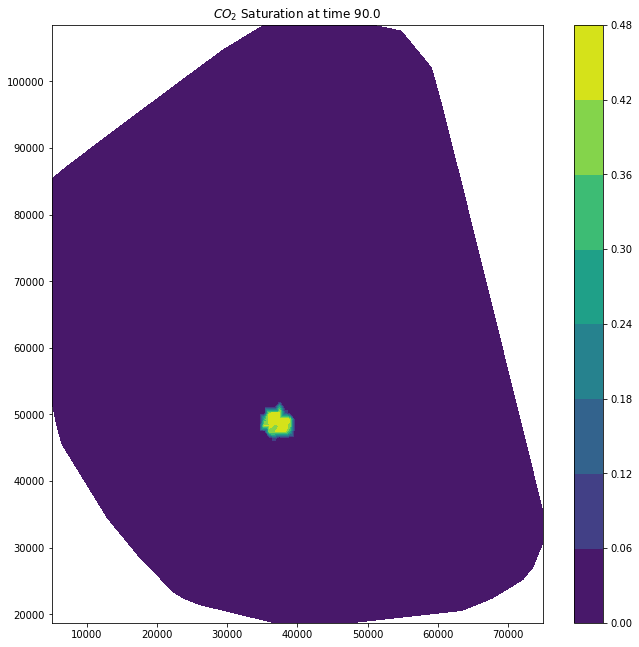

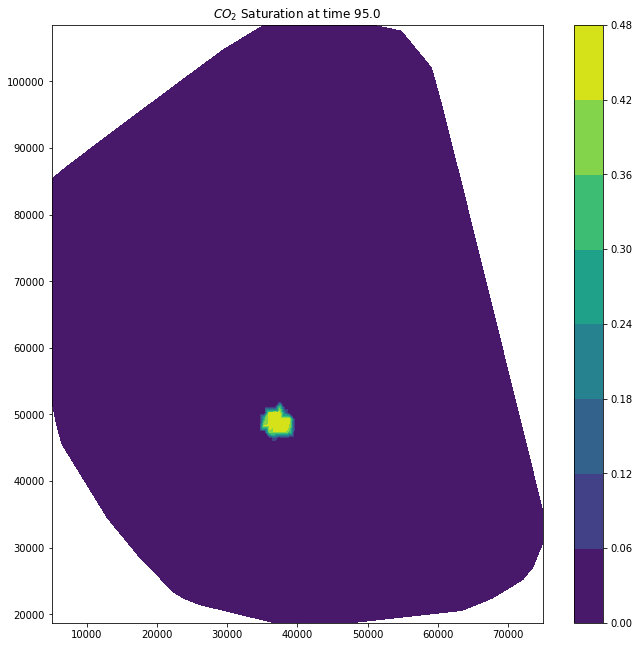

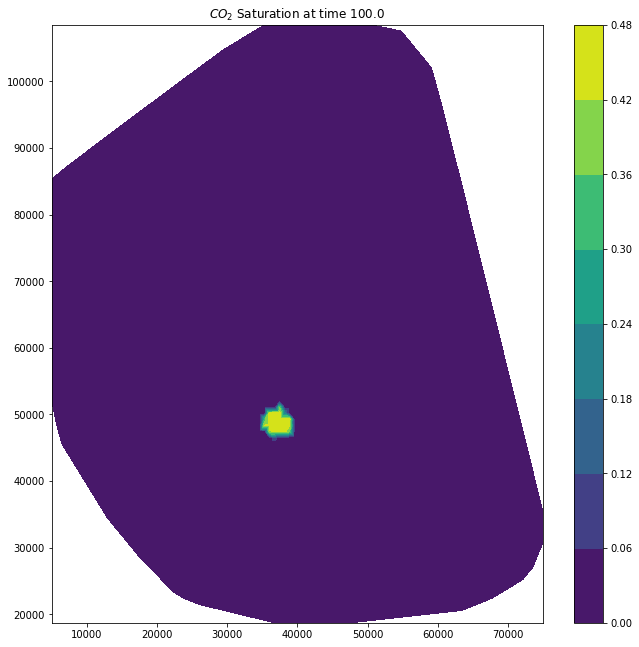

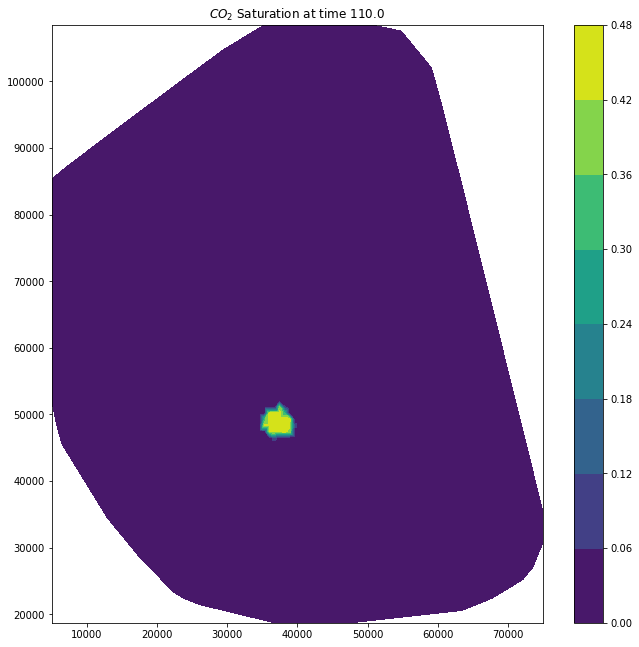

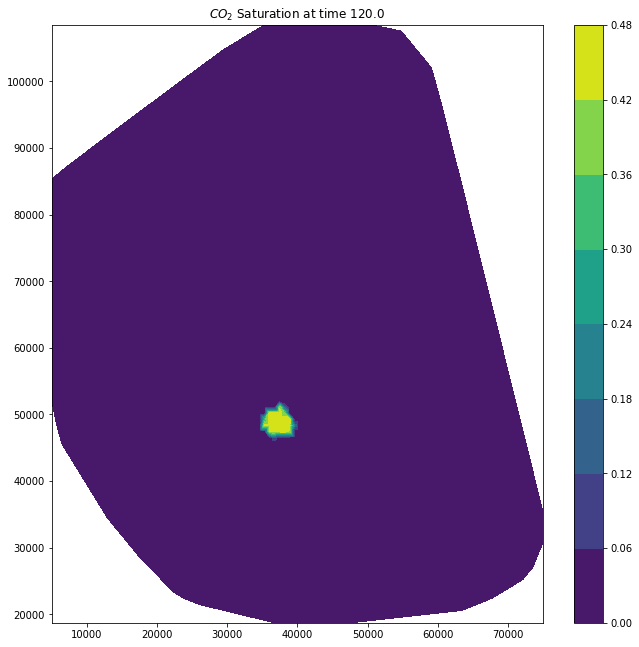

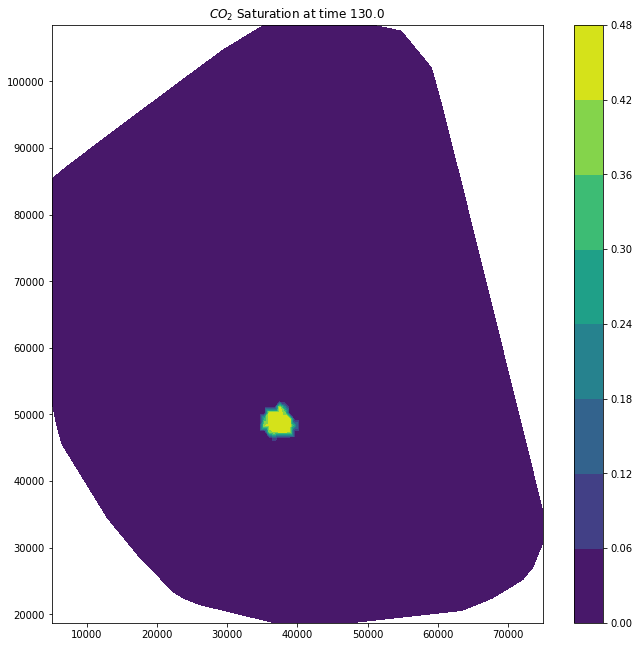

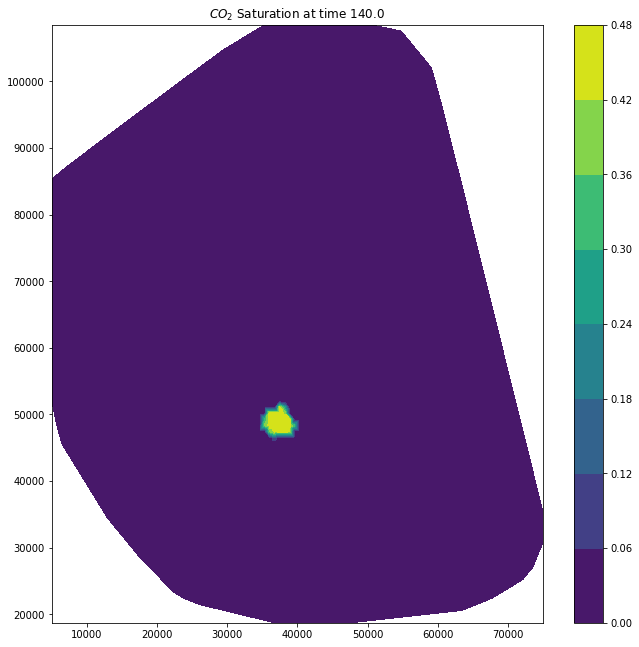

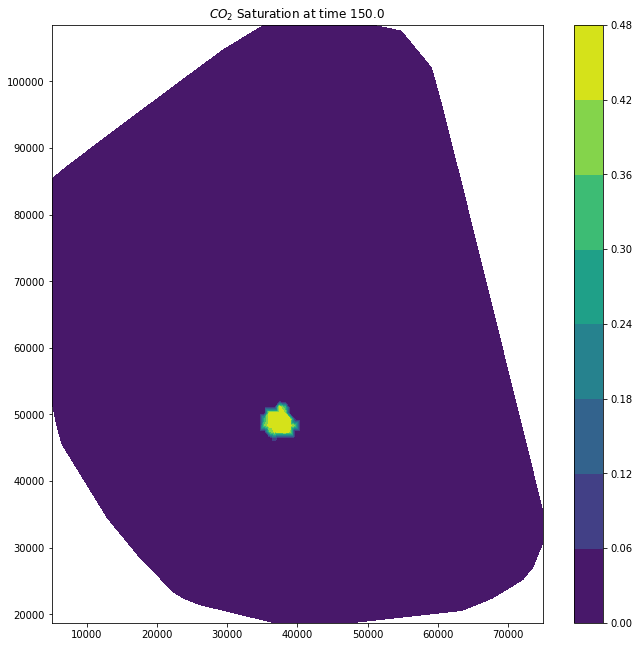

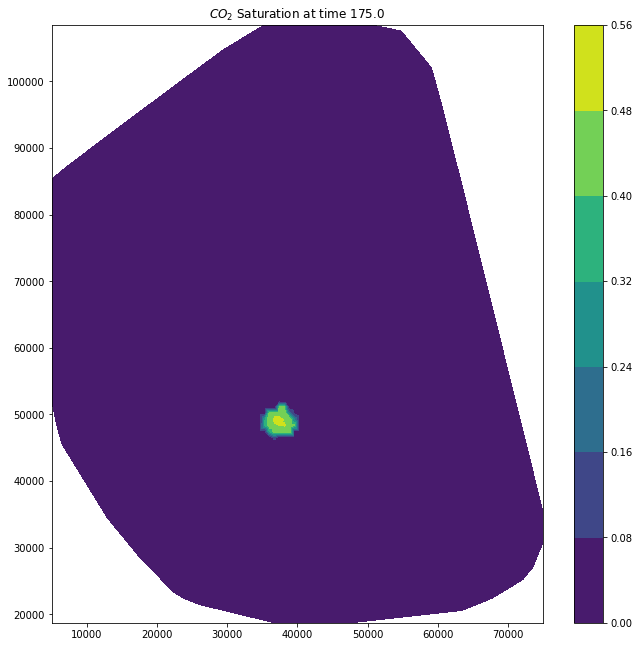

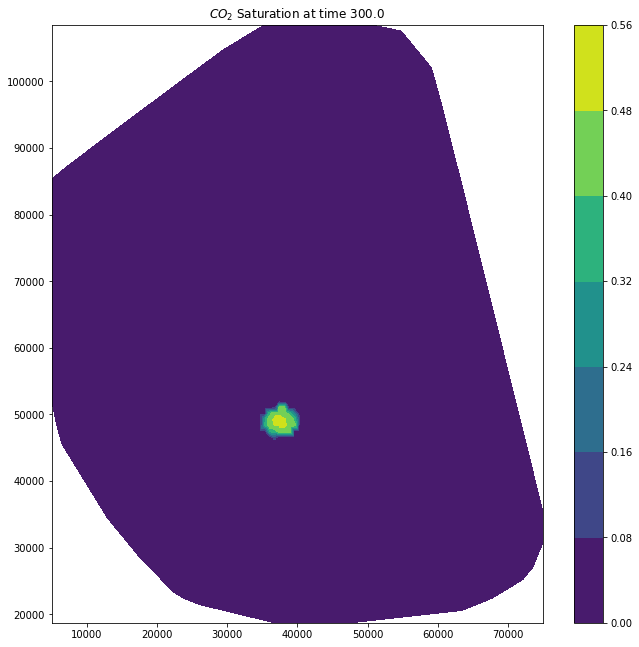

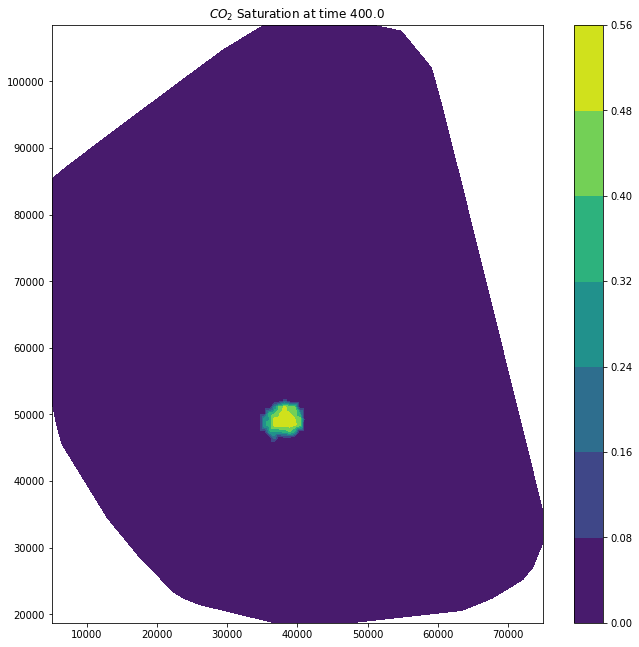

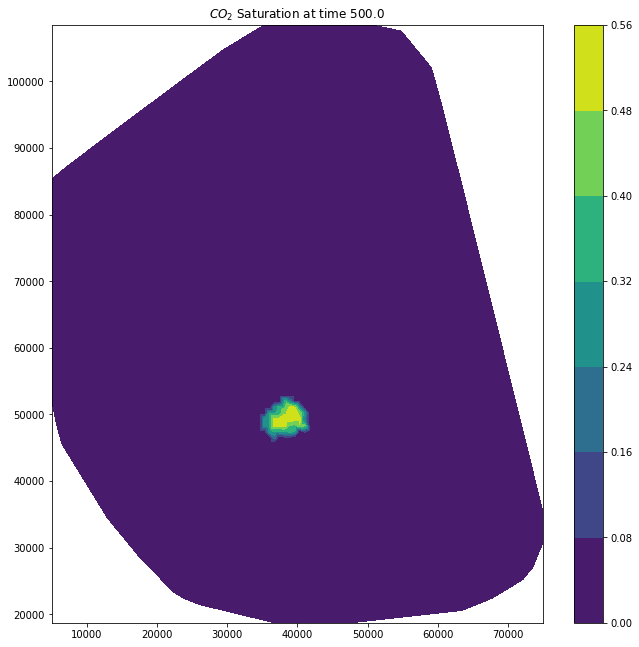

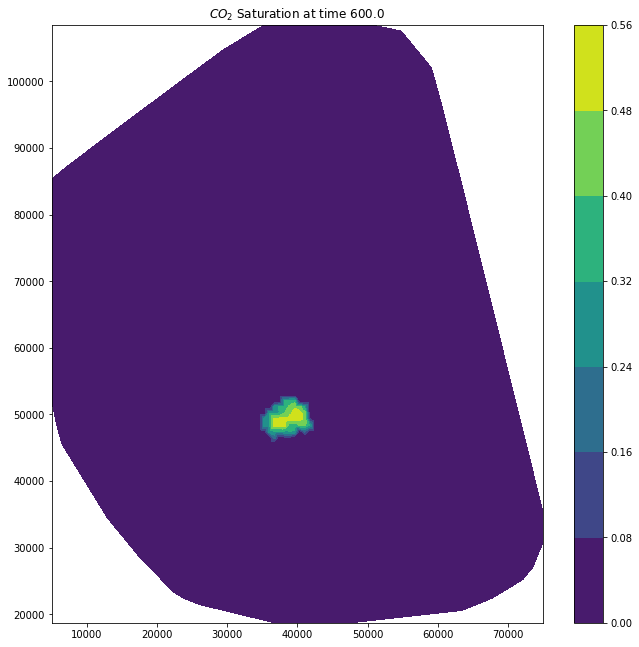

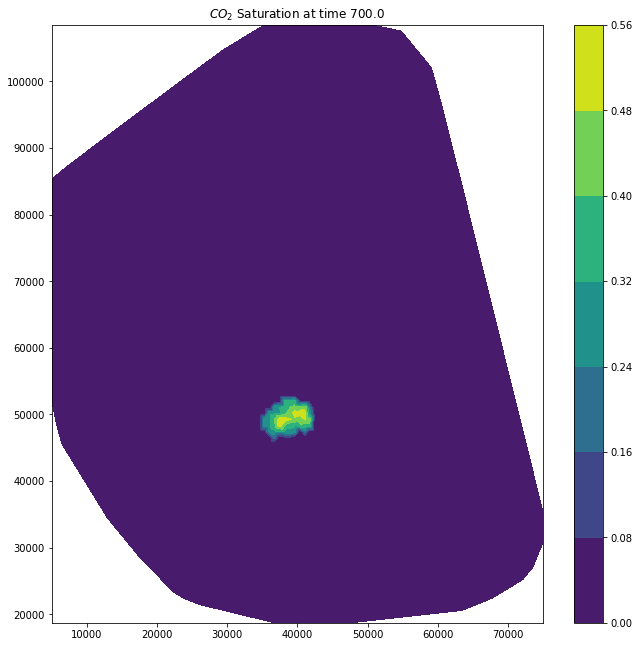

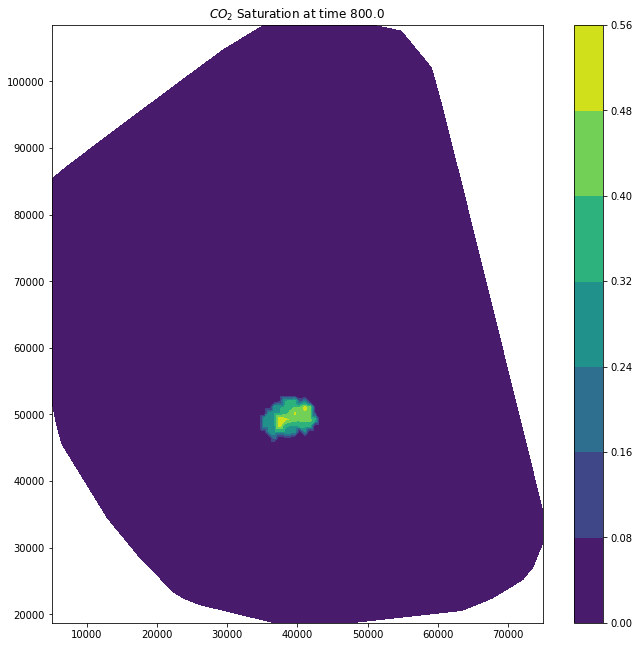

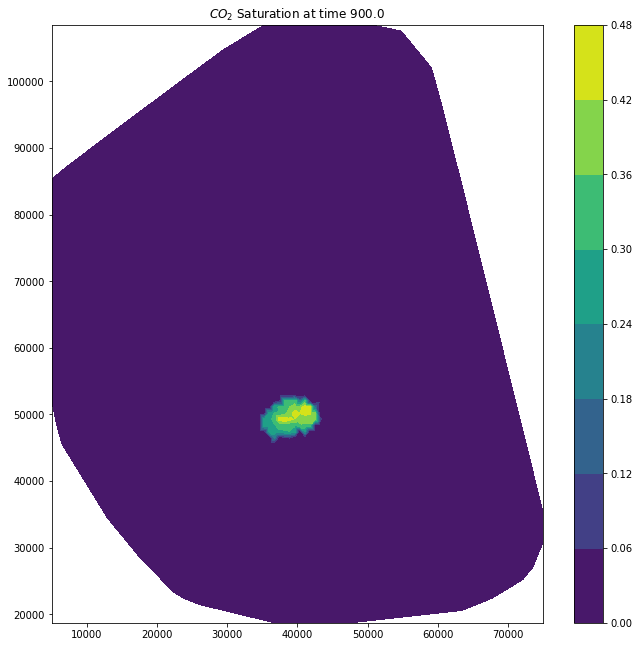

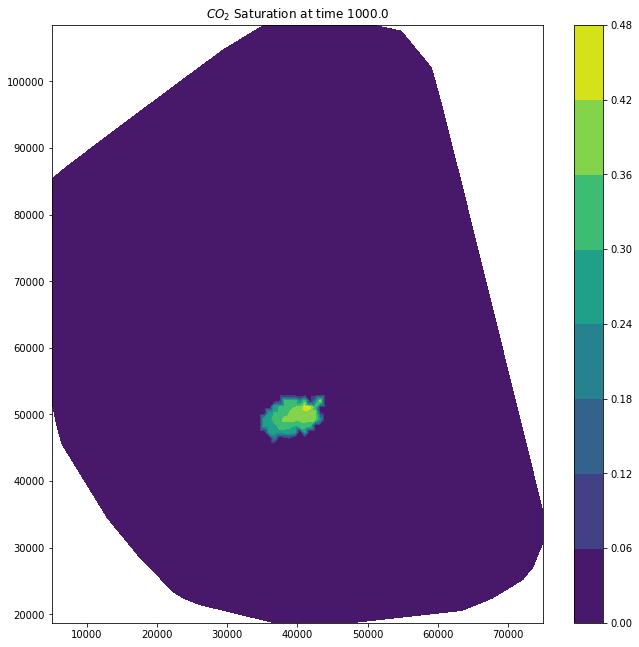

In [39]:
make_plots(54)

D:\Anaconda3_0818\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


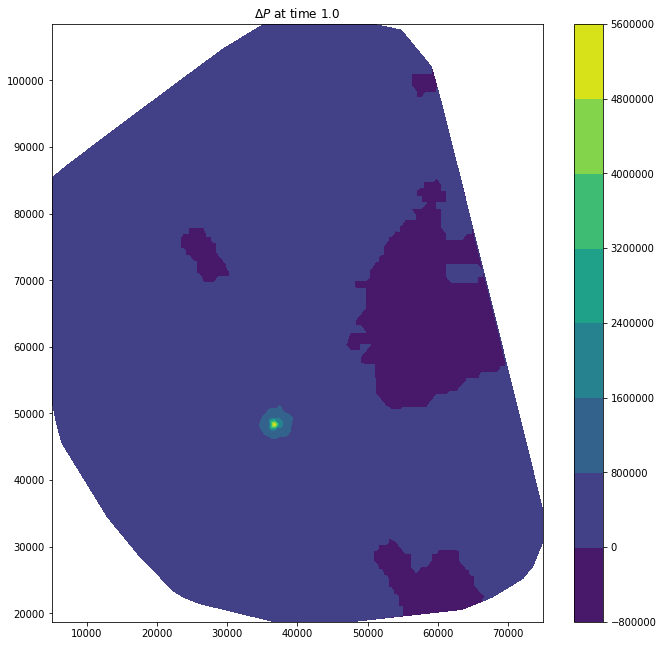

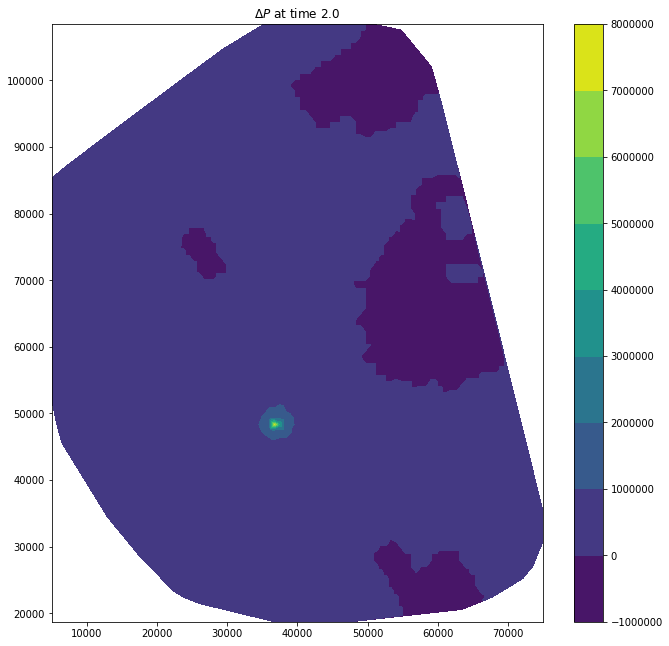

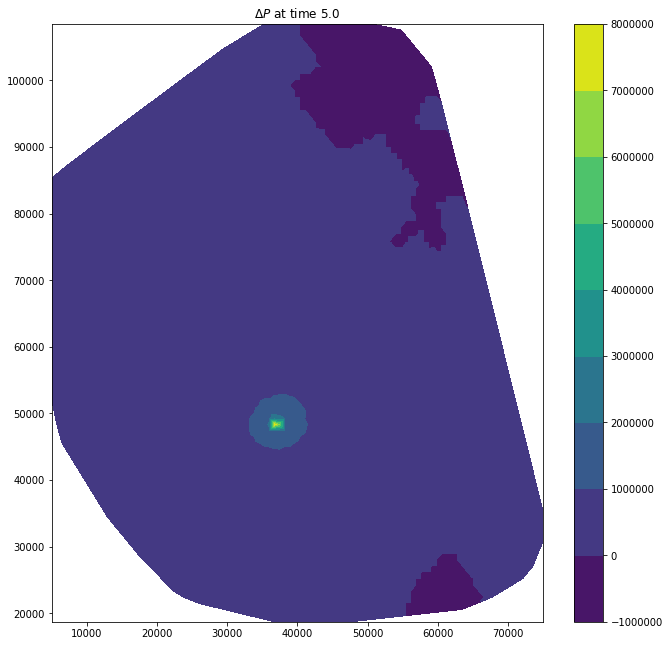

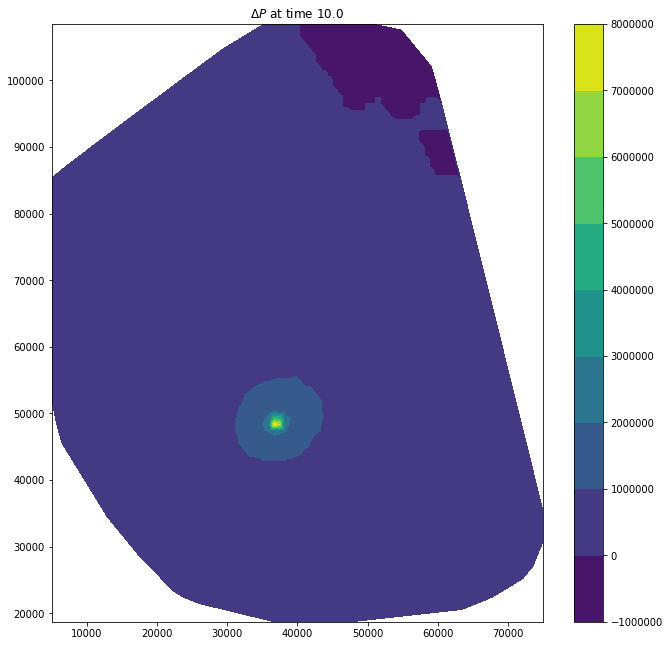

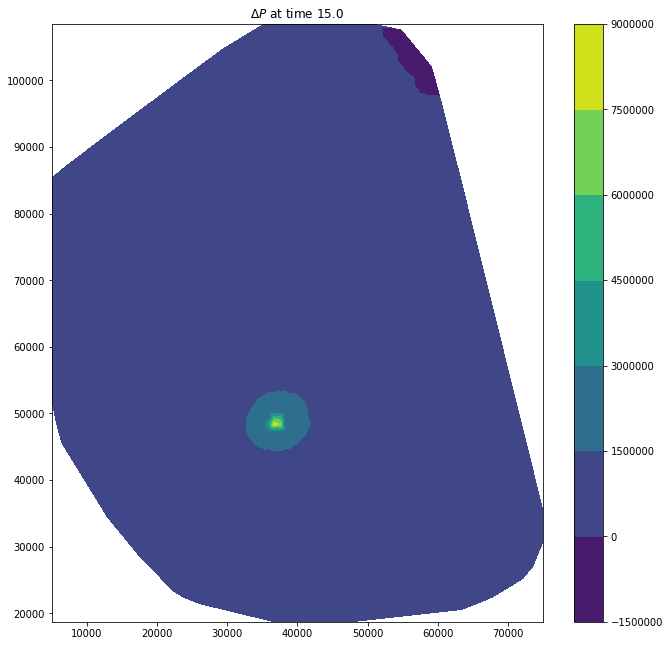

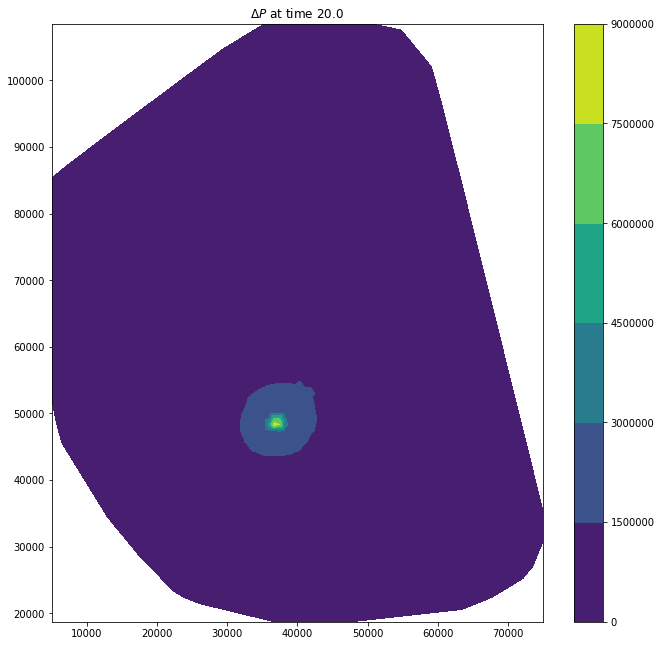

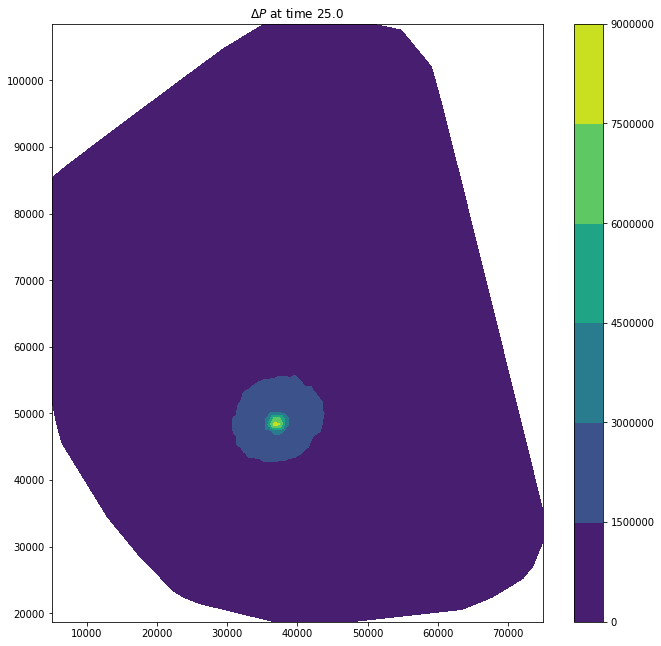

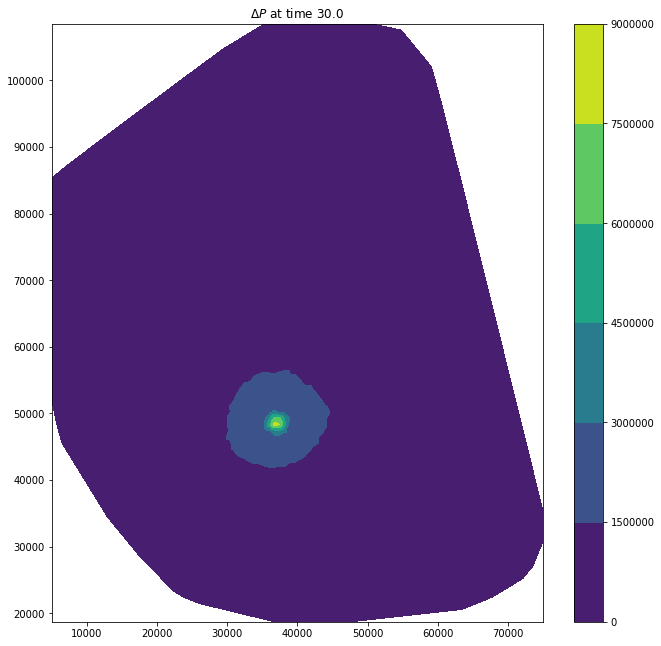

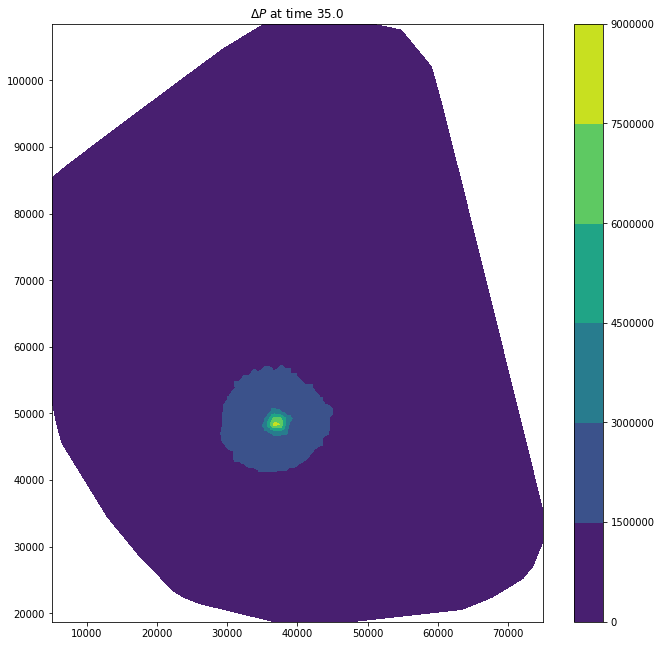

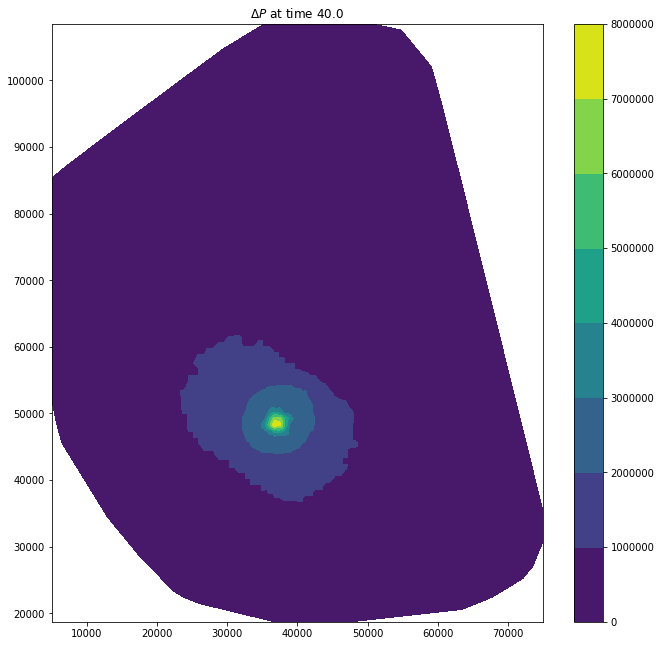

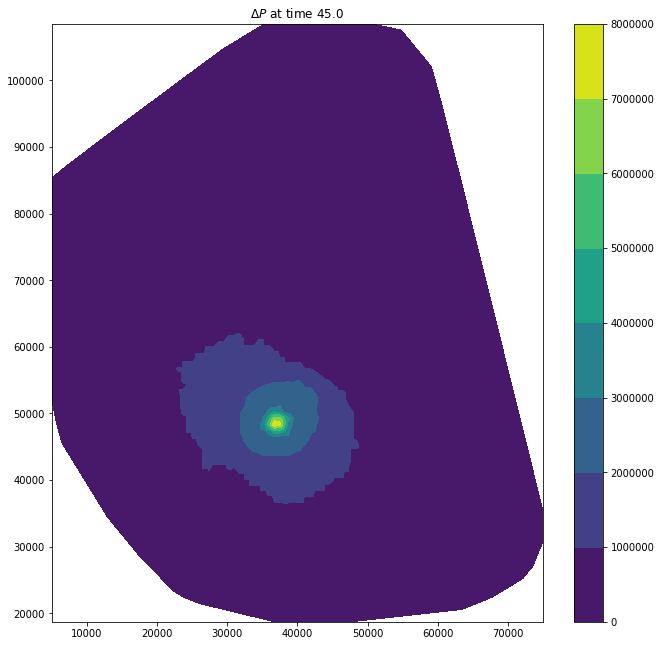

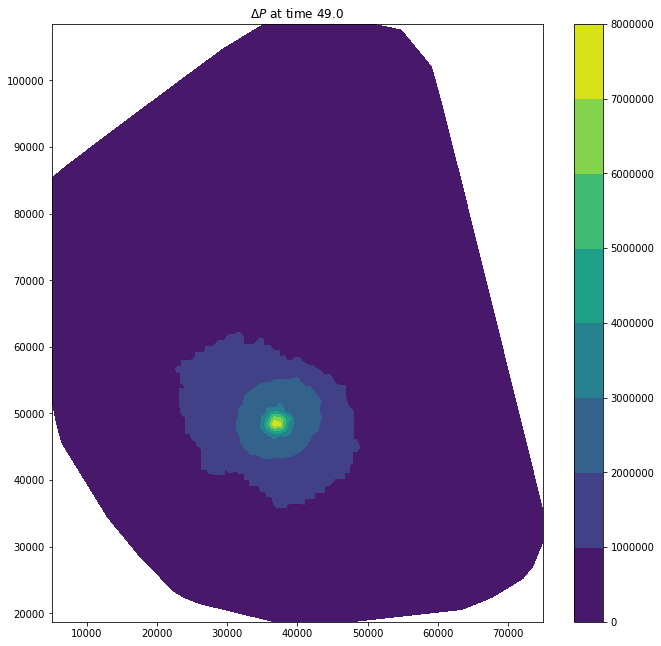

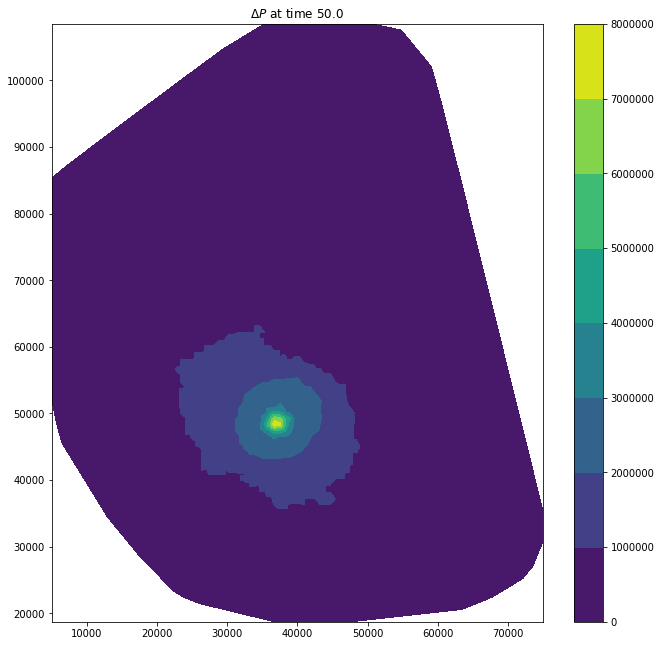

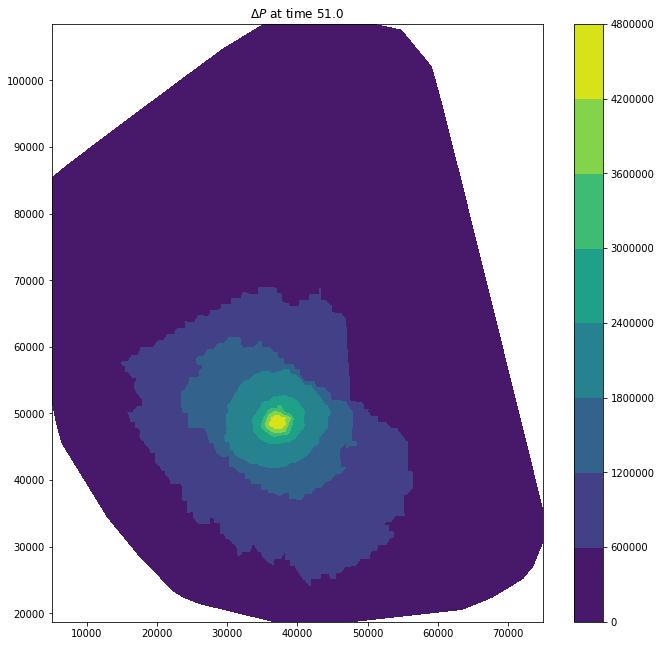

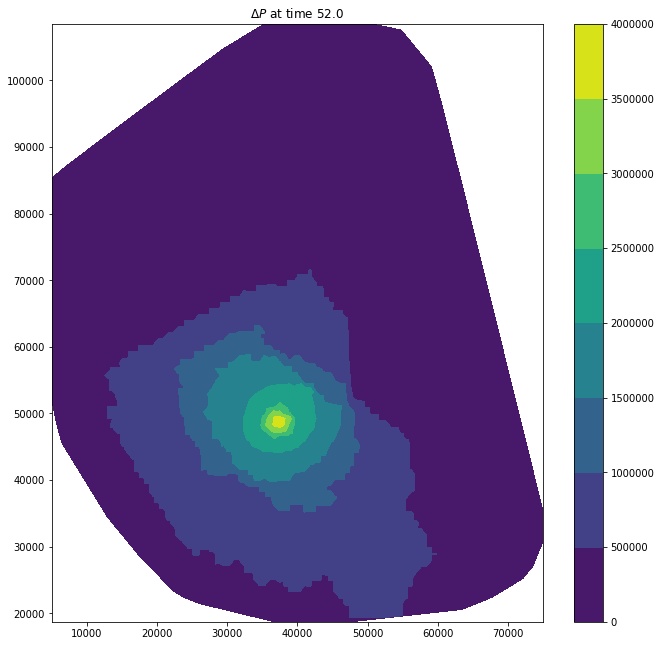

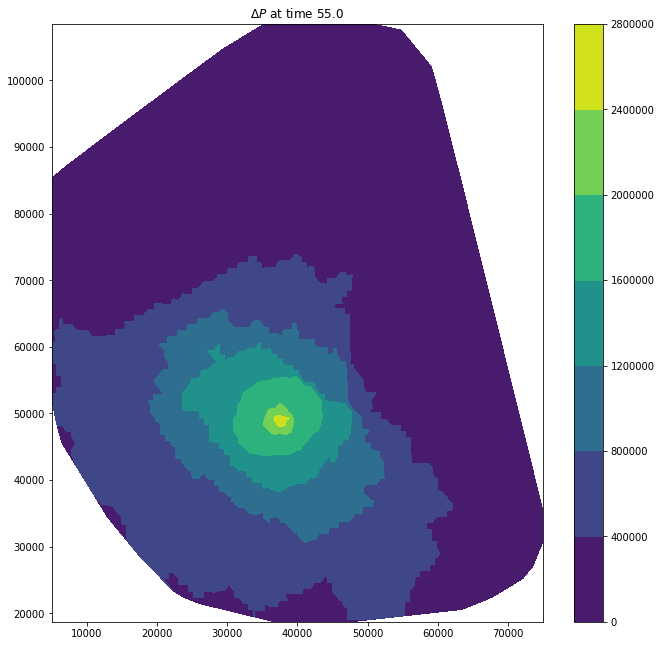

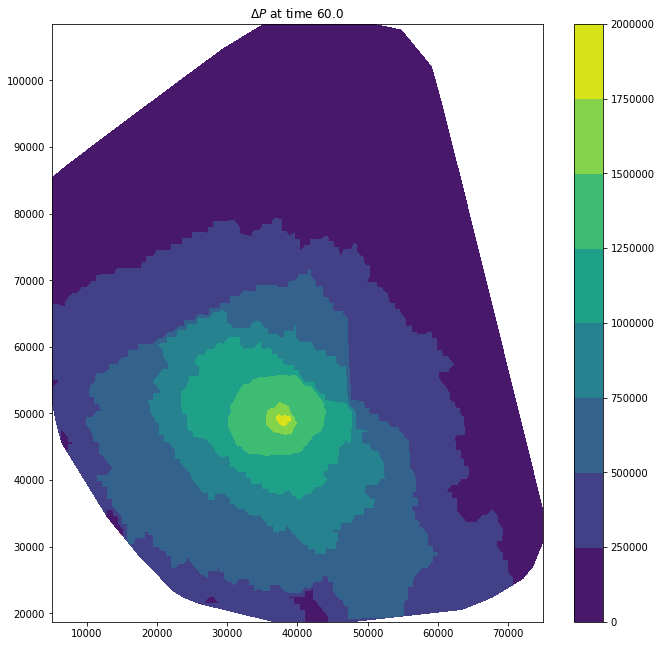

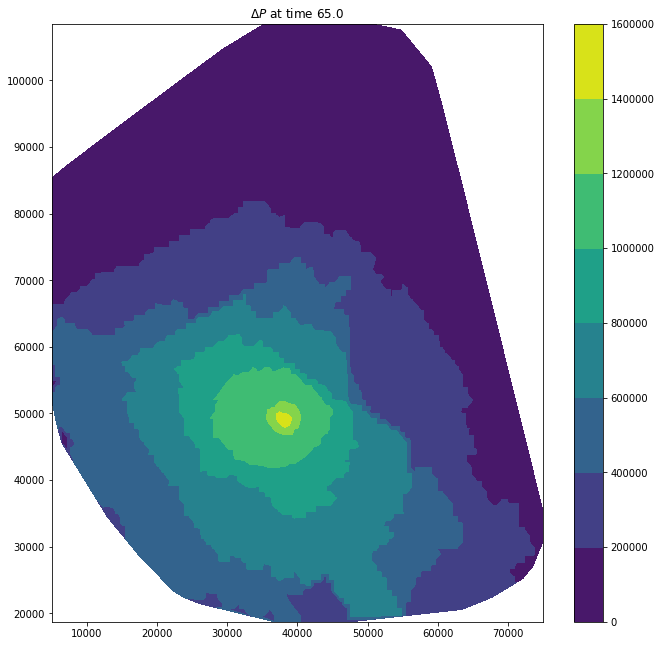

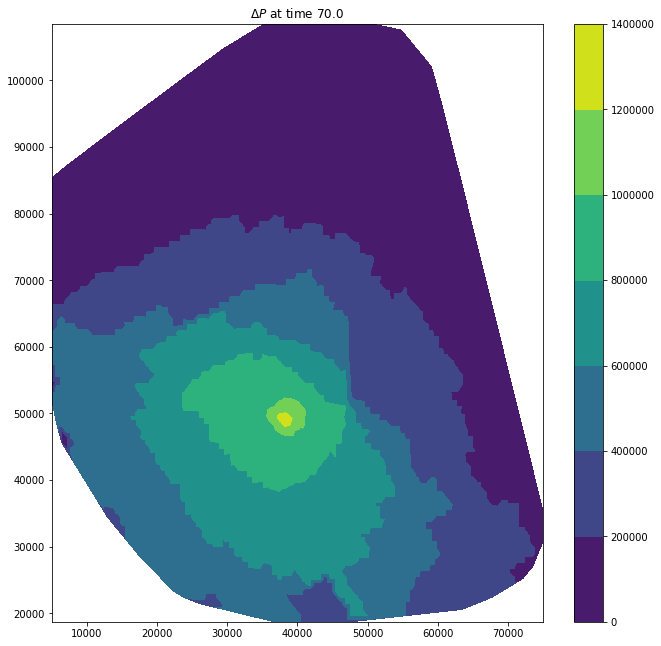

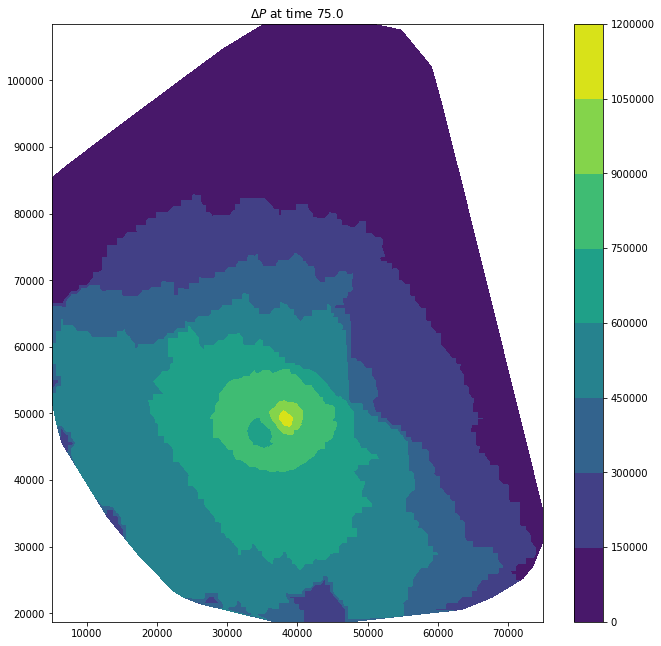

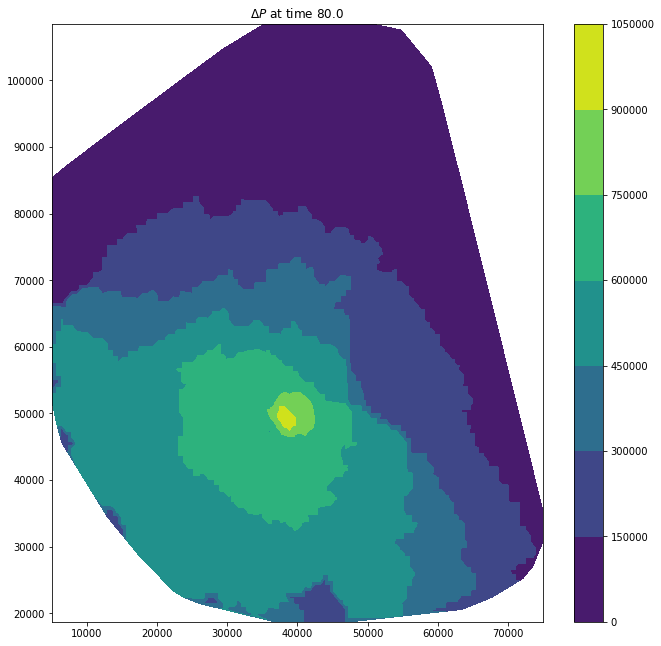

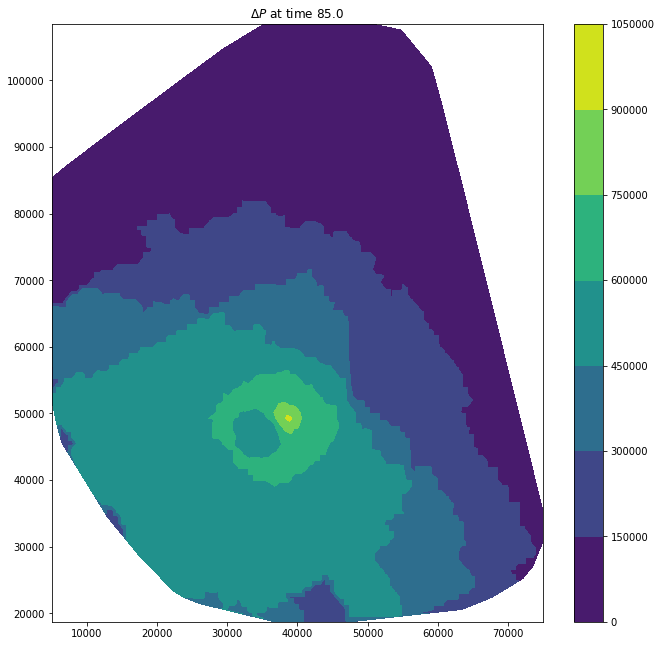

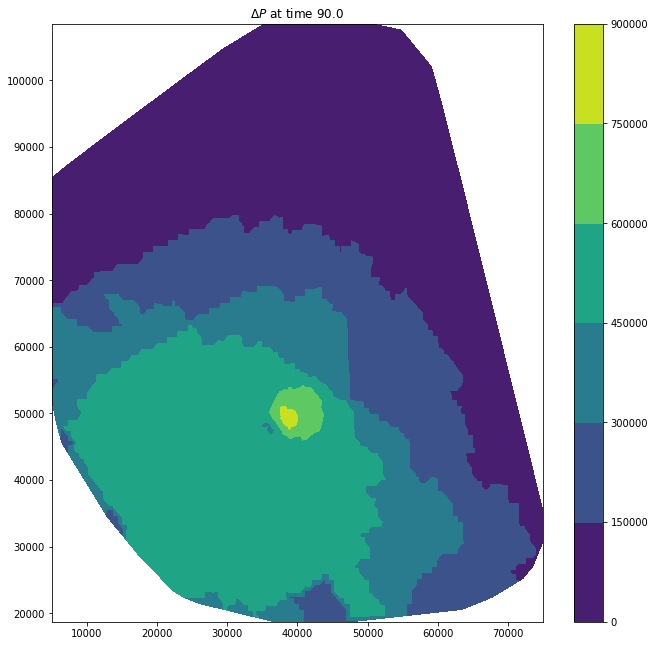

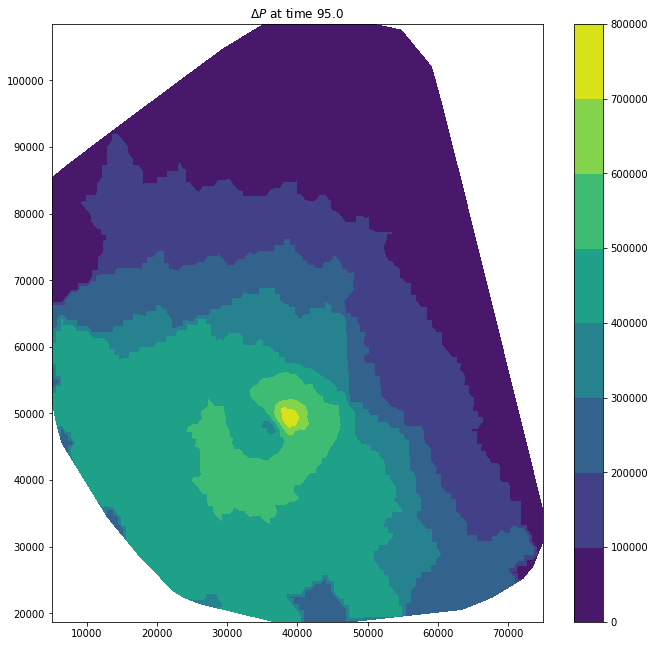

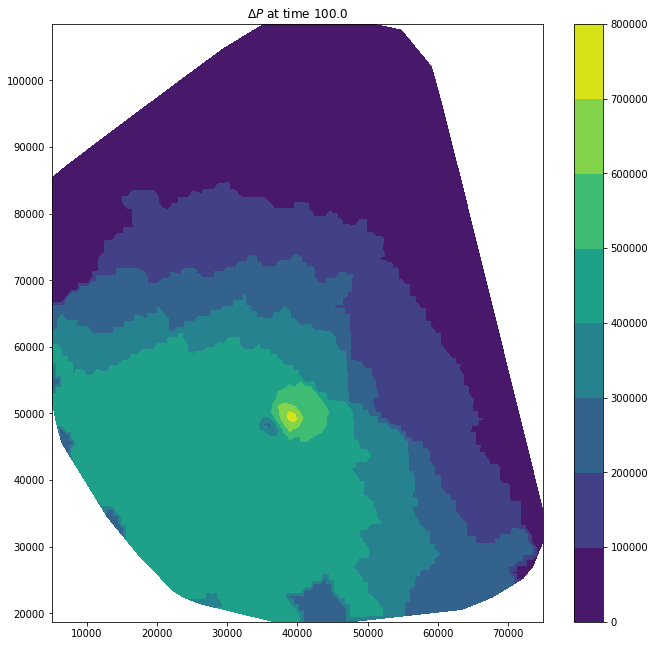

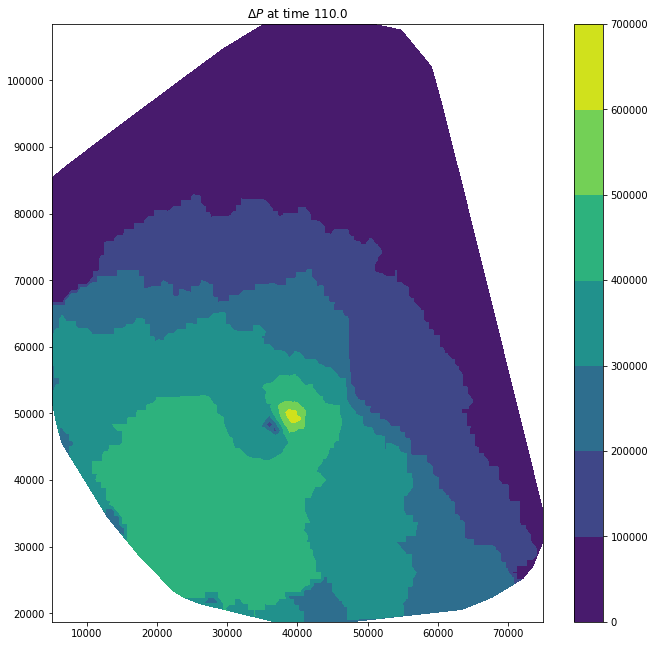

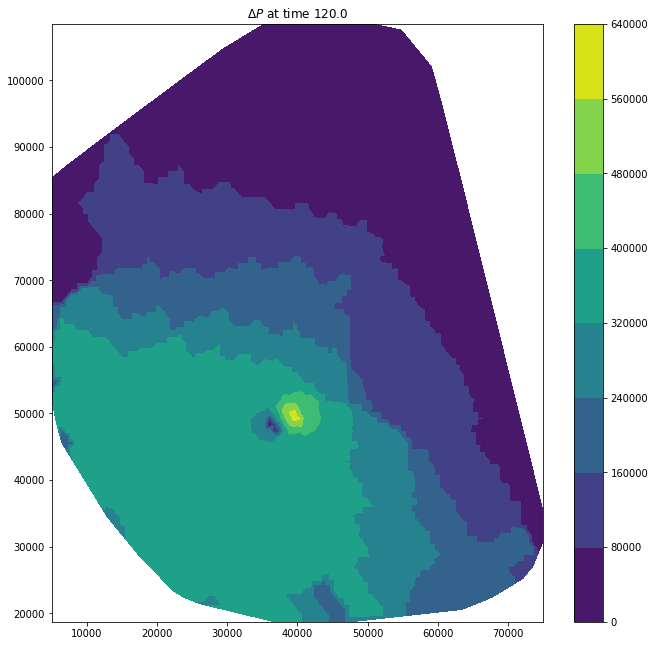

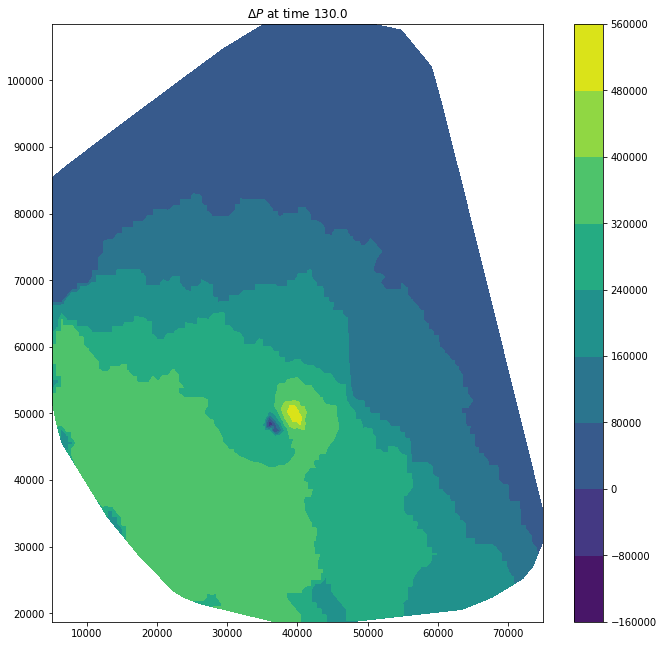

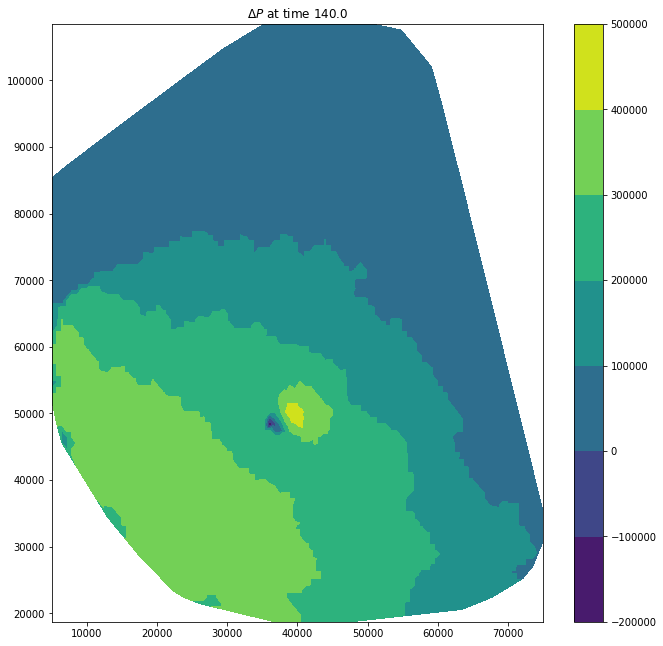

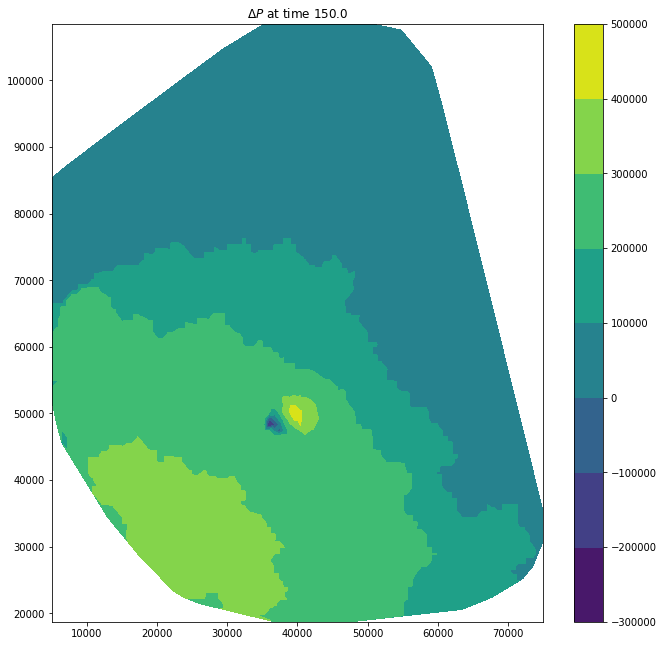

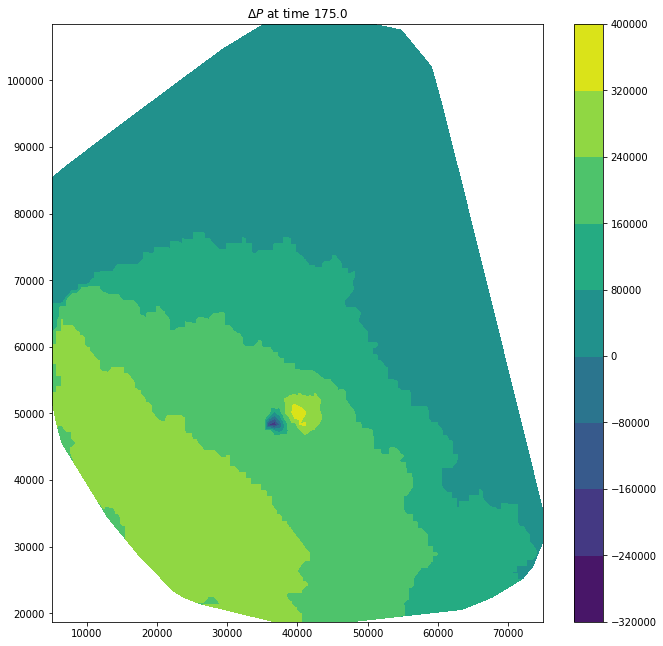

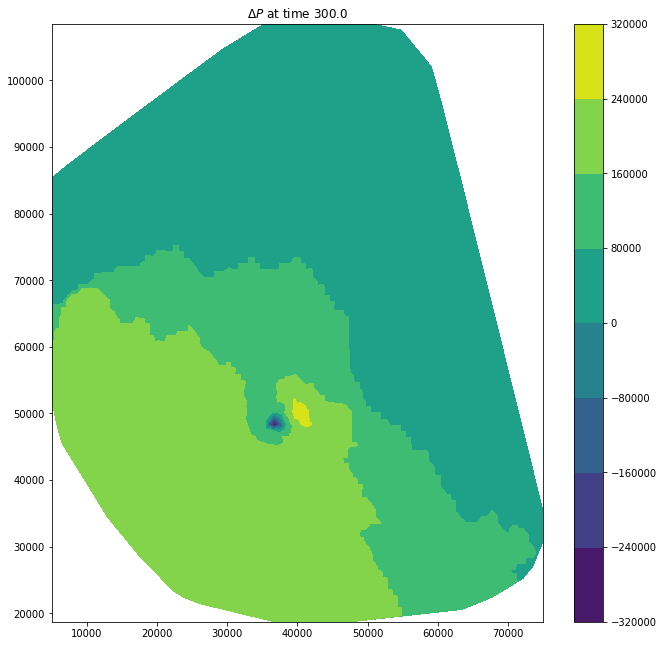

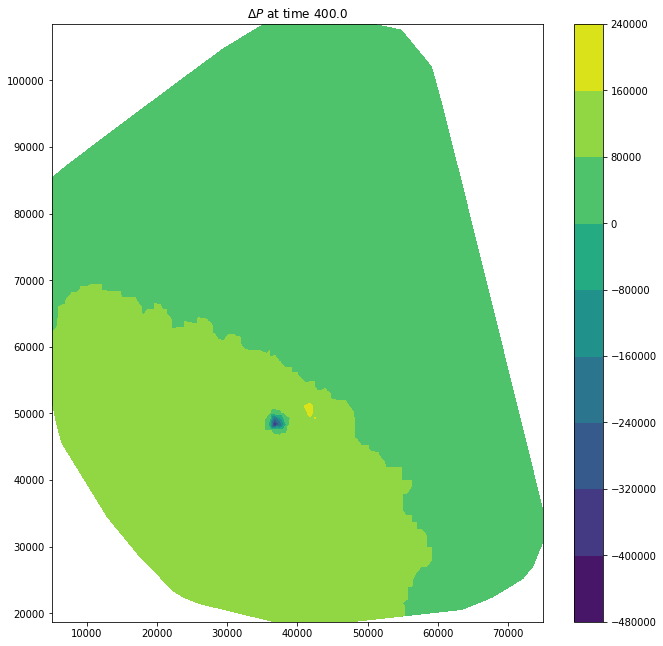

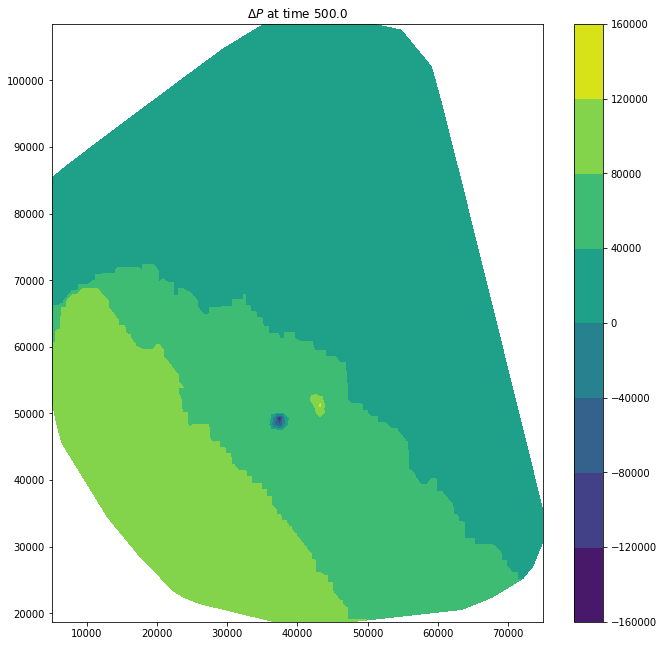

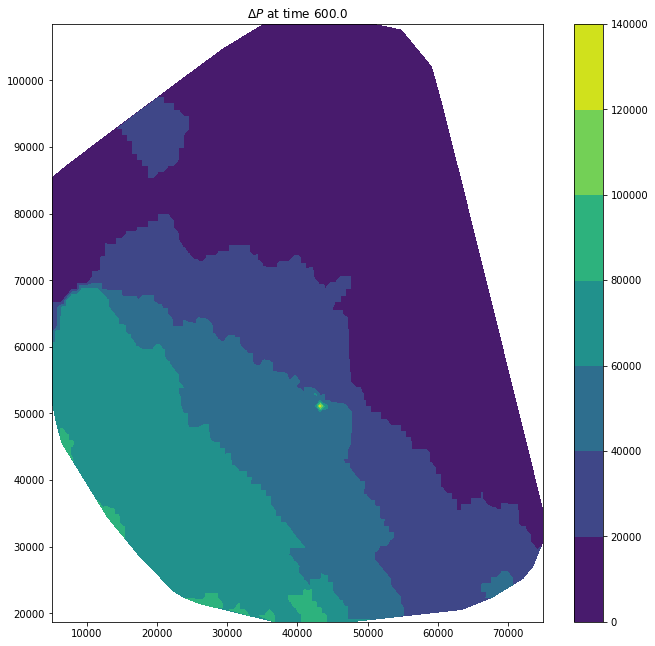

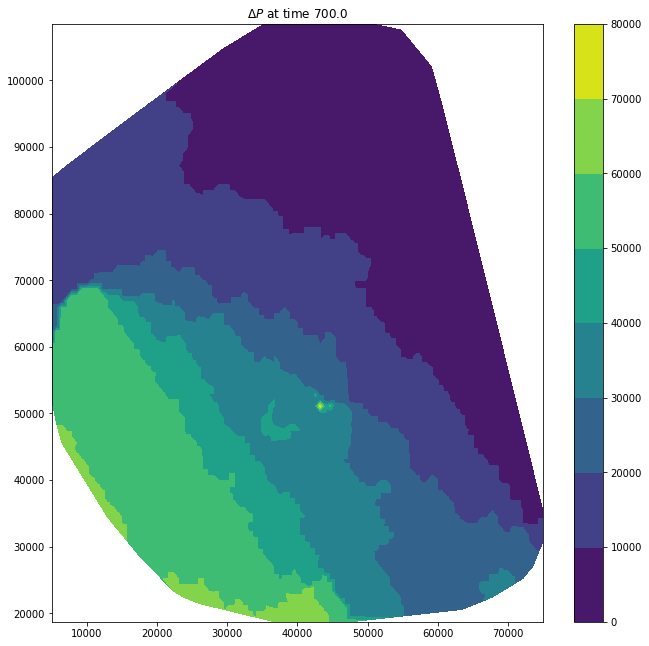

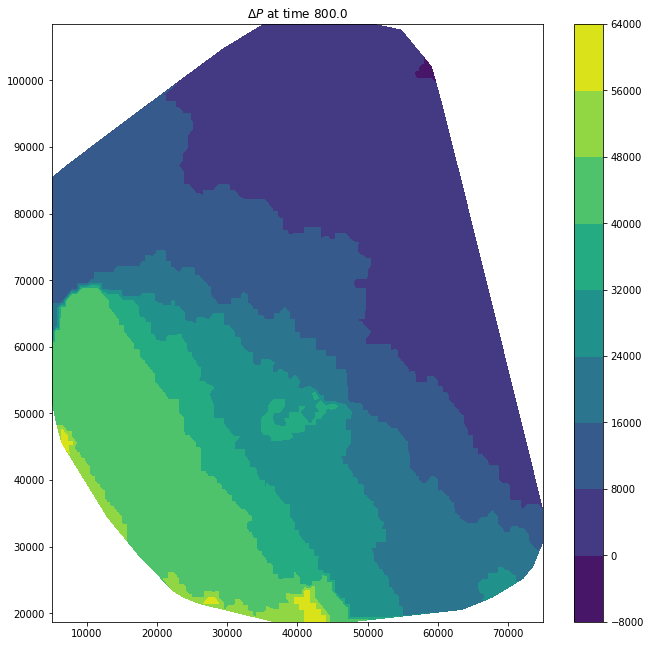

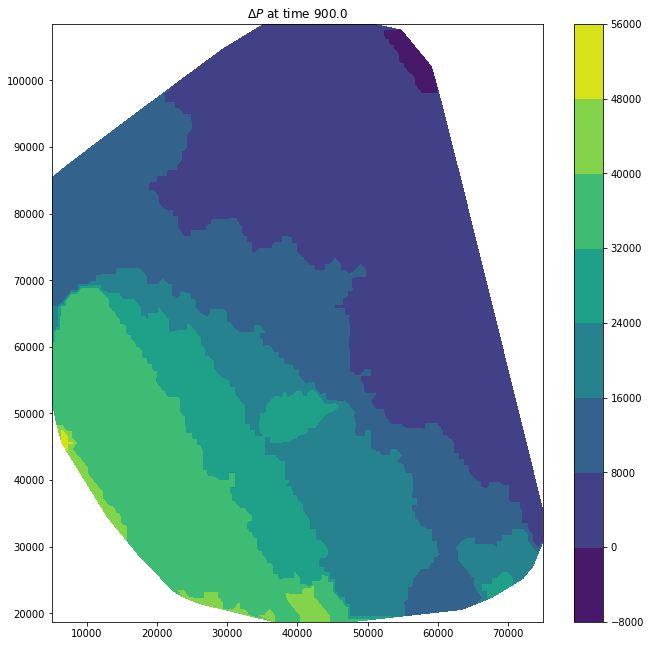

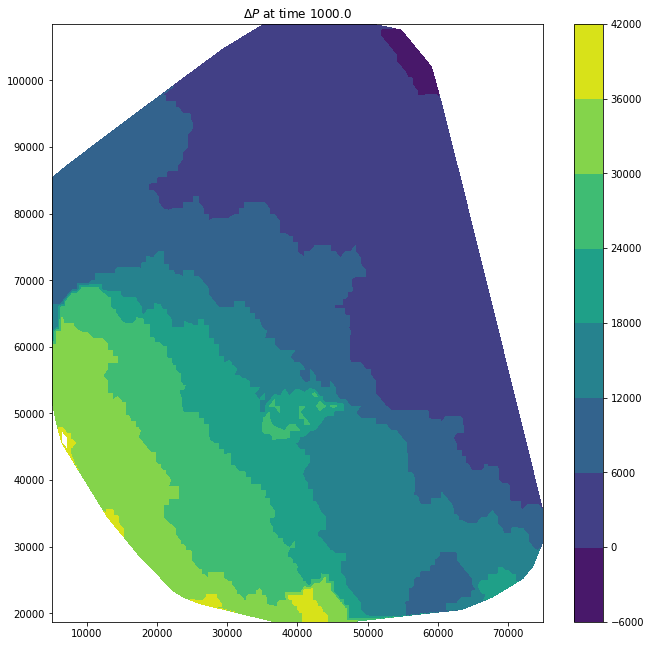

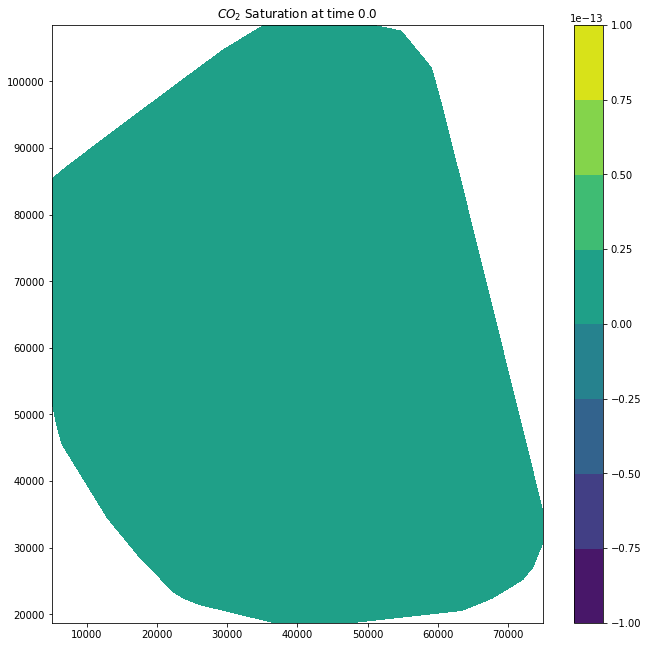

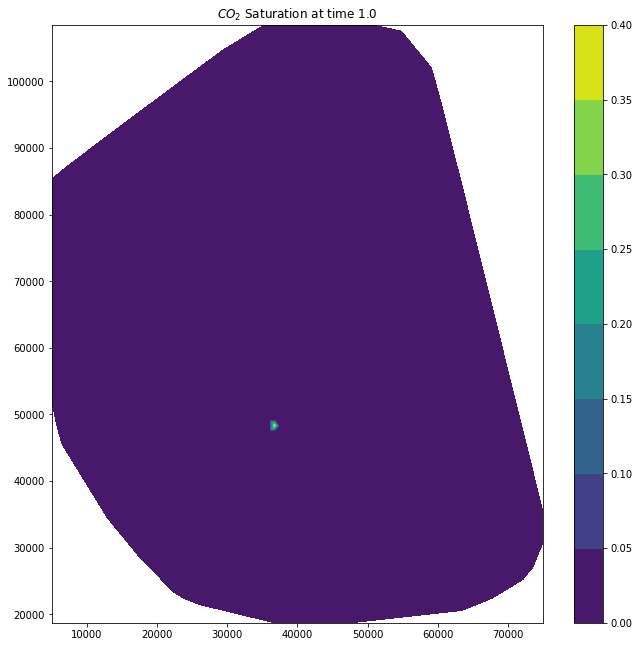

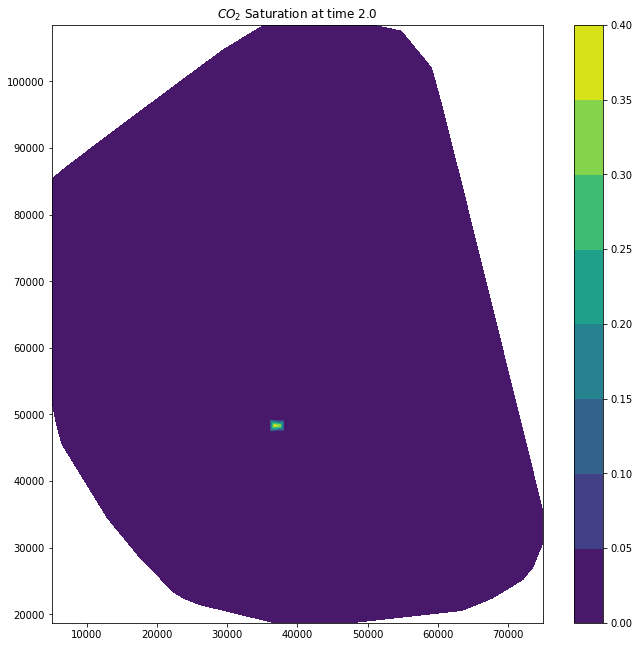

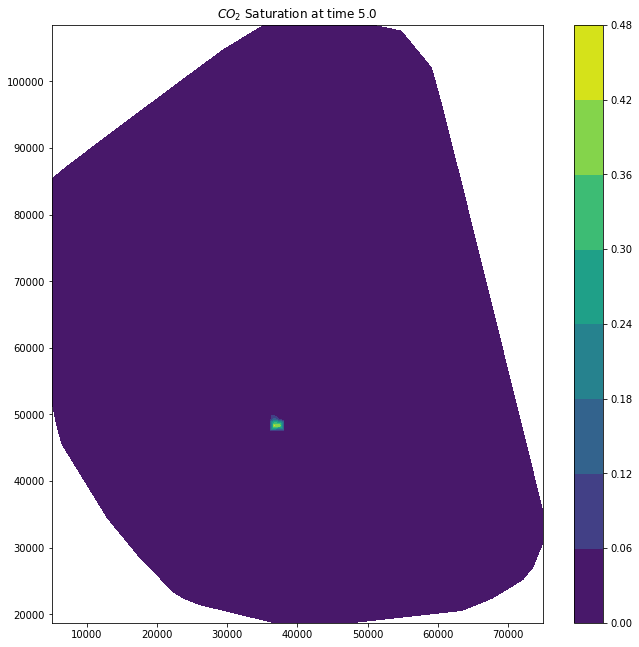

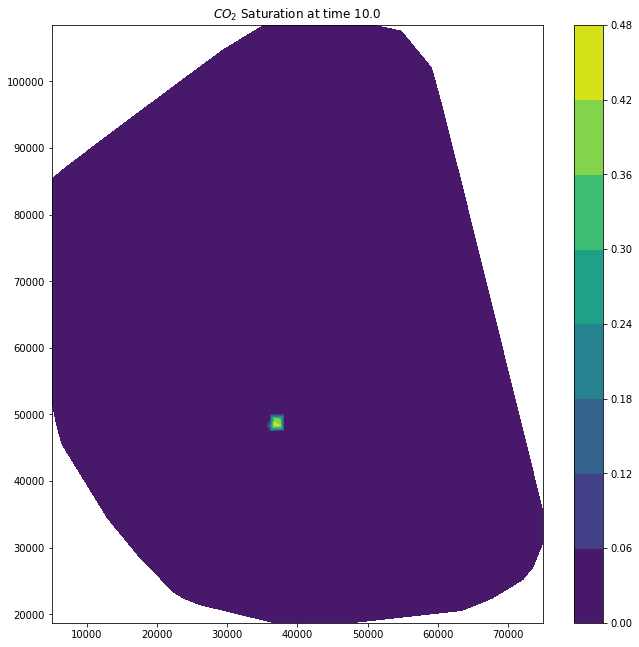

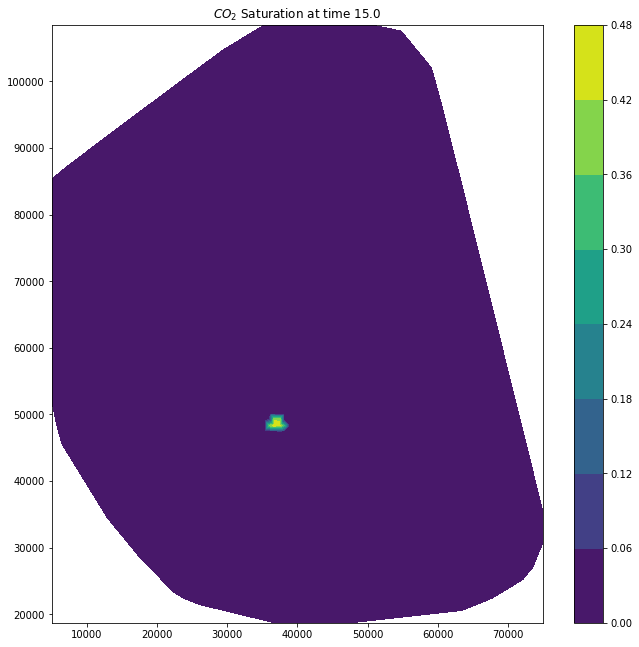

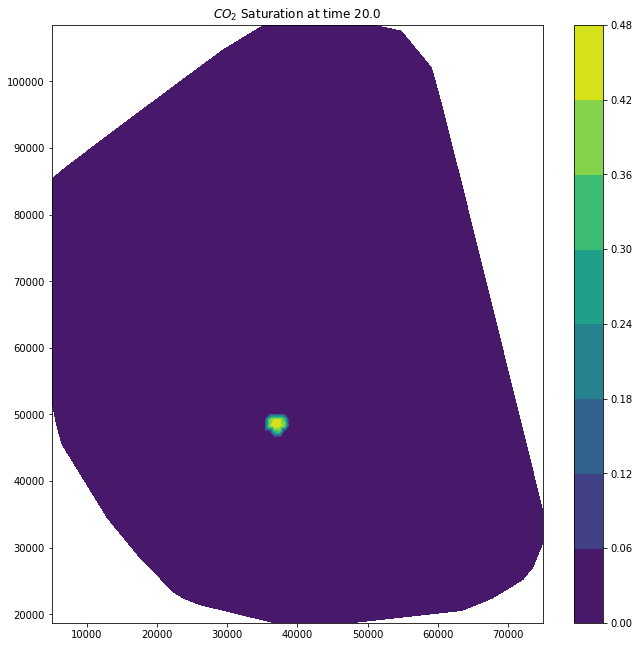

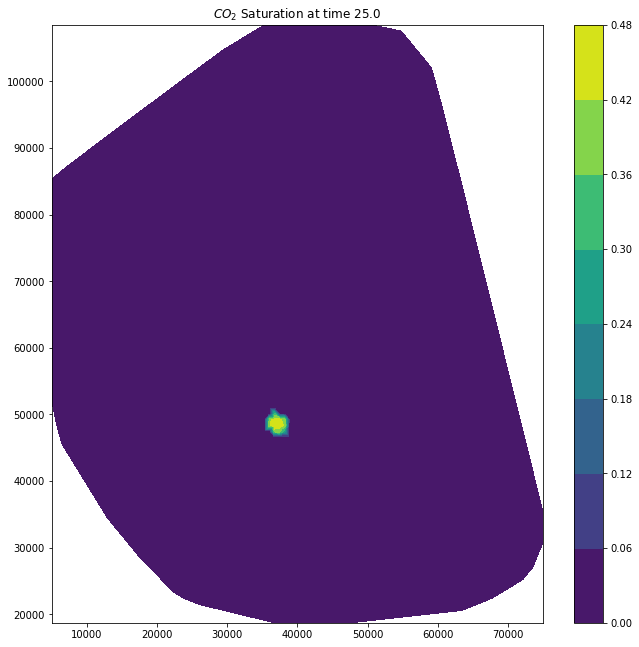

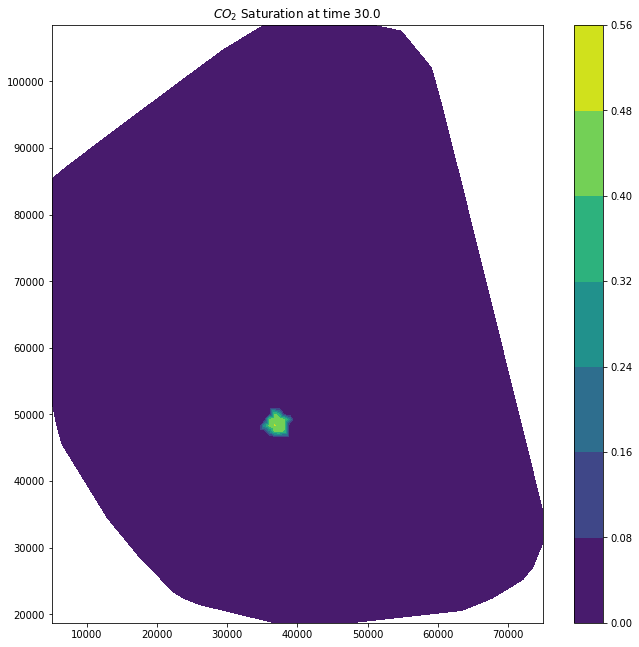

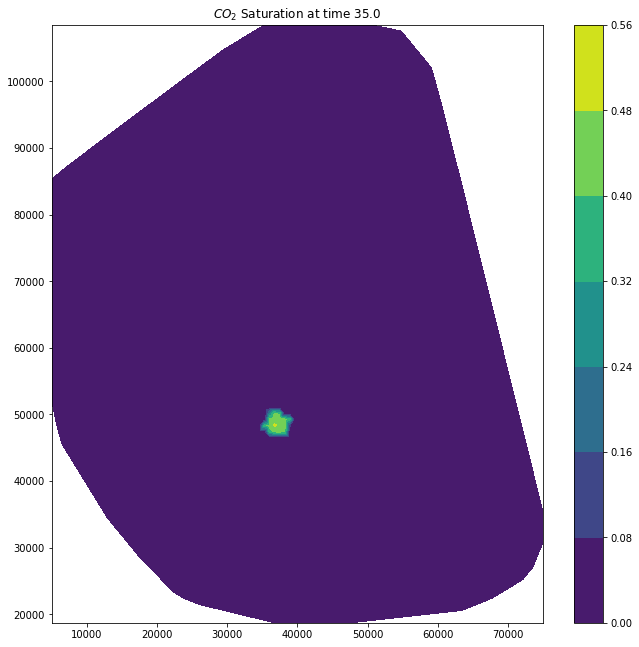

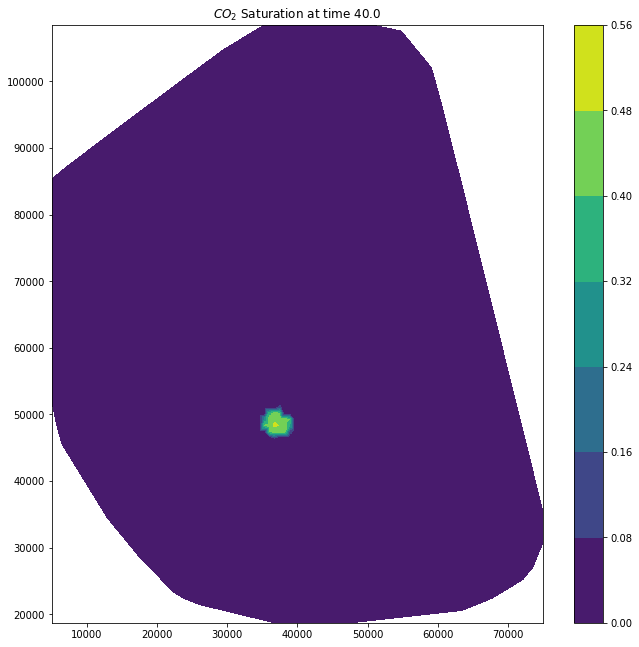

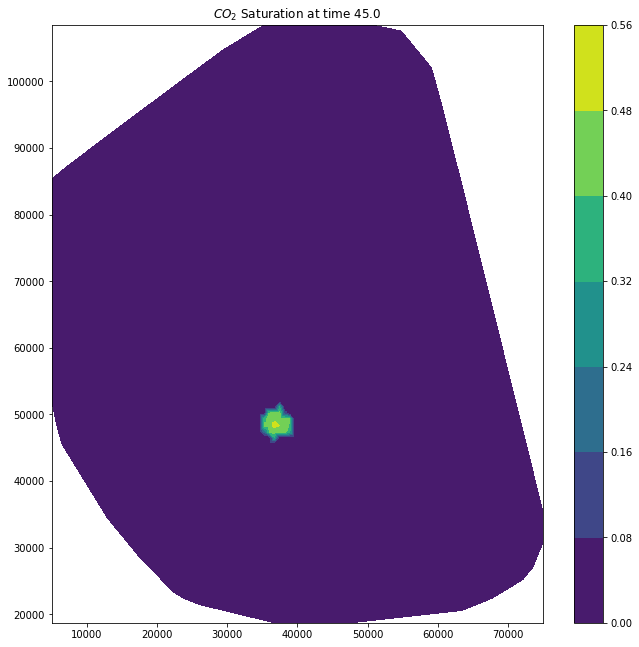

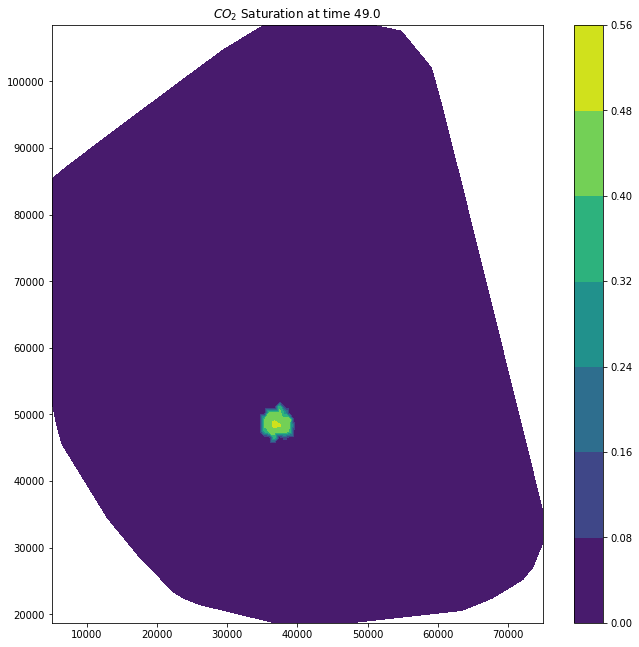

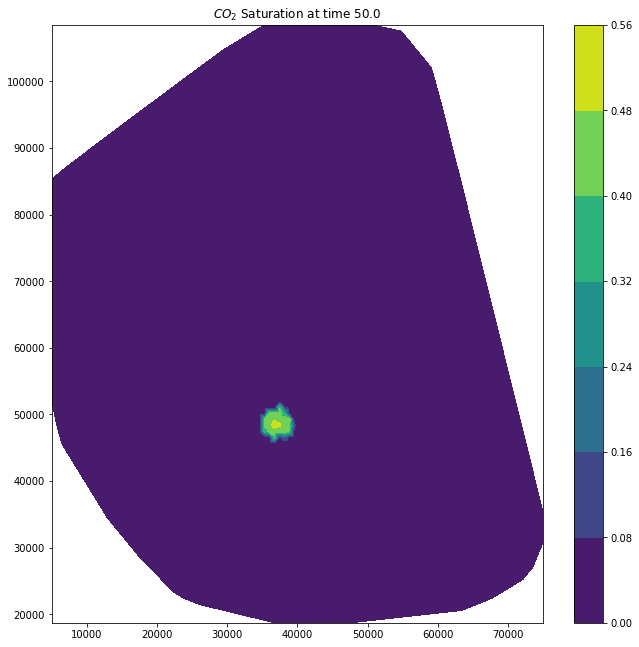

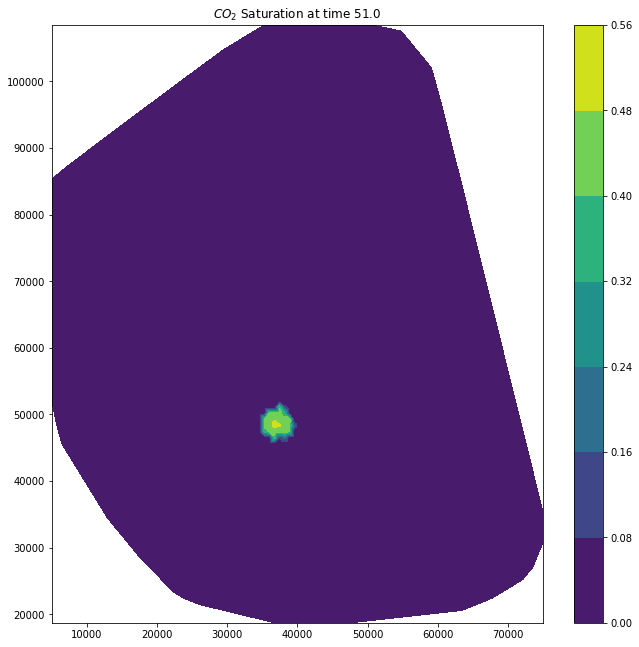

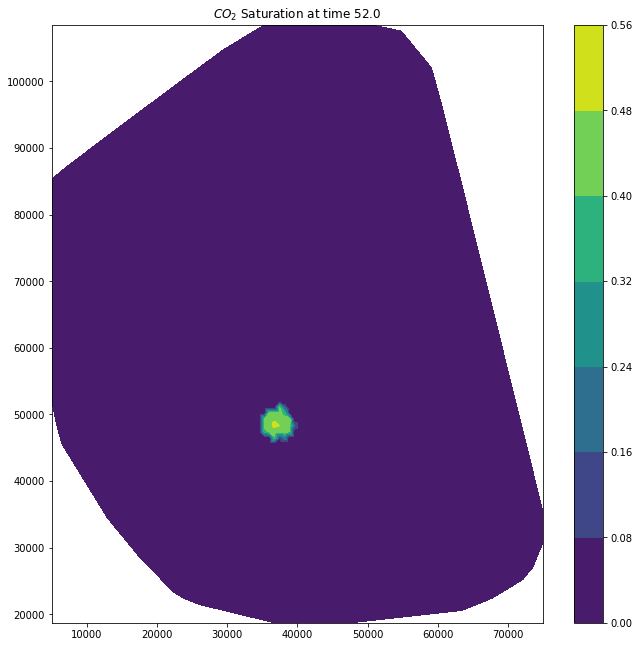

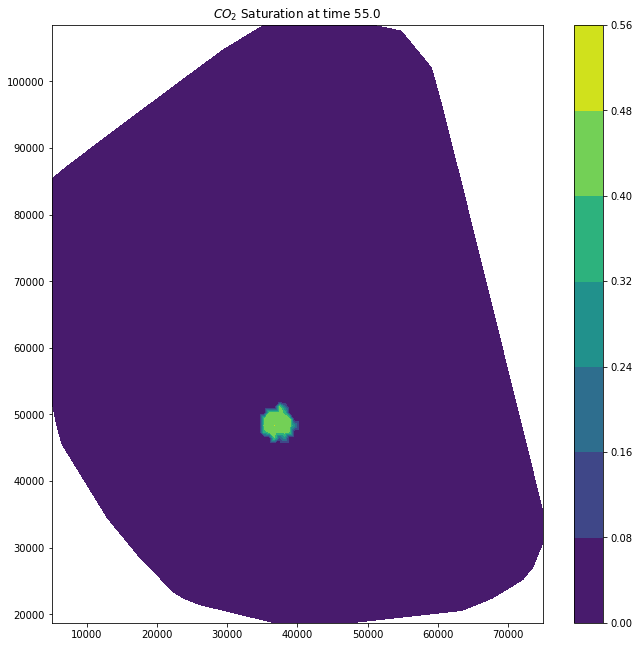

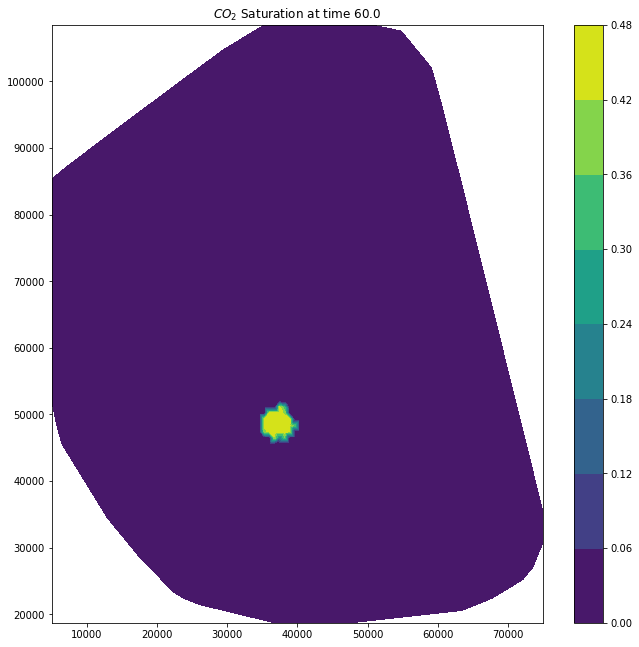

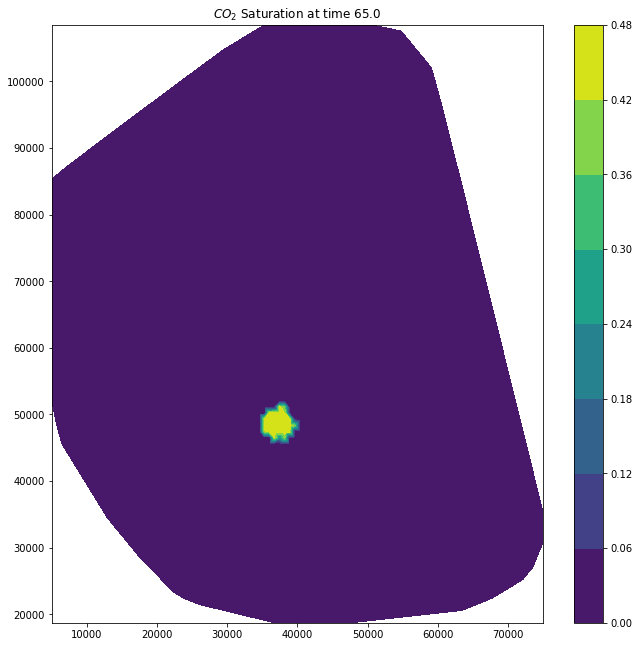

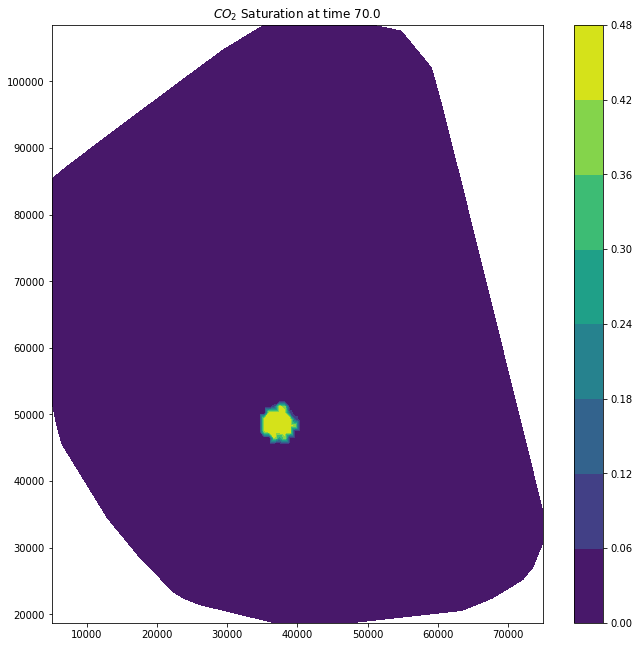

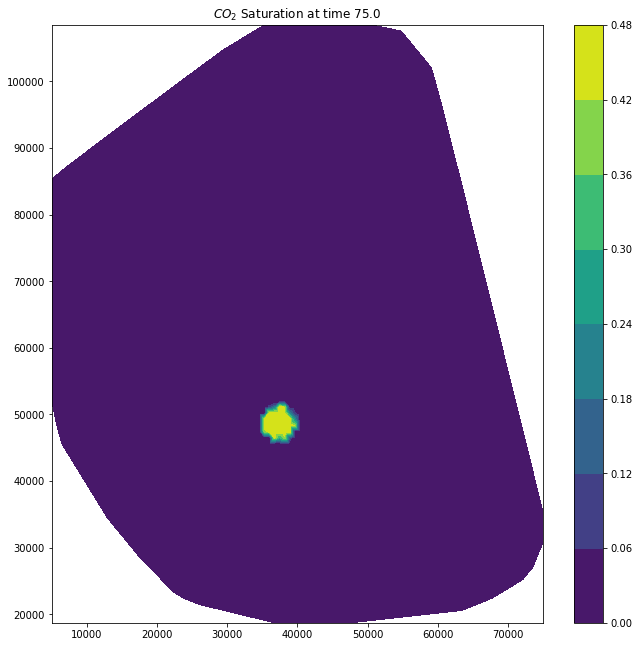

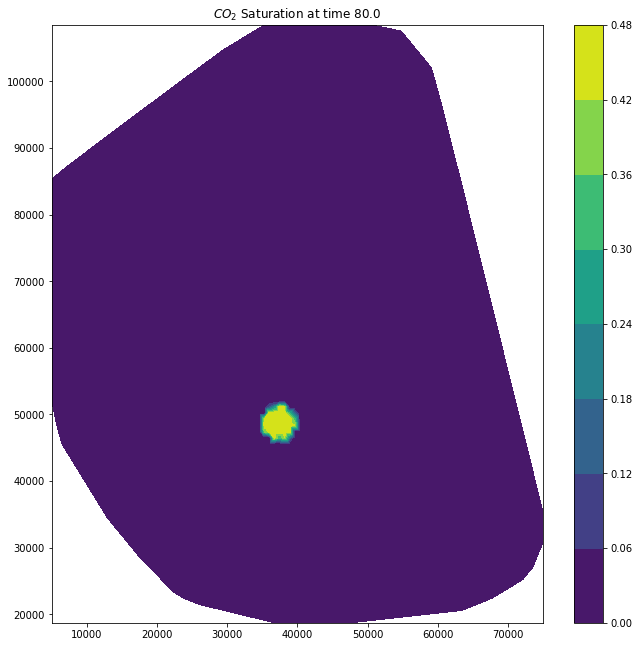

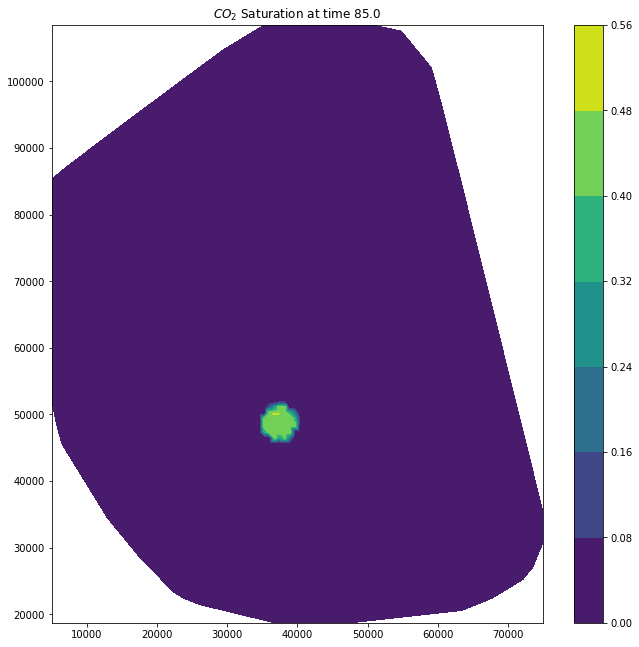

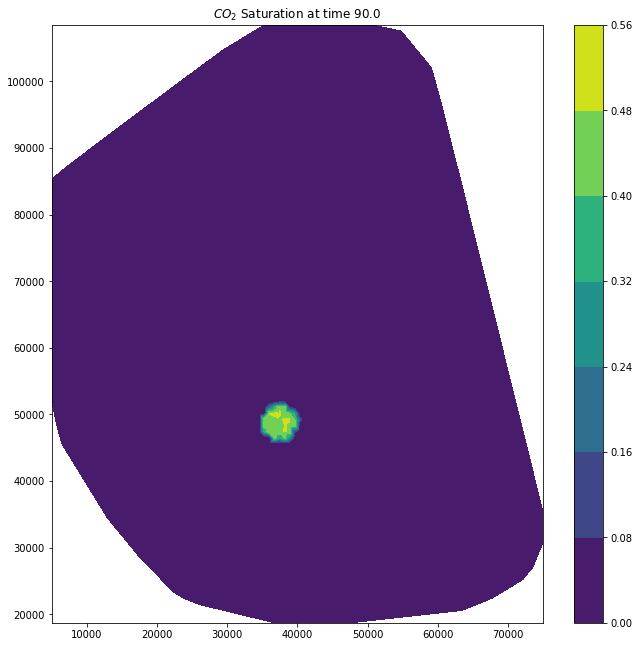

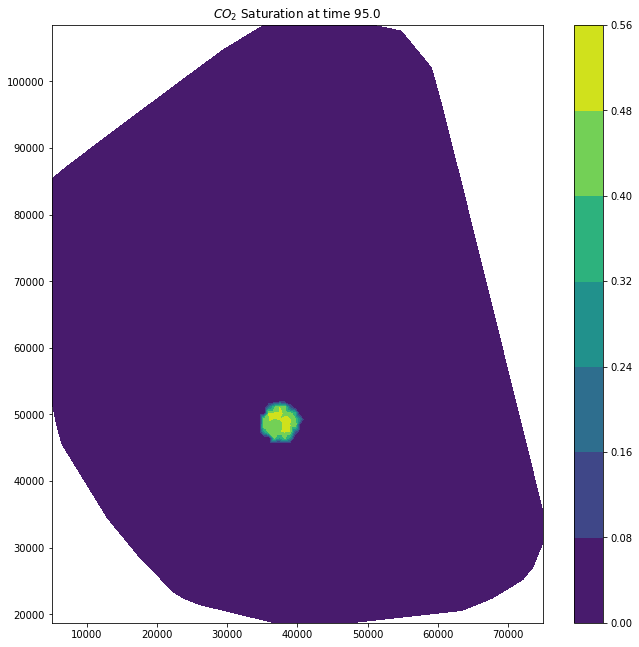

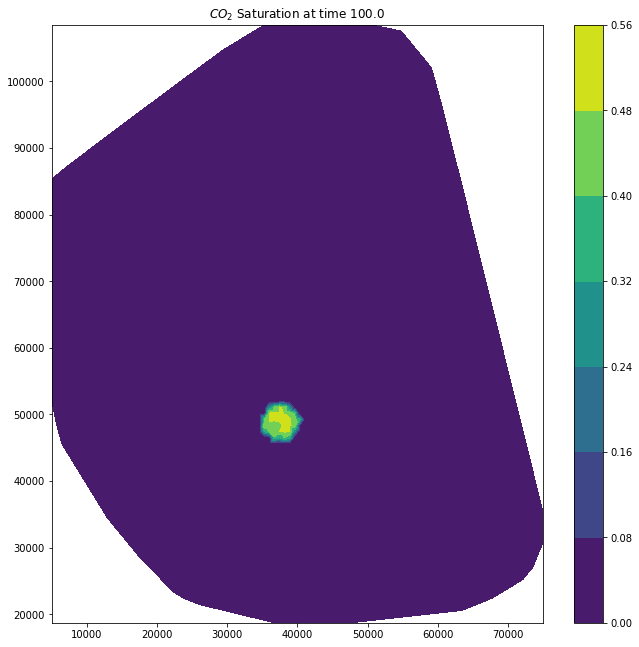

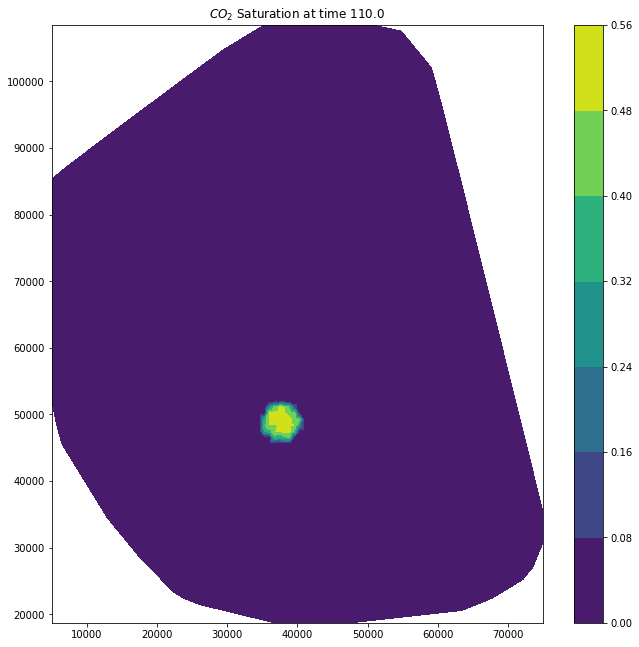

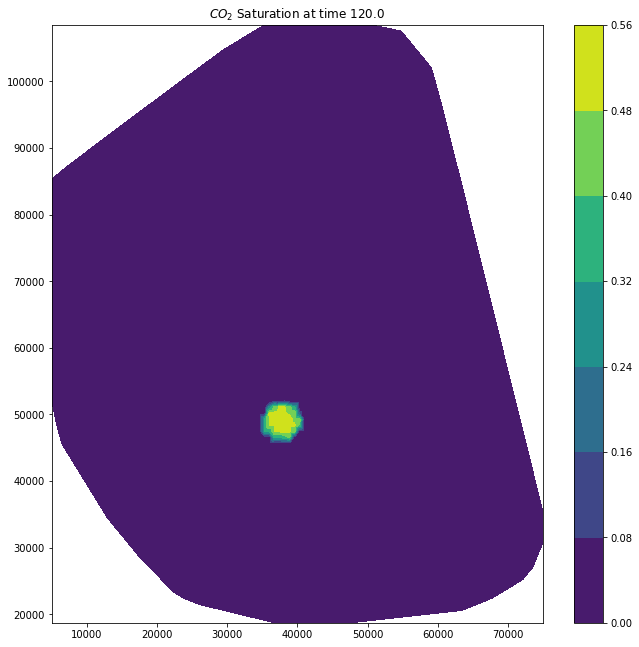

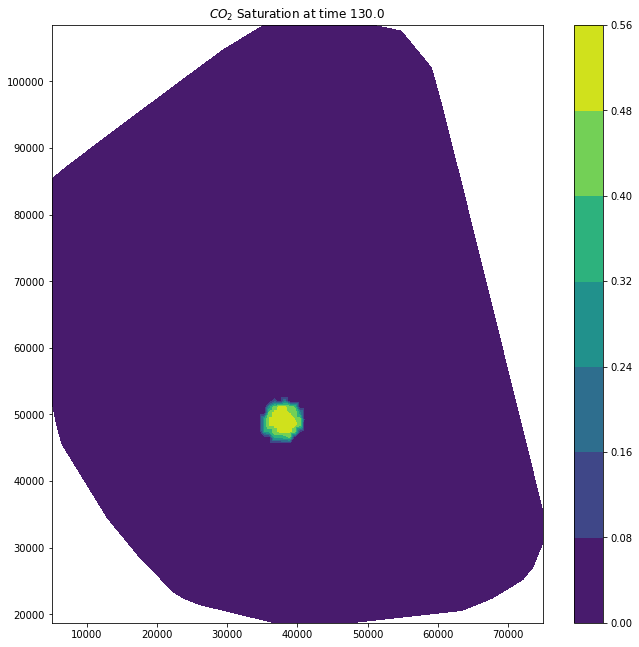

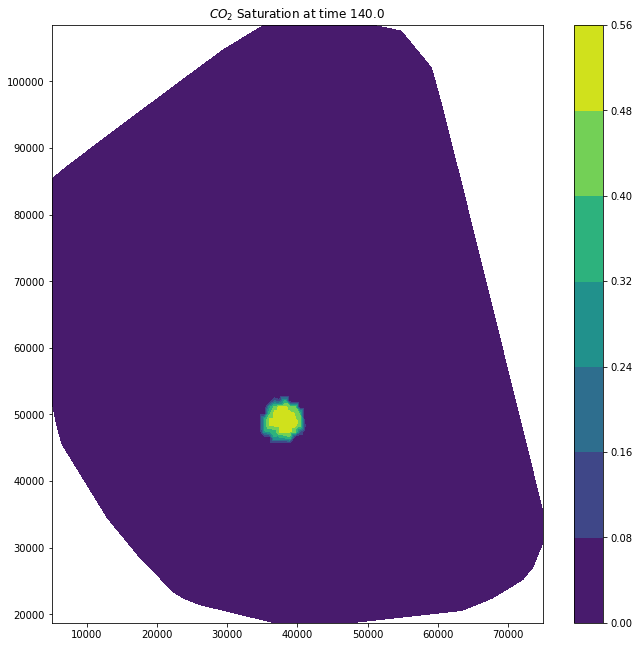

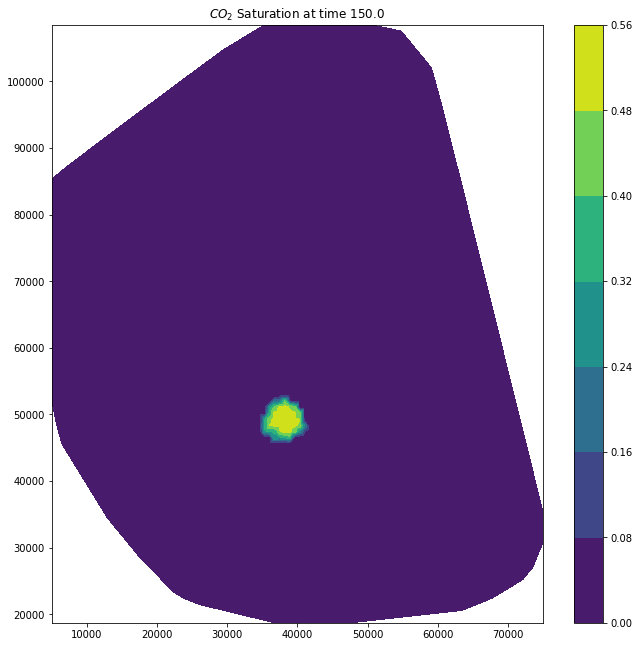

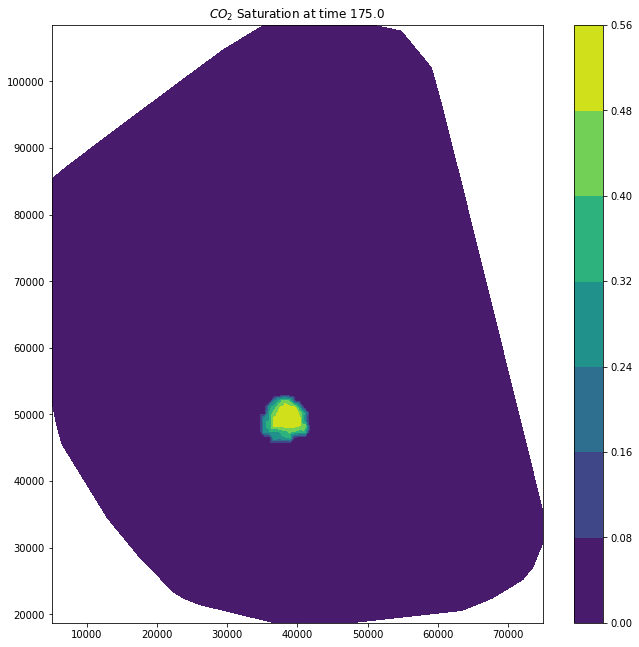

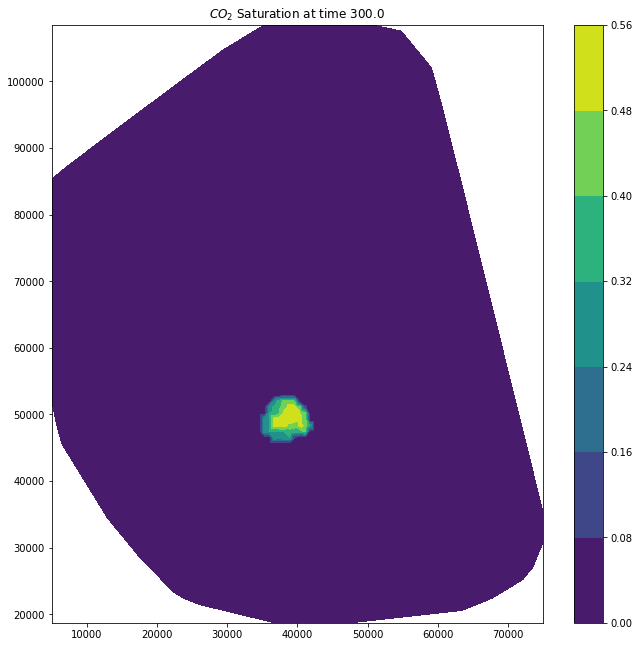

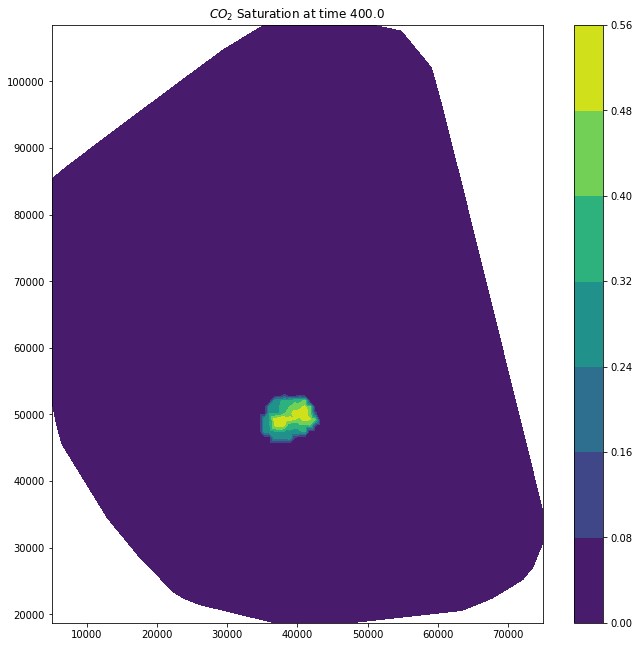

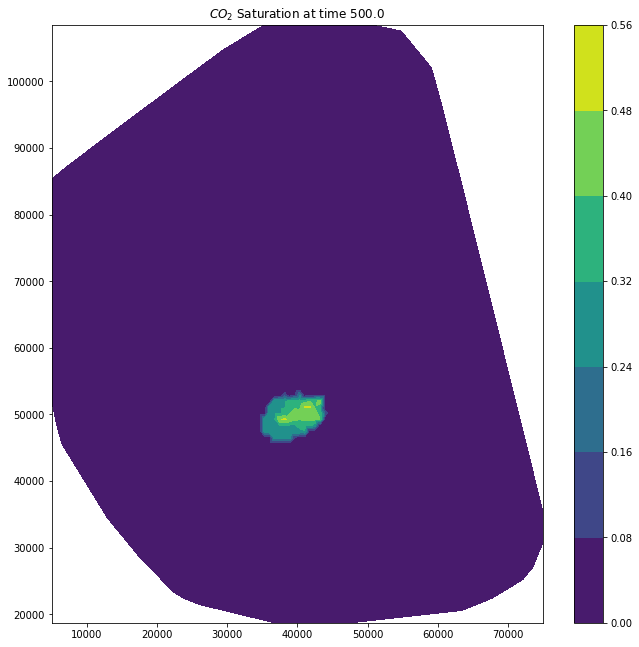

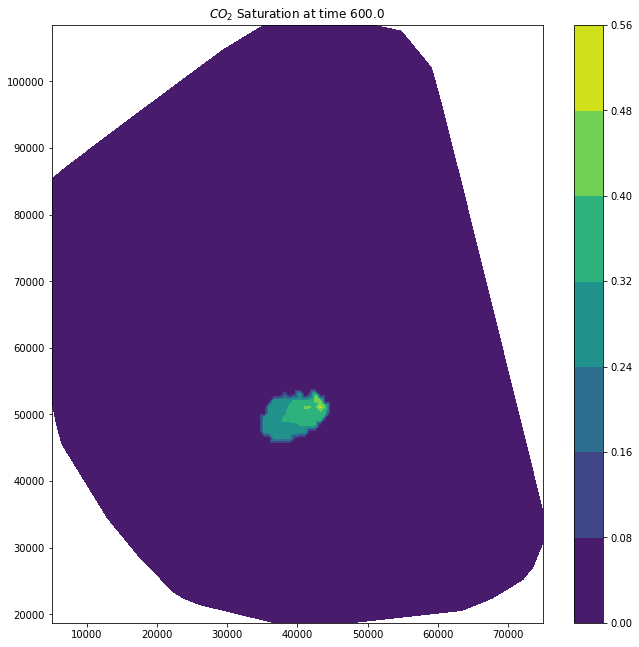

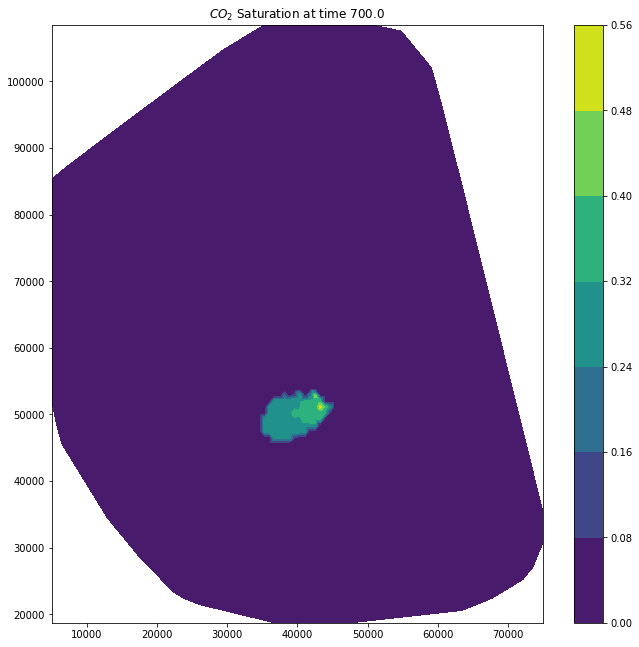

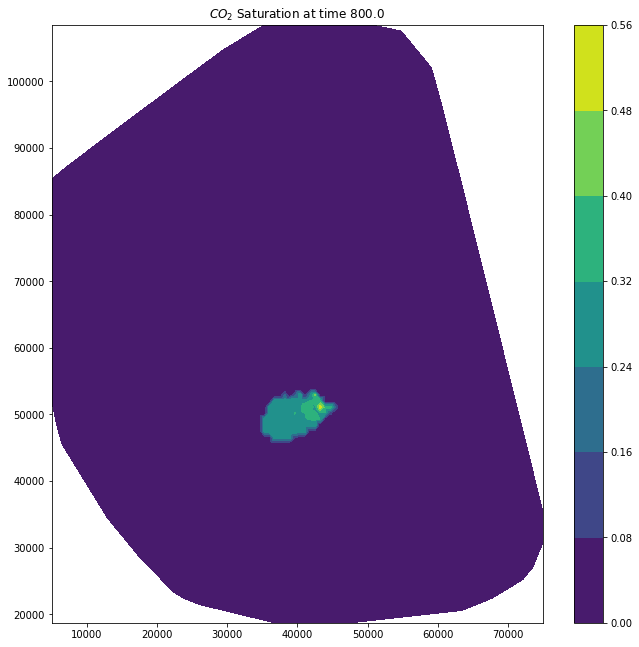

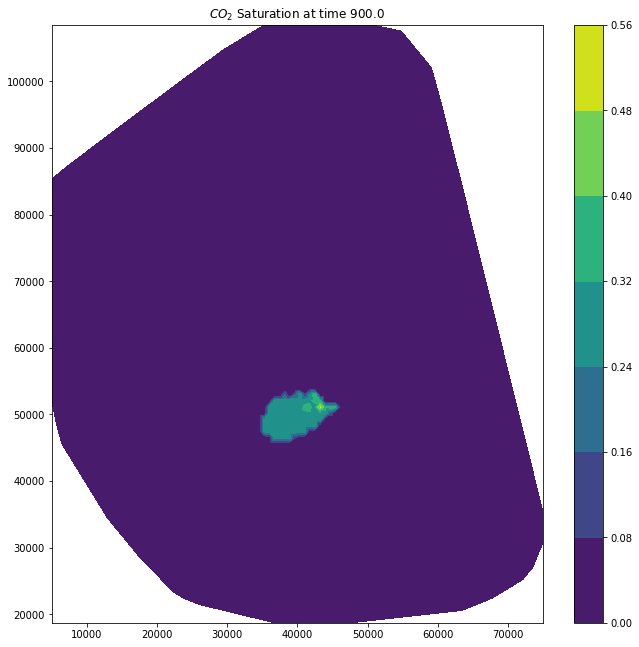

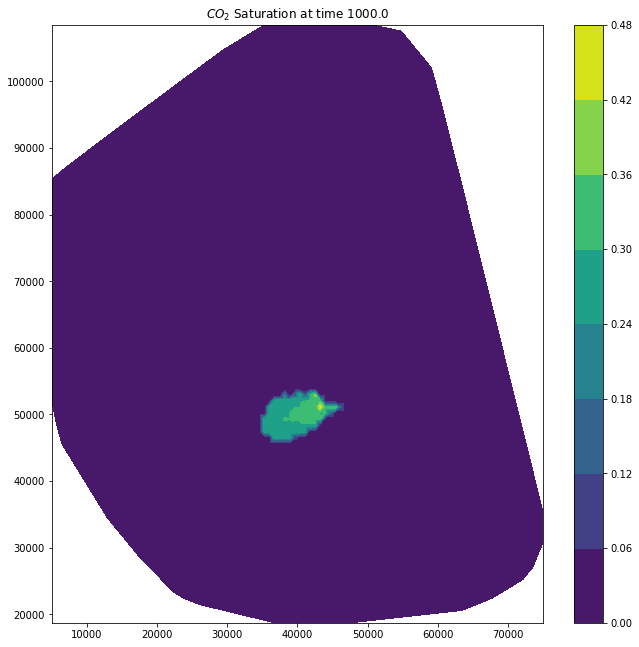

In [40]:
make_plots(5)